In [1]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
y = data['quality']
X = data.drop(columns=['quality'])

1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1119, 11) (1119,)
(480, 11) (480,)


2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)


bagg = BaggingClassifier(n_estimators=100)
bagg.fit(X_train, y_train)
bagg_pred = bagg.predict(X_test)

rand_for = RandomForestClassifier(n_estimators=100)
rand_for.fit(X_train, y_train)
rand_for_pred = rand_for.predict(X_test)

print (f'acc_DT: {accuracy_score(y_test,tree_pred):.4f}')
print (f'acc_Bagging: {accuracy_score(y_test,bagg_pred):.4f}')
print (f'acc_RF: {accuracy_score(y_test,rand_for_pred):.4f}')


acc_DT = accuracy_score(y_test,tree_pred)
acc_Bagging = accuracy_score(y_test,bagg_pred)
acc_RF = accuracy_score(y_test,rand_for_pred)
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

acc_DT: 0.5521
acc_Bagging: 0.6500
acc_RF: 0.6542


Качество на тестовой выборке по метрике accuracy лучше с алгоритмом RandomForestClassifier.

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



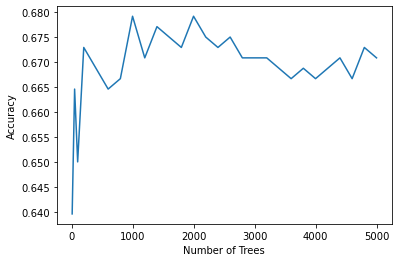

In [7]:
import matplotlib.pyplot as plt

num_tree = (10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200,
           3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000)

acc = []

for num in num_tree:
    rand_for = RandomForestClassifier(n_estimators=num)
    rand_for.fit(X_train, y_train)
    rand_for_pred = rand_for.predict(X_test)
    rand_for_acc = accuracy_score(y_test, rand_for_pred)
    acc.append(rand_for_acc)

plt.plot(num_tree, acc)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
scores_gbr = cross_val_score(gbr, X, y, scoring='accuracy').mean()
print(scores_gbr)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
scores_xgbc = cross_val_score(xgbc, X, y, scoring='accuracy').mean()
print(scores_xgbc)


acc_sklearn = scores_gbr
acc_xgboost = scores_xgbc
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

0.5678546238244515
0.5690987460815047


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [9]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingClassifier()

parametrs_gbr= {'learning_rate': np.arange(0.1, 1.3, 0.2),
             'n_estimators': range(10, 150, 10),
              'max_depth': range(1, 6, 1)}

grid_gbr = GridSearchCV(gbr, parametrs_gbr, cv=3, n_jobs=-1)
grid_gbr.fit(X_train, y_train)
scores_grid_gbr = cross_val_score(grid_gbr, X, y, scoring='accuracy').mean()
print(scores_grid_gbr)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgbc = XGBClassifier()

parametrs_xgbc= {'eta': np.arange(0.1, 1.3, 0.2),
                 'n_estimators': range(50, 400, 50),
                 'max_depth': range(1, 6, 1)}

grid_xgbc = GridSearchCV(xgbc, parametrs_xgbc, cv=3, n_jobs=-1)
grid_xgbc.fit(X_train, y_train)
scores_grid_xgbc = cross_val_score(grid_xgbc, X, y, scoring='accuracy').mean()
print(scores_grid_xgbc)



best_params_sklearn = grid_gbr.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = grid_xgbc.best_params_
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = scores_grid_gbr
acc_xgboost_cv = scores_grid_xgbc
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

0.5678702978056427
0.5653644200626959
Параметры лучшей модели sklearn:
 {'learning_rate': 0.30000000000000004, 'max_depth': 5, 'n_estimators': 50}
Параметры лучшей модели xgboost:
 {'eta': 0.1, 'max_depth': 4, 'n_estimators': 300}


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [10]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(X_train, y_train)
scores_lgbmc = cross_val_score(lgbmc, X, y, scoring='accuracy').mean()

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
scores_cbc = cross_val_score(cbc, X, y, scoring='accuracy').mean()

acc_lightgbm = scores_lgbmc
acc_catboost = scores_cbc
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

Learning rate set to 0.079582
0:	learn: 1.6798836	total: 135ms	remaining: 2m 15s
1:	learn: 1.5987518	total: 139ms	remaining: 1m 9s
2:	learn: 1.5238132	total: 143ms	remaining: 47.4s
3:	learn: 1.4602113	total: 146ms	remaining: 36.4s
4:	learn: 1.4046420	total: 150ms	remaining: 29.8s
5:	learn: 1.3571609	total: 153ms	remaining: 25.4s
6:	learn: 1.3133440	total: 156ms	remaining: 22.2s
7:	learn: 1.2769983	total: 159ms	remaining: 19.7s
8:	learn: 1.2417352	total: 162ms	remaining: 17.9s
9:	learn: 1.2089482	total: 165ms	remaining: 16.3s
10:	learn: 1.1811884	total: 168ms	remaining: 15.1s
11:	learn: 1.1571506	total: 171ms	remaining: 14.1s
12:	learn: 1.1308868	total: 174ms	remaining: 13.2s
13:	learn: 1.1091579	total: 177ms	remaining: 12.4s
14:	learn: 1.0918378	total: 180ms	remaining: 11.8s
15:	learn: 1.0750740	total: 183ms	remaining: 11.3s
16:	learn: 1.0591980	total: 186ms	remaining: 10.8s
17:	learn: 1.0431556	total: 190ms	remaining: 10.4s
18:	learn: 1.0284858	total: 193ms	remaining: 9.95s
19:	learn:

194:	learn: 0.5251633	total: 720ms	remaining: 2.97s
195:	learn: 0.5224840	total: 723ms	remaining: 2.96s
196:	learn: 0.5209206	total: 726ms	remaining: 2.96s
197:	learn: 0.5192479	total: 729ms	remaining: 2.95s
198:	learn: 0.5179213	total: 732ms	remaining: 2.95s
199:	learn: 0.5171673	total: 735ms	remaining: 2.94s
200:	learn: 0.5159836	total: 738ms	remaining: 2.94s
201:	learn: 0.5151327	total: 741ms	remaining: 2.93s
202:	learn: 0.5141380	total: 745ms	remaining: 2.92s
203:	learn: 0.5125840	total: 748ms	remaining: 2.92s
204:	learn: 0.5115102	total: 750ms	remaining: 2.91s
205:	learn: 0.5098083	total: 754ms	remaining: 2.9s
206:	learn: 0.5083349	total: 757ms	remaining: 2.9s
207:	learn: 0.5066360	total: 760ms	remaining: 2.89s
208:	learn: 0.5052653	total: 763ms	remaining: 2.89s
209:	learn: 0.5042011	total: 766ms	remaining: 2.88s
210:	learn: 0.5029892	total: 769ms	remaining: 2.87s
211:	learn: 0.5018922	total: 772ms	remaining: 2.87s
212:	learn: 0.5006576	total: 775ms	remaining: 2.86s
213:	learn: 0.

384:	learn: 0.3230062	total: 1.29s	remaining: 2.06s
385:	learn: 0.3224106	total: 1.29s	remaining: 2.05s
386:	learn: 0.3212431	total: 1.29s	remaining: 2.05s
387:	learn: 0.3202056	total: 1.3s	remaining: 2.04s
388:	learn: 0.3195634	total: 1.3s	remaining: 2.04s
389:	learn: 0.3190107	total: 1.3s	remaining: 2.04s
390:	learn: 0.3183328	total: 1.3s	remaining: 2.03s
391:	learn: 0.3174346	total: 1.31s	remaining: 2.03s
392:	learn: 0.3170249	total: 1.31s	remaining: 2.03s
393:	learn: 0.3164806	total: 1.31s	remaining: 2.02s
394:	learn: 0.3155532	total: 1.32s	remaining: 2.02s
395:	learn: 0.3153895	total: 1.32s	remaining: 2.01s
396:	learn: 0.3147292	total: 1.32s	remaining: 2.01s
397:	learn: 0.3135430	total: 1.33s	remaining: 2.01s
398:	learn: 0.3129045	total: 1.33s	remaining: 2s
399:	learn: 0.3122406	total: 1.33s	remaining: 2s
400:	learn: 0.3115728	total: 1.33s	remaining: 2s
401:	learn: 0.3110177	total: 1.34s	remaining: 1.99s
402:	learn: 0.3102106	total: 1.34s	remaining: 1.99s
403:	learn: 0.3092137	tot

574:	learn: 0.2126026	total: 1.85s	remaining: 1.37s
575:	learn: 0.2121941	total: 1.86s	remaining: 1.37s
576:	learn: 0.2117573	total: 1.86s	remaining: 1.36s
577:	learn: 0.2112676	total: 1.86s	remaining: 1.36s
578:	learn: 0.2108081	total: 1.87s	remaining: 1.36s
579:	learn: 0.2105734	total: 1.87s	remaining: 1.35s
580:	learn: 0.2102383	total: 1.87s	remaining: 1.35s
581:	learn: 0.2100135	total: 1.88s	remaining: 1.35s
582:	learn: 0.2097830	total: 1.88s	remaining: 1.34s
583:	learn: 0.2092555	total: 1.88s	remaining: 1.34s
584:	learn: 0.2087479	total: 1.89s	remaining: 1.34s
585:	learn: 0.2081495	total: 1.89s	remaining: 1.33s
586:	learn: 0.2077963	total: 1.89s	remaining: 1.33s
587:	learn: 0.2073251	total: 1.9s	remaining: 1.33s
588:	learn: 0.2070829	total: 1.9s	remaining: 1.32s
589:	learn: 0.2067389	total: 1.9s	remaining: 1.32s
590:	learn: 0.2061265	total: 1.9s	remaining: 1.32s
591:	learn: 0.2054379	total: 1.91s	remaining: 1.31s
592:	learn: 0.2052262	total: 1.91s	remaining: 1.31s
593:	learn: 0.20

759:	learn: 0.1534227	total: 2.41s	remaining: 761ms
760:	learn: 0.1531321	total: 2.41s	remaining: 758ms
761:	learn: 0.1529203	total: 2.42s	remaining: 754ms
762:	learn: 0.1525911	total: 2.42s	remaining: 751ms
763:	learn: 0.1522010	total: 2.42s	remaining: 748ms
764:	learn: 0.1520506	total: 2.42s	remaining: 745ms
765:	learn: 0.1518428	total: 2.43s	remaining: 742ms
766:	learn: 0.1517286	total: 2.43s	remaining: 738ms
767:	learn: 0.1515839	total: 2.43s	remaining: 735ms
768:	learn: 0.1512837	total: 2.44s	remaining: 732ms
769:	learn: 0.1509547	total: 2.44s	remaining: 729ms
770:	learn: 0.1507361	total: 2.44s	remaining: 725ms
771:	learn: 0.1505042	total: 2.44s	remaining: 722ms
772:	learn: 0.1502289	total: 2.45s	remaining: 719ms
773:	learn: 0.1499811	total: 2.45s	remaining: 716ms
774:	learn: 0.1496163	total: 2.45s	remaining: 713ms
775:	learn: 0.1492923	total: 2.46s	remaining: 709ms
776:	learn: 0.1490470	total: 2.46s	remaining: 706ms
777:	learn: 0.1488661	total: 2.46s	remaining: 703ms
778:	learn: 

942:	learn: 0.1158304	total: 2.98s	remaining: 180ms
943:	learn: 0.1157610	total: 2.98s	remaining: 177ms
944:	learn: 0.1155905	total: 2.98s	remaining: 174ms
945:	learn: 0.1154666	total: 2.99s	remaining: 170ms
946:	learn: 0.1153362	total: 2.99s	remaining: 167ms
947:	learn: 0.1151789	total: 2.99s	remaining: 164ms
948:	learn: 0.1150643	total: 3s	remaining: 161ms
949:	learn: 0.1149039	total: 3s	remaining: 158ms
950:	learn: 0.1147045	total: 3s	remaining: 155ms
951:	learn: 0.1145221	total: 3s	remaining: 151ms
952:	learn: 0.1142499	total: 3.01s	remaining: 148ms
953:	learn: 0.1141487	total: 3.01s	remaining: 145ms
954:	learn: 0.1139626	total: 3.01s	remaining: 142ms
955:	learn: 0.1137345	total: 3.02s	remaining: 139ms
956:	learn: 0.1135878	total: 3.02s	remaining: 136ms
957:	learn: 0.1134543	total: 3.02s	remaining: 133ms
958:	learn: 0.1132969	total: 3.02s	remaining: 129ms
959:	learn: 0.1131902	total: 3.03s	remaining: 126ms
960:	learn: 0.1129618	total: 3.03s	remaining: 123ms
961:	learn: 0.1127947	to

122:	learn: 0.6120307	total: 371ms	remaining: 2.64s
123:	learn: 0.6089902	total: 374ms	remaining: 2.64s
124:	learn: 0.6062718	total: 377ms	remaining: 2.64s
125:	learn: 0.6036575	total: 381ms	remaining: 2.64s
126:	learn: 0.6024789	total: 384ms	remaining: 2.64s
127:	learn: 0.6009514	total: 387ms	remaining: 2.63s
128:	learn: 0.5989886	total: 390ms	remaining: 2.63s
129:	learn: 0.5961372	total: 393ms	remaining: 2.63s
130:	learn: 0.5937774	total: 396ms	remaining: 2.63s
131:	learn: 0.5913666	total: 399ms	remaining: 2.62s
132:	learn: 0.5895740	total: 402ms	remaining: 2.62s
133:	learn: 0.5879727	total: 405ms	remaining: 2.62s
134:	learn: 0.5848446	total: 408ms	remaining: 2.61s
135:	learn: 0.5831138	total: 411ms	remaining: 2.61s
136:	learn: 0.5815207	total: 414ms	remaining: 2.61s
137:	learn: 0.5798641	total: 417ms	remaining: 2.6s
138:	learn: 0.5781399	total: 420ms	remaining: 2.6s
139:	learn: 0.5754458	total: 423ms	remaining: 2.6s
140:	learn: 0.5746142	total: 426ms	remaining: 2.59s
141:	learn: 0.5

308:	learn: 0.3591115	total: 936ms	remaining: 2.09s
309:	learn: 0.3580437	total: 940ms	remaining: 2.09s
310:	learn: 0.3574870	total: 943ms	remaining: 2.09s
311:	learn: 0.3569383	total: 951ms	remaining: 2.1s
312:	learn: 0.3553293	total: 955ms	remaining: 2.1s
313:	learn: 0.3547106	total: 959ms	remaining: 2.09s
314:	learn: 0.3538249	total: 962ms	remaining: 2.09s
315:	learn: 0.3527964	total: 966ms	remaining: 2.09s
316:	learn: 0.3517671	total: 969ms	remaining: 2.09s
317:	learn: 0.3508178	total: 972ms	remaining: 2.08s
318:	learn: 0.3496696	total: 976ms	remaining: 2.08s
319:	learn: 0.3492425	total: 979ms	remaining: 2.08s
320:	learn: 0.3486691	total: 982ms	remaining: 2.08s
321:	learn: 0.3477969	total: 985ms	remaining: 2.07s
322:	learn: 0.3467898	total: 988ms	remaining: 2.07s
323:	learn: 0.3459540	total: 991ms	remaining: 2.07s
324:	learn: 0.3452714	total: 994ms	remaining: 2.06s
325:	learn: 0.3445172	total: 997ms	remaining: 2.06s
326:	learn: 0.3437214	total: 1s	remaining: 2.06s
327:	learn: 0.343

491:	learn: 0.2383514	total: 1.5s	remaining: 1.55s
492:	learn: 0.2378450	total: 1.5s	remaining: 1.54s
493:	learn: 0.2376867	total: 1.5s	remaining: 1.54s
494:	learn: 0.2371520	total: 1.51s	remaining: 1.54s
495:	learn: 0.2367099	total: 1.51s	remaining: 1.54s
496:	learn: 0.2361215	total: 1.51s	remaining: 1.53s
497:	learn: 0.2357509	total: 1.52s	remaining: 1.53s
498:	learn: 0.2353520	total: 1.52s	remaining: 1.53s
499:	learn: 0.2348972	total: 1.52s	remaining: 1.52s
500:	learn: 0.2342905	total: 1.53s	remaining: 1.52s
501:	learn: 0.2338682	total: 1.53s	remaining: 1.52s
502:	learn: 0.2335119	total: 1.53s	remaining: 1.51s
503:	learn: 0.2330617	total: 1.54s	remaining: 1.51s
504:	learn: 0.2324541	total: 1.54s	remaining: 1.51s
505:	learn: 0.2321332	total: 1.54s	remaining: 1.51s
506:	learn: 0.2315701	total: 1.55s	remaining: 1.5s
507:	learn: 0.2311405	total: 1.55s	remaining: 1.5s
508:	learn: 0.2307520	total: 1.55s	remaining: 1.5s
509:	learn: 0.2304032	total: 1.55s	remaining: 1.49s
510:	learn: 0.2298

685:	learn: 0.1623836	total: 2.09s	remaining: 956ms
686:	learn: 0.1621042	total: 2.09s	remaining: 953ms
687:	learn: 0.1618856	total: 2.09s	remaining: 950ms
688:	learn: 0.1616498	total: 2.1s	remaining: 947ms
689:	learn: 0.1613022	total: 2.1s	remaining: 944ms
690:	learn: 0.1611822	total: 2.1s	remaining: 941ms
691:	learn: 0.1608399	total: 2.11s	remaining: 938ms
692:	learn: 0.1605741	total: 2.11s	remaining: 935ms
693:	learn: 0.1603546	total: 2.11s	remaining: 932ms
694:	learn: 0.1600637	total: 2.12s	remaining: 929ms
695:	learn: 0.1598550	total: 2.12s	remaining: 925ms
696:	learn: 0.1596532	total: 2.12s	remaining: 922ms
697:	learn: 0.1595295	total: 2.12s	remaining: 919ms
698:	learn: 0.1593516	total: 2.13s	remaining: 916ms
699:	learn: 0.1589414	total: 2.13s	remaining: 913ms
700:	learn: 0.1586259	total: 2.13s	remaining: 910ms
701:	learn: 0.1582965	total: 2.14s	remaining: 907ms
702:	learn: 0.1578856	total: 2.14s	remaining: 904ms
703:	learn: 0.1576908	total: 2.14s	remaining: 901ms
704:	learn: 0.1

868:	learn: 0.1216112	total: 2.65s	remaining: 399ms
869:	learn: 0.1213982	total: 2.65s	remaining: 396ms
870:	learn: 0.1212594	total: 2.65s	remaining: 393ms
871:	learn: 0.1211169	total: 2.66s	remaining: 390ms
872:	learn: 0.1208999	total: 2.66s	remaining: 387ms
873:	learn: 0.1208512	total: 2.66s	remaining: 384ms
874:	learn: 0.1207217	total: 2.67s	remaining: 381ms
875:	learn: 0.1206350	total: 2.67s	remaining: 378ms
876:	learn: 0.1204041	total: 2.67s	remaining: 375ms
877:	learn: 0.1202151	total: 2.68s	remaining: 372ms
878:	learn: 0.1200206	total: 2.68s	remaining: 369ms
879:	learn: 0.1198461	total: 2.68s	remaining: 366ms
880:	learn: 0.1196656	total: 2.69s	remaining: 363ms
881:	learn: 0.1195410	total: 2.69s	remaining: 360ms
882:	learn: 0.1194842	total: 2.69s	remaining: 357ms
883:	learn: 0.1193377	total: 2.69s	remaining: 354ms
884:	learn: 0.1191160	total: 2.7s	remaining: 351ms
885:	learn: 0.1188834	total: 2.7s	remaining: 348ms
886:	learn: 0.1186766	total: 2.7s	remaining: 345ms
887:	learn: 0.1

42:	learn: 0.8448479	total: 134ms	remaining: 2.98s
43:	learn: 0.8407349	total: 137ms	remaining: 2.97s
44:	learn: 0.8368350	total: 140ms	remaining: 2.97s
45:	learn: 0.8323827	total: 143ms	remaining: 2.97s
46:	learn: 0.8285680	total: 146ms	remaining: 2.97s
47:	learn: 0.8248415	total: 150ms	remaining: 2.97s
48:	learn: 0.8216517	total: 153ms	remaining: 2.96s
49:	learn: 0.8185125	total: 156ms	remaining: 2.96s
50:	learn: 0.8145387	total: 159ms	remaining: 2.95s
51:	learn: 0.8115619	total: 162ms	remaining: 2.95s
52:	learn: 0.8082211	total: 165ms	remaining: 2.94s
53:	learn: 0.8042372	total: 168ms	remaining: 2.94s
54:	learn: 0.8007991	total: 171ms	remaining: 2.93s
55:	learn: 0.7979002	total: 174ms	remaining: 2.93s
56:	learn: 0.7946530	total: 177ms	remaining: 2.92s
57:	learn: 0.7911425	total: 180ms	remaining: 2.92s
58:	learn: 0.7886741	total: 183ms	remaining: 2.92s
59:	learn: 0.7848521	total: 186ms	remaining: 2.91s
60:	learn: 0.7817967	total: 189ms	remaining: 2.91s
61:	learn: 0.7791150	total: 192

230:	learn: 0.4643313	total: 709ms	remaining: 2.36s
231:	learn: 0.4626430	total: 712ms	remaining: 2.36s
232:	learn: 0.4603254	total: 715ms	remaining: 2.35s
233:	learn: 0.4588954	total: 718ms	remaining: 2.35s
234:	learn: 0.4576427	total: 721ms	remaining: 2.35s
235:	learn: 0.4560348	total: 725ms	remaining: 2.35s
236:	learn: 0.4546519	total: 728ms	remaining: 2.34s
237:	learn: 0.4536581	total: 731ms	remaining: 2.34s
238:	learn: 0.4528313	total: 734ms	remaining: 2.34s
239:	learn: 0.4513270	total: 737ms	remaining: 2.33s
240:	learn: 0.4501196	total: 740ms	remaining: 2.33s
241:	learn: 0.4492852	total: 743ms	remaining: 2.33s
242:	learn: 0.4472825	total: 746ms	remaining: 2.32s
243:	learn: 0.4452353	total: 749ms	remaining: 2.32s
244:	learn: 0.4445416	total: 752ms	remaining: 2.32s
245:	learn: 0.4438634	total: 755ms	remaining: 2.31s
246:	learn: 0.4423629	total: 758ms	remaining: 2.31s
247:	learn: 0.4403494	total: 761ms	remaining: 2.31s
248:	learn: 0.4392292	total: 764ms	remaining: 2.3s
249:	learn: 0

410:	learn: 0.2911444	total: 1.26s	remaining: 1.8s
411:	learn: 0.2900735	total: 1.26s	remaining: 1.8s
412:	learn: 0.2891986	total: 1.26s	remaining: 1.8s
413:	learn: 0.2883717	total: 1.27s	remaining: 1.79s
414:	learn: 0.2876170	total: 1.27s	remaining: 1.79s
415:	learn: 0.2870827	total: 1.27s	remaining: 1.79s
416:	learn: 0.2865319	total: 1.28s	remaining: 1.79s
417:	learn: 0.2859430	total: 1.28s	remaining: 1.78s
418:	learn: 0.2854738	total: 1.28s	remaining: 1.78s
419:	learn: 0.2847322	total: 1.29s	remaining: 1.78s
420:	learn: 0.2842406	total: 1.29s	remaining: 1.77s
421:	learn: 0.2835423	total: 1.29s	remaining: 1.77s
422:	learn: 0.2828982	total: 1.3s	remaining: 1.77s
423:	learn: 0.2821358	total: 1.3s	remaining: 1.76s
424:	learn: 0.2811560	total: 1.3s	remaining: 1.76s
425:	learn: 0.2803236	total: 1.3s	remaining: 1.76s
426:	learn: 0.2796036	total: 1.31s	remaining: 1.75s
427:	learn: 0.2792766	total: 1.31s	remaining: 1.75s
428:	learn: 0.2783772	total: 1.31s	remaining: 1.75s
429:	learn: 0.27775

602:	learn: 0.1940197	total: 1.84s	remaining: 1.21s
603:	learn: 0.1935764	total: 1.85s	remaining: 1.21s
604:	learn: 0.1933848	total: 1.85s	remaining: 1.21s
605:	learn: 0.1929465	total: 1.85s	remaining: 1.2s
606:	learn: 0.1927423	total: 1.86s	remaining: 1.2s
607:	learn: 0.1925439	total: 1.86s	remaining: 1.2s
608:	learn: 0.1923325	total: 1.86s	remaining: 1.2s
609:	learn: 0.1920092	total: 1.86s	remaining: 1.19s
610:	learn: 0.1915141	total: 1.87s	remaining: 1.19s
611:	learn: 0.1911651	total: 1.87s	remaining: 1.19s
612:	learn: 0.1907231	total: 1.87s	remaining: 1.18s
613:	learn: 0.1901401	total: 1.88s	remaining: 1.18s
614:	learn: 0.1897943	total: 1.88s	remaining: 1.18s
615:	learn: 0.1894520	total: 1.88s	remaining: 1.17s
616:	learn: 0.1890870	total: 1.89s	remaining: 1.17s
617:	learn: 0.1886032	total: 1.89s	remaining: 1.17s
618:	learn: 0.1884223	total: 1.89s	remaining: 1.16s
619:	learn: 0.1882047	total: 1.9s	remaining: 1.16s
620:	learn: 0.1878151	total: 1.9s	remaining: 1.16s
621:	learn: 0.1876

781:	learn: 0.1443036	total: 2.38s	remaining: 665ms
782:	learn: 0.1440668	total: 2.39s	remaining: 662ms
783:	learn: 0.1437868	total: 2.39s	remaining: 659ms
784:	learn: 0.1435186	total: 2.39s	remaining: 656ms
785:	learn: 0.1433878	total: 2.4s	remaining: 653ms
786:	learn: 0.1431316	total: 2.4s	remaining: 650ms
787:	learn: 0.1429618	total: 2.4s	remaining: 647ms
788:	learn: 0.1426461	total: 2.41s	remaining: 644ms
789:	learn: 0.1424014	total: 2.41s	remaining: 641ms
790:	learn: 0.1421863	total: 2.41s	remaining: 638ms
791:	learn: 0.1419002	total: 2.42s	remaining: 635ms
792:	learn: 0.1417951	total: 2.42s	remaining: 632ms
793:	learn: 0.1415932	total: 2.42s	remaining: 628ms
794:	learn: 0.1415313	total: 2.42s	remaining: 625ms
795:	learn: 0.1413011	total: 2.43s	remaining: 622ms
796:	learn: 0.1410559	total: 2.43s	remaining: 619ms
797:	learn: 0.1407536	total: 2.43s	remaining: 616ms
798:	learn: 0.1404463	total: 2.44s	remaining: 613ms
799:	learn: 0.1402543	total: 2.44s	remaining: 610ms
800:	learn: 0.1

957:	learn: 0.1109214	total: 2.93s	remaining: 128ms
958:	learn: 0.1107805	total: 2.93s	remaining: 125ms
959:	learn: 0.1106009	total: 2.93s	remaining: 122ms
960:	learn: 0.1103922	total: 2.94s	remaining: 119ms
961:	learn: 0.1101364	total: 2.94s	remaining: 116ms
962:	learn: 0.1098958	total: 2.94s	remaining: 113ms
963:	learn: 0.1097294	total: 2.95s	remaining: 110ms
964:	learn: 0.1096736	total: 2.95s	remaining: 107ms
965:	learn: 0.1095657	total: 2.95s	remaining: 104ms
966:	learn: 0.1094119	total: 2.96s	remaining: 101ms
967:	learn: 0.1092035	total: 2.96s	remaining: 97.8ms
968:	learn: 0.1090105	total: 2.96s	remaining: 94.8ms
969:	learn: 0.1089412	total: 2.96s	remaining: 91.7ms
970:	learn: 0.1088260	total: 2.97s	remaining: 88.7ms
971:	learn: 0.1087332	total: 2.97s	remaining: 85.6ms
972:	learn: 0.1085056	total: 2.97s	remaining: 82.5ms
973:	learn: 0.1083152	total: 2.98s	remaining: 79.5ms
974:	learn: 0.1080626	total: 2.98s	remaining: 76.4ms
975:	learn: 0.1078545	total: 2.98s	remaining: 73.4ms
976

138:	learn: 0.6056654	total: 421ms	remaining: 2.61s
139:	learn: 0.6041241	total: 424ms	remaining: 2.6s
140:	learn: 0.6017038	total: 427ms	remaining: 2.6s
141:	learn: 0.5995789	total: 430ms	remaining: 2.6s
142:	learn: 0.5982641	total: 433ms	remaining: 2.6s
143:	learn: 0.5960565	total: 437ms	remaining: 2.59s
144:	learn: 0.5948417	total: 439ms	remaining: 2.59s
145:	learn: 0.5941262	total: 442ms	remaining: 2.59s
146:	learn: 0.5927012	total: 446ms	remaining: 2.58s
147:	learn: 0.5902954	total: 448ms	remaining: 2.58s
148:	learn: 0.5882134	total: 451ms	remaining: 2.58s
149:	learn: 0.5863297	total: 455ms	remaining: 2.58s
150:	learn: 0.5840602	total: 458ms	remaining: 2.57s
151:	learn: 0.5835624	total: 461ms	remaining: 2.57s
152:	learn: 0.5821303	total: 464ms	remaining: 2.57s
153:	learn: 0.5805656	total: 467ms	remaining: 2.56s
154:	learn: 0.5790299	total: 470ms	remaining: 2.56s
155:	learn: 0.5779186	total: 473ms	remaining: 2.56s
156:	learn: 0.5765121	total: 476ms	remaining: 2.55s
157:	learn: 0.57

325:	learn: 0.3717656	total: 989ms	remaining: 2.04s
326:	learn: 0.3710641	total: 992ms	remaining: 2.04s
327:	learn: 0.3703337	total: 995ms	remaining: 2.04s
328:	learn: 0.3700334	total: 999ms	remaining: 2.04s
329:	learn: 0.3690952	total: 1s	remaining: 2.03s
330:	learn: 0.3678783	total: 1s	remaining: 2.03s
331:	learn: 0.3664937	total: 1.01s	remaining: 2.03s
332:	learn: 0.3656206	total: 1.01s	remaining: 2.03s
333:	learn: 0.3642277	total: 1.01s	remaining: 2.02s
334:	learn: 0.3633203	total: 1.02s	remaining: 2.02s
335:	learn: 0.3623191	total: 1.02s	remaining: 2.02s
336:	learn: 0.3617414	total: 1.02s	remaining: 2.01s
337:	learn: 0.3604812	total: 1.03s	remaining: 2.01s
338:	learn: 0.3601187	total: 1.03s	remaining: 2.01s
339:	learn: 0.3591285	total: 1.03s	remaining: 2s
340:	learn: 0.3579831	total: 1.03s	remaining: 2s
341:	learn: 0.3569915	total: 1.04s	remaining: 2s
342:	learn: 0.3566848	total: 1.04s	remaining: 2s
343:	learn: 0.3556227	total: 1.04s	remaining: 1.99s
344:	learn: 0.3545449	total: 1

510:	learn: 0.2443403	total: 1.55s	remaining: 1.48s
511:	learn: 0.2437922	total: 1.55s	remaining: 1.48s
512:	learn: 0.2432680	total: 1.56s	remaining: 1.48s
513:	learn: 0.2428324	total: 1.56s	remaining: 1.48s
514:	learn: 0.2425654	total: 1.56s	remaining: 1.47s
515:	learn: 0.2417487	total: 1.57s	remaining: 1.47s
516:	learn: 0.2413040	total: 1.57s	remaining: 1.47s
517:	learn: 0.2408774	total: 1.57s	remaining: 1.46s
518:	learn: 0.2403047	total: 1.58s	remaining: 1.46s
519:	learn: 0.2398265	total: 1.58s	remaining: 1.46s
520:	learn: 0.2393747	total: 1.58s	remaining: 1.46s
521:	learn: 0.2388244	total: 1.58s	remaining: 1.45s
522:	learn: 0.2383741	total: 1.59s	remaining: 1.45s
523:	learn: 0.2380288	total: 1.59s	remaining: 1.45s
524:	learn: 0.2375878	total: 1.59s	remaining: 1.44s
525:	learn: 0.2369332	total: 1.6s	remaining: 1.44s
526:	learn: 0.2364359	total: 1.6s	remaining: 1.44s
527:	learn: 0.2361520	total: 1.6s	remaining: 1.43s
528:	learn: 0.2356340	total: 1.61s	remaining: 1.43s
529:	learn: 0.2

699:	learn: 0.1705416	total: 2.12s	remaining: 910ms
700:	learn: 0.1703158	total: 2.13s	remaining: 907ms
701:	learn: 0.1698897	total: 2.13s	remaining: 904ms
702:	learn: 0.1697112	total: 2.13s	remaining: 901ms
703:	learn: 0.1694267	total: 2.13s	remaining: 898ms
704:	learn: 0.1689780	total: 2.14s	remaining: 895ms
705:	learn: 0.1685598	total: 2.14s	remaining: 892ms
706:	learn: 0.1681804	total: 2.14s	remaining: 889ms
707:	learn: 0.1680864	total: 2.15s	remaining: 886ms
708:	learn: 0.1675916	total: 2.15s	remaining: 883ms
709:	learn: 0.1671164	total: 2.15s	remaining: 880ms
710:	learn: 0.1669131	total: 2.16s	remaining: 877ms
711:	learn: 0.1666513	total: 2.16s	remaining: 873ms
712:	learn: 0.1664042	total: 2.16s	remaining: 870ms
713:	learn: 0.1662178	total: 2.17s	remaining: 867ms
714:	learn: 0.1660786	total: 2.17s	remaining: 864ms
715:	learn: 0.1659363	total: 2.17s	remaining: 861ms
716:	learn: 0.1657754	total: 2.17s	remaining: 858ms
717:	learn: 0.1655139	total: 2.18s	remaining: 855ms
718:	learn: 

878:	learn: 0.1304649	total: 2.66s	remaining: 367ms
879:	learn: 0.1303623	total: 2.67s	remaining: 364ms
880:	learn: 0.1302206	total: 2.67s	remaining: 361ms
881:	learn: 0.1299746	total: 2.67s	remaining: 358ms
882:	learn: 0.1298022	total: 2.68s	remaining: 355ms
883:	learn: 0.1296813	total: 2.68s	remaining: 352ms
884:	learn: 0.1293446	total: 2.68s	remaining: 349ms
885:	learn: 0.1292115	total: 2.69s	remaining: 346ms
886:	learn: 0.1288977	total: 2.69s	remaining: 343ms
887:	learn: 0.1287449	total: 2.69s	remaining: 340ms
888:	learn: 0.1286013	total: 2.7s	remaining: 337ms
889:	learn: 0.1283478	total: 2.7s	remaining: 334ms
890:	learn: 0.1281418	total: 2.7s	remaining: 331ms
891:	learn: 0.1279239	total: 2.71s	remaining: 328ms
892:	learn: 0.1277709	total: 2.71s	remaining: 325ms
893:	learn: 0.1276570	total: 2.71s	remaining: 321ms
894:	learn: 0.1275316	total: 2.71s	remaining: 318ms
895:	learn: 0.1273134	total: 2.72s	remaining: 315ms
896:	learn: 0.1271312	total: 2.72s	remaining: 312ms
897:	learn: 0.1

63:	learn: 0.7738841	total: 192ms	remaining: 2.8s
64:	learn: 0.7714152	total: 195ms	remaining: 2.8s
65:	learn: 0.7686517	total: 198ms	remaining: 2.8s
66:	learn: 0.7663672	total: 201ms	remaining: 2.8s
67:	learn: 0.7648803	total: 204ms	remaining: 2.8s
68:	learn: 0.7618596	total: 207ms	remaining: 2.8s
69:	learn: 0.7596858	total: 211ms	remaining: 2.8s
70:	learn: 0.7580104	total: 214ms	remaining: 2.79s
71:	learn: 0.7552280	total: 217ms	remaining: 2.79s
72:	learn: 0.7516732	total: 220ms	remaining: 2.79s
73:	learn: 0.7497929	total: 223ms	remaining: 2.79s
74:	learn: 0.7474279	total: 226ms	remaining: 2.78s
75:	learn: 0.7455892	total: 229ms	remaining: 2.78s
76:	learn: 0.7433373	total: 231ms	remaining: 2.77s
77:	learn: 0.7426274	total: 234ms	remaining: 2.77s
78:	learn: 0.7397933	total: 237ms	remaining: 2.77s
79:	learn: 0.7372443	total: 240ms	remaining: 2.77s
80:	learn: 0.7344527	total: 243ms	remaining: 2.76s
81:	learn: 0.7313987	total: 247ms	remaining: 2.76s
82:	learn: 0.7289357	total: 250ms	rema

250:	learn: 0.4539977	total: 756ms	remaining: 2.26s
251:	learn: 0.4531700	total: 759ms	remaining: 2.25s
252:	learn: 0.4521496	total: 763ms	remaining: 2.25s
253:	learn: 0.4508589	total: 766ms	remaining: 2.25s
254:	learn: 0.4497796	total: 770ms	remaining: 2.25s
255:	learn: 0.4491235	total: 773ms	remaining: 2.25s
256:	learn: 0.4485080	total: 776ms	remaining: 2.24s
257:	learn: 0.4475246	total: 779ms	remaining: 2.24s
258:	learn: 0.4458410	total: 782ms	remaining: 2.24s
259:	learn: 0.4449664	total: 785ms	remaining: 2.23s
260:	learn: 0.4433425	total: 788ms	remaining: 2.23s
261:	learn: 0.4417376	total: 791ms	remaining: 2.23s
262:	learn: 0.4408842	total: 794ms	remaining: 2.23s
263:	learn: 0.4393013	total: 797ms	remaining: 2.22s
264:	learn: 0.4386481	total: 800ms	remaining: 2.22s
265:	learn: 0.4379413	total: 803ms	remaining: 2.22s
266:	learn: 0.4365508	total: 806ms	remaining: 2.21s
267:	learn: 0.4359460	total: 809ms	remaining: 2.21s
268:	learn: 0.4349388	total: 812ms	remaining: 2.21s
269:	learn: 

438:	learn: 0.2950480	total: 1.33s	remaining: 1.7s
439:	learn: 0.2942642	total: 1.33s	remaining: 1.69s
440:	learn: 0.2936782	total: 1.33s	remaining: 1.69s
441:	learn: 0.2931139	total: 1.34s	remaining: 1.69s
442:	learn: 0.2923299	total: 1.34s	remaining: 1.69s
443:	learn: 0.2916525	total: 1.34s	remaining: 1.68s
444:	learn: 0.2913756	total: 1.35s	remaining: 1.68s
445:	learn: 0.2903771	total: 1.35s	remaining: 1.68s
446:	learn: 0.2894248	total: 1.35s	remaining: 1.67s
447:	learn: 0.2888255	total: 1.35s	remaining: 1.67s
448:	learn: 0.2887026	total: 1.36s	remaining: 1.67s
449:	learn: 0.2878705	total: 1.36s	remaining: 1.66s
450:	learn: 0.2872863	total: 1.36s	remaining: 1.66s
451:	learn: 0.2869093	total: 1.37s	remaining: 1.66s
452:	learn: 0.2858751	total: 1.37s	remaining: 1.66s
453:	learn: 0.2845050	total: 1.37s	remaining: 1.65s
454:	learn: 0.2837559	total: 1.38s	remaining: 1.65s
455:	learn: 0.2826545	total: 1.38s	remaining: 1.65s
456:	learn: 0.2823251	total: 1.38s	remaining: 1.64s
457:	learn: 0

620:	learn: 0.2073232	total: 1.88s	remaining: 1.15s
621:	learn: 0.2069132	total: 1.88s	remaining: 1.14s
622:	learn: 0.2064828	total: 1.89s	remaining: 1.14s
623:	learn: 0.2060967	total: 1.89s	remaining: 1.14s
624:	learn: 0.2058014	total: 1.89s	remaining: 1.14s
625:	learn: 0.2052378	total: 1.9s	remaining: 1.13s
626:	learn: 0.2048744	total: 1.9s	remaining: 1.13s
627:	learn: 0.2047275	total: 1.9s	remaining: 1.13s
628:	learn: 0.2041589	total: 1.9s	remaining: 1.12s
629:	learn: 0.2035710	total: 1.91s	remaining: 1.12s
630:	learn: 0.2031636	total: 1.91s	remaining: 1.12s
631:	learn: 0.2028993	total: 1.91s	remaining: 1.11s
632:	learn: 0.2023981	total: 1.92s	remaining: 1.11s
633:	learn: 0.2020962	total: 1.92s	remaining: 1.11s
634:	learn: 0.2017362	total: 1.92s	remaining: 1.1s
635:	learn: 0.2014082	total: 1.93s	remaining: 1.1s
636:	learn: 0.2010460	total: 1.93s	remaining: 1.1s
637:	learn: 0.2007520	total: 1.93s	remaining: 1.09s
638:	learn: 0.2003605	total: 1.93s	remaining: 1.09s
639:	learn: 0.19991

808:	learn: 0.1521644	total: 2.45s	remaining: 578ms
809:	learn: 0.1519552	total: 2.45s	remaining: 575ms
810:	learn: 0.1517786	total: 2.45s	remaining: 572ms
811:	learn: 0.1515893	total: 2.46s	remaining: 569ms
812:	learn: 0.1514951	total: 2.46s	remaining: 566ms
813:	learn: 0.1512728	total: 2.46s	remaining: 563ms
814:	learn: 0.1510251	total: 2.47s	remaining: 560ms
815:	learn: 0.1506125	total: 2.47s	remaining: 557ms
816:	learn: 0.1504031	total: 2.47s	remaining: 554ms
817:	learn: 0.1501631	total: 2.48s	remaining: 551ms
818:	learn: 0.1498947	total: 2.48s	remaining: 548ms
819:	learn: 0.1496609	total: 2.48s	remaining: 545ms
820:	learn: 0.1494765	total: 2.48s	remaining: 542ms
821:	learn: 0.1492685	total: 2.49s	remaining: 539ms
822:	learn: 0.1491030	total: 2.49s	remaining: 536ms
823:	learn: 0.1488172	total: 2.49s	remaining: 533ms
824:	learn: 0.1484920	total: 2.5s	remaining: 530ms
825:	learn: 0.1481608	total: 2.5s	remaining: 527ms
826:	learn: 0.1479272	total: 2.5s	remaining: 524ms
827:	learn: 0.1

987:	learn: 0.1179227	total: 2.99s	remaining: 36.3ms
988:	learn: 0.1177884	total: 3s	remaining: 33.3ms
989:	learn: 0.1174357	total: 3s	remaining: 30.3ms
990:	learn: 0.1171516	total: 3s	remaining: 27.3ms
991:	learn: 0.1170530	total: 3s	remaining: 24.2ms
992:	learn: 0.1168244	total: 3.01s	remaining: 21.2ms
993:	learn: 0.1167060	total: 3.01s	remaining: 18.2ms
994:	learn: 0.1164596	total: 3.01s	remaining: 15.1ms
995:	learn: 0.1162091	total: 3.02s	remaining: 12.1ms
996:	learn: 0.1160333	total: 3.02s	remaining: 9.09ms
997:	learn: 0.1159626	total: 3.02s	remaining: 6.06ms
998:	learn: 0.1157347	total: 3.03s	remaining: 3.03ms
999:	learn: 0.1156288	total: 3.03s	remaining: 0us
Learning rate set to 0.080129
0:	learn: 1.6866251	total: 3.47ms	remaining: 3.47s
1:	learn: 1.6008016	total: 6.52ms	remaining: 3.25s
2:	learn: 1.5309159	total: 9.56ms	remaining: 3.18s
3:	learn: 1.4663648	total: 12.5ms	remaining: 3.12s
4:	learn: 1.4102927	total: 15.6ms	remaining: 3.11s
5:	learn: 1.3621227	total: 18.6ms	remaini

153:	learn: 0.5928981	total: 464ms	remaining: 2.55s
154:	learn: 0.5913171	total: 467ms	remaining: 2.55s
155:	learn: 0.5889097	total: 471ms	remaining: 2.54s
156:	learn: 0.5879264	total: 474ms	remaining: 2.54s
157:	learn: 0.5866103	total: 477ms	remaining: 2.54s
158:	learn: 0.5846960	total: 480ms	remaining: 2.54s
159:	learn: 0.5829539	total: 483ms	remaining: 2.54s
160:	learn: 0.5817124	total: 486ms	remaining: 2.53s
161:	learn: 0.5807363	total: 489ms	remaining: 2.53s
162:	learn: 0.5797153	total: 492ms	remaining: 2.53s
163:	learn: 0.5771526	total: 495ms	remaining: 2.52s
164:	learn: 0.5749923	total: 498ms	remaining: 2.52s
165:	learn: 0.5736404	total: 501ms	remaining: 2.52s
166:	learn: 0.5720256	total: 504ms	remaining: 2.52s
167:	learn: 0.5709637	total: 507ms	remaining: 2.51s
168:	learn: 0.5693220	total: 510ms	remaining: 2.51s
169:	learn: 0.5682470	total: 513ms	remaining: 2.5s
170:	learn: 0.5659091	total: 516ms	remaining: 2.5s
171:	learn: 0.5639004	total: 519ms	remaining: 2.5s
172:	learn: 0.5

333:	learn: 0.3647741	total: 1.01s	remaining: 2.02s
334:	learn: 0.3637802	total: 1.01s	remaining: 2.02s
335:	learn: 0.3632501	total: 1.02s	remaining: 2.01s
336:	learn: 0.3617480	total: 1.02s	remaining: 2.01s
337:	learn: 0.3608109	total: 1.03s	remaining: 2.01s
338:	learn: 0.3602516	total: 1.03s	remaining: 2.01s
339:	learn: 0.3595909	total: 1.03s	remaining: 2.01s
340:	learn: 0.3583782	total: 1.04s	remaining: 2.01s
341:	learn: 0.3575367	total: 1.04s	remaining: 2s
342:	learn: 0.3567587	total: 1.04s	remaining: 2s
343:	learn: 0.3561255	total: 1.05s	remaining: 2s
344:	learn: 0.3555448	total: 1.05s	remaining: 1.99s
345:	learn: 0.3548233	total: 1.05s	remaining: 1.99s
346:	learn: 0.3542810	total: 1.06s	remaining: 1.99s
347:	learn: 0.3537398	total: 1.06s	remaining: 1.99s
348:	learn: 0.3529423	total: 1.06s	remaining: 1.98s
349:	learn: 0.3519112	total: 1.06s	remaining: 1.98s
350:	learn: 0.3512001	total: 1.07s	remaining: 1.98s
351:	learn: 0.3504396	total: 1.07s	remaining: 1.97s
352:	learn: 0.3499474

520:	learn: 0.2442606	total: 1.58s	remaining: 1.45s
521:	learn: 0.2436398	total: 1.58s	remaining: 1.45s
522:	learn: 0.2429056	total: 1.59s	remaining: 1.45s
523:	learn: 0.2424607	total: 1.59s	remaining: 1.44s
524:	learn: 0.2421400	total: 1.59s	remaining: 1.44s
525:	learn: 0.2413133	total: 1.6s	remaining: 1.44s
526:	learn: 0.2407319	total: 1.6s	remaining: 1.44s
527:	learn: 0.2402773	total: 1.6s	remaining: 1.43s
528:	learn: 0.2396850	total: 1.61s	remaining: 1.43s
529:	learn: 0.2393998	total: 1.61s	remaining: 1.43s
530:	learn: 0.2389646	total: 1.61s	remaining: 1.42s
531:	learn: 0.2384653	total: 1.61s	remaining: 1.42s
532:	learn: 0.2382993	total: 1.62s	remaining: 1.42s
533:	learn: 0.2378669	total: 1.62s	remaining: 1.41s
534:	learn: 0.2375448	total: 1.62s	remaining: 1.41s
535:	learn: 0.2372179	total: 1.63s	remaining: 1.41s
536:	learn: 0.2366982	total: 1.63s	remaining: 1.41s
537:	learn: 0.2361156	total: 1.63s	remaining: 1.4s
538:	learn: 0.2355430	total: 1.64s	remaining: 1.4s
539:	learn: 0.235

699:	learn: 0.1752958	total: 2.12s	remaining: 910ms
700:	learn: 0.1748693	total: 2.13s	remaining: 907ms
701:	learn: 0.1744693	total: 2.13s	remaining: 904ms
702:	learn: 0.1741636	total: 2.13s	remaining: 901ms
703:	learn: 0.1737248	total: 2.14s	remaining: 898ms
704:	learn: 0.1734581	total: 2.14s	remaining: 895ms
705:	learn: 0.1733239	total: 2.14s	remaining: 892ms
706:	learn: 0.1731548	total: 2.15s	remaining: 889ms
707:	learn: 0.1729416	total: 2.15s	remaining: 886ms
708:	learn: 0.1725783	total: 2.15s	remaining: 883ms
709:	learn: 0.1723658	total: 2.15s	remaining: 880ms
710:	learn: 0.1722695	total: 2.16s	remaining: 877ms
711:	learn: 0.1718759	total: 2.16s	remaining: 874ms
712:	learn: 0.1715641	total: 2.16s	remaining: 871ms
713:	learn: 0.1712438	total: 2.17s	remaining: 868ms
714:	learn: 0.1710517	total: 2.17s	remaining: 865ms
715:	learn: 0.1708737	total: 2.17s	remaining: 862ms
716:	learn: 0.1704745	total: 2.17s	remaining: 859ms
717:	learn: 0.1699802	total: 2.18s	remaining: 856ms
718:	learn: 

882:	learn: 0.1321164	total: 2.68s	remaining: 355ms
883:	learn: 0.1319326	total: 2.68s	remaining: 352ms
884:	learn: 0.1316190	total: 2.68s	remaining: 349ms
885:	learn: 0.1314158	total: 2.69s	remaining: 346ms
886:	learn: 0.1312590	total: 2.69s	remaining: 343ms
887:	learn: 0.1310579	total: 2.69s	remaining: 340ms
888:	learn: 0.1308613	total: 2.69s	remaining: 337ms
889:	learn: 0.1306921	total: 2.7s	remaining: 334ms
890:	learn: 0.1305245	total: 2.7s	remaining: 330ms
891:	learn: 0.1302404	total: 2.7s	remaining: 327ms
892:	learn: 0.1300411	total: 2.71s	remaining: 324ms
893:	learn: 0.1299328	total: 2.71s	remaining: 321ms
894:	learn: 0.1297083	total: 2.71s	remaining: 318ms
895:	learn: 0.1295478	total: 2.72s	remaining: 315ms
896:	learn: 0.1293364	total: 2.72s	remaining: 312ms
897:	learn: 0.1291878	total: 2.72s	remaining: 309ms
898:	learn: 0.1290646	total: 2.73s	remaining: 306ms
899:	learn: 0.1289449	total: 2.73s	remaining: 303ms
900:	learn: 0.1287594	total: 2.73s	remaining: 300ms
901:	learn: 0.1

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [11]:
from sklearn.model_selection import GridSearchCV

lgbmc = LGBMClassifier()

parametrs_lgbmc= {'learning_rate': np.arange(0.1, 1.3, 0.2),
                  'n_estimators': range(10, 150, 10),
                  'max_depth': range(1, 6, 1)}

grid_lgbmc = GridSearchCV(lgbmc, parametrs_lgbmc, cv=3, n_jobs=-1)
grid_lgbmc.fit(X_train, y_train)
scores_grid_lgbmc = cross_val_score(grid_lgbmc, X, y, scoring='accuracy').mean()
print(scores_grid_lgbmc)

cbc = CatBoostClassifier()

parametrs_cbc= {'learning_rate': np.arange(0.1, 1.3, 0.2),
                'n_estimators': range(500, 1100, 100),
                'depth': range(1, 6, 1)}

grid_cbc = GridSearchCV(cbc, parametrs_cbc, cv=3, n_jobs=-1)
grid_cbc.fit(X_train, y_train)
scores_grid_cbc = cross_val_score(grid_cbc, X, y, scoring='accuracy').mean()
print(scores_grid_cbc)



best_params_lightgbm = grid_lgbmc.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = grid_cbc.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = scores_grid_lgbmc
acc_catboost_cv = scores_grid_cbc
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

0.5659992163009405
0:	learn: 1.2586915	total: 1.51ms	remaining: 1.51s
1:	learn: 1.1221501	total: 2.93ms	remaining: 1.46s
2:	learn: 1.0310696	total: 4.17ms	remaining: 1.39s
3:	learn: 0.9959163	total: 5.41ms	remaining: 1.35s
4:	learn: 0.9617456	total: 6.73ms	remaining: 1.34s
5:	learn: 0.9367949	total: 8.05ms	remaining: 1.33s
6:	learn: 0.9175764	total: 9.39ms	remaining: 1.33s
7:	learn: 0.9085175	total: 10.7ms	remaining: 1.32s
8:	learn: 0.8991468	total: 12ms	remaining: 1.32s
9:	learn: 0.8831112	total: 13.3ms	remaining: 1.31s
10:	learn: 0.8664311	total: 14.5ms	remaining: 1.3s
11:	learn: 0.8535151	total: 15.8ms	remaining: 1.3s
12:	learn: 0.8400984	total: 17.1ms	remaining: 1.3s
13:	learn: 0.8320954	total: 18.4ms	remaining: 1.29s
14:	learn: 0.8221154	total: 19.7ms	remaining: 1.29s
15:	learn: 0.8176829	total: 20.9ms	remaining: 1.28s
16:	learn: 0.8069435	total: 22.2ms	remaining: 1.28s
17:	learn: 0.7997030	total: 23.5ms	remaining: 1.28s
18:	learn: 0.7919194	total: 24.8ms	remaining: 1.28s
19:	lear

254:	learn: 0.1703079	total: 340ms	remaining: 994ms
255:	learn: 0.1695531	total: 342ms	remaining: 994ms
256:	learn: 0.1684646	total: 343ms	remaining: 993ms
257:	learn: 0.1679546	total: 345ms	remaining: 991ms
258:	learn: 0.1661011	total: 346ms	remaining: 990ms
259:	learn: 0.1648745	total: 347ms	remaining: 989ms
260:	learn: 0.1640688	total: 349ms	remaining: 987ms
261:	learn: 0.1636346	total: 350ms	remaining: 986ms
262:	learn: 0.1633442	total: 351ms	remaining: 984ms
263:	learn: 0.1631752	total: 353ms	remaining: 983ms
264:	learn: 0.1622546	total: 354ms	remaining: 983ms
265:	learn: 0.1611569	total: 356ms	remaining: 982ms
266:	learn: 0.1595246	total: 357ms	remaining: 981ms
267:	learn: 0.1589469	total: 359ms	remaining: 980ms
268:	learn: 0.1576730	total: 360ms	remaining: 978ms
269:	learn: 0.1565614	total: 361ms	remaining: 977ms
270:	learn: 0.1560339	total: 363ms	remaining: 975ms
271:	learn: 0.1551155	total: 364ms	remaining: 974ms
272:	learn: 0.1539726	total: 365ms	remaining: 973ms
273:	learn: 

532:	learn: 0.0595307	total: 708ms	remaining: 620ms
533:	learn: 0.0593950	total: 710ms	remaining: 619ms
534:	learn: 0.0592597	total: 711ms	remaining: 618ms
535:	learn: 0.0590969	total: 712ms	remaining: 617ms
536:	learn: 0.0589748	total: 714ms	remaining: 615ms
537:	learn: 0.0588554	total: 715ms	remaining: 614ms
538:	learn: 0.0587665	total: 716ms	remaining: 613ms
539:	learn: 0.0584143	total: 718ms	remaining: 611ms
540:	learn: 0.0582829	total: 719ms	remaining: 610ms
541:	learn: 0.0581350	total: 721ms	remaining: 609ms
542:	learn: 0.0579696	total: 722ms	remaining: 608ms
543:	learn: 0.0578300	total: 723ms	remaining: 606ms
544:	learn: 0.0577045	total: 725ms	remaining: 605ms
545:	learn: 0.0576442	total: 726ms	remaining: 604ms
546:	learn: 0.0573657	total: 727ms	remaining: 602ms
547:	learn: 0.0571338	total: 729ms	remaining: 601ms
548:	learn: 0.0570902	total: 730ms	remaining: 600ms
549:	learn: 0.0570214	total: 731ms	remaining: 598ms
550:	learn: 0.0568449	total: 732ms	remaining: 597ms
551:	learn: 

802:	learn: 0.0303965	total: 1.06s	remaining: 259ms
803:	learn: 0.0302542	total: 1.06s	remaining: 258ms
804:	learn: 0.0302314	total: 1.06s	remaining: 257ms
805:	learn: 0.0302031	total: 1.06s	remaining: 255ms
806:	learn: 0.0301650	total: 1.06s	remaining: 254ms
807:	learn: 0.0300609	total: 1.06s	remaining: 253ms
808:	learn: 0.0300082	total: 1.06s	remaining: 251ms
809:	learn: 0.0299548	total: 1.07s	remaining: 250ms
810:	learn: 0.0298871	total: 1.07s	remaining: 249ms
811:	learn: 0.0298415	total: 1.07s	remaining: 248ms
812:	learn: 0.0297218	total: 1.07s	remaining: 246ms
813:	learn: 0.0296324	total: 1.07s	remaining: 245ms
814:	learn: 0.0295761	total: 1.07s	remaining: 244ms
815:	learn: 0.0295540	total: 1.07s	remaining: 242ms
816:	learn: 0.0294924	total: 1.07s	remaining: 241ms
817:	learn: 0.0294400	total: 1.08s	remaining: 240ms
818:	learn: 0.0293544	total: 1.08s	remaining: 238ms
819:	learn: 0.0292850	total: 1.08s	remaining: 237ms
820:	learn: 0.0292199	total: 1.08s	remaining: 236ms
821:	learn: 

0:	learn: 1.6717611	total: 627us	remaining: 313ms
1:	learn: 1.5679874	total: 1.34ms	remaining: 335ms
2:	learn: 1.4805418	total: 1.93ms	remaining: 320ms
3:	learn: 1.4130122	total: 2.55ms	remaining: 316ms
4:	learn: 1.3535521	total: 3.13ms	remaining: 310ms
5:	learn: 1.3057739	total: 3.71ms	remaining: 306ms
6:	learn: 1.2683196	total: 4.29ms	remaining: 302ms
7:	learn: 1.2392587	total: 4.87ms	remaining: 300ms
8:	learn: 1.2118668	total: 5.49ms	remaining: 299ms
9:	learn: 1.1903308	total: 6.05ms	remaining: 297ms
10:	learn: 1.1651672	total: 6.62ms	remaining: 294ms
11:	learn: 1.1492183	total: 7.2ms	remaining: 293ms
12:	learn: 1.1343776	total: 7.78ms	remaining: 291ms
13:	learn: 1.1164979	total: 8.34ms	remaining: 290ms
14:	learn: 1.1010113	total: 8.94ms	remaining: 289ms
15:	learn: 1.0905679	total: 9.55ms	remaining: 289ms
16:	learn: 1.0798087	total: 10.2ms	remaining: 289ms
17:	learn: 1.0723204	total: 10.8ms	remaining: 290ms
18:	learn: 1.0645719	total: 11.4ms	remaining: 289ms
19:	learn: 1.0585416	tot

280:	learn: 0.8498615	total: 166ms	remaining: 129ms
281:	learn: 0.8497347	total: 167ms	remaining: 129ms
282:	learn: 0.8494750	total: 167ms	remaining: 128ms
283:	learn: 0.8493463	total: 168ms	remaining: 128ms
284:	learn: 0.8491665	total: 169ms	remaining: 127ms
285:	learn: 0.8490396	total: 169ms	remaining: 127ms
286:	learn: 0.8487594	total: 170ms	remaining: 126ms
287:	learn: 0.8483068	total: 170ms	remaining: 125ms
288:	learn: 0.8481729	total: 171ms	remaining: 125ms
289:	learn: 0.8480126	total: 172ms	remaining: 124ms
290:	learn: 0.8479188	total: 172ms	remaining: 124ms
291:	learn: 0.8477056	total: 173ms	remaining: 123ms
292:	learn: 0.8474763	total: 173ms	remaining: 123ms
293:	learn: 0.8473915	total: 174ms	remaining: 122ms
294:	learn: 0.8472307	total: 175ms	remaining: 121ms
295:	learn: 0.8470734	total: 175ms	remaining: 121ms
296:	learn: 0.8467726	total: 176ms	remaining: 120ms
297:	learn: 0.8464800	total: 177ms	remaining: 120ms
298:	learn: 0.8463348	total: 177ms	remaining: 119ms
299:	learn: 

0:	learn: 1.6709161	total: 604us	remaining: 362ms
1:	learn: 1.5658534	total: 1.24ms	remaining: 370ms
2:	learn: 1.4921899	total: 1.81ms	remaining: 360ms
3:	learn: 1.4217570	total: 2.38ms	remaining: 354ms
4:	learn: 1.3610888	total: 2.95ms	remaining: 351ms
5:	learn: 1.3126745	total: 3.52ms	remaining: 349ms
6:	learn: 1.2759616	total: 4.1ms	remaining: 347ms
7:	learn: 1.2473894	total: 4.64ms	remaining: 344ms
8:	learn: 1.2201168	total: 5.21ms	remaining: 342ms
9:	learn: 1.1974453	total: 5.77ms	remaining: 341ms
10:	learn: 1.1719964	total: 6.32ms	remaining: 339ms
11:	learn: 1.1569906	total: 6.89ms	remaining: 338ms
12:	learn: 1.1386039	total: 7.46ms	remaining: 337ms
13:	learn: 1.1213045	total: 8.01ms	remaining: 335ms
14:	learn: 1.1062812	total: 8.65ms	remaining: 338ms
15:	learn: 1.0961225	total: 9.22ms	remaining: 337ms
16:	learn: 1.0837067	total: 9.8ms	remaining: 336ms
17:	learn: 1.0715289	total: 10.4ms	remaining: 336ms
18:	learn: 1.0644273	total: 10.9ms	remaining: 334ms
19:	learn: 1.0585394	tota

290:	learn: 0.8548635	total: 167ms	remaining: 177ms
291:	learn: 0.8548247	total: 167ms	remaining: 176ms
292:	learn: 0.8547880	total: 168ms	remaining: 176ms
293:	learn: 0.8546880	total: 168ms	remaining: 175ms
294:	learn: 0.8546496	total: 169ms	remaining: 175ms
295:	learn: 0.8543102	total: 170ms	remaining: 174ms
296:	learn: 0.8540806	total: 170ms	remaining: 174ms
297:	learn: 0.8538739	total: 171ms	remaining: 173ms
298:	learn: 0.8536780	total: 171ms	remaining: 172ms
299:	learn: 0.8534757	total: 172ms	remaining: 172ms
300:	learn: 0.8530444	total: 173ms	remaining: 171ms
301:	learn: 0.8528480	total: 173ms	remaining: 171ms
302:	learn: 0.8525579	total: 174ms	remaining: 170ms
303:	learn: 0.8522770	total: 174ms	remaining: 170ms
304:	learn: 0.8521387	total: 175ms	remaining: 169ms
305:	learn: 0.8520179	total: 175ms	remaining: 169ms
306:	learn: 0.8519885	total: 176ms	remaining: 168ms
307:	learn: 0.8518118	total: 177ms	remaining: 167ms
308:	learn: 0.8517124	total: 177ms	remaining: 167ms
309:	learn: 

572:	learn: 0.8105133	total: 331ms	remaining: 15.6ms
573:	learn: 0.8101273	total: 331ms	remaining: 15ms
574:	learn: 0.8100917	total: 332ms	remaining: 14.4ms
575:	learn: 0.8100597	total: 333ms	remaining: 13.9ms
576:	learn: 0.8100050	total: 333ms	remaining: 13.3ms
577:	learn: 0.8098080	total: 334ms	remaining: 12.7ms
578:	learn: 0.8096392	total: 335ms	remaining: 12.1ms
579:	learn: 0.8094664	total: 335ms	remaining: 11.6ms
580:	learn: 0.8093694	total: 336ms	remaining: 11ms
581:	learn: 0.8091423	total: 336ms	remaining: 10.4ms
582:	learn: 0.8090891	total: 337ms	remaining: 9.83ms
583:	learn: 0.8087991	total: 338ms	remaining: 9.25ms
584:	learn: 0.8085346	total: 338ms	remaining: 8.68ms
585:	learn: 0.8085228	total: 339ms	remaining: 8.1ms
586:	learn: 0.8084306	total: 340ms	remaining: 7.52ms
587:	learn: 0.8082284	total: 340ms	remaining: 6.94ms
588:	learn: 0.8081644	total: 341ms	remaining: 6.37ms
589:	learn: 0.8077379	total: 342ms	remaining: 5.79ms
590:	learn: 0.8076773	total: 342ms	remaining: 5.21m

294:	learn: 0.8709112	total: 166ms	remaining: 172ms
295:	learn: 0.8705187	total: 167ms	remaining: 171ms
296:	learn: 0.8703603	total: 167ms	remaining: 171ms
297:	learn: 0.8701831	total: 168ms	remaining: 170ms
298:	learn: 0.8699135	total: 169ms	remaining: 170ms
299:	learn: 0.8695021	total: 169ms	remaining: 169ms
300:	learn: 0.8691291	total: 170ms	remaining: 169ms
301:	learn: 0.8690924	total: 170ms	remaining: 168ms
302:	learn: 0.8688425	total: 171ms	remaining: 168ms
303:	learn: 0.8687867	total: 171ms	remaining: 167ms
304:	learn: 0.8686252	total: 172ms	remaining: 166ms
305:	learn: 0.8685201	total: 173ms	remaining: 166ms
306:	learn: 0.8681613	total: 173ms	remaining: 165ms
307:	learn: 0.8679250	total: 174ms	remaining: 165ms
308:	learn: 0.8678269	total: 174ms	remaining: 164ms
309:	learn: 0.8677734	total: 175ms	remaining: 163ms
310:	learn: 0.8673531	total: 175ms	remaining: 163ms
311:	learn: 0.8668999	total: 176ms	remaining: 162ms
312:	learn: 0.8664872	total: 176ms	remaining: 162ms
313:	learn: 

595:	learn: 0.8231363	total: 336ms	remaining: 2.25ms
596:	learn: 0.8230610	total: 336ms	remaining: 1.69ms
597:	learn: 0.8229676	total: 337ms	remaining: 1.13ms
598:	learn: 0.8228229	total: 338ms	remaining: 563us
599:	learn: 0.8225959	total: 338ms	remaining: 0us
0:	learn: 1.6851760	total: 580us	remaining: 522ms
1:	learn: 1.5783598	total: 1.24ms	remaining: 556ms
2:	learn: 1.4930512	total: 1.82ms	remaining: 544ms
3:	learn: 1.4265984	total: 2.38ms	remaining: 533ms
4:	learn: 1.3704767	total: 2.96ms	remaining: 530ms
5:	learn: 1.3226265	total: 3.53ms	remaining: 526ms
6:	learn: 1.2830598	total: 4.1ms	remaining: 523ms
7:	learn: 1.2514212	total: 4.69ms	remaining: 523ms
8:	learn: 1.2221496	total: 5.27ms	remaining: 522ms
9:	learn: 1.2000979	total: 5.85ms	remaining: 520ms
10:	learn: 1.1749922	total: 6.43ms	remaining: 520ms
11:	learn: 1.1605781	total: 6.97ms	remaining: 516ms
12:	learn: 1.1437176	total: 7.55ms	remaining: 515ms
13:	learn: 1.1290646	total: 8.13ms	remaining: 514ms
14:	learn: 1.1137260	to

283:	learn: 0.8553527	total: 162ms	remaining: 351ms
284:	learn: 0.8548433	total: 162ms	remaining: 351ms
285:	learn: 0.8547053	total: 163ms	remaining: 350ms
286:	learn: 0.8543094	total: 164ms	remaining: 350ms
287:	learn: 0.8539227	total: 164ms	remaining: 349ms
288:	learn: 0.8537255	total: 165ms	remaining: 348ms
289:	learn: 0.8534238	total: 165ms	remaining: 348ms
290:	learn: 0.8529999	total: 166ms	remaining: 347ms
291:	learn: 0.8528097	total: 166ms	remaining: 347ms
292:	learn: 0.8526349	total: 167ms	remaining: 346ms
293:	learn: 0.8522558	total: 168ms	remaining: 345ms
294:	learn: 0.8520490	total: 168ms	remaining: 345ms
295:	learn: 0.8519179	total: 169ms	remaining: 344ms
296:	learn: 0.8515717	total: 169ms	remaining: 344ms
297:	learn: 0.8514465	total: 170ms	remaining: 343ms
298:	learn: 0.8512222	total: 170ms	remaining: 343ms
299:	learn: 0.8511582	total: 171ms	remaining: 342ms
300:	learn: 0.8510367	total: 172ms	remaining: 342ms
301:	learn: 0.8506497	total: 172ms	remaining: 341ms
302:	learn: 

604:	learn: 0.8058760	total: 345ms	remaining: 168ms
605:	learn: 0.8058382	total: 345ms	remaining: 168ms
606:	learn: 0.8057483	total: 346ms	remaining: 167ms
607:	learn: 0.8055462	total: 347ms	remaining: 167ms
608:	learn: 0.8053208	total: 347ms	remaining: 166ms
609:	learn: 0.8052449	total: 348ms	remaining: 165ms
610:	learn: 0.8051473	total: 348ms	remaining: 165ms
611:	learn: 0.8051173	total: 349ms	remaining: 164ms
612:	learn: 0.8051040	total: 350ms	remaining: 164ms
613:	learn: 0.8049864	total: 350ms	remaining: 163ms
614:	learn: 0.8049143	total: 351ms	remaining: 163ms
615:	learn: 0.8048397	total: 351ms	remaining: 162ms
616:	learn: 0.8046832	total: 352ms	remaining: 161ms
617:	learn: 0.8045331	total: 353ms	remaining: 161ms
618:	learn: 0.8041032	total: 353ms	remaining: 160ms
619:	learn: 0.8040002	total: 354ms	remaining: 160ms
620:	learn: 0.8039222	total: 354ms	remaining: 159ms
621:	learn: 0.8038926	total: 355ms	remaining: 159ms
622:	learn: 0.8038362	total: 355ms	remaining: 158ms
623:	learn: 

0:	learn: 1.6535741	total: 629us	remaining: 314ms
1:	learn: 1.5523006	total: 1.3ms	remaining: 323ms
2:	learn: 1.4736776	total: 1.89ms	remaining: 314ms
3:	learn: 1.4101865	total: 2.47ms	remaining: 306ms
4:	learn: 1.3580683	total: 3.04ms	remaining: 301ms
5:	learn: 1.3131751	total: 3.61ms	remaining: 298ms
6:	learn: 1.2761543	total: 4.16ms	remaining: 293ms
7:	learn: 1.2435096	total: 4.71ms	remaining: 290ms
8:	learn: 1.2155828	total: 5.28ms	remaining: 288ms
9:	learn: 1.1917266	total: 5.83ms	remaining: 286ms
10:	learn: 1.1699887	total: 6.4ms	remaining: 284ms
11:	learn: 1.1491379	total: 6.98ms	remaining: 284ms
12:	learn: 1.1355586	total: 7.55ms	remaining: 283ms
13:	learn: 1.1194578	total: 8.12ms	remaining: 282ms
14:	learn: 1.1057471	total: 8.7ms	remaining: 281ms
15:	learn: 1.0947058	total: 9.25ms	remaining: 280ms
16:	learn: 1.0837049	total: 9.82ms	remaining: 279ms
17:	learn: 1.0723886	total: 10.4ms	remaining: 278ms
18:	learn: 1.0643921	total: 11ms	remaining: 277ms
19:	learn: 1.0593030	total: 

302:	learn: 0.8479458	total: 172ms	remaining: 112ms
303:	learn: 0.8475067	total: 173ms	remaining: 112ms
304:	learn: 0.8470112	total: 174ms	remaining: 111ms
305:	learn: 0.8469298	total: 174ms	remaining: 110ms
306:	learn: 0.8468120	total: 175ms	remaining: 110ms
307:	learn: 0.8466721	total: 175ms	remaining: 109ms
308:	learn: 0.8463818	total: 176ms	remaining: 109ms
309:	learn: 0.8463007	total: 177ms	remaining: 108ms
310:	learn: 0.8455660	total: 177ms	remaining: 108ms
311:	learn: 0.8454345	total: 178ms	remaining: 107ms
312:	learn: 0.8451767	total: 178ms	remaining: 107ms
313:	learn: 0.8449059	total: 179ms	remaining: 106ms
314:	learn: 0.8446379	total: 179ms	remaining: 105ms
315:	learn: 0.8444737	total: 180ms	remaining: 105ms
316:	learn: 0.8443020	total: 181ms	remaining: 104ms
317:	learn: 0.8439681	total: 181ms	remaining: 104ms
318:	learn: 0.8438871	total: 182ms	remaining: 103ms
319:	learn: 0.8438326	total: 182ms	remaining: 103ms
320:	learn: 0.8437280	total: 183ms	remaining: 102ms
321:	learn: 

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [13]:
import numpy as np
import optuna

import sklearn.metrics
from sklearn.model_selection import train_test_split
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
acc_xgboost_optuna = objective(trial)
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

[I 2023-02-21 06:54:57,345] A new study created in memory with name: no-name-e517ded0-7fc3-4247-af39-21a23641f864
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': tri

[I 2023-02-21 06:55:00,447] Trial 7 finished with value: 0.0020833333333333333 and parameters: {'max_depth': 5, 'learning_rate': 0.13168157385151508, 'n_estimators': 137, 'min_child_weight': 3, 'gamma': 1.344976573633782e-07, 'subsample': 0.16610467887805663, 'colsample_bytree': 0.015138198473922655, 'reg_alpha': 7.94318511834017e-05, 'reg_lambda': 6.112164370170376e-08}. Best is trial 0 with value: 0.0020833333333333333.
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\eugen\AppData\Local\Temp\ipykernel_5032\888771056.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

Number of finished trials: 10
Best trial:
  Value: 0.004166666666666667
  Params: 
    max_depth: 8
    learning_rate: 0.8327561749059216
    n_estimators: 293
    min_child_weight: 5
    gamma: 0.2578760839864997
    subsample: 0.20620156270688483
    colsample_bytree: 0.3822142353167877
    reg_alpha: 1.1663751252026192e-07
    reg_lambda: 3.4328166619883767e-06


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [14]:
from sklearn.ensemble import StackingClassifier

gbr = GradientBoostingClassifier()
xgbc = XGBClassifier()
lgbmc = LGBMClassifier()
cbc = CatBoostClassifier()

estimators = [
     ('gbr', gbr),
     ('xgbc', xgbc),
     ('lgbmc', lgbmc),
     ('cbc', cbc)
]

sclf = StackingClassifier(estimators=estimators)
sclf.fit(X_train, y_train)
scores_grid_sclf = cross_val_score(sclf, X, y, scoring='accuracy').mean()
print(scores_grid_sclf)

acc_stacking_default = scores_grid_sclf
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

Learning rate set to 0.079582
0:	learn: 1.6798836	total: 3.61ms	remaining: 3.61s
1:	learn: 1.5987518	total: 6.94ms	remaining: 3.46s
2:	learn: 1.5238132	total: 10.3ms	remaining: 3.41s
3:	learn: 1.4602113	total: 13.6ms	remaining: 3.4s
4:	learn: 1.4046420	total: 17.1ms	remaining: 3.39s
5:	learn: 1.3571609	total: 20.3ms	remaining: 3.37s
6:	learn: 1.3133440	total: 23.6ms	remaining: 3.35s
7:	learn: 1.2769983	total: 26.7ms	remaining: 3.31s
8:	learn: 1.2417352	total: 29.8ms	remaining: 3.29s
9:	learn: 1.2089482	total: 32.9ms	remaining: 3.25s
10:	learn: 1.1811884	total: 35.8ms	remaining: 3.21s
11:	learn: 1.1571506	total: 38.7ms	remaining: 3.18s
12:	learn: 1.1308868	total: 41.6ms	remaining: 3.16s
13:	learn: 1.1091579	total: 44.6ms	remaining: 3.14s
14:	learn: 1.0918378	total: 47.4ms	remaining: 3.11s
15:	learn: 1.0750740	total: 50.3ms	remaining: 3.09s
16:	learn: 1.0591980	total: 53.3ms	remaining: 3.08s
17:	learn: 1.0431556	total: 56.1ms	remaining: 3.06s
18:	learn: 1.0284858	total: 59ms	remaining: 3

185:	learn: 0.5401940	total: 557ms	remaining: 2.44s
186:	learn: 0.5392402	total: 560ms	remaining: 2.43s
187:	learn: 0.5371584	total: 563ms	remaining: 2.43s
188:	learn: 0.5355193	total: 566ms	remaining: 2.43s
189:	learn: 0.5335402	total: 570ms	remaining: 2.43s
190:	learn: 0.5324119	total: 573ms	remaining: 2.42s
191:	learn: 0.5310580	total: 576ms	remaining: 2.42s
192:	learn: 0.5290785	total: 579ms	remaining: 2.42s
193:	learn: 0.5266963	total: 581ms	remaining: 2.42s
194:	learn: 0.5251633	total: 584ms	remaining: 2.41s
195:	learn: 0.5224840	total: 587ms	remaining: 2.41s
196:	learn: 0.5209206	total: 590ms	remaining: 2.4s
197:	learn: 0.5192479	total: 593ms	remaining: 2.4s
198:	learn: 0.5179213	total: 596ms	remaining: 2.4s
199:	learn: 0.5171673	total: 599ms	remaining: 2.4s
200:	learn: 0.5159836	total: 602ms	remaining: 2.39s
201:	learn: 0.5151327	total: 605ms	remaining: 2.39s
202:	learn: 0.5141380	total: 608ms	remaining: 2.39s
203:	learn: 0.5125840	total: 611ms	remaining: 2.38s
204:	learn: 0.51

368:	learn: 0.3363338	total: 1.1s	remaining: 1.88s
369:	learn: 0.3356985	total: 1.1s	remaining: 1.88s
370:	learn: 0.3342350	total: 1.11s	remaining: 1.88s
371:	learn: 0.3337343	total: 1.11s	remaining: 1.87s
372:	learn: 0.3330004	total: 1.11s	remaining: 1.87s
373:	learn: 0.3313880	total: 1.12s	remaining: 1.87s
374:	learn: 0.3300839	total: 1.12s	remaining: 1.86s
375:	learn: 0.3291984	total: 1.12s	remaining: 1.86s
376:	learn: 0.3290762	total: 1.12s	remaining: 1.86s
377:	learn: 0.3284436	total: 1.13s	remaining: 1.85s
378:	learn: 0.3274728	total: 1.13s	remaining: 1.85s
379:	learn: 0.3270690	total: 1.13s	remaining: 1.85s
380:	learn: 0.3259158	total: 1.14s	remaining: 1.84s
381:	learn: 0.3250869	total: 1.14s	remaining: 1.84s
382:	learn: 0.3244979	total: 1.14s	remaining: 1.84s
383:	learn: 0.3235337	total: 1.14s	remaining: 1.83s
384:	learn: 0.3230062	total: 1.15s	remaining: 1.83s
385:	learn: 0.3224106	total: 1.15s	remaining: 1.83s
386:	learn: 0.3212431	total: 1.15s	remaining: 1.83s
387:	learn: 0.

559:	learn: 0.2193041	total: 1.66s	remaining: 1.3s
560:	learn: 0.2187482	total: 1.66s	remaining: 1.3s
561:	learn: 0.2183275	total: 1.66s	remaining: 1.3s
562:	learn: 0.2175356	total: 1.67s	remaining: 1.29s
563:	learn: 0.2173391	total: 1.67s	remaining: 1.29s
564:	learn: 0.2169615	total: 1.67s	remaining: 1.29s
565:	learn: 0.2161853	total: 1.68s	remaining: 1.28s
566:	learn: 0.2156366	total: 1.68s	remaining: 1.28s
567:	learn: 0.2150740	total: 1.68s	remaining: 1.28s
568:	learn: 0.2144564	total: 1.68s	remaining: 1.27s
569:	learn: 0.2143242	total: 1.69s	remaining: 1.27s
570:	learn: 0.2138932	total: 1.69s	remaining: 1.27s
571:	learn: 0.2135162	total: 1.69s	remaining: 1.27s
572:	learn: 0.2133177	total: 1.7s	remaining: 1.26s
573:	learn: 0.2127791	total: 1.7s	remaining: 1.26s
574:	learn: 0.2126026	total: 1.7s	remaining: 1.26s
575:	learn: 0.2121941	total: 1.7s	remaining: 1.25s
576:	learn: 0.2117573	total: 1.71s	remaining: 1.25s
577:	learn: 0.2112676	total: 1.71s	remaining: 1.25s
578:	learn: 0.21080

750:	learn: 0.1555994	total: 2.21s	remaining: 734ms
751:	learn: 0.1553147	total: 2.22s	remaining: 731ms
752:	learn: 0.1550425	total: 2.22s	remaining: 728ms
753:	learn: 0.1548072	total: 2.22s	remaining: 725ms
754:	learn: 0.1546188	total: 2.23s	remaining: 722ms
755:	learn: 0.1543931	total: 2.23s	remaining: 719ms
756:	learn: 0.1541896	total: 2.23s	remaining: 716ms
757:	learn: 0.1538525	total: 2.23s	remaining: 714ms
758:	learn: 0.1534852	total: 2.24s	remaining: 711ms
759:	learn: 0.1534227	total: 2.24s	remaining: 708ms
760:	learn: 0.1531321	total: 2.24s	remaining: 705ms
761:	learn: 0.1529203	total: 2.25s	remaining: 702ms
762:	learn: 0.1525911	total: 2.25s	remaining: 699ms
763:	learn: 0.1522010	total: 2.25s	remaining: 696ms
764:	learn: 0.1520506	total: 2.25s	remaining: 693ms
765:	learn: 0.1518428	total: 2.26s	remaining: 690ms
766:	learn: 0.1517286	total: 2.26s	remaining: 687ms
767:	learn: 0.1515839	total: 2.26s	remaining: 684ms
768:	learn: 0.1512837	total: 2.27s	remaining: 681ms
769:	learn: 

937:	learn: 0.1164401	total: 2.77s	remaining: 183ms
938:	learn: 0.1162805	total: 2.77s	remaining: 180ms
939:	learn: 0.1161156	total: 2.77s	remaining: 177ms
940:	learn: 0.1160338	total: 2.77s	remaining: 174ms
941:	learn: 0.1159916	total: 2.78s	remaining: 171ms
942:	learn: 0.1158304	total: 2.78s	remaining: 168ms
943:	learn: 0.1157610	total: 2.78s	remaining: 165ms
944:	learn: 0.1155905	total: 2.79s	remaining: 162ms
945:	learn: 0.1154666	total: 2.79s	remaining: 159ms
946:	learn: 0.1153362	total: 2.79s	remaining: 156ms
947:	learn: 0.1151789	total: 2.79s	remaining: 153ms
948:	learn: 0.1150643	total: 2.8s	remaining: 150ms
949:	learn: 0.1149039	total: 2.8s	remaining: 147ms
950:	learn: 0.1147045	total: 2.8s	remaining: 144ms
951:	learn: 0.1145221	total: 2.81s	remaining: 141ms
952:	learn: 0.1142499	total: 2.81s	remaining: 139ms
953:	learn: 0.1141487	total: 2.81s	remaining: 136ms
954:	learn: 0.1139626	total: 2.81s	remaining: 133ms
955:	learn: 0.1137345	total: 2.82s	remaining: 130ms
956:	learn: 0.1

135:	learn: 0.5804515	total: 376ms	remaining: 2.39s
136:	learn: 0.5780841	total: 379ms	remaining: 2.39s
137:	learn: 0.5768659	total: 382ms	remaining: 2.38s
138:	learn: 0.5733413	total: 385ms	remaining: 2.38s
139:	learn: 0.5725215	total: 388ms	remaining: 2.38s
140:	learn: 0.5703024	total: 391ms	remaining: 2.38s
141:	learn: 0.5693416	total: 394ms	remaining: 2.38s
142:	learn: 0.5682858	total: 396ms	remaining: 2.38s
143:	learn: 0.5662845	total: 399ms	remaining: 2.37s
144:	learn: 0.5644767	total: 402ms	remaining: 2.37s
145:	learn: 0.5621055	total: 405ms	remaining: 2.37s
146:	learn: 0.5603050	total: 408ms	remaining: 2.36s
147:	learn: 0.5584371	total: 410ms	remaining: 2.36s
148:	learn: 0.5574139	total: 413ms	remaining: 2.36s
149:	learn: 0.5545167	total: 416ms	remaining: 2.35s
150:	learn: 0.5530981	total: 418ms	remaining: 2.35s
151:	learn: 0.5518710	total: 421ms	remaining: 2.35s
152:	learn: 0.5497748	total: 424ms	remaining: 2.35s
153:	learn: 0.5481611	total: 427ms	remaining: 2.34s
154:	learn: 

330:	learn: 0.3325184	total: 915ms	remaining: 1.85s
331:	learn: 0.3320966	total: 918ms	remaining: 1.85s
332:	learn: 0.3304544	total: 921ms	remaining: 1.84s
333:	learn: 0.3290432	total: 924ms	remaining: 1.84s
334:	learn: 0.3284451	total: 927ms	remaining: 1.84s
335:	learn: 0.3274496	total: 930ms	remaining: 1.84s
336:	learn: 0.3262622	total: 933ms	remaining: 1.83s
337:	learn: 0.3257071	total: 936ms	remaining: 1.83s
338:	learn: 0.3244048	total: 939ms	remaining: 1.83s
339:	learn: 0.3234941	total: 941ms	remaining: 1.83s
340:	learn: 0.3228066	total: 944ms	remaining: 1.82s
341:	learn: 0.3219092	total: 947ms	remaining: 1.82s
342:	learn: 0.3208140	total: 949ms	remaining: 1.82s
343:	learn: 0.3202699	total: 952ms	remaining: 1.82s
344:	learn: 0.3190253	total: 955ms	remaining: 1.81s
345:	learn: 0.3186225	total: 958ms	remaining: 1.81s
346:	learn: 0.3174913	total: 961ms	remaining: 1.81s
347:	learn: 0.3163339	total: 964ms	remaining: 1.8s
348:	learn: 0.3156865	total: 967ms	remaining: 1.8s
349:	learn: 0.

532:	learn: 0.2031817	total: 1.48s	remaining: 1.29s
533:	learn: 0.2027454	total: 1.48s	remaining: 1.29s
534:	learn: 0.2022016	total: 1.48s	remaining: 1.29s
535:	learn: 0.2018885	total: 1.49s	remaining: 1.29s
536:	learn: 0.2015520	total: 1.49s	remaining: 1.28s
537:	learn: 0.2013913	total: 1.49s	remaining: 1.28s
538:	learn: 0.2008561	total: 1.5s	remaining: 1.28s
539:	learn: 0.2005111	total: 1.5s	remaining: 1.28s
540:	learn: 0.1998407	total: 1.5s	remaining: 1.27s
541:	learn: 0.1994749	total: 1.5s	remaining: 1.27s
542:	learn: 0.1991940	total: 1.51s	remaining: 1.27s
543:	learn: 0.1990954	total: 1.51s	remaining: 1.26s
544:	learn: 0.1984518	total: 1.51s	remaining: 1.26s
545:	learn: 0.1980631	total: 1.51s	remaining: 1.26s
546:	learn: 0.1975743	total: 1.52s	remaining: 1.26s
547:	learn: 0.1967795	total: 1.52s	remaining: 1.25s
548:	learn: 0.1958540	total: 1.52s	remaining: 1.25s
549:	learn: 0.1955268	total: 1.53s	remaining: 1.25s
550:	learn: 0.1950950	total: 1.53s	remaining: 1.25s
551:	learn: 0.19

735:	learn: 0.1371290	total: 2.04s	remaining: 733ms
736:	learn: 0.1369428	total: 2.04s	remaining: 730ms
737:	learn: 0.1366122	total: 2.05s	remaining: 727ms
738:	learn: 0.1362409	total: 2.05s	remaining: 725ms
739:	learn: 0.1360106	total: 2.05s	remaining: 722ms
740:	learn: 0.1356277	total: 2.06s	remaining: 719ms
741:	learn: 0.1353721	total: 2.06s	remaining: 717ms
742:	learn: 0.1352409	total: 2.06s	remaining: 714ms
743:	learn: 0.1349926	total: 2.07s	remaining: 711ms
744:	learn: 0.1349091	total: 2.07s	remaining: 708ms
745:	learn: 0.1346531	total: 2.07s	remaining: 706ms
746:	learn: 0.1345279	total: 2.08s	remaining: 703ms
747:	learn: 0.1343271	total: 2.08s	remaining: 700ms
748:	learn: 0.1341065	total: 2.08s	remaining: 697ms
749:	learn: 0.1339226	total: 2.08s	remaining: 695ms
750:	learn: 0.1337947	total: 2.09s	remaining: 692ms
751:	learn: 0.1335743	total: 2.09s	remaining: 689ms
752:	learn: 0.1333802	total: 2.09s	remaining: 686ms
753:	learn: 0.1331985	total: 2.09s	remaining: 683ms
754:	learn: 

928:	learn: 0.1009850	total: 2.58s	remaining: 198ms
929:	learn: 0.1007018	total: 2.59s	remaining: 195ms
930:	learn: 0.1005388	total: 2.59s	remaining: 192ms
931:	learn: 0.1003644	total: 2.6s	remaining: 189ms
932:	learn: 0.1002245	total: 2.6s	remaining: 187ms
933:	learn: 0.1000907	total: 2.6s	remaining: 184ms
934:	learn: 0.0999703	total: 2.6s	remaining: 181ms
935:	learn: 0.0998197	total: 2.61s	remaining: 178ms
936:	learn: 0.0996422	total: 2.61s	remaining: 175ms
937:	learn: 0.0994154	total: 2.61s	remaining: 173ms
938:	learn: 0.0993083	total: 2.62s	remaining: 170ms
939:	learn: 0.0990898	total: 2.62s	remaining: 167ms
940:	learn: 0.0989906	total: 2.62s	remaining: 164ms
941:	learn: 0.0988683	total: 2.62s	remaining: 162ms
942:	learn: 0.0987744	total: 2.63s	remaining: 159ms
943:	learn: 0.0986585	total: 2.63s	remaining: 156ms
944:	learn: 0.0985293	total: 2.63s	remaining: 153ms
945:	learn: 0.0983820	total: 2.64s	remaining: 150ms
946:	learn: 0.0983046	total: 2.64s	remaining: 148ms
947:	learn: 0.09

105:	learn: 0.6482392	total: 302ms	remaining: 2.55s
106:	learn: 0.6461371	total: 305ms	remaining: 2.55s
107:	learn: 0.6445919	total: 308ms	remaining: 2.55s
108:	learn: 0.6423678	total: 311ms	remaining: 2.54s
109:	learn: 0.6412368	total: 314ms	remaining: 2.54s
110:	learn: 0.6377333	total: 317ms	remaining: 2.54s
111:	learn: 0.6352707	total: 320ms	remaining: 2.54s
112:	learn: 0.6338351	total: 323ms	remaining: 2.54s
113:	learn: 0.6315669	total: 326ms	remaining: 2.53s
114:	learn: 0.6289218	total: 329ms	remaining: 2.53s
115:	learn: 0.6266128	total: 332ms	remaining: 2.53s
116:	learn: 0.6249536	total: 334ms	remaining: 2.52s
117:	learn: 0.6233605	total: 337ms	remaining: 2.52s
118:	learn: 0.6209352	total: 340ms	remaining: 2.52s
119:	learn: 0.6185340	total: 343ms	remaining: 2.51s
120:	learn: 0.6172011	total: 346ms	remaining: 2.51s
121:	learn: 0.6158390	total: 348ms	remaining: 2.51s
122:	learn: 0.6135998	total: 351ms	remaining: 2.5s
123:	learn: 0.6128054	total: 354ms	remaining: 2.5s
124:	learn: 0.

303:	learn: 0.3520446	total: 865ms	remaining: 1.98s
304:	learn: 0.3511635	total: 869ms	remaining: 1.98s
305:	learn: 0.3496154	total: 872ms	remaining: 1.98s
306:	learn: 0.3486268	total: 875ms	remaining: 1.98s
307:	learn: 0.3475736	total: 878ms	remaining: 1.97s
308:	learn: 0.3468431	total: 882ms	remaining: 1.97s
309:	learn: 0.3461335	total: 885ms	remaining: 1.97s
310:	learn: 0.3447871	total: 888ms	remaining: 1.97s
311:	learn: 0.3443913	total: 891ms	remaining: 1.96s
312:	learn: 0.3435716	total: 894ms	remaining: 1.96s
313:	learn: 0.3431251	total: 896ms	remaining: 1.96s
314:	learn: 0.3422479	total: 899ms	remaining: 1.96s
315:	learn: 0.3411397	total: 902ms	remaining: 1.95s
316:	learn: 0.3406441	total: 905ms	remaining: 1.95s
317:	learn: 0.3397841	total: 908ms	remaining: 1.95s
318:	learn: 0.3390105	total: 911ms	remaining: 1.94s
319:	learn: 0.3382017	total: 914ms	remaining: 1.94s
320:	learn: 0.3373465	total: 917ms	remaining: 1.94s
321:	learn: 0.3362908	total: 920ms	remaining: 1.94s
322:	learn: 

491:	learn: 0.2211294	total: 1.41s	remaining: 1.45s
492:	learn: 0.2204416	total: 1.41s	remaining: 1.45s
493:	learn: 0.2198232	total: 1.41s	remaining: 1.45s
494:	learn: 0.2194152	total: 1.41s	remaining: 1.44s
495:	learn: 0.2187584	total: 1.42s	remaining: 1.44s
496:	learn: 0.2185412	total: 1.42s	remaining: 1.44s
497:	learn: 0.2179600	total: 1.42s	remaining: 1.43s
498:	learn: 0.2170936	total: 1.43s	remaining: 1.43s
499:	learn: 0.2167770	total: 1.43s	remaining: 1.43s
500:	learn: 0.2163027	total: 1.43s	remaining: 1.43s
501:	learn: 0.2159006	total: 1.43s	remaining: 1.42s
502:	learn: 0.2154735	total: 1.44s	remaining: 1.42s
503:	learn: 0.2151984	total: 1.44s	remaining: 1.42s
504:	learn: 0.2146494	total: 1.44s	remaining: 1.41s
505:	learn: 0.2142346	total: 1.45s	remaining: 1.41s
506:	learn: 0.2138277	total: 1.45s	remaining: 1.41s
507:	learn: 0.2134087	total: 1.45s	remaining: 1.41s
508:	learn: 0.2128257	total: 1.46s	remaining: 1.4s
509:	learn: 0.2123257	total: 1.46s	remaining: 1.4s
510:	learn: 0.

689:	learn: 0.1471798	total: 1.96s	remaining: 882ms
690:	learn: 0.1470227	total: 1.97s	remaining: 879ms
691:	learn: 0.1467474	total: 1.97s	remaining: 876ms
692:	learn: 0.1463863	total: 1.97s	remaining: 873ms
693:	learn: 0.1461661	total: 1.97s	remaining: 871ms
694:	learn: 0.1459568	total: 1.98s	remaining: 868ms
695:	learn: 0.1456624	total: 1.98s	remaining: 865ms
696:	learn: 0.1452834	total: 1.98s	remaining: 862ms
697:	learn: 0.1450538	total: 1.99s	remaining: 859ms
698:	learn: 0.1448936	total: 1.99s	remaining: 856ms
699:	learn: 0.1444936	total: 1.99s	remaining: 854ms
700:	learn: 0.1443056	total: 1.99s	remaining: 851ms
701:	learn: 0.1439719	total: 2s	remaining: 848ms
702:	learn: 0.1438157	total: 2s	remaining: 845ms
703:	learn: 0.1436410	total: 2s	remaining: 842ms
704:	learn: 0.1434408	total: 2s	remaining: 839ms
705:	learn: 0.1430904	total: 2.01s	remaining: 836ms
706:	learn: 0.1429605	total: 2.01s	remaining: 833ms
707:	learn: 0.1425251	total: 2.01s	remaining: 831ms
708:	learn: 0.1421512	to

893:	learn: 0.1047448	total: 2.53s	remaining: 300ms
894:	learn: 0.1045576	total: 2.53s	remaining: 297ms
895:	learn: 0.1043197	total: 2.54s	remaining: 295ms
896:	learn: 0.1041441	total: 2.54s	remaining: 292ms
897:	learn: 0.1040645	total: 2.54s	remaining: 289ms
898:	learn: 0.1039527	total: 2.55s	remaining: 286ms
899:	learn: 0.1037178	total: 2.55s	remaining: 283ms
900:	learn: 0.1036326	total: 2.55s	remaining: 280ms
901:	learn: 0.1034756	total: 2.55s	remaining: 278ms
902:	learn: 0.1032856	total: 2.56s	remaining: 275ms
903:	learn: 0.1030104	total: 2.56s	remaining: 272ms
904:	learn: 0.1028162	total: 2.56s	remaining: 269ms
905:	learn: 0.1026821	total: 2.56s	remaining: 266ms
906:	learn: 0.1024663	total: 2.57s	remaining: 263ms
907:	learn: 0.1023169	total: 2.57s	remaining: 261ms
908:	learn: 0.1021439	total: 2.57s	remaining: 258ms
909:	learn: 0.1020542	total: 2.58s	remaining: 255ms
910:	learn: 0.1018307	total: 2.58s	remaining: 252ms
911:	learn: 0.1017145	total: 2.58s	remaining: 249ms
912:	learn: 

76:	learn: 0.7219994	total: 210ms	remaining: 2.52s
77:	learn: 0.7179970	total: 213ms	remaining: 2.52s
78:	learn: 0.7150701	total: 216ms	remaining: 2.52s
79:	learn: 0.7120204	total: 219ms	remaining: 2.52s
80:	learn: 0.7102056	total: 222ms	remaining: 2.52s
81:	learn: 0.7076334	total: 225ms	remaining: 2.52s
82:	learn: 0.7064466	total: 228ms	remaining: 2.51s
83:	learn: 0.7038838	total: 230ms	remaining: 2.51s
84:	learn: 0.7011957	total: 233ms	remaining: 2.51s
85:	learn: 0.7002327	total: 236ms	remaining: 2.5s
86:	learn: 0.6974547	total: 239ms	remaining: 2.5s
87:	learn: 0.6957879	total: 241ms	remaining: 2.5s
88:	learn: 0.6938486	total: 244ms	remaining: 2.5s
89:	learn: 0.6915210	total: 247ms	remaining: 2.5s
90:	learn: 0.6889671	total: 250ms	remaining: 2.49s
91:	learn: 0.6877586	total: 252ms	remaining: 2.49s
92:	learn: 0.6851046	total: 255ms	remaining: 2.49s
93:	learn: 0.6831823	total: 258ms	remaining: 2.48s
94:	learn: 0.6808082	total: 261ms	remaining: 2.48s
95:	learn: 0.6796426	total: 263ms	re

269:	learn: 0.3993823	total: 744ms	remaining: 2.01s
270:	learn: 0.3988635	total: 747ms	remaining: 2.01s
271:	learn: 0.3969246	total: 750ms	remaining: 2.01s
272:	learn: 0.3954636	total: 753ms	remaining: 2s
273:	learn: 0.3941970	total: 756ms	remaining: 2s
274:	learn: 0.3931041	total: 759ms	remaining: 2s
275:	learn: 0.3919944	total: 762ms	remaining: 2s
276:	learn: 0.3901976	total: 765ms	remaining: 2s
277:	learn: 0.3887889	total: 768ms	remaining: 1.99s
278:	learn: 0.3881136	total: 770ms	remaining: 1.99s
279:	learn: 0.3869981	total: 773ms	remaining: 1.99s
280:	learn: 0.3855949	total: 776ms	remaining: 1.99s
281:	learn: 0.3838955	total: 779ms	remaining: 1.98s
282:	learn: 0.3835768	total: 781ms	remaining: 1.98s
283:	learn: 0.3822227	total: 784ms	remaining: 1.98s
284:	learn: 0.3807302	total: 787ms	remaining: 1.97s
285:	learn: 0.3795834	total: 790ms	remaining: 1.97s
286:	learn: 0.3785396	total: 793ms	remaining: 1.97s
287:	learn: 0.3771297	total: 795ms	remaining: 1.97s
288:	learn: 0.3757275	total

477:	learn: 0.2306677	total: 1.33s	remaining: 1.45s
478:	learn: 0.2302533	total: 1.33s	remaining: 1.45s
479:	learn: 0.2299273	total: 1.33s	remaining: 1.44s
480:	learn: 0.2292318	total: 1.33s	remaining: 1.44s
481:	learn: 0.2286643	total: 1.34s	remaining: 1.44s
482:	learn: 0.2281144	total: 1.34s	remaining: 1.43s
483:	learn: 0.2272174	total: 1.34s	remaining: 1.43s
484:	learn: 0.2269039	total: 1.35s	remaining: 1.43s
485:	learn: 0.2267298	total: 1.35s	remaining: 1.43s
486:	learn: 0.2260441	total: 1.35s	remaining: 1.42s
487:	learn: 0.2257005	total: 1.35s	remaining: 1.42s
488:	learn: 0.2252461	total: 1.36s	remaining: 1.42s
489:	learn: 0.2244710	total: 1.36s	remaining: 1.42s
490:	learn: 0.2238145	total: 1.36s	remaining: 1.41s
491:	learn: 0.2232275	total: 1.36s	remaining: 1.41s
492:	learn: 0.2225662	total: 1.37s	remaining: 1.41s
493:	learn: 0.2221658	total: 1.37s	remaining: 1.4s
494:	learn: 0.2214376	total: 1.37s	remaining: 1.4s
495:	learn: 0.2209607	total: 1.38s	remaining: 1.4s
496:	learn: 0.2

674:	learn: 0.1526190	total: 1.87s	remaining: 901ms
675:	learn: 0.1522915	total: 1.87s	remaining: 899ms
676:	learn: 0.1520300	total: 1.88s	remaining: 896ms
677:	learn: 0.1515930	total: 1.88s	remaining: 893ms
678:	learn: 0.1513976	total: 1.88s	remaining: 891ms
679:	learn: 0.1511177	total: 1.89s	remaining: 888ms
680:	learn: 0.1508166	total: 1.89s	remaining: 885ms
681:	learn: 0.1503374	total: 1.89s	remaining: 882ms
682:	learn: 0.1499672	total: 1.9s	remaining: 880ms
683:	learn: 0.1494765	total: 1.9s	remaining: 877ms
684:	learn: 0.1494021	total: 1.9s	remaining: 874ms
685:	learn: 0.1491393	total: 1.9s	remaining: 871ms
686:	learn: 0.1488565	total: 1.91s	remaining: 869ms
687:	learn: 0.1484081	total: 1.91s	remaining: 866ms
688:	learn: 0.1481174	total: 1.91s	remaining: 863ms
689:	learn: 0.1478339	total: 1.91s	remaining: 860ms
690:	learn: 0.1476487	total: 1.92s	remaining: 858ms
691:	learn: 0.1473337	total: 1.92s	remaining: 855ms
692:	learn: 0.1470031	total: 1.92s	remaining: 852ms
693:	learn: 0.14

873:	learn: 0.1105982	total: 2.43s	remaining: 350ms
874:	learn: 0.1105185	total: 2.43s	remaining: 347ms
875:	learn: 0.1103392	total: 2.43s	remaining: 344ms
876:	learn: 0.1101791	total: 2.44s	remaining: 342ms
877:	learn: 0.1099559	total: 2.44s	remaining: 339ms
878:	learn: 0.1098817	total: 2.44s	remaining: 336ms
879:	learn: 0.1096184	total: 2.44s	remaining: 333ms
880:	learn: 0.1094626	total: 2.45s	remaining: 331ms
881:	learn: 0.1093331	total: 2.45s	remaining: 328ms
882:	learn: 0.1092453	total: 2.45s	remaining: 325ms
883:	learn: 0.1091545	total: 2.46s	remaining: 322ms
884:	learn: 0.1089248	total: 2.46s	remaining: 319ms
885:	learn: 0.1087168	total: 2.46s	remaining: 317ms
886:	learn: 0.1085582	total: 2.46s	remaining: 314ms
887:	learn: 0.1083403	total: 2.47s	remaining: 311ms
888:	learn: 0.1081303	total: 2.47s	remaining: 308ms
889:	learn: 0.1080659	total: 2.47s	remaining: 306ms
890:	learn: 0.1079517	total: 2.47s	remaining: 303ms
891:	learn: 0.1077410	total: 2.48s	remaining: 300ms
892:	learn: 

68:	learn: 0.7568723	total: 191ms	remaining: 2.58s
69:	learn: 0.7553236	total: 194ms	remaining: 2.58s
70:	learn: 0.7535389	total: 197ms	remaining: 2.58s
71:	learn: 0.7503858	total: 200ms	remaining: 2.57s
72:	learn: 0.7484992	total: 203ms	remaining: 2.57s
73:	learn: 0.7453193	total: 206ms	remaining: 2.57s
74:	learn: 0.7420323	total: 208ms	remaining: 2.57s
75:	learn: 0.7391788	total: 211ms	remaining: 2.56s
76:	learn: 0.7360428	total: 214ms	remaining: 2.56s
77:	learn: 0.7333769	total: 216ms	remaining: 2.56s
78:	learn: 0.7294306	total: 219ms	remaining: 2.56s
79:	learn: 0.7261672	total: 222ms	remaining: 2.55s
80:	learn: 0.7232185	total: 225ms	remaining: 2.55s
81:	learn: 0.7191466	total: 228ms	remaining: 2.55s
82:	learn: 0.7160007	total: 230ms	remaining: 2.54s
83:	learn: 0.7121153	total: 233ms	remaining: 2.54s
84:	learn: 0.7089922	total: 236ms	remaining: 2.54s
85:	learn: 0.7054892	total: 239ms	remaining: 2.54s
86:	learn: 0.7028455	total: 242ms	remaining: 2.54s
87:	learn: 0.6988591	total: 244

265:	learn: 0.4001817	total: 738ms	remaining: 2.04s
266:	learn: 0.3988452	total: 741ms	remaining: 2.03s
267:	learn: 0.3981259	total: 743ms	remaining: 2.03s
268:	learn: 0.3977485	total: 746ms	remaining: 2.03s
269:	learn: 0.3960294	total: 749ms	remaining: 2.02s
270:	learn: 0.3950176	total: 752ms	remaining: 2.02s
271:	learn: 0.3939831	total: 754ms	remaining: 2.02s
272:	learn: 0.3934498	total: 757ms	remaining: 2.02s
273:	learn: 0.3917742	total: 760ms	remaining: 2.01s
274:	learn: 0.3910864	total: 763ms	remaining: 2.01s
275:	learn: 0.3899710	total: 766ms	remaining: 2.01s
276:	learn: 0.3893367	total: 769ms	remaining: 2.01s
277:	learn: 0.3884199	total: 771ms	remaining: 2s
278:	learn: 0.3879345	total: 774ms	remaining: 2s
279:	learn: 0.3870803	total: 777ms	remaining: 2s
280:	learn: 0.3855758	total: 780ms	remaining: 2s
281:	learn: 0.3846881	total: 783ms	remaining: 1.99s
282:	learn: 0.3839423	total: 785ms	remaining: 1.99s
283:	learn: 0.3820273	total: 788ms	remaining: 1.99s
284:	learn: 0.3817470	to

478:	learn: 0.2340172	total: 1.33s	remaining: 1.45s
479:	learn: 0.2331207	total: 1.33s	remaining: 1.45s
480:	learn: 0.2327098	total: 1.34s	remaining: 1.44s
481:	learn: 0.2319257	total: 1.34s	remaining: 1.44s
482:	learn: 0.2312934	total: 1.34s	remaining: 1.44s
483:	learn: 0.2309290	total: 1.35s	remaining: 1.44s
484:	learn: 0.2305019	total: 1.35s	remaining: 1.43s
485:	learn: 0.2301105	total: 1.35s	remaining: 1.43s
486:	learn: 0.2294945	total: 1.35s	remaining: 1.43s
487:	learn: 0.2286131	total: 1.36s	remaining: 1.43s
488:	learn: 0.2282039	total: 1.36s	remaining: 1.42s
489:	learn: 0.2273041	total: 1.36s	remaining: 1.42s
490:	learn: 0.2269065	total: 1.37s	remaining: 1.42s
491:	learn: 0.2267096	total: 1.37s	remaining: 1.41s
492:	learn: 0.2265279	total: 1.37s	remaining: 1.41s
493:	learn: 0.2261942	total: 1.38s	remaining: 1.41s
494:	learn: 0.2256072	total: 1.38s	remaining: 1.41s
495:	learn: 0.2251821	total: 1.38s	remaining: 1.4s
496:	learn: 0.2248543	total: 1.38s	remaining: 1.4s
497:	learn: 0.

675:	learn: 0.1546215	total: 1.88s	remaining: 901ms
676:	learn: 0.1543194	total: 1.88s	remaining: 898ms
677:	learn: 0.1540406	total: 1.89s	remaining: 896ms
678:	learn: 0.1537928	total: 1.89s	remaining: 893ms
679:	learn: 0.1535074	total: 1.89s	remaining: 890ms
680:	learn: 0.1532088	total: 1.89s	remaining: 888ms
681:	learn: 0.1530396	total: 1.9s	remaining: 885ms
682:	learn: 0.1528730	total: 1.9s	remaining: 882ms
683:	learn: 0.1527157	total: 1.9s	remaining: 879ms
684:	learn: 0.1523107	total: 1.91s	remaining: 877ms
685:	learn: 0.1520012	total: 1.91s	remaining: 874ms
686:	learn: 0.1516467	total: 1.91s	remaining: 871ms
687:	learn: 0.1513371	total: 1.91s	remaining: 868ms
688:	learn: 0.1511331	total: 1.92s	remaining: 865ms
689:	learn: 0.1509356	total: 1.92s	remaining: 863ms
690:	learn: 0.1507110	total: 1.92s	remaining: 860ms
691:	learn: 0.1503174	total: 1.93s	remaining: 857ms
692:	learn: 0.1498587	total: 1.93s	remaining: 854ms
693:	learn: 0.1497567	total: 1.93s	remaining: 851ms
694:	learn: 0.1

879:	learn: 0.1105230	total: 2.45s	remaining: 334ms
880:	learn: 0.1103949	total: 2.45s	remaining: 331ms
881:	learn: 0.1102149	total: 2.46s	remaining: 329ms
882:	learn: 0.1101556	total: 2.46s	remaining: 326ms
883:	learn: 0.1100227	total: 2.46s	remaining: 323ms
884:	learn: 0.1098108	total: 2.47s	remaining: 321ms
885:	learn: 0.1096321	total: 2.47s	remaining: 318ms
886:	learn: 0.1093420	total: 2.47s	remaining: 315ms
887:	learn: 0.1091972	total: 2.48s	remaining: 312ms
888:	learn: 0.1090237	total: 2.48s	remaining: 310ms
889:	learn: 0.1088256	total: 2.48s	remaining: 307ms
890:	learn: 0.1086945	total: 2.48s	remaining: 304ms
891:	learn: 0.1084814	total: 2.49s	remaining: 301ms
892:	learn: 0.1082528	total: 2.49s	remaining: 299ms
893:	learn: 0.1081892	total: 2.49s	remaining: 296ms
894:	learn: 0.1080551	total: 2.5s	remaining: 293ms
895:	learn: 0.1078527	total: 2.5s	remaining: 290ms
896:	learn: 0.1076404	total: 2.5s	remaining: 287ms
897:	learn: 0.1074333	total: 2.5s	remaining: 285ms
898:	learn: 0.10

70:	learn: 0.7790969	total: 199ms	remaining: 2.6s
71:	learn: 0.7764168	total: 202ms	remaining: 2.6s
72:	learn: 0.7740475	total: 205ms	remaining: 2.6s
73:	learn: 0.7714888	total: 208ms	remaining: 2.61s
74:	learn: 0.7684182	total: 212ms	remaining: 2.61s
75:	learn: 0.7657262	total: 215ms	remaining: 2.61s
76:	learn: 0.7625363	total: 218ms	remaining: 2.61s
77:	learn: 0.7604891	total: 220ms	remaining: 2.6s
78:	learn: 0.7578146	total: 223ms	remaining: 2.6s
79:	learn: 0.7558848	total: 227ms	remaining: 2.6s
80:	learn: 0.7518754	total: 229ms	remaining: 2.6s
81:	learn: 0.7507521	total: 233ms	remaining: 2.6s
82:	learn: 0.7490424	total: 235ms	remaining: 2.6s
83:	learn: 0.7461183	total: 238ms	remaining: 2.6s
84:	learn: 0.7446559	total: 241ms	remaining: 2.59s
85:	learn: 0.7415864	total: 243ms	remaining: 2.59s
86:	learn: 0.7390994	total: 246ms	remaining: 2.58s
87:	learn: 0.7368306	total: 249ms	remaining: 2.58s
88:	learn: 0.7343330	total: 252ms	remaining: 2.58s
89:	learn: 0.7318467	total: 255ms	remaini

270:	learn: 0.4124224	total: 757ms	remaining: 2.04s
271:	learn: 0.4111409	total: 760ms	remaining: 2.03s
272:	learn: 0.4093729	total: 762ms	remaining: 2.03s
273:	learn: 0.4084857	total: 765ms	remaining: 2.03s
274:	learn: 0.4072678	total: 769ms	remaining: 2.03s
275:	learn: 0.4061027	total: 771ms	remaining: 2.02s
276:	learn: 0.4055644	total: 774ms	remaining: 2.02s
277:	learn: 0.4048137	total: 777ms	remaining: 2.02s
278:	learn: 0.4033333	total: 780ms	remaining: 2.02s
279:	learn: 0.4015666	total: 783ms	remaining: 2.01s
280:	learn: 0.4006962	total: 785ms	remaining: 2.01s
281:	learn: 0.3998861	total: 788ms	remaining: 2.01s
282:	learn: 0.3981559	total: 791ms	remaining: 2s
283:	learn: 0.3968968	total: 794ms	remaining: 2s
284:	learn: 0.3960936	total: 797ms	remaining: 2s
285:	learn: 0.3951904	total: 799ms	remaining: 2s
286:	learn: 0.3942850	total: 802ms	remaining: 1.99s
287:	learn: 0.3931087	total: 805ms	remaining: 1.99s
288:	learn: 0.3914040	total: 808ms	remaining: 1.99s
289:	learn: 0.3904485	to

470:	learn: 0.2462197	total: 1.32s	remaining: 1.48s
471:	learn: 0.2457576	total: 1.32s	remaining: 1.48s
472:	learn: 0.2451665	total: 1.32s	remaining: 1.47s
473:	learn: 0.2448443	total: 1.32s	remaining: 1.47s
474:	learn: 0.2442678	total: 1.33s	remaining: 1.47s
475:	learn: 0.2438761	total: 1.33s	remaining: 1.47s
476:	learn: 0.2431836	total: 1.33s	remaining: 1.46s
477:	learn: 0.2429345	total: 1.34s	remaining: 1.46s
478:	learn: 0.2424477	total: 1.34s	remaining: 1.46s
479:	learn: 0.2420166	total: 1.34s	remaining: 1.45s
480:	learn: 0.2416709	total: 1.34s	remaining: 1.45s
481:	learn: 0.2410893	total: 1.35s	remaining: 1.45s
482:	learn: 0.2404702	total: 1.35s	remaining: 1.45s
483:	learn: 0.2399164	total: 1.35s	remaining: 1.44s
484:	learn: 0.2395077	total: 1.36s	remaining: 1.44s
485:	learn: 0.2387953	total: 1.36s	remaining: 1.44s
486:	learn: 0.2380700	total: 1.36s	remaining: 1.43s
487:	learn: 0.2375060	total: 1.36s	remaining: 1.43s
488:	learn: 0.2368197	total: 1.37s	remaining: 1.43s
489:	learn: 

662:	learn: 0.1630790	total: 1.86s	remaining: 945ms
663:	learn: 0.1626347	total: 1.86s	remaining: 943ms
664:	learn: 0.1623981	total: 1.86s	remaining: 940ms
665:	learn: 0.1618935	total: 1.87s	remaining: 937ms
666:	learn: 0.1615014	total: 1.87s	remaining: 934ms
667:	learn: 0.1611198	total: 1.87s	remaining: 932ms
668:	learn: 0.1609244	total: 1.88s	remaining: 929ms
669:	learn: 0.1606440	total: 1.88s	remaining: 926ms
670:	learn: 0.1603045	total: 1.88s	remaining: 923ms
671:	learn: 0.1599512	total: 1.89s	remaining: 920ms
672:	learn: 0.1596222	total: 1.89s	remaining: 918ms
673:	learn: 0.1593361	total: 1.89s	remaining: 915ms
674:	learn: 0.1589535	total: 1.89s	remaining: 912ms
675:	learn: 0.1587890	total: 1.9s	remaining: 909ms
676:	learn: 0.1585396	total: 1.9s	remaining: 907ms
677:	learn: 0.1582931	total: 1.9s	remaining: 904ms
678:	learn: 0.1579402	total: 1.91s	remaining: 901ms
679:	learn: 0.1574878	total: 1.91s	remaining: 898ms
680:	learn: 0.1570701	total: 1.91s	remaining: 895ms
681:	learn: 0.1

852:	learn: 0.1166061	total: 2.41s	remaining: 415ms
853:	learn: 0.1164254	total: 2.41s	remaining: 412ms
854:	learn: 0.1162575	total: 2.42s	remaining: 410ms
855:	learn: 0.1161113	total: 2.42s	remaining: 407ms
856:	learn: 0.1159509	total: 2.42s	remaining: 404ms
857:	learn: 0.1157228	total: 2.42s	remaining: 401ms
858:	learn: 0.1155795	total: 2.43s	remaining: 399ms
859:	learn: 0.1154411	total: 2.43s	remaining: 396ms
860:	learn: 0.1152003	total: 2.43s	remaining: 393ms
861:	learn: 0.1150648	total: 2.44s	remaining: 390ms
862:	learn: 0.1149808	total: 2.44s	remaining: 387ms
863:	learn: 0.1148065	total: 2.44s	remaining: 385ms
864:	learn: 0.1146620	total: 2.45s	remaining: 382ms
865:	learn: 0.1144537	total: 2.45s	remaining: 379ms
866:	learn: 0.1143158	total: 2.45s	remaining: 376ms
867:	learn: 0.1141257	total: 2.45s	remaining: 373ms
868:	learn: 0.1139811	total: 2.46s	remaining: 371ms
869:	learn: 0.1138274	total: 2.46s	remaining: 368ms
870:	learn: 0.1135949	total: 2.46s	remaining: 365ms
871:	learn: 

57:	learn: 0.7825061	total: 174ms	remaining: 2.83s
58:	learn: 0.7803597	total: 177ms	remaining: 2.83s
59:	learn: 0.7769633	total: 180ms	remaining: 2.83s
60:	learn: 0.7726436	total: 184ms	remaining: 2.83s
61:	learn: 0.7693405	total: 187ms	remaining: 2.83s
62:	learn: 0.7654337	total: 190ms	remaining: 2.83s
63:	learn: 0.7623468	total: 193ms	remaining: 2.82s
64:	learn: 0.7577692	total: 196ms	remaining: 2.82s
65:	learn: 0.7547513	total: 199ms	remaining: 2.82s
66:	learn: 0.7524654	total: 202ms	remaining: 2.81s
67:	learn: 0.7502160	total: 205ms	remaining: 2.81s
68:	learn: 0.7478756	total: 208ms	remaining: 2.81s
69:	learn: 0.7470721	total: 211ms	remaining: 2.8s
70:	learn: 0.7440745	total: 214ms	remaining: 2.8s
71:	learn: 0.7409111	total: 217ms	remaining: 2.8s
72:	learn: 0.7387312	total: 220ms	remaining: 2.79s
73:	learn: 0.7367020	total: 223ms	remaining: 2.79s
74:	learn: 0.7342515	total: 226ms	remaining: 2.78s
75:	learn: 0.7324475	total: 229ms	remaining: 2.78s
76:	learn: 0.7296119	total: 232ms	

237:	learn: 0.4331262	total: 719ms	remaining: 2.3s
238:	learn: 0.4326813	total: 722ms	remaining: 2.3s
239:	learn: 0.4310202	total: 726ms	remaining: 2.3s
240:	learn: 0.4293699	total: 729ms	remaining: 2.29s
241:	learn: 0.4285176	total: 732ms	remaining: 2.29s
242:	learn: 0.4282648	total: 735ms	remaining: 2.29s
243:	learn: 0.4268217	total: 739ms	remaining: 2.29s
244:	learn: 0.4251854	total: 742ms	remaining: 2.29s
245:	learn: 0.4235008	total: 745ms	remaining: 2.28s
246:	learn: 0.4225816	total: 748ms	remaining: 2.28s
247:	learn: 0.4213476	total: 751ms	remaining: 2.28s
248:	learn: 0.4204549	total: 754ms	remaining: 2.27s
249:	learn: 0.4199189	total: 757ms	remaining: 2.27s
250:	learn: 0.4189279	total: 760ms	remaining: 2.27s
251:	learn: 0.4179490	total: 763ms	remaining: 2.26s
252:	learn: 0.4163806	total: 766ms	remaining: 2.26s
253:	learn: 0.4153983	total: 769ms	remaining: 2.26s
254:	learn: 0.4146848	total: 772ms	remaining: 2.25s
255:	learn: 0.4140185	total: 775ms	remaining: 2.25s
256:	learn: 0.4

416:	learn: 0.2788421	total: 1.26s	remaining: 1.77s
417:	learn: 0.2780892	total: 1.27s	remaining: 1.76s
418:	learn: 0.2779106	total: 1.27s	remaining: 1.76s
419:	learn: 0.2771549	total: 1.27s	remaining: 1.76s
420:	learn: 0.2765984	total: 1.28s	remaining: 1.76s
421:	learn: 0.2759993	total: 1.28s	remaining: 1.75s
422:	learn: 0.2756360	total: 1.28s	remaining: 1.75s
423:	learn: 0.2748304	total: 1.29s	remaining: 1.75s
424:	learn: 0.2746484	total: 1.29s	remaining: 1.75s
425:	learn: 0.2738963	total: 1.29s	remaining: 1.75s
426:	learn: 0.2734310	total: 1.3s	remaining: 1.74s
427:	learn: 0.2728874	total: 1.3s	remaining: 1.74s
428:	learn: 0.2723528	total: 1.3s	remaining: 1.74s
429:	learn: 0.2714388	total: 1.31s	remaining: 1.73s
430:	learn: 0.2707965	total: 1.31s	remaining: 1.73s
431:	learn: 0.2700805	total: 1.31s	remaining: 1.73s
432:	learn: 0.2693420	total: 1.32s	remaining: 1.73s
433:	learn: 0.2685694	total: 1.32s	remaining: 1.72s
434:	learn: 0.2681263	total: 1.32s	remaining: 1.72s
435:	learn: 0.2

589:	learn: 0.1954466	total: 1.81s	remaining: 1.26s
590:	learn: 0.1948175	total: 1.81s	remaining: 1.25s
591:	learn: 0.1946745	total: 1.81s	remaining: 1.25s
592:	learn: 0.1941358	total: 1.82s	remaining: 1.25s
593:	learn: 0.1935781	total: 1.82s	remaining: 1.25s
594:	learn: 0.1929996	total: 1.82s	remaining: 1.24s
595:	learn: 0.1926323	total: 1.83s	remaining: 1.24s
596:	learn: 0.1922579	total: 1.83s	remaining: 1.24s
597:	learn: 0.1919805	total: 1.83s	remaining: 1.23s
598:	learn: 0.1915955	total: 1.84s	remaining: 1.23s
599:	learn: 0.1912655	total: 1.84s	remaining: 1.23s
600:	learn: 0.1907142	total: 1.84s	remaining: 1.22s
601:	learn: 0.1903666	total: 1.85s	remaining: 1.22s
602:	learn: 0.1899523	total: 1.85s	remaining: 1.22s
603:	learn: 0.1895996	total: 1.85s	remaining: 1.21s
604:	learn: 0.1893184	total: 1.85s	remaining: 1.21s
605:	learn: 0.1890213	total: 1.86s	remaining: 1.21s
606:	learn: 0.1888336	total: 1.86s	remaining: 1.21s
607:	learn: 0.1883202	total: 1.86s	remaining: 1.2s
608:	learn: 0

763:	learn: 0.1431844	total: 2.35s	remaining: 725ms
764:	learn: 0.1427864	total: 2.35s	remaining: 722ms
765:	learn: 0.1425609	total: 2.35s	remaining: 719ms
766:	learn: 0.1423853	total: 2.36s	remaining: 716ms
767:	learn: 0.1422572	total: 2.36s	remaining: 713ms
768:	learn: 0.1421403	total: 2.36s	remaining: 710ms
769:	learn: 0.1419944	total: 2.37s	remaining: 707ms
770:	learn: 0.1418824	total: 2.37s	remaining: 704ms
771:	learn: 0.1415704	total: 2.37s	remaining: 701ms
772:	learn: 0.1413607	total: 2.38s	remaining: 698ms
773:	learn: 0.1411210	total: 2.38s	remaining: 695ms
774:	learn: 0.1409024	total: 2.38s	remaining: 692ms
775:	learn: 0.1407877	total: 2.39s	remaining: 689ms
776:	learn: 0.1406032	total: 2.39s	remaining: 686ms
777:	learn: 0.1401706	total: 2.39s	remaining: 683ms
778:	learn: 0.1399776	total: 2.4s	remaining: 680ms
779:	learn: 0.1396926	total: 2.4s	remaining: 677ms
780:	learn: 0.1393423	total: 2.4s	remaining: 674ms
781:	learn: 0.1392929	total: 2.4s	remaining: 671ms
782:	learn: 0.13

943:	learn: 0.1094956	total: 2.89s	remaining: 172ms
944:	learn: 0.1092889	total: 2.9s	remaining: 169ms
945:	learn: 0.1091495	total: 2.9s	remaining: 166ms
946:	learn: 0.1089565	total: 2.9s	remaining: 163ms
947:	learn: 0.1087012	total: 2.91s	remaining: 159ms
948:	learn: 0.1086314	total: 2.91s	remaining: 156ms
949:	learn: 0.1085463	total: 2.91s	remaining: 153ms
950:	learn: 0.1083916	total: 2.92s	remaining: 150ms
951:	learn: 0.1082606	total: 2.92s	remaining: 147ms
952:	learn: 0.1081541	total: 2.92s	remaining: 144ms
953:	learn: 0.1080800	total: 2.92s	remaining: 141ms
954:	learn: 0.1079449	total: 2.93s	remaining: 138ms
955:	learn: 0.1078594	total: 2.93s	remaining: 135ms
956:	learn: 0.1077945	total: 2.93s	remaining: 132ms
957:	learn: 0.1075504	total: 2.94s	remaining: 129ms
958:	learn: 0.1073755	total: 2.94s	remaining: 126ms
959:	learn: 0.1073208	total: 2.94s	remaining: 123ms
960:	learn: 0.1071269	total: 2.94s	remaining: 120ms
961:	learn: 0.1070052	total: 2.95s	remaining: 116ms
962:	learn: 0.1

131:	learn: 0.5614691	total: 380ms	remaining: 2.5s
132:	learn: 0.5589775	total: 383ms	remaining: 2.5s
133:	learn: 0.5570585	total: 386ms	remaining: 2.49s
134:	learn: 0.5545472	total: 389ms	remaining: 2.49s
135:	learn: 0.5519475	total: 392ms	remaining: 2.49s
136:	learn: 0.5497663	total: 395ms	remaining: 2.49s
137:	learn: 0.5475425	total: 398ms	remaining: 2.49s
138:	learn: 0.5452777	total: 401ms	remaining: 2.48s
139:	learn: 0.5425488	total: 404ms	remaining: 2.48s
140:	learn: 0.5401657	total: 407ms	remaining: 2.48s
141:	learn: 0.5390184	total: 410ms	remaining: 2.48s
142:	learn: 0.5377896	total: 413ms	remaining: 2.47s
143:	learn: 0.5345521	total: 416ms	remaining: 2.47s
144:	learn: 0.5327745	total: 419ms	remaining: 2.47s
145:	learn: 0.5316715	total: 421ms	remaining: 2.46s
146:	learn: 0.5305617	total: 424ms	remaining: 2.46s
147:	learn: 0.5281907	total: 427ms	remaining: 2.46s
148:	learn: 0.5262949	total: 430ms	remaining: 2.46s
149:	learn: 0.5248942	total: 433ms	remaining: 2.45s
150:	learn: 0.

320:	learn: 0.2970361	total: 928ms	remaining: 1.96s
321:	learn: 0.2959281	total: 931ms	remaining: 1.96s
322:	learn: 0.2951153	total: 934ms	remaining: 1.96s
323:	learn: 0.2941315	total: 937ms	remaining: 1.95s
324:	learn: 0.2928536	total: 944ms	remaining: 1.96s
325:	learn: 0.2922272	total: 948ms	remaining: 1.96s
326:	learn: 0.2917100	total: 951ms	remaining: 1.96s
327:	learn: 0.2909507	total: 954ms	remaining: 1.95s
328:	learn: 0.2902970	total: 957ms	remaining: 1.95s
329:	learn: 0.2894446	total: 960ms	remaining: 1.95s
330:	learn: 0.2886571	total: 963ms	remaining: 1.95s
331:	learn: 0.2874352	total: 966ms	remaining: 1.94s
332:	learn: 0.2870837	total: 969ms	remaining: 1.94s
333:	learn: 0.2863733	total: 972ms	remaining: 1.94s
334:	learn: 0.2855142	total: 975ms	remaining: 1.94s
335:	learn: 0.2849380	total: 978ms	remaining: 1.93s
336:	learn: 0.2843195	total: 981ms	remaining: 1.93s
337:	learn: 0.2835994	total: 984ms	remaining: 1.93s
338:	learn: 0.2830916	total: 987ms	remaining: 1.93s
339:	learn: 

506:	learn: 0.1873866	total: 1.48s	remaining: 1.44s
507:	learn: 0.1871458	total: 1.48s	remaining: 1.44s
508:	learn: 0.1865356	total: 1.49s	remaining: 1.44s
509:	learn: 0.1860586	total: 1.49s	remaining: 1.43s
510:	learn: 0.1857547	total: 1.49s	remaining: 1.43s
511:	learn: 0.1853341	total: 1.5s	remaining: 1.43s
512:	learn: 0.1848886	total: 1.5s	remaining: 1.42s
513:	learn: 0.1845387	total: 1.5s	remaining: 1.42s
514:	learn: 0.1840874	total: 1.51s	remaining: 1.42s
515:	learn: 0.1836570	total: 1.51s	remaining: 1.42s
516:	learn: 0.1832762	total: 1.51s	remaining: 1.41s
517:	learn: 0.1828465	total: 1.51s	remaining: 1.41s
518:	learn: 0.1824560	total: 1.52s	remaining: 1.41s
519:	learn: 0.1819741	total: 1.52s	remaining: 1.4s
520:	learn: 0.1814809	total: 1.52s	remaining: 1.4s
521:	learn: 0.1811816	total: 1.53s	remaining: 1.4s
522:	learn: 0.1807752	total: 1.53s	remaining: 1.4s
523:	learn: 0.1805110	total: 1.53s	remaining: 1.39s
524:	learn: 0.1800543	total: 1.53s	remaining: 1.39s
525:	learn: 0.17963

691:	learn: 0.1273964	total: 2.03s	remaining: 903ms
692:	learn: 0.1270707	total: 2.03s	remaining: 900ms
693:	learn: 0.1268225	total: 2.04s	remaining: 897ms
694:	learn: 0.1266372	total: 2.04s	remaining: 894ms
695:	learn: 0.1264231	total: 2.04s	remaining: 892ms
696:	learn: 0.1261945	total: 2.04s	remaining: 889ms
697:	learn: 0.1259561	total: 2.05s	remaining: 886ms
698:	learn: 0.1257827	total: 2.05s	remaining: 883ms
699:	learn: 0.1256615	total: 2.05s	remaining: 880ms
700:	learn: 0.1254617	total: 2.06s	remaining: 877ms
701:	learn: 0.1253091	total: 2.06s	remaining: 874ms
702:	learn: 0.1250489	total: 2.06s	remaining: 871ms
703:	learn: 0.1247801	total: 2.06s	remaining: 868ms
704:	learn: 0.1246004	total: 2.07s	remaining: 865ms
705:	learn: 0.1243579	total: 2.07s	remaining: 862ms
706:	learn: 0.1241672	total: 2.07s	remaining: 859ms
707:	learn: 0.1239137	total: 2.08s	remaining: 856ms
708:	learn: 0.1236970	total: 2.08s	remaining: 853ms
709:	learn: 0.1235137	total: 2.08s	remaining: 850ms
710:	learn: 

881:	learn: 0.0935666	total: 2.58s	remaining: 346ms
882:	learn: 0.0935244	total: 2.58s	remaining: 343ms
883:	learn: 0.0934190	total: 2.59s	remaining: 340ms
884:	learn: 0.0932969	total: 2.59s	remaining: 337ms
885:	learn: 0.0932666	total: 2.59s	remaining: 334ms
886:	learn: 0.0931134	total: 2.6s	remaining: 331ms
887:	learn: 0.0929228	total: 2.6s	remaining: 328ms
888:	learn: 0.0928040	total: 2.6s	remaining: 325ms
889:	learn: 0.0927185	total: 2.61s	remaining: 322ms
890:	learn: 0.0925974	total: 2.61s	remaining: 319ms
891:	learn: 0.0924570	total: 2.61s	remaining: 316ms
892:	learn: 0.0923260	total: 2.62s	remaining: 313ms
893:	learn: 0.0921510	total: 2.62s	remaining: 310ms
894:	learn: 0.0920554	total: 2.62s	remaining: 308ms
895:	learn: 0.0918582	total: 2.62s	remaining: 305ms
896:	learn: 0.0916752	total: 2.63s	remaining: 302ms
897:	learn: 0.0915374	total: 2.63s	remaining: 299ms
898:	learn: 0.0913489	total: 2.63s	remaining: 296ms
899:	learn: 0.0911974	total: 2.63s	remaining: 293ms
900:	learn: 0.0

60:	learn: 0.7503111	total: 175ms	remaining: 2.7s
61:	learn: 0.7457529	total: 178ms	remaining: 2.7s
62:	learn: 0.7427703	total: 181ms	remaining: 2.7s
63:	learn: 0.7383086	total: 184ms	remaining: 2.7s
64:	learn: 0.7334714	total: 188ms	remaining: 2.7s
65:	learn: 0.7296848	total: 191ms	remaining: 2.7s
66:	learn: 0.7270308	total: 194ms	remaining: 2.7s
67:	learn: 0.7240893	total: 196ms	remaining: 2.69s
68:	learn: 0.7208174	total: 199ms	remaining: 2.69s
69:	learn: 0.7189880	total: 203ms	remaining: 2.69s
70:	learn: 0.7166877	total: 206ms	remaining: 2.69s
71:	learn: 0.7134201	total: 208ms	remaining: 2.69s
72:	learn: 0.7102020	total: 211ms	remaining: 2.68s
73:	learn: 0.7075411	total: 214ms	remaining: 2.68s
74:	learn: 0.7045017	total: 217ms	remaining: 2.67s
75:	learn: 0.7020557	total: 220ms	remaining: 2.67s
76:	learn: 0.6993353	total: 223ms	remaining: 2.67s
77:	learn: 0.6962040	total: 225ms	remaining: 2.66s
78:	learn: 0.6931535	total: 228ms	remaining: 2.66s
79:	learn: 0.6899630	total: 231ms	rema

253:	learn: 0.3876099	total: 734ms	remaining: 2.15s
254:	learn: 0.3861506	total: 737ms	remaining: 2.15s
255:	learn: 0.3846345	total: 740ms	remaining: 2.15s
256:	learn: 0.3836907	total: 743ms	remaining: 2.15s
257:	learn: 0.3818059	total: 746ms	remaining: 2.15s
258:	learn: 0.3807192	total: 749ms	remaining: 2.14s
259:	learn: 0.3797503	total: 752ms	remaining: 2.14s
260:	learn: 0.3785053	total: 755ms	remaining: 2.14s
261:	learn: 0.3773454	total: 758ms	remaining: 2.13s
262:	learn: 0.3765878	total: 760ms	remaining: 2.13s
263:	learn: 0.3759876	total: 763ms	remaining: 2.13s
264:	learn: 0.3744759	total: 766ms	remaining: 2.13s
265:	learn: 0.3741723	total: 769ms	remaining: 2.12s
266:	learn: 0.3725458	total: 772ms	remaining: 2.12s
267:	learn: 0.3713341	total: 775ms	remaining: 2.12s
268:	learn: 0.3701091	total: 778ms	remaining: 2.11s
269:	learn: 0.3689812	total: 781ms	remaining: 2.11s
270:	learn: 0.3676389	total: 784ms	remaining: 2.11s
271:	learn: 0.3663106	total: 787ms	remaining: 2.11s
272:	learn: 

443:	learn: 0.2314860	total: 1.29s	remaining: 1.62s
444:	learn: 0.2310551	total: 1.3s	remaining: 1.62s
445:	learn: 0.2304234	total: 1.3s	remaining: 1.61s
446:	learn: 0.2299595	total: 1.3s	remaining: 1.61s
447:	learn: 0.2296205	total: 1.31s	remaining: 1.61s
448:	learn: 0.2289407	total: 1.31s	remaining: 1.61s
449:	learn: 0.2284969	total: 1.31s	remaining: 1.6s
450:	learn: 0.2279584	total: 1.32s	remaining: 1.6s
451:	learn: 0.2273876	total: 1.32s	remaining: 1.6s
452:	learn: 0.2267987	total: 1.32s	remaining: 1.6s
453:	learn: 0.2261880	total: 1.32s	remaining: 1.59s
454:	learn: 0.2256982	total: 1.33s	remaining: 1.59s
455:	learn: 0.2251212	total: 1.33s	remaining: 1.59s
456:	learn: 0.2244907	total: 1.33s	remaining: 1.58s
457:	learn: 0.2237696	total: 1.34s	remaining: 1.58s
458:	learn: 0.2228765	total: 1.34s	remaining: 1.58s
459:	learn: 0.2223386	total: 1.34s	remaining: 1.58s
460:	learn: 0.2220332	total: 1.34s	remaining: 1.57s
461:	learn: 0.2218652	total: 1.35s	remaining: 1.57s
462:	learn: 0.22112

626:	learn: 0.1595803	total: 1.84s	remaining: 1.1s
627:	learn: 0.1592314	total: 1.84s	remaining: 1.09s
628:	learn: 0.1588137	total: 1.85s	remaining: 1.09s
629:	learn: 0.1585187	total: 1.85s	remaining: 1.09s
630:	learn: 0.1582058	total: 1.85s	remaining: 1.08s
631:	learn: 0.1579774	total: 1.86s	remaining: 1.08s
632:	learn: 0.1577135	total: 1.86s	remaining: 1.08s
633:	learn: 0.1572971	total: 1.86s	remaining: 1.07s
634:	learn: 0.1569539	total: 1.87s	remaining: 1.07s
635:	learn: 0.1566427	total: 1.87s	remaining: 1.07s
636:	learn: 0.1562596	total: 1.87s	remaining: 1.07s
637:	learn: 0.1560939	total: 1.88s	remaining: 1.06s
638:	learn: 0.1559038	total: 1.88s	remaining: 1.06s
639:	learn: 0.1555778	total: 1.88s	remaining: 1.06s
640:	learn: 0.1552002	total: 1.88s	remaining: 1.05s
641:	learn: 0.1549306	total: 1.89s	remaining: 1.05s
642:	learn: 0.1546120	total: 1.89s	remaining: 1.05s
643:	learn: 0.1541484	total: 1.89s	remaining: 1.05s
644:	learn: 0.1536338	total: 1.9s	remaining: 1.04s
645:	learn: 0.

810:	learn: 0.1157437	total: 2.39s	remaining: 556ms
811:	learn: 0.1156068	total: 2.39s	remaining: 554ms
812:	learn: 0.1153114	total: 2.39s	remaining: 551ms
813:	learn: 0.1152445	total: 2.4s	remaining: 548ms
814:	learn: 0.1151345	total: 2.4s	remaining: 545ms
815:	learn: 0.1149767	total: 2.4s	remaining: 542ms
816:	learn: 0.1147957	total: 2.41s	remaining: 539ms
817:	learn: 0.1145895	total: 2.41s	remaining: 536ms
818:	learn: 0.1144721	total: 2.41s	remaining: 533ms
819:	learn: 0.1142862	total: 2.42s	remaining: 530ms
820:	learn: 0.1141653	total: 2.42s	remaining: 527ms
821:	learn: 0.1139979	total: 2.42s	remaining: 524ms
822:	learn: 0.1137950	total: 2.42s	remaining: 521ms
823:	learn: 0.1135745	total: 2.43s	remaining: 518ms
824:	learn: 0.1133775	total: 2.43s	remaining: 515ms
825:	learn: 0.1132847	total: 2.43s	remaining: 513ms
826:	learn: 0.1132056	total: 2.44s	remaining: 510ms
827:	learn: 0.1129271	total: 2.44s	remaining: 507ms
828:	learn: 0.1127505	total: 2.44s	remaining: 504ms
829:	learn: 0.1

Learning rate set to 0.079219
0:	learn: 1.6872584	total: 3.33ms	remaining: 3.33s
1:	learn: 1.6063635	total: 6.28ms	remaining: 3.13s
2:	learn: 1.5332101	total: 9.11ms	remaining: 3.03s
3:	learn: 1.4724676	total: 12ms	remaining: 2.98s
4:	learn: 1.4165023	total: 14.9ms	remaining: 2.97s
5:	learn: 1.3692156	total: 17.8ms	remaining: 2.95s
6:	learn: 1.3250631	total: 20.7ms	remaining: 2.94s
7:	learn: 1.2887395	total: 23.5ms	remaining: 2.92s
8:	learn: 1.2538319	total: 26.4ms	remaining: 2.91s
9:	learn: 1.2206820	total: 29.5ms	remaining: 2.92s
10:	learn: 1.1922572	total: 32.4ms	remaining: 2.91s
11:	learn: 1.1641698	total: 35.2ms	remaining: 2.9s
12:	learn: 1.1412735	total: 38.1ms	remaining: 2.9s
13:	learn: 1.1188496	total: 41ms	remaining: 2.89s
14:	learn: 1.0990906	total: 44ms	remaining: 2.89s
15:	learn: 1.0799756	total: 46.8ms	remaining: 2.88s
16:	learn: 1.0635651	total: 49.7ms	remaining: 2.88s
17:	learn: 1.0469295	total: 52.5ms	remaining: 2.86s
18:	learn: 1.0327547	total: 55.4ms	remaining: 2.86s


192:	learn: 0.4806069	total: 590ms	remaining: 2.47s
193:	learn: 0.4794290	total: 594ms	remaining: 2.47s
194:	learn: 0.4775577	total: 597ms	remaining: 2.47s
195:	learn: 0.4759472	total: 601ms	remaining: 2.46s
196:	learn: 0.4749110	total: 604ms	remaining: 2.46s
197:	learn: 0.4728111	total: 607ms	remaining: 2.46s
198:	learn: 0.4707775	total: 610ms	remaining: 2.46s
199:	learn: 0.4696594	total: 613ms	remaining: 2.45s
200:	learn: 0.4666351	total: 616ms	remaining: 2.45s
201:	learn: 0.4645297	total: 619ms	remaining: 2.44s
202:	learn: 0.4632142	total: 622ms	remaining: 2.44s
203:	learn: 0.4616584	total: 625ms	remaining: 2.44s
204:	learn: 0.4609233	total: 628ms	remaining: 2.43s
205:	learn: 0.4597699	total: 631ms	remaining: 2.43s
206:	learn: 0.4589563	total: 633ms	remaining: 2.43s
207:	learn: 0.4573319	total: 636ms	remaining: 2.42s
208:	learn: 0.4562408	total: 639ms	remaining: 2.42s
209:	learn: 0.4546359	total: 642ms	remaining: 2.42s
210:	learn: 0.4534623	total: 645ms	remaining: 2.41s
211:	learn: 

384:	learn: 0.2837074	total: 1.16s	remaining: 1.85s
385:	learn: 0.2826866	total: 1.16s	remaining: 1.85s
386:	learn: 0.2817033	total: 1.17s	remaining: 1.85s
387:	learn: 0.2811184	total: 1.17s	remaining: 1.84s
388:	learn: 0.2802206	total: 1.17s	remaining: 1.84s
389:	learn: 0.2790640	total: 1.18s	remaining: 1.84s
390:	learn: 0.2785632	total: 1.18s	remaining: 1.83s
391:	learn: 0.2779589	total: 1.18s	remaining: 1.83s
392:	learn: 0.2775408	total: 1.18s	remaining: 1.83s
393:	learn: 0.2766734	total: 1.19s	remaining: 1.82s
394:	learn: 0.2761546	total: 1.19s	remaining: 1.82s
395:	learn: 0.2758948	total: 1.19s	remaining: 1.82s
396:	learn: 0.2753522	total: 1.2s	remaining: 1.81s
397:	learn: 0.2748687	total: 1.2s	remaining: 1.81s
398:	learn: 0.2742385	total: 1.2s	remaining: 1.81s
399:	learn: 0.2735517	total: 1.2s	remaining: 1.81s
400:	learn: 0.2727320	total: 1.21s	remaining: 1.8s
401:	learn: 0.2717946	total: 1.21s	remaining: 1.8s
402:	learn: 0.2713342	total: 1.21s	remaining: 1.8s
403:	learn: 0.27096

559:	learn: 0.1913637	total: 1.7s	remaining: 1.33s
560:	learn: 0.1908271	total: 1.7s	remaining: 1.33s
561:	learn: 0.1904337	total: 1.7s	remaining: 1.33s
562:	learn: 0.1901252	total: 1.71s	remaining: 1.32s
563:	learn: 0.1898852	total: 1.71s	remaining: 1.32s
564:	learn: 0.1894850	total: 1.71s	remaining: 1.32s
565:	learn: 0.1890453	total: 1.72s	remaining: 1.31s
566:	learn: 0.1884483	total: 1.72s	remaining: 1.31s
567:	learn: 0.1880139	total: 1.72s	remaining: 1.31s
568:	learn: 0.1876734	total: 1.72s	remaining: 1.3s
569:	learn: 0.1872944	total: 1.73s	remaining: 1.3s
570:	learn: 0.1869086	total: 1.73s	remaining: 1.3s
571:	learn: 0.1864384	total: 1.73s	remaining: 1.3s
572:	learn: 0.1860740	total: 1.74s	remaining: 1.29s
573:	learn: 0.1855548	total: 1.74s	remaining: 1.29s
574:	learn: 0.1851474	total: 1.74s	remaining: 1.29s
575:	learn: 0.1848563	total: 1.74s	remaining: 1.28s
576:	learn: 0.1845194	total: 1.75s	remaining: 1.28s
577:	learn: 0.1840136	total: 1.75s	remaining: 1.28s
578:	learn: 0.18378

734:	learn: 0.1382543	total: 2.24s	remaining: 807ms
735:	learn: 0.1378148	total: 2.24s	remaining: 804ms
736:	learn: 0.1375041	total: 2.25s	remaining: 801ms
737:	learn: 0.1373189	total: 2.25s	remaining: 798ms
738:	learn: 0.1370887	total: 2.25s	remaining: 795ms
739:	learn: 0.1369016	total: 2.25s	remaining: 792ms
740:	learn: 0.1366258	total: 2.26s	remaining: 789ms
741:	learn: 0.1364289	total: 2.26s	remaining: 786ms
742:	learn: 0.1360892	total: 2.26s	remaining: 783ms
743:	learn: 0.1358040	total: 2.27s	remaining: 780ms
744:	learn: 0.1356618	total: 2.27s	remaining: 777ms
745:	learn: 0.1353438	total: 2.27s	remaining: 774ms
746:	learn: 0.1350623	total: 2.28s	remaining: 771ms
747:	learn: 0.1348864	total: 2.28s	remaining: 768ms
748:	learn: 0.1346947	total: 2.28s	remaining: 765ms
749:	learn: 0.1343633	total: 2.28s	remaining: 762ms
750:	learn: 0.1341540	total: 2.29s	remaining: 759ms
751:	learn: 0.1339261	total: 2.29s	remaining: 756ms
752:	learn: 0.1338170	total: 2.29s	remaining: 752ms
753:	learn: 

916:	learn: 0.1039350	total: 2.78s	remaining: 252ms
917:	learn: 0.1038165	total: 2.79s	remaining: 249ms
918:	learn: 0.1036572	total: 2.79s	remaining: 246ms
919:	learn: 0.1034841	total: 2.79s	remaining: 243ms
920:	learn: 0.1033094	total: 2.79s	remaining: 240ms
921:	learn: 0.1031882	total: 2.8s	remaining: 237ms
922:	learn: 0.1030170	total: 2.8s	remaining: 234ms
923:	learn: 0.1028965	total: 2.8s	remaining: 231ms
924:	learn: 0.1026678	total: 2.81s	remaining: 228ms
925:	learn: 0.1025515	total: 2.81s	remaining: 225ms
926:	learn: 0.1023643	total: 2.81s	remaining: 222ms
927:	learn: 0.1022135	total: 2.82s	remaining: 219ms
928:	learn: 0.1020386	total: 2.82s	remaining: 215ms
929:	learn: 0.1019317	total: 2.82s	remaining: 212ms
930:	learn: 0.1016830	total: 2.83s	remaining: 209ms
931:	learn: 0.1015174	total: 2.83s	remaining: 206ms
932:	learn: 0.1014132	total: 2.83s	remaining: 203ms
933:	learn: 0.1012652	total: 2.83s	remaining: 200ms
934:	learn: 0.1010606	total: 2.84s	remaining: 197ms
935:	learn: 0.1

86:	learn: 0.6879798	total: 259ms	remaining: 2.72s
87:	learn: 0.6843311	total: 262ms	remaining: 2.72s
88:	learn: 0.6803970	total: 265ms	remaining: 2.71s
89:	learn: 0.6776403	total: 268ms	remaining: 2.71s
90:	learn: 0.6758309	total: 272ms	remaining: 2.71s
91:	learn: 0.6726891	total: 275ms	remaining: 2.71s
92:	learn: 0.6711167	total: 277ms	remaining: 2.71s
93:	learn: 0.6687719	total: 280ms	remaining: 2.7s
94:	learn: 0.6649375	total: 283ms	remaining: 2.7s
95:	learn: 0.6626380	total: 286ms	remaining: 2.69s
96:	learn: 0.6600379	total: 289ms	remaining: 2.69s
97:	learn: 0.6571589	total: 292ms	remaining: 2.69s
98:	learn: 0.6540184	total: 295ms	remaining: 2.68s
99:	learn: 0.6528404	total: 298ms	remaining: 2.68s
100:	learn: 0.6513373	total: 301ms	remaining: 2.68s
101:	learn: 0.6481228	total: 304ms	remaining: 2.67s
102:	learn: 0.6457359	total: 307ms	remaining: 2.67s
103:	learn: 0.6440734	total: 310ms	remaining: 2.67s
104:	learn: 0.6414882	total: 313ms	remaining: 2.66s
105:	learn: 0.6400377	total:

264:	learn: 0.3704469	total: 800ms	remaining: 2.22s
265:	learn: 0.3696842	total: 803ms	remaining: 2.21s
266:	learn: 0.3685361	total: 806ms	remaining: 2.21s
267:	learn: 0.3675470	total: 809ms	remaining: 2.21s
268:	learn: 0.3665467	total: 812ms	remaining: 2.21s
269:	learn: 0.3653224	total: 815ms	remaining: 2.2s
270:	learn: 0.3642238	total: 818ms	remaining: 2.2s
271:	learn: 0.3633310	total: 821ms	remaining: 2.2s
272:	learn: 0.3628915	total: 825ms	remaining: 2.19s
273:	learn: 0.3620867	total: 828ms	remaining: 2.19s
274:	learn: 0.3611146	total: 831ms	remaining: 2.19s
275:	learn: 0.3602342	total: 834ms	remaining: 2.19s
276:	learn: 0.3590958	total: 837ms	remaining: 2.18s
277:	learn: 0.3581893	total: 840ms	remaining: 2.18s
278:	learn: 0.3574852	total: 843ms	remaining: 2.18s
279:	learn: 0.3564870	total: 846ms	remaining: 2.17s
280:	learn: 0.3553250	total: 849ms	remaining: 2.17s
281:	learn: 0.3541127	total: 852ms	remaining: 2.17s
282:	learn: 0.3533327	total: 855ms	remaining: 2.17s
283:	learn: 0.3

445:	learn: 0.2294838	total: 1.34s	remaining: 1.67s
446:	learn: 0.2290154	total: 1.35s	remaining: 1.67s
447:	learn: 0.2286208	total: 1.35s	remaining: 1.67s
448:	learn: 0.2280949	total: 1.35s	remaining: 1.66s
449:	learn: 0.2276203	total: 1.36s	remaining: 1.66s
450:	learn: 0.2271774	total: 1.36s	remaining: 1.66s
451:	learn: 0.2268043	total: 1.36s	remaining: 1.65s
452:	learn: 0.2261049	total: 1.37s	remaining: 1.65s
453:	learn: 0.2256401	total: 1.37s	remaining: 1.65s
454:	learn: 0.2248707	total: 1.37s	remaining: 1.65s
455:	learn: 0.2241474	total: 1.38s	remaining: 1.64s
456:	learn: 0.2236196	total: 1.38s	remaining: 1.64s
457:	learn: 0.2229883	total: 1.38s	remaining: 1.64s
458:	learn: 0.2224887	total: 1.39s	remaining: 1.63s
459:	learn: 0.2219010	total: 1.39s	remaining: 1.63s
460:	learn: 0.2213308	total: 1.39s	remaining: 1.63s
461:	learn: 0.2209756	total: 1.39s	remaining: 1.62s
462:	learn: 0.2204751	total: 1.4s	remaining: 1.62s
463:	learn: 0.2201678	total: 1.4s	remaining: 1.62s
464:	learn: 0.

643:	learn: 0.1512886	total: 1.93s	remaining: 1.07s
644:	learn: 0.1508572	total: 1.93s	remaining: 1.06s
645:	learn: 0.1505764	total: 1.93s	remaining: 1.06s
646:	learn: 0.1503854	total: 1.94s	remaining: 1.06s
647:	learn: 0.1501043	total: 1.94s	remaining: 1.05s
648:	learn: 0.1499493	total: 1.94s	remaining: 1.05s
649:	learn: 0.1497843	total: 1.95s	remaining: 1.05s
650:	learn: 0.1494730	total: 1.95s	remaining: 1.04s
651:	learn: 0.1493082	total: 1.95s	remaining: 1.04s
652:	learn: 0.1490773	total: 1.96s	remaining: 1.04s
653:	learn: 0.1487432	total: 1.96s	remaining: 1.04s
654:	learn: 0.1484483	total: 1.96s	remaining: 1.03s
655:	learn: 0.1482691	total: 1.96s	remaining: 1.03s
656:	learn: 0.1478723	total: 1.97s	remaining: 1.03s
657:	learn: 0.1475648	total: 1.97s	remaining: 1.02s
658:	learn: 0.1472624	total: 1.97s	remaining: 1.02s
659:	learn: 0.1470353	total: 1.98s	remaining: 1.02s
660:	learn: 0.1466520	total: 1.98s	remaining: 1.01s
661:	learn: 0.1463892	total: 1.98s	remaining: 1.01s
662:	learn: 

829:	learn: 0.1097628	total: 2.47s	remaining: 506ms
830:	learn: 0.1096172	total: 2.48s	remaining: 503ms
831:	learn: 0.1094148	total: 2.48s	remaining: 500ms
832:	learn: 0.1092645	total: 2.48s	remaining: 497ms
833:	learn: 0.1091398	total: 2.48s	remaining: 495ms
834:	learn: 0.1089638	total: 2.49s	remaining: 492ms
835:	learn: 0.1087814	total: 2.49s	remaining: 489ms
836:	learn: 0.1085319	total: 2.49s	remaining: 486ms
837:	learn: 0.1083076	total: 2.5s	remaining: 483ms
838:	learn: 0.1081448	total: 2.5s	remaining: 480ms
839:	learn: 0.1078587	total: 2.5s	remaining: 477ms
840:	learn: 0.1077400	total: 2.5s	remaining: 474ms
841:	learn: 0.1075826	total: 2.51s	remaining: 471ms
842:	learn: 0.1073567	total: 2.51s	remaining: 468ms
843:	learn: 0.1072661	total: 2.51s	remaining: 465ms
844:	learn: 0.1070477	total: 2.52s	remaining: 462ms
845:	learn: 0.1069050	total: 2.52s	remaining: 459ms
846:	learn: 0.1066702	total: 2.52s	remaining: 456ms
847:	learn: 0.1065323	total: 2.52s	remaining: 453ms
848:	learn: 0.10

4:	learn: 1.4092696	total: 15.4ms	remaining: 3.07s
5:	learn: 1.3633416	total: 18.7ms	remaining: 3.09s
6:	learn: 1.3175729	total: 21.7ms	remaining: 3.08s
7:	learn: 1.2759544	total: 24.8ms	remaining: 3.08s
8:	learn: 1.2388937	total: 28ms	remaining: 3.08s
9:	learn: 1.2048295	total: 31ms	remaining: 3.07s
10:	learn: 1.1739542	total: 33.9ms	remaining: 3.04s
11:	learn: 1.1477356	total: 36.7ms	remaining: 3.02s
12:	learn: 1.1246835	total: 39.7ms	remaining: 3.01s
13:	learn: 1.1018524	total: 42.4ms	remaining: 2.99s
14:	learn: 1.0812020	total: 45.2ms	remaining: 2.97s
15:	learn: 1.0635420	total: 48ms	remaining: 2.95s
16:	learn: 1.0455838	total: 50.9ms	remaining: 2.94s
17:	learn: 1.0293748	total: 53.8ms	remaining: 2.93s
18:	learn: 1.0129655	total: 56.6ms	remaining: 2.92s
19:	learn: 0.9987054	total: 59.6ms	remaining: 2.92s
20:	learn: 0.9867989	total: 62.5ms	remaining: 2.91s
21:	learn: 0.9754367	total: 65.5ms	remaining: 2.91s
22:	learn: 0.9636012	total: 68.4ms	remaining: 2.91s
23:	learn: 0.9527296	tot

191:	learn: 0.4491630	total: 565ms	remaining: 2.38s
192:	learn: 0.4474304	total: 569ms	remaining: 2.38s
193:	learn: 0.4451987	total: 571ms	remaining: 2.37s
194:	learn: 0.4434057	total: 574ms	remaining: 2.37s
195:	learn: 0.4424836	total: 577ms	remaining: 2.37s
196:	learn: 0.4411813	total: 580ms	remaining: 2.37s
197:	learn: 0.4400056	total: 584ms	remaining: 2.36s
198:	learn: 0.4382310	total: 587ms	remaining: 2.36s
199:	learn: 0.4365425	total: 590ms	remaining: 2.36s
200:	learn: 0.4353222	total: 593ms	remaining: 2.36s
201:	learn: 0.4335490	total: 596ms	remaining: 2.36s
202:	learn: 0.4326334	total: 600ms	remaining: 2.35s
203:	learn: 0.4314334	total: 603ms	remaining: 2.35s
204:	learn: 0.4300201	total: 606ms	remaining: 2.35s
205:	learn: 0.4292145	total: 609ms	remaining: 2.35s
206:	learn: 0.4287655	total: 612ms	remaining: 2.34s
207:	learn: 0.4269636	total: 615ms	remaining: 2.34s
208:	learn: 0.4257514	total: 617ms	remaining: 2.34s
209:	learn: 0.4244847	total: 620ms	remaining: 2.33s
210:	learn: 

374:	learn: 0.2655175	total: 1.11s	remaining: 1.85s
375:	learn: 0.2643016	total: 1.11s	remaining: 1.85s
376:	learn: 0.2635261	total: 1.12s	remaining: 1.84s
377:	learn: 0.2629396	total: 1.12s	remaining: 1.84s
378:	learn: 0.2617804	total: 1.12s	remaining: 1.84s
379:	learn: 0.2610401	total: 1.13s	remaining: 1.84s
380:	learn: 0.2601771	total: 1.13s	remaining: 1.83s
381:	learn: 0.2594605	total: 1.13s	remaining: 1.83s
382:	learn: 0.2585241	total: 1.13s	remaining: 1.83s
383:	learn: 0.2581999	total: 1.14s	remaining: 1.82s
384:	learn: 0.2579836	total: 1.14s	remaining: 1.82s
385:	learn: 0.2569686	total: 1.14s	remaining: 1.82s
386:	learn: 0.2563629	total: 1.15s	remaining: 1.81s
387:	learn: 0.2552162	total: 1.15s	remaining: 1.81s
388:	learn: 0.2541793	total: 1.15s	remaining: 1.81s
389:	learn: 0.2537018	total: 1.15s	remaining: 1.81s
390:	learn: 0.2527232	total: 1.16s	remaining: 1.8s
391:	learn: 0.2518045	total: 1.16s	remaining: 1.8s
392:	learn: 0.2510319	total: 1.16s	remaining: 1.8s
393:	learn: 0.2

567:	learn: 0.1698515	total: 1.68s	remaining: 1.27s
568:	learn: 0.1692815	total: 1.68s	remaining: 1.27s
569:	learn: 0.1689908	total: 1.68s	remaining: 1.27s
570:	learn: 0.1686065	total: 1.69s	remaining: 1.27s
571:	learn: 0.1682254	total: 1.69s	remaining: 1.26s
572:	learn: 0.1680472	total: 1.69s	remaining: 1.26s
573:	learn: 0.1675820	total: 1.69s	remaining: 1.26s
574:	learn: 0.1672395	total: 1.7s	remaining: 1.25s
575:	learn: 0.1665964	total: 1.7s	remaining: 1.25s
576:	learn: 0.1663780	total: 1.7s	remaining: 1.25s
577:	learn: 0.1659873	total: 1.71s	remaining: 1.25s
578:	learn: 0.1656386	total: 1.71s	remaining: 1.24s
579:	learn: 0.1652527	total: 1.71s	remaining: 1.24s
580:	learn: 0.1649085	total: 1.72s	remaining: 1.24s
581:	learn: 0.1646934	total: 1.72s	remaining: 1.23s
582:	learn: 0.1645445	total: 1.72s	remaining: 1.23s
583:	learn: 0.1642493	total: 1.72s	remaining: 1.23s
584:	learn: 0.1638166	total: 1.73s	remaining: 1.23s
585:	learn: 0.1635967	total: 1.73s	remaining: 1.22s
586:	learn: 0.1

739:	learn: 0.1239272	total: 2.21s	remaining: 777ms
740:	learn: 0.1237755	total: 2.21s	remaining: 774ms
741:	learn: 0.1235593	total: 2.22s	remaining: 771ms
742:	learn: 0.1234566	total: 2.22s	remaining: 768ms
743:	learn: 0.1231406	total: 2.22s	remaining: 765ms
744:	learn: 0.1228504	total: 2.23s	remaining: 762ms
745:	learn: 0.1225764	total: 2.23s	remaining: 759ms
746:	learn: 0.1223505	total: 2.23s	remaining: 756ms
747:	learn: 0.1222422	total: 2.24s	remaining: 753ms
748:	learn: 0.1221516	total: 2.24s	remaining: 750ms
749:	learn: 0.1220199	total: 2.24s	remaining: 747ms
750:	learn: 0.1218168	total: 2.24s	remaining: 744ms
751:	learn: 0.1216113	total: 2.25s	remaining: 741ms
752:	learn: 0.1214725	total: 2.25s	remaining: 738ms
753:	learn: 0.1212550	total: 2.25s	remaining: 735ms
754:	learn: 0.1210518	total: 2.26s	remaining: 732ms
755:	learn: 0.1207628	total: 2.26s	remaining: 729ms
756:	learn: 0.1206070	total: 2.26s	remaining: 726ms
757:	learn: 0.1204284	total: 2.27s	remaining: 723ms
758:	learn: 

919:	learn: 0.0939998	total: 2.75s	remaining: 239ms
920:	learn: 0.0939117	total: 2.75s	remaining: 236ms
921:	learn: 0.0937400	total: 2.76s	remaining: 233ms
922:	learn: 0.0936302	total: 2.76s	remaining: 230ms
923:	learn: 0.0935632	total: 2.76s	remaining: 227ms
924:	learn: 0.0935407	total: 2.77s	remaining: 224ms
925:	learn: 0.0934302	total: 2.77s	remaining: 221ms
926:	learn: 0.0933120	total: 2.77s	remaining: 218ms
927:	learn: 0.0931938	total: 2.77s	remaining: 215ms
928:	learn: 0.0930803	total: 2.78s	remaining: 212ms
929:	learn: 0.0929283	total: 2.78s	remaining: 209ms
930:	learn: 0.0928005	total: 2.78s	remaining: 206ms
931:	learn: 0.0926594	total: 2.79s	remaining: 203ms
932:	learn: 0.0925157	total: 2.79s	remaining: 200ms
933:	learn: 0.0923802	total: 2.79s	remaining: 197ms
934:	learn: 0.0921799	total: 2.8s	remaining: 194ms
935:	learn: 0.0920601	total: 2.8s	remaining: 191ms
936:	learn: 0.0919216	total: 2.8s	remaining: 188ms
937:	learn: 0.0918409	total: 2.8s	remaining: 185ms
938:	learn: 0.09

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080126
0:	learn: 1.6840847	total: 3.57ms	remaining: 3.57s
1:	learn: 1.5978039	total: 7.29ms	remaining: 3.64s
2:	learn: 1.5257603	total: 10.9ms	remaining: 3.61s
3:	learn: 1.4631105	total: 14.4ms	remaining: 3.59s
4:	learn: 1.4066852	total: 18.4ms	remaining: 3.67s
5:	learn: 1.3562870	total: 21.8ms	remaining: 3.6s
6:	learn: 1.3106638	total: 25.1ms	remaining: 3.56s
7:	learn: 1.2734663	total: 28.4ms	remaining: 3.52s
8:	learn: 1.2377126	total: 31.4ms	remaining: 3.46s
9:	learn: 1.2070297	total: 34.8ms	remaining: 3.45s
10:	learn: 1.1785148	total: 38ms	remaining: 3.41s
11:	learn: 1.1519585	total: 41.3ms	remaining: 3.4s
12:	learn: 1.1294027	total: 44.5ms	remaining: 3.38s
13:	learn: 1.1075097	total: 47.7ms	remaining: 3.36s
14:	learn: 1.0858891	total: 50.7ms	remaining: 3.33s
15:	learn: 1.0700503	total: 54.1ms	remaining: 3.33s
16:	learn: 1.0544703	total: 57.2ms	remaining: 3.31s
17:	learn: 1.0377472	total: 60.3ms	remaining: 3.29s
18:	learn: 1.0225451	total: 63.6ms	remaining: 3.

166:	learn: 0.5558644	total: 525ms	remaining: 2.62s
167:	learn: 0.5552228	total: 528ms	remaining: 2.61s
168:	learn: 0.5541125	total: 531ms	remaining: 2.61s
169:	learn: 0.5534673	total: 534ms	remaining: 2.61s
170:	learn: 0.5515176	total: 537ms	remaining: 2.6s
171:	learn: 0.5487106	total: 540ms	remaining: 2.6s
172:	learn: 0.5468170	total: 543ms	remaining: 2.6s
173:	learn: 0.5451484	total: 547ms	remaining: 2.59s
174:	learn: 0.5423718	total: 550ms	remaining: 2.59s
175:	learn: 0.5409006	total: 553ms	remaining: 2.59s
176:	learn: 0.5403445	total: 556ms	remaining: 2.58s
177:	learn: 0.5383932	total: 559ms	remaining: 2.58s
178:	learn: 0.5368731	total: 562ms	remaining: 2.58s
179:	learn: 0.5349053	total: 565ms	remaining: 2.57s
180:	learn: 0.5341363	total: 568ms	remaining: 2.57s
181:	learn: 0.5315687	total: 571ms	remaining: 2.57s
182:	learn: 0.5306685	total: 574ms	remaining: 2.56s
183:	learn: 0.5289946	total: 577ms	remaining: 2.56s
184:	learn: 0.5269182	total: 580ms	remaining: 2.56s
185:	learn: 0.5

336:	learn: 0.3483180	total: 1.06s	remaining: 2.09s
337:	learn: 0.3473833	total: 1.07s	remaining: 2.09s
338:	learn: 0.3467779	total: 1.07s	remaining: 2.08s
339:	learn: 0.3458771	total: 1.07s	remaining: 2.08s
340:	learn: 0.3445631	total: 1.08s	remaining: 2.08s
341:	learn: 0.3439657	total: 1.08s	remaining: 2.08s
342:	learn: 0.3425904	total: 1.08s	remaining: 2.07s
343:	learn: 0.3419335	total: 1.09s	remaining: 2.07s
344:	learn: 0.3405751	total: 1.09s	remaining: 2.07s
345:	learn: 0.3391274	total: 1.09s	remaining: 2.06s
346:	learn: 0.3384180	total: 1.09s	remaining: 2.06s
347:	learn: 0.3373498	total: 1.1s	remaining: 2.06s
348:	learn: 0.3363833	total: 1.1s	remaining: 2.06s
349:	learn: 0.3356847	total: 1.1s	remaining: 2.05s
350:	learn: 0.3350593	total: 1.11s	remaining: 2.05s
351:	learn: 0.3343845	total: 1.11s	remaining: 2.05s
352:	learn: 0.3335501	total: 1.11s	remaining: 2.04s
353:	learn: 0.3328392	total: 1.12s	remaining: 2.04s
354:	learn: 0.3323134	total: 1.12s	remaining: 2.04s
355:	learn: 0.3

507:	learn: 0.2359526	total: 1.6s	remaining: 1.55s
508:	learn: 0.2356454	total: 1.61s	remaining: 1.55s
509:	learn: 0.2351117	total: 1.61s	remaining: 1.55s
510:	learn: 0.2345846	total: 1.61s	remaining: 1.54s
511:	learn: 0.2342600	total: 1.62s	remaining: 1.54s
512:	learn: 0.2333364	total: 1.62s	remaining: 1.54s
513:	learn: 0.2326845	total: 1.62s	remaining: 1.53s
514:	learn: 0.2320530	total: 1.63s	remaining: 1.53s
515:	learn: 0.2315069	total: 1.63s	remaining: 1.53s
516:	learn: 0.2309273	total: 1.63s	remaining: 1.52s
517:	learn: 0.2305206	total: 1.64s	remaining: 1.52s
518:	learn: 0.2298749	total: 1.64s	remaining: 1.52s
519:	learn: 0.2293064	total: 1.64s	remaining: 1.51s
520:	learn: 0.2291217	total: 1.65s	remaining: 1.51s
521:	learn: 0.2286974	total: 1.65s	remaining: 1.51s
522:	learn: 0.2280595	total: 1.65s	remaining: 1.51s
523:	learn: 0.2275436	total: 1.66s	remaining: 1.5s
524:	learn: 0.2268927	total: 1.66s	remaining: 1.5s
525:	learn: 0.2264518	total: 1.66s	remaining: 1.5s
526:	learn: 0.22

685:	learn: 0.1686997	total: 2.15s	remaining: 983ms
686:	learn: 0.1684493	total: 2.15s	remaining: 980ms
687:	learn: 0.1682941	total: 2.15s	remaining: 977ms
688:	learn: 0.1677338	total: 2.16s	remaining: 974ms
689:	learn: 0.1674480	total: 2.16s	remaining: 971ms
690:	learn: 0.1672263	total: 2.16s	remaining: 967ms
691:	learn: 0.1670397	total: 2.17s	remaining: 964ms
692:	learn: 0.1667899	total: 2.17s	remaining: 961ms
693:	learn: 0.1666048	total: 2.17s	remaining: 958ms
694:	learn: 0.1663255	total: 2.17s	remaining: 955ms
695:	learn: 0.1661594	total: 2.18s	remaining: 951ms
696:	learn: 0.1657807	total: 2.18s	remaining: 948ms
697:	learn: 0.1653123	total: 2.18s	remaining: 945ms
698:	learn: 0.1650936	total: 2.19s	remaining: 942ms
699:	learn: 0.1649033	total: 2.19s	remaining: 939ms
700:	learn: 0.1646162	total: 2.19s	remaining: 935ms
701:	learn: 0.1644578	total: 2.2s	remaining: 932ms
702:	learn: 0.1642065	total: 2.2s	remaining: 929ms
703:	learn: 0.1639282	total: 2.2s	remaining: 926ms
704:	learn: 0.1

863:	learn: 0.1261372	total: 2.69s	remaining: 424ms
864:	learn: 0.1258912	total: 2.69s	remaining: 421ms
865:	learn: 0.1257261	total: 2.7s	remaining: 418ms
866:	learn: 0.1254739	total: 2.7s	remaining: 415ms
867:	learn: 0.1252815	total: 2.71s	remaining: 411ms
868:	learn: 0.1250005	total: 2.71s	remaining: 408ms
869:	learn: 0.1248487	total: 2.71s	remaining: 405ms
870:	learn: 0.1247146	total: 2.71s	remaining: 402ms
871:	learn: 0.1246235	total: 2.72s	remaining: 399ms
872:	learn: 0.1244535	total: 2.72s	remaining: 396ms
873:	learn: 0.1241815	total: 2.72s	remaining: 393ms
874:	learn: 0.1240661	total: 2.73s	remaining: 390ms
875:	learn: 0.1239151	total: 2.73s	remaining: 386ms
876:	learn: 0.1237052	total: 2.73s	remaining: 383ms
877:	learn: 0.1236060	total: 2.73s	remaining: 380ms
878:	learn: 0.1233486	total: 2.74s	remaining: 377ms
879:	learn: 0.1230123	total: 2.74s	remaining: 374ms
880:	learn: 0.1228617	total: 2.75s	remaining: 371ms
881:	learn: 0.1225303	total: 2.75s	remaining: 368ms
882:	learn: 0.

61:	learn: 0.7376054	total: 183ms	remaining: 2.76s
62:	learn: 0.7347019	total: 186ms	remaining: 2.76s
63:	learn: 0.7314319	total: 189ms	remaining: 2.76s
64:	learn: 0.7280270	total: 192ms	remaining: 2.75s
65:	learn: 0.7240210	total: 194ms	remaining: 2.75s
66:	learn: 0.7206029	total: 198ms	remaining: 2.75s
67:	learn: 0.7164267	total: 201ms	remaining: 2.75s
68:	learn: 0.7131983	total: 204ms	remaining: 2.75s
69:	learn: 0.7108700	total: 207ms	remaining: 2.75s
70:	learn: 0.7096227	total: 210ms	remaining: 2.75s
71:	learn: 0.7069231	total: 213ms	remaining: 2.74s
72:	learn: 0.7042600	total: 216ms	remaining: 2.74s
73:	learn: 0.7008376	total: 219ms	remaining: 2.74s
74:	learn: 0.6973079	total: 222ms	remaining: 2.73s
75:	learn: 0.6948101	total: 225ms	remaining: 2.73s
76:	learn: 0.6923418	total: 227ms	remaining: 2.73s
77:	learn: 0.6906027	total: 230ms	remaining: 2.72s
78:	learn: 0.6890441	total: 233ms	remaining: 2.72s
79:	learn: 0.6880406	total: 236ms	remaining: 2.71s
80:	learn: 0.6859874	total: 239

246:	learn: 0.3874254	total: 725ms	remaining: 2.21s
247:	learn: 0.3862805	total: 729ms	remaining: 2.21s
248:	learn: 0.3843972	total: 732ms	remaining: 2.21s
249:	learn: 0.3833010	total: 735ms	remaining: 2.2s
250:	learn: 0.3822810	total: 738ms	remaining: 2.2s
251:	learn: 0.3810789	total: 741ms	remaining: 2.2s
252:	learn: 0.3799825	total: 745ms	remaining: 2.2s
253:	learn: 0.3793488	total: 748ms	remaining: 2.2s
254:	learn: 0.3780712	total: 751ms	remaining: 2.19s
255:	learn: 0.3772086	total: 754ms	remaining: 2.19s
256:	learn: 0.3762525	total: 757ms	remaining: 2.19s
257:	learn: 0.3747012	total: 760ms	remaining: 2.19s
258:	learn: 0.3737309	total: 763ms	remaining: 2.18s
259:	learn: 0.3722667	total: 766ms	remaining: 2.18s
260:	learn: 0.3712859	total: 769ms	remaining: 2.18s
261:	learn: 0.3705843	total: 772ms	remaining: 2.17s
262:	learn: 0.3689989	total: 775ms	remaining: 2.17s
263:	learn: 0.3684280	total: 778ms	remaining: 2.17s
264:	learn: 0.3674915	total: 781ms	remaining: 2.17s
265:	learn: 0.366

430:	learn: 0.2356578	total: 1.27s	remaining: 1.68s
431:	learn: 0.2351863	total: 1.27s	remaining: 1.68s
432:	learn: 0.2345430	total: 1.28s	remaining: 1.67s
433:	learn: 0.2338332	total: 1.28s	remaining: 1.67s
434:	learn: 0.2334146	total: 1.28s	remaining: 1.67s
435:	learn: 0.2326116	total: 1.29s	remaining: 1.67s
436:	learn: 0.2322011	total: 1.29s	remaining: 1.66s
437:	learn: 0.2318558	total: 1.29s	remaining: 1.66s
438:	learn: 0.2314380	total: 1.3s	remaining: 1.66s
439:	learn: 0.2310809	total: 1.3s	remaining: 1.65s
440:	learn: 0.2306791	total: 1.3s	remaining: 1.65s
441:	learn: 0.2301911	total: 1.3s	remaining: 1.65s
442:	learn: 0.2294915	total: 1.31s	remaining: 1.65s
443:	learn: 0.2286252	total: 1.31s	remaining: 1.64s
444:	learn: 0.2279310	total: 1.31s	remaining: 1.64s
445:	learn: 0.2275200	total: 1.32s	remaining: 1.64s
446:	learn: 0.2270991	total: 1.32s	remaining: 1.63s
447:	learn: 0.2266006	total: 1.32s	remaining: 1.63s
448:	learn: 0.2262002	total: 1.33s	remaining: 1.63s
449:	learn: 0.22

614:	learn: 0.1570620	total: 1.82s	remaining: 1.14s
615:	learn: 0.1568758	total: 1.82s	remaining: 1.14s
616:	learn: 0.1565567	total: 1.82s	remaining: 1.13s
617:	learn: 0.1562596	total: 1.83s	remaining: 1.13s
618:	learn: 0.1557636	total: 1.83s	remaining: 1.13s
619:	learn: 0.1555129	total: 1.83s	remaining: 1.12s
620:	learn: 0.1550685	total: 1.84s	remaining: 1.12s
621:	learn: 0.1546855	total: 1.84s	remaining: 1.12s
622:	learn: 0.1542616	total: 1.84s	remaining: 1.11s
623:	learn: 0.1540804	total: 1.84s	remaining: 1.11s
624:	learn: 0.1538298	total: 1.85s	remaining: 1.11s
625:	learn: 0.1533711	total: 1.85s	remaining: 1.11s
626:	learn: 0.1531784	total: 1.85s	remaining: 1.1s
627:	learn: 0.1529619	total: 1.86s	remaining: 1.1s
628:	learn: 0.1526925	total: 1.86s	remaining: 1.1s
629:	learn: 0.1524632	total: 1.86s	remaining: 1.09s
630:	learn: 0.1522109	total: 1.87s	remaining: 1.09s
631:	learn: 0.1518810	total: 1.87s	remaining: 1.09s
632:	learn: 0.1516179	total: 1.87s	remaining: 1.08s
633:	learn: 0.1

805:	learn: 0.1108400	total: 2.38s	remaining: 574ms
806:	learn: 0.1106741	total: 2.39s	remaining: 571ms
807:	learn: 0.1106087	total: 2.39s	remaining: 568ms
808:	learn: 0.1105237	total: 2.39s	remaining: 565ms
809:	learn: 0.1103470	total: 2.4s	remaining: 562ms
810:	learn: 0.1101225	total: 2.4s	remaining: 559ms
811:	learn: 0.1099280	total: 2.4s	remaining: 556ms
812:	learn: 0.1097570	total: 2.41s	remaining: 554ms
813:	learn: 0.1096412	total: 2.41s	remaining: 551ms
814:	learn: 0.1095494	total: 2.41s	remaining: 548ms
815:	learn: 0.1093489	total: 2.42s	remaining: 545ms
816:	learn: 0.1091078	total: 2.42s	remaining: 542ms
817:	learn: 0.1088282	total: 2.42s	remaining: 539ms
818:	learn: 0.1086747	total: 2.42s	remaining: 536ms
819:	learn: 0.1084087	total: 2.43s	remaining: 533ms
820:	learn: 0.1083017	total: 2.43s	remaining: 530ms
821:	learn: 0.1081139	total: 2.43s	remaining: 527ms
822:	learn: 0.1080040	total: 2.44s	remaining: 524ms
823:	learn: 0.1078595	total: 2.44s	remaining: 521ms
824:	learn: 0.1

985:	learn: 0.0844588	total: 2.92s	remaining: 41.5ms
986:	learn: 0.0843208	total: 2.93s	remaining: 38.6ms
987:	learn: 0.0842144	total: 2.93s	remaining: 35.6ms
988:	learn: 0.0840981	total: 2.93s	remaining: 32.6ms
989:	learn: 0.0839618	total: 2.94s	remaining: 29.7ms
990:	learn: 0.0838207	total: 2.94s	remaining: 26.7ms
991:	learn: 0.0836218	total: 2.94s	remaining: 23.7ms
992:	learn: 0.0835127	total: 2.95s	remaining: 20.8ms
993:	learn: 0.0834295	total: 2.95s	remaining: 17.8ms
994:	learn: 0.0833448	total: 2.95s	remaining: 14.8ms
995:	learn: 0.0832178	total: 2.96s	remaining: 11.9ms
996:	learn: 0.0831445	total: 2.96s	remaining: 8.9ms
997:	learn: 0.0830295	total: 2.96s	remaining: 5.94ms
998:	learn: 0.0829694	total: 2.96s	remaining: 2.97ms
999:	learn: 0.0829183	total: 2.97s	remaining: 0us
Learning rate set to 0.079219
0:	learn: 1.6872214	total: 3.31ms	remaining: 3.3s
1:	learn: 1.6066147	total: 6.13ms	remaining: 3.06s
2:	learn: 1.5355882	total: 9.02ms	remaining: 3s
3:	learn: 1.4729346	total: 12.

163:	learn: 0.5283928	total: 489ms	remaining: 2.49s
164:	learn: 0.5269556	total: 492ms	remaining: 2.49s
165:	learn: 0.5238972	total: 495ms	remaining: 2.49s
166:	learn: 0.5224368	total: 498ms	remaining: 2.48s
167:	learn: 0.5215418	total: 501ms	remaining: 2.48s
168:	learn: 0.5206566	total: 504ms	remaining: 2.48s
169:	learn: 0.5184304	total: 507ms	remaining: 2.47s
170:	learn: 0.5162290	total: 510ms	remaining: 2.47s
171:	learn: 0.5130875	total: 513ms	remaining: 2.47s
172:	learn: 0.5105976	total: 516ms	remaining: 2.47s
173:	learn: 0.5072917	total: 519ms	remaining: 2.46s
174:	learn: 0.5062129	total: 522ms	remaining: 2.46s
175:	learn: 0.5055685	total: 525ms	remaining: 2.46s
176:	learn: 0.5039243	total: 528ms	remaining: 2.46s
177:	learn: 0.5021729	total: 531ms	remaining: 2.45s
178:	learn: 0.5001000	total: 534ms	remaining: 2.45s
179:	learn: 0.4984751	total: 537ms	remaining: 2.44s
180:	learn: 0.4979918	total: 539ms	remaining: 2.44s
181:	learn: 0.4962904	total: 542ms	remaining: 2.44s
182:	learn: 

343:	learn: 0.3096651	total: 1.04s	remaining: 1.98s
344:	learn: 0.3090989	total: 1.04s	remaining: 1.97s
345:	learn: 0.3079026	total: 1.04s	remaining: 1.97s
346:	learn: 0.3067543	total: 1.05s	remaining: 1.97s
347:	learn: 0.3054767	total: 1.05s	remaining: 1.97s
348:	learn: 0.3046936	total: 1.05s	remaining: 1.96s
349:	learn: 0.3039550	total: 1.05s	remaining: 1.96s
350:	learn: 0.3032088	total: 1.06s	remaining: 1.96s
351:	learn: 0.3025661	total: 1.06s	remaining: 1.96s
352:	learn: 0.3019331	total: 1.06s	remaining: 1.95s
353:	learn: 0.3013862	total: 1.07s	remaining: 1.95s
354:	learn: 0.3009819	total: 1.07s	remaining: 1.95s
355:	learn: 0.3006641	total: 1.07s	remaining: 1.94s
356:	learn: 0.2997370	total: 1.08s	remaining: 1.94s
357:	learn: 0.2989199	total: 1.08s	remaining: 1.94s
358:	learn: 0.2980583	total: 1.08s	remaining: 1.93s
359:	learn: 0.2971205	total: 1.08s	remaining: 1.93s
360:	learn: 0.2965328	total: 1.09s	remaining: 1.93s
361:	learn: 0.2958440	total: 1.09s	remaining: 1.92s
362:	learn: 

525:	learn: 0.2033193	total: 1.58s	remaining: 1.43s
526:	learn: 0.2030881	total: 1.58s	remaining: 1.42s
527:	learn: 0.2025918	total: 1.59s	remaining: 1.42s
528:	learn: 0.2024673	total: 1.59s	remaining: 1.42s
529:	learn: 0.2019631	total: 1.59s	remaining: 1.41s
530:	learn: 0.2016762	total: 1.6s	remaining: 1.41s
531:	learn: 0.2014743	total: 1.6s	remaining: 1.41s
532:	learn: 0.2011142	total: 1.6s	remaining: 1.41s
533:	learn: 0.2005195	total: 1.61s	remaining: 1.4s
534:	learn: 0.2002937	total: 1.61s	remaining: 1.4s
535:	learn: 0.1998128	total: 1.61s	remaining: 1.4s
536:	learn: 0.1990456	total: 1.62s	remaining: 1.39s
537:	learn: 0.1987313	total: 1.62s	remaining: 1.39s
538:	learn: 0.1984177	total: 1.62s	remaining: 1.39s
539:	learn: 0.1980993	total: 1.63s	remaining: 1.39s
540:	learn: 0.1977766	total: 1.63s	remaining: 1.38s
541:	learn: 0.1974405	total: 1.63s	remaining: 1.38s
542:	learn: 0.1969675	total: 1.64s	remaining: 1.38s
543:	learn: 0.1963343	total: 1.64s	remaining: 1.37s
544:	learn: 0.1959

713:	learn: 0.1384563	total: 2.15s	remaining: 861ms
714:	learn: 0.1380982	total: 2.15s	remaining: 858ms
715:	learn: 0.1378491	total: 2.16s	remaining: 855ms
716:	learn: 0.1375477	total: 2.16s	remaining: 852ms
717:	learn: 0.1372442	total: 2.16s	remaining: 849ms
718:	learn: 0.1369886	total: 2.17s	remaining: 846ms
719:	learn: 0.1367335	total: 2.17s	remaining: 843ms
720:	learn: 0.1365421	total: 2.17s	remaining: 840ms
721:	learn: 0.1362710	total: 2.17s	remaining: 837ms
722:	learn: 0.1361157	total: 2.18s	remaining: 834ms
723:	learn: 0.1359178	total: 2.18s	remaining: 831ms
724:	learn: 0.1356938	total: 2.18s	remaining: 828ms
725:	learn: 0.1354921	total: 2.19s	remaining: 825ms
726:	learn: 0.1352864	total: 2.19s	remaining: 822ms
727:	learn: 0.1350008	total: 2.19s	remaining: 819ms
728:	learn: 0.1347738	total: 2.19s	remaining: 816ms
729:	learn: 0.1344538	total: 2.2s	remaining: 813ms
730:	learn: 0.1343139	total: 2.2s	remaining: 810ms
731:	learn: 0.1341020	total: 2.2s	remaining: 807ms
732:	learn: 0.1

890:	learn: 0.1030872	total: 2.69s	remaining: 329ms
891:	learn: 0.1029607	total: 2.69s	remaining: 326ms
892:	learn: 0.1027243	total: 2.69s	remaining: 323ms
893:	learn: 0.1025882	total: 2.7s	remaining: 320ms
894:	learn: 0.1023851	total: 2.7s	remaining: 317ms
895:	learn: 0.1021812	total: 2.7s	remaining: 314ms
896:	learn: 0.1020114	total: 2.71s	remaining: 311ms
897:	learn: 0.1018862	total: 2.71s	remaining: 308ms
898:	learn: 0.1017258	total: 2.71s	remaining: 305ms
899:	learn: 0.1015713	total: 2.71s	remaining: 302ms
900:	learn: 0.1014468	total: 2.72s	remaining: 299ms
901:	learn: 0.1013576	total: 2.72s	remaining: 296ms
902:	learn: 0.1011724	total: 2.73s	remaining: 293ms
903:	learn: 0.1009974	total: 2.73s	remaining: 290ms
904:	learn: 0.1008159	total: 2.73s	remaining: 287ms
905:	learn: 0.1007183	total: 2.73s	remaining: 284ms
906:	learn: 0.1005621	total: 2.74s	remaining: 281ms
907:	learn: 0.1002727	total: 2.74s	remaining: 278ms
908:	learn: 0.1000748	total: 2.74s	remaining: 275ms
909:	learn: 0.0

56:	learn: 0.7788121	total: 176ms	remaining: 2.91s
57:	learn: 0.7761108	total: 179ms	remaining: 2.91s
58:	learn: 0.7726829	total: 182ms	remaining: 2.91s
59:	learn: 0.7693988	total: 185ms	remaining: 2.9s
60:	learn: 0.7662163	total: 189ms	remaining: 2.9s
61:	learn: 0.7625283	total: 192ms	remaining: 2.9s
62:	learn: 0.7588241	total: 195ms	remaining: 2.89s
63:	learn: 0.7556645	total: 198ms	remaining: 2.89s
64:	learn: 0.7519905	total: 200ms	remaining: 2.88s
65:	learn: 0.7481663	total: 203ms	remaining: 2.88s
66:	learn: 0.7449564	total: 206ms	remaining: 2.87s
67:	learn: 0.7414448	total: 209ms	remaining: 2.87s
68:	learn: 0.7382734	total: 212ms	remaining: 2.86s
69:	learn: 0.7357766	total: 215ms	remaining: 2.86s
70:	learn: 0.7328968	total: 218ms	remaining: 2.85s
71:	learn: 0.7301577	total: 221ms	remaining: 2.85s
72:	learn: 0.7267842	total: 224ms	remaining: 2.84s
73:	learn: 0.7238731	total: 227ms	remaining: 2.84s
74:	learn: 0.7205877	total: 230ms	remaining: 2.83s
75:	learn: 0.7176831	total: 233ms	

238:	learn: 0.4287730	total: 723ms	remaining: 2.3s
239:	learn: 0.4279003	total: 726ms	remaining: 2.3s
240:	learn: 0.4255994	total: 729ms	remaining: 2.29s
241:	learn: 0.4244494	total: 733ms	remaining: 2.29s
242:	learn: 0.4234666	total: 736ms	remaining: 2.29s
243:	learn: 0.4221447	total: 739ms	remaining: 2.29s
244:	learn: 0.4208279	total: 743ms	remaining: 2.29s
245:	learn: 0.4197441	total: 745ms	remaining: 2.28s
246:	learn: 0.4186791	total: 749ms	remaining: 2.28s
247:	learn: 0.4173378	total: 752ms	remaining: 2.28s
248:	learn: 0.4158414	total: 755ms	remaining: 2.28s
249:	learn: 0.4138144	total: 758ms	remaining: 2.27s
250:	learn: 0.4131631	total: 762ms	remaining: 2.27s
251:	learn: 0.4119395	total: 765ms	remaining: 2.27s
252:	learn: 0.4110826	total: 768ms	remaining: 2.27s
253:	learn: 0.4103103	total: 772ms	remaining: 2.27s
254:	learn: 0.4092852	total: 775ms	remaining: 2.26s
255:	learn: 0.4086745	total: 778ms	remaining: 2.26s
256:	learn: 0.4075639	total: 782ms	remaining: 2.26s
257:	learn: 0.

415:	learn: 0.2668082	total: 1.26s	remaining: 1.77s
416:	learn: 0.2660305	total: 1.27s	remaining: 1.77s
417:	learn: 0.2653629	total: 1.27s	remaining: 1.77s
418:	learn: 0.2642848	total: 1.27s	remaining: 1.76s
419:	learn: 0.2641084	total: 1.28s	remaining: 1.76s
420:	learn: 0.2637499	total: 1.28s	remaining: 1.76s
421:	learn: 0.2627201	total: 1.28s	remaining: 1.76s
422:	learn: 0.2620046	total: 1.28s	remaining: 1.75s
423:	learn: 0.2611848	total: 1.29s	remaining: 1.75s
424:	learn: 0.2606874	total: 1.29s	remaining: 1.75s
425:	learn: 0.2600636	total: 1.29s	remaining: 1.74s
426:	learn: 0.2594282	total: 1.3s	remaining: 1.74s
427:	learn: 0.2586377	total: 1.3s	remaining: 1.74s
428:	learn: 0.2576569	total: 1.3s	remaining: 1.73s
429:	learn: 0.2571943	total: 1.31s	remaining: 1.73s
430:	learn: 0.2565365	total: 1.31s	remaining: 1.73s
431:	learn: 0.2557573	total: 1.31s	remaining: 1.73s
432:	learn: 0.2552645	total: 1.31s	remaining: 1.72s
433:	learn: 0.2543451	total: 1.32s	remaining: 1.72s
434:	learn: 0.2

596:	learn: 0.1771022	total: 1.81s	remaining: 1.22s
597:	learn: 0.1767095	total: 1.81s	remaining: 1.22s
598:	learn: 0.1765185	total: 1.81s	remaining: 1.22s
599:	learn: 0.1758938	total: 1.82s	remaining: 1.21s
600:	learn: 0.1754406	total: 1.82s	remaining: 1.21s
601:	learn: 0.1750120	total: 1.83s	remaining: 1.21s
602:	learn: 0.1747873	total: 1.83s	remaining: 1.21s
603:	learn: 0.1743875	total: 1.84s	remaining: 1.2s
604:	learn: 0.1740245	total: 1.84s	remaining: 1.2s
605:	learn: 0.1737919	total: 1.84s	remaining: 1.2s
606:	learn: 0.1736017	total: 1.85s	remaining: 1.2s
607:	learn: 0.1733314	total: 1.85s	remaining: 1.19s
608:	learn: 0.1730568	total: 1.85s	remaining: 1.19s
609:	learn: 0.1728448	total: 1.85s	remaining: 1.19s
610:	learn: 0.1725454	total: 1.86s	remaining: 1.18s
611:	learn: 0.1721760	total: 1.86s	remaining: 1.18s
612:	learn: 0.1719038	total: 1.86s	remaining: 1.18s
613:	learn: 0.1715291	total: 1.87s	remaining: 1.17s
614:	learn: 0.1713250	total: 1.87s	remaining: 1.17s
615:	learn: 0.17

777:	learn: 0.1289692	total: 2.35s	remaining: 672ms
778:	learn: 0.1285825	total: 2.36s	remaining: 669ms
779:	learn: 0.1284752	total: 2.36s	remaining: 666ms
780:	learn: 0.1283515	total: 2.36s	remaining: 663ms
781:	learn: 0.1281198	total: 2.37s	remaining: 660ms
782:	learn: 0.1280212	total: 2.37s	remaining: 657ms
783:	learn: 0.1277889	total: 2.37s	remaining: 654ms
784:	learn: 0.1275686	total: 2.38s	remaining: 651ms
785:	learn: 0.1273330	total: 2.38s	remaining: 648ms
786:	learn: 0.1271450	total: 2.38s	remaining: 645ms
787:	learn: 0.1269774	total: 2.38s	remaining: 642ms
788:	learn: 0.1266613	total: 2.39s	remaining: 639ms
789:	learn: 0.1265228	total: 2.39s	remaining: 636ms
790:	learn: 0.1261959	total: 2.39s	remaining: 633ms
791:	learn: 0.1259539	total: 2.4s	remaining: 629ms
792:	learn: 0.1258019	total: 2.4s	remaining: 626ms
793:	learn: 0.1256106	total: 2.4s	remaining: 623ms
794:	learn: 0.1253963	total: 2.4s	remaining: 620ms
795:	learn: 0.1251907	total: 2.41s	remaining: 617ms
796:	learn: 0.12

961:	learn: 0.0979432	total: 2.9s	remaining: 115ms
962:	learn: 0.0977879	total: 2.9s	remaining: 112ms
963:	learn: 0.0976660	total: 2.91s	remaining: 109ms
964:	learn: 0.0975678	total: 2.91s	remaining: 106ms
965:	learn: 0.0974029	total: 2.91s	remaining: 103ms
966:	learn: 0.0972443	total: 2.92s	remaining: 99.6ms
967:	learn: 0.0971082	total: 2.92s	remaining: 96.5ms
968:	learn: 0.0969324	total: 2.92s	remaining: 93.5ms
969:	learn: 0.0967369	total: 2.93s	remaining: 90.5ms
970:	learn: 0.0966183	total: 2.93s	remaining: 87.5ms
971:	learn: 0.0964375	total: 2.93s	remaining: 84.5ms
972:	learn: 0.0962972	total: 2.94s	remaining: 81.4ms
973:	learn: 0.0962355	total: 2.94s	remaining: 78.4ms
974:	learn: 0.0961692	total: 2.94s	remaining: 75.4ms
975:	learn: 0.0960667	total: 2.94s	remaining: 72.4ms
976:	learn: 0.0959349	total: 2.95s	remaining: 69.4ms
977:	learn: 0.0958385	total: 2.95s	remaining: 66.4ms
978:	learn: 0.0956574	total: 2.95s	remaining: 63.3ms
979:	learn: 0.0955561	total: 2.96s	remaining: 60.3ms


125:	learn: 0.6023358	total: 386ms	remaining: 2.68s
126:	learn: 0.6007420	total: 389ms	remaining: 2.67s
127:	learn: 0.5992834	total: 392ms	remaining: 2.67s
128:	learn: 0.5981504	total: 395ms	remaining: 2.67s
129:	learn: 0.5971441	total: 398ms	remaining: 2.67s
130:	learn: 0.5956911	total: 402ms	remaining: 2.66s
131:	learn: 0.5939242	total: 405ms	remaining: 2.66s
132:	learn: 0.5918134	total: 408ms	remaining: 2.66s
133:	learn: 0.5894839	total: 411ms	remaining: 2.65s
134:	learn: 0.5874165	total: 414ms	remaining: 2.65s
135:	learn: 0.5843427	total: 417ms	remaining: 2.65s
136:	learn: 0.5807061	total: 419ms	remaining: 2.64s
137:	learn: 0.5799233	total: 422ms	remaining: 2.64s
138:	learn: 0.5783077	total: 425ms	remaining: 2.63s
139:	learn: 0.5759846	total: 428ms	remaining: 2.63s
140:	learn: 0.5744613	total: 431ms	remaining: 2.63s
141:	learn: 0.5721455	total: 434ms	remaining: 2.62s
142:	learn: 0.5696774	total: 437ms	remaining: 2.62s
143:	learn: 0.5677559	total: 440ms	remaining: 2.61s
144:	learn: 

310:	learn: 0.3451729	total: 933ms	remaining: 2.07s
311:	learn: 0.3439769	total: 936ms	remaining: 2.06s
312:	learn: 0.3427541	total: 940ms	remaining: 2.06s
313:	learn: 0.3415817	total: 943ms	remaining: 2.06s
314:	learn: 0.3402614	total: 947ms	remaining: 2.06s
315:	learn: 0.3399066	total: 950ms	remaining: 2.06s
316:	learn: 0.3393275	total: 953ms	remaining: 2.05s
317:	learn: 0.3384507	total: 956ms	remaining: 2.05s
318:	learn: 0.3371892	total: 959ms	remaining: 2.05s
319:	learn: 0.3367448	total: 962ms	remaining: 2.04s
320:	learn: 0.3363388	total: 965ms	remaining: 2.04s
321:	learn: 0.3348815	total: 968ms	remaining: 2.04s
322:	learn: 0.3342523	total: 971ms	remaining: 2.04s
323:	learn: 0.3333375	total: 974ms	remaining: 2.03s
324:	learn: 0.3323229	total: 977ms	remaining: 2.03s
325:	learn: 0.3318317	total: 980ms	remaining: 2.03s
326:	learn: 0.3311707	total: 983ms	remaining: 2.02s
327:	learn: 0.3303170	total: 986ms	remaining: 2.02s
328:	learn: 0.3288392	total: 989ms	remaining: 2.02s
329:	learn: 

494:	learn: 0.2134395	total: 1.48s	remaining: 1.51s
495:	learn: 0.2131784	total: 1.48s	remaining: 1.51s
496:	learn: 0.2126329	total: 1.49s	remaining: 1.5s
497:	learn: 0.2119675	total: 1.49s	remaining: 1.5s
498:	learn: 0.2114889	total: 1.49s	remaining: 1.5s
499:	learn: 0.2109013	total: 1.49s	remaining: 1.49s
500:	learn: 0.2102680	total: 1.5s	remaining: 1.49s
501:	learn: 0.2091816	total: 1.5s	remaining: 1.49s
502:	learn: 0.2085926	total: 1.5s	remaining: 1.49s
503:	learn: 0.2083830	total: 1.51s	remaining: 1.48s
504:	learn: 0.2079072	total: 1.51s	remaining: 1.48s
505:	learn: 0.2076134	total: 1.51s	remaining: 1.48s
506:	learn: 0.2069857	total: 1.51s	remaining: 1.47s
507:	learn: 0.2066869	total: 1.52s	remaining: 1.47s
508:	learn: 0.2061548	total: 1.52s	remaining: 1.47s
509:	learn: 0.2057938	total: 1.52s	remaining: 1.46s
510:	learn: 0.2056059	total: 1.53s	remaining: 1.46s
511:	learn: 0.2053905	total: 1.53s	remaining: 1.46s
512:	learn: 0.2047557	total: 1.53s	remaining: 1.46s
513:	learn: 0.2044

676:	learn: 0.1483933	total: 2.02s	remaining: 966ms
677:	learn: 0.1481036	total: 2.03s	remaining: 963ms
678:	learn: 0.1478115	total: 2.03s	remaining: 960ms
679:	learn: 0.1475804	total: 2.03s	remaining: 957ms
680:	learn: 0.1472632	total: 2.04s	remaining: 954ms
681:	learn: 0.1470387	total: 2.04s	remaining: 951ms
682:	learn: 0.1468575	total: 2.04s	remaining: 948ms
683:	learn: 0.1465685	total: 2.05s	remaining: 945ms
684:	learn: 0.1462649	total: 2.05s	remaining: 942ms
685:	learn: 0.1460200	total: 2.05s	remaining: 939ms
686:	learn: 0.1455921	total: 2.06s	remaining: 936ms
687:	learn: 0.1452808	total: 2.06s	remaining: 933ms
688:	learn: 0.1450405	total: 2.06s	remaining: 930ms
689:	learn: 0.1446824	total: 2.06s	remaining: 927ms
690:	learn: 0.1444409	total: 2.07s	remaining: 924ms
691:	learn: 0.1441964	total: 2.07s	remaining: 921ms
692:	learn: 0.1440267	total: 2.07s	remaining: 918ms
693:	learn: 0.1438246	total: 2.08s	remaining: 915ms
694:	learn: 0.1436753	total: 2.08s	remaining: 912ms
695:	learn: 

859:	learn: 0.1101068	total: 2.57s	remaining: 418ms
860:	learn: 0.1099455	total: 2.57s	remaining: 415ms
861:	learn: 0.1097977	total: 2.58s	remaining: 412ms
862:	learn: 0.1095602	total: 2.58s	remaining: 409ms
863:	learn: 0.1093674	total: 2.58s	remaining: 406ms
864:	learn: 0.1092351	total: 2.58s	remaining: 403ms
865:	learn: 0.1090732	total: 2.59s	remaining: 400ms
866:	learn: 0.1088848	total: 2.59s	remaining: 397ms
867:	learn: 0.1088001	total: 2.59s	remaining: 394ms
868:	learn: 0.1086862	total: 2.6s	remaining: 391ms
869:	learn: 0.1085983	total: 2.6s	remaining: 388ms
870:	learn: 0.1084400	total: 2.6s	remaining: 385ms
871:	learn: 0.1083388	total: 2.6s	remaining: 382ms
872:	learn: 0.1082185	total: 2.61s	remaining: 379ms
873:	learn: 0.1081501	total: 2.61s	remaining: 376ms
874:	learn: 0.1080733	total: 2.61s	remaining: 373ms
875:	learn: 0.1079314	total: 2.62s	remaining: 370ms
876:	learn: 0.1077594	total: 2.62s	remaining: 367ms
877:	learn: 0.1075406	total: 2.62s	remaining: 364ms
878:	learn: 0.10

28:	learn: 0.9073534	total: 85.8ms	remaining: 2.87s
29:	learn: 0.8978888	total: 88.9ms	remaining: 2.87s
30:	learn: 0.8903253	total: 91.9ms	remaining: 2.87s
31:	learn: 0.8828835	total: 95.1ms	remaining: 2.88s
32:	learn: 0.8763161	total: 98.3ms	remaining: 2.88s
33:	learn: 0.8691655	total: 101ms	remaining: 2.88s
34:	learn: 0.8618714	total: 104ms	remaining: 2.88s
35:	learn: 0.8561917	total: 107ms	remaining: 2.87s
36:	learn: 0.8497478	total: 110ms	remaining: 2.87s
37:	learn: 0.8452376	total: 113ms	remaining: 2.87s
38:	learn: 0.8397311	total: 116ms	remaining: 2.86s
39:	learn: 0.8359380	total: 119ms	remaining: 2.86s
40:	learn: 0.8307561	total: 122ms	remaining: 2.85s
41:	learn: 0.8255953	total: 125ms	remaining: 2.85s
42:	learn: 0.8205709	total: 128ms	remaining: 2.85s
43:	learn: 0.8169024	total: 131ms	remaining: 2.85s
44:	learn: 0.8123820	total: 134ms	remaining: 2.85s
45:	learn: 0.8079474	total: 138ms	remaining: 2.85s
46:	learn: 0.8047538	total: 140ms	remaining: 2.85s
47:	learn: 0.8009749	total

213:	learn: 0.4470907	total: 634ms	remaining: 2.33s
214:	learn: 0.4454156	total: 637ms	remaining: 2.33s
215:	learn: 0.4435105	total: 640ms	remaining: 2.32s
216:	learn: 0.4419838	total: 643ms	remaining: 2.32s
217:	learn: 0.4405507	total: 647ms	remaining: 2.32s
218:	learn: 0.4392388	total: 650ms	remaining: 2.32s
219:	learn: 0.4379494	total: 653ms	remaining: 2.31s
220:	learn: 0.4362853	total: 655ms	remaining: 2.31s
221:	learn: 0.4349465	total: 658ms	remaining: 2.31s
222:	learn: 0.4336653	total: 662ms	remaining: 2.31s
223:	learn: 0.4330488	total: 664ms	remaining: 2.3s
224:	learn: 0.4309545	total: 667ms	remaining: 2.3s
225:	learn: 0.4300023	total: 670ms	remaining: 2.29s
226:	learn: 0.4291829	total: 673ms	remaining: 2.29s
227:	learn: 0.4274408	total: 676ms	remaining: 2.29s
228:	learn: 0.4269738	total: 679ms	remaining: 2.29s
229:	learn: 0.4257717	total: 682ms	remaining: 2.28s
230:	learn: 0.4237469	total: 685ms	remaining: 2.28s
231:	learn: 0.4218755	total: 688ms	remaining: 2.28s
232:	learn: 0.

396:	learn: 0.2604376	total: 1.18s	remaining: 1.79s
397:	learn: 0.2595273	total: 1.18s	remaining: 1.79s
398:	learn: 0.2588602	total: 1.19s	remaining: 1.78s
399:	learn: 0.2578664	total: 1.19s	remaining: 1.78s
400:	learn: 0.2567915	total: 1.19s	remaining: 1.78s
401:	learn: 0.2560627	total: 1.19s	remaining: 1.78s
402:	learn: 0.2553334	total: 1.2s	remaining: 1.77s
403:	learn: 0.2546460	total: 1.2s	remaining: 1.77s
404:	learn: 0.2543170	total: 1.2s	remaining: 1.77s
405:	learn: 0.2539826	total: 1.21s	remaining: 1.77s
406:	learn: 0.2532436	total: 1.21s	remaining: 1.76s
407:	learn: 0.2523892	total: 1.21s	remaining: 1.76s
408:	learn: 0.2516902	total: 1.22s	remaining: 1.76s
409:	learn: 0.2512136	total: 1.22s	remaining: 1.75s
410:	learn: 0.2506987	total: 1.22s	remaining: 1.75s
411:	learn: 0.2501953	total: 1.22s	remaining: 1.75s
412:	learn: 0.2492819	total: 1.23s	remaining: 1.75s
413:	learn: 0.2489688	total: 1.23s	remaining: 1.74s
414:	learn: 0.2482429	total: 1.23s	remaining: 1.74s
415:	learn: 0.2

581:	learn: 0.1687885	total: 1.73s	remaining: 1.24s
582:	learn: 0.1685356	total: 1.73s	remaining: 1.24s
583:	learn: 0.1683590	total: 1.73s	remaining: 1.23s
584:	learn: 0.1681255	total: 1.73s	remaining: 1.23s
585:	learn: 0.1680537	total: 1.74s	remaining: 1.23s
586:	learn: 0.1677665	total: 1.74s	remaining: 1.22s
587:	learn: 0.1675531	total: 1.74s	remaining: 1.22s
588:	learn: 0.1671577	total: 1.75s	remaining: 1.22s
589:	learn: 0.1666928	total: 1.75s	remaining: 1.22s
590:	learn: 0.1663958	total: 1.75s	remaining: 1.21s
591:	learn: 0.1659971	total: 1.75s	remaining: 1.21s
592:	learn: 0.1657807	total: 1.76s	remaining: 1.21s
593:	learn: 0.1654166	total: 1.76s	remaining: 1.2s
594:	learn: 0.1651268	total: 1.76s	remaining: 1.2s
595:	learn: 0.1647391	total: 1.77s	remaining: 1.2s
596:	learn: 0.1645745	total: 1.77s	remaining: 1.19s
597:	learn: 0.1643707	total: 1.77s	remaining: 1.19s
598:	learn: 0.1642518	total: 1.77s	remaining: 1.19s
599:	learn: 0.1641126	total: 1.78s	remaining: 1.19s
600:	learn: 0.1

764:	learn: 0.1222004	total: 2.27s	remaining: 696ms
765:	learn: 0.1220572	total: 2.27s	remaining: 693ms
766:	learn: 0.1217336	total: 2.27s	remaining: 690ms
767:	learn: 0.1215516	total: 2.27s	remaining: 687ms
768:	learn: 0.1213369	total: 2.28s	remaining: 684ms
769:	learn: 0.1211816	total: 2.28s	remaining: 681ms
770:	learn: 0.1210700	total: 2.28s	remaining: 678ms
771:	learn: 0.1209070	total: 2.29s	remaining: 675ms
772:	learn: 0.1205785	total: 2.29s	remaining: 672ms
773:	learn: 0.1204109	total: 2.29s	remaining: 669ms
774:	learn: 0.1200854	total: 2.29s	remaining: 667ms
775:	learn: 0.1198430	total: 2.3s	remaining: 664ms
776:	learn: 0.1196383	total: 2.3s	remaining: 661ms
777:	learn: 0.1193500	total: 2.3s	remaining: 658ms
778:	learn: 0.1190452	total: 2.31s	remaining: 655ms
779:	learn: 0.1188692	total: 2.31s	remaining: 652ms
780:	learn: 0.1187809	total: 2.31s	remaining: 649ms
781:	learn: 0.1186328	total: 2.32s	remaining: 646ms
782:	learn: 0.1183278	total: 2.32s	remaining: 643ms
783:	learn: 0.1

947:	learn: 0.0916355	total: 2.81s	remaining: 154ms
948:	learn: 0.0914439	total: 2.81s	remaining: 151ms
949:	learn: 0.0913643	total: 2.82s	remaining: 148ms
950:	learn: 0.0912249	total: 2.82s	remaining: 145ms
951:	learn: 0.0911516	total: 2.82s	remaining: 142ms
952:	learn: 0.0910422	total: 2.83s	remaining: 139ms
953:	learn: 0.0909271	total: 2.83s	remaining: 136ms
954:	learn: 0.0907322	total: 2.83s	remaining: 133ms
955:	learn: 0.0906450	total: 2.83s	remaining: 130ms
956:	learn: 0.0905328	total: 2.84s	remaining: 128ms
957:	learn: 0.0903754	total: 2.84s	remaining: 125ms
958:	learn: 0.0903564	total: 2.84s	remaining: 122ms
959:	learn: 0.0902305	total: 2.85s	remaining: 119ms
960:	learn: 0.0901383	total: 2.85s	remaining: 116ms
961:	learn: 0.0900319	total: 2.85s	remaining: 113ms
962:	learn: 0.0897372	total: 2.85s	remaining: 110ms
963:	learn: 0.0895993	total: 2.86s	remaining: 107ms
964:	learn: 0.0894851	total: 2.86s	remaining: 104ms
965:	learn: 0.0893907	total: 2.86s	remaining: 101ms
966:	learn: 

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080126
0:	learn: 1.6857511	total: 3.37ms	remaining: 3.37s
1:	learn: 1.6066582	total: 6.51ms	remaining: 3.25s
2:	learn: 1.5323530	total: 9.62ms	remaining: 3.2s
3:	learn: 1.4707107	total: 12.7ms	remaining: 3.15s
4:	learn: 1.4172632	total: 15.9ms	remaining: 3.17s
5:	learn: 1.3699168	total: 19ms	remaining: 3.14s
6:	learn: 1.3245308	total: 22.1ms	remaining: 3.13s
7:	learn: 1.2868631	total: 25ms	remaining: 3.1s
8:	learn: 1.2552498	total: 28ms	remaining: 3.09s
9:	learn: 1.2233550	total: 31.1ms	remaining: 3.08s
10:	learn: 1.1977538	total: 34.1ms	remaining: 3.06s
11:	learn: 1.1705817	total: 37ms	remaining: 3.04s
12:	learn: 1.1486246	total: 40ms	remaining: 3.04s
13:	learn: 1.1249861	total: 43.1ms	remaining: 3.04s
14:	learn: 1.1042382	total: 46.1ms	remaining: 3.03s
15:	learn: 1.0859414	total: 49ms	remaining: 3.01s
16:	learn: 1.0678263	total: 52ms	remaining: 3.01s
17:	learn: 1.0507500	total: 54.9ms	remaining: 2.99s
18:	learn: 1.0356341	total: 57.8ms	remaining: 2.98s
19:	lear

180:	learn: 0.5401057	total: 543ms	remaining: 2.46s
181:	learn: 0.5387705	total: 546ms	remaining: 2.45s
182:	learn: 0.5375181	total: 549ms	remaining: 2.45s
183:	learn: 0.5357802	total: 552ms	remaining: 2.45s
184:	learn: 0.5346113	total: 556ms	remaining: 2.45s
185:	learn: 0.5329054	total: 559ms	remaining: 2.44s
186:	learn: 0.5316184	total: 562ms	remaining: 2.44s
187:	learn: 0.5309353	total: 565ms	remaining: 2.44s
188:	learn: 0.5294647	total: 567ms	remaining: 2.44s
189:	learn: 0.5285029	total: 571ms	remaining: 2.43s
190:	learn: 0.5272674	total: 574ms	remaining: 2.43s
191:	learn: 0.5252965	total: 577ms	remaining: 2.43s
192:	learn: 0.5241122	total: 580ms	remaining: 2.42s
193:	learn: 0.5225003	total: 583ms	remaining: 2.42s
194:	learn: 0.5203216	total: 586ms	remaining: 2.42s
195:	learn: 0.5185018	total: 589ms	remaining: 2.42s
196:	learn: 0.5181601	total: 592ms	remaining: 2.41s
197:	learn: 0.5172341	total: 595ms	remaining: 2.41s
198:	learn: 0.5151797	total: 598ms	remaining: 2.4s
199:	learn: 0

360:	learn: 0.3420286	total: 1.09s	remaining: 1.92s
361:	learn: 0.3417445	total: 1.09s	remaining: 1.92s
362:	learn: 0.3411256	total: 1.09s	remaining: 1.92s
363:	learn: 0.3403779	total: 1.1s	remaining: 1.92s
364:	learn: 0.3393192	total: 1.1s	remaining: 1.91s
365:	learn: 0.3388845	total: 1.1s	remaining: 1.91s
366:	learn: 0.3383643	total: 1.1s	remaining: 1.91s
367:	learn: 0.3374657	total: 1.11s	remaining: 1.9s
368:	learn: 0.3361077	total: 1.11s	remaining: 1.9s
369:	learn: 0.3352809	total: 1.11s	remaining: 1.9s
370:	learn: 0.3344412	total: 1.12s	remaining: 1.9s
371:	learn: 0.3334419	total: 1.12s	remaining: 1.89s
372:	learn: 0.3325876	total: 1.12s	remaining: 1.89s
373:	learn: 0.3318717	total: 1.13s	remaining: 1.89s
374:	learn: 0.3307286	total: 1.13s	remaining: 1.88s
375:	learn: 0.3299494	total: 1.13s	remaining: 1.88s
376:	learn: 0.3292668	total: 1.14s	remaining: 1.88s
377:	learn: 0.3282993	total: 1.14s	remaining: 1.87s
378:	learn: 0.3275831	total: 1.14s	remaining: 1.87s
379:	learn: 0.326534

530:	learn: 0.2346550	total: 1.63s	remaining: 1.44s
531:	learn: 0.2341771	total: 1.64s	remaining: 1.44s
532:	learn: 0.2337543	total: 1.64s	remaining: 1.44s
533:	learn: 0.2333112	total: 1.64s	remaining: 1.44s
534:	learn: 0.2330745	total: 1.65s	remaining: 1.43s
535:	learn: 0.2323915	total: 1.65s	remaining: 1.43s
536:	learn: 0.2318431	total: 1.65s	remaining: 1.43s
537:	learn: 0.2311364	total: 1.66s	remaining: 1.42s
538:	learn: 0.2309154	total: 1.66s	remaining: 1.42s
539:	learn: 0.2302602	total: 1.66s	remaining: 1.42s
540:	learn: 0.2299529	total: 1.67s	remaining: 1.41s
541:	learn: 0.2294658	total: 1.67s	remaining: 1.41s
542:	learn: 0.2288445	total: 1.67s	remaining: 1.41s
543:	learn: 0.2282715	total: 1.67s	remaining: 1.4s
544:	learn: 0.2279488	total: 1.68s	remaining: 1.4s
545:	learn: 0.2275779	total: 1.68s	remaining: 1.4s
546:	learn: 0.2273167	total: 1.68s	remaining: 1.39s
547:	learn: 0.2272691	total: 1.69s	remaining: 1.39s
548:	learn: 0.2264883	total: 1.69s	remaining: 1.39s
549:	learn: 0.2

712:	learn: 0.1664042	total: 2.18s	remaining: 879ms
713:	learn: 0.1662178	total: 2.19s	remaining: 876ms
714:	learn: 0.1660786	total: 2.19s	remaining: 873ms
715:	learn: 0.1659363	total: 2.19s	remaining: 870ms
716:	learn: 0.1657754	total: 2.2s	remaining: 867ms
717:	learn: 0.1655139	total: 2.2s	remaining: 864ms
718:	learn: 0.1653241	total: 2.2s	remaining: 861ms
719:	learn: 0.1652019	total: 2.21s	remaining: 858ms
720:	learn: 0.1649729	total: 2.21s	remaining: 855ms
721:	learn: 0.1646241	total: 2.21s	remaining: 852ms
722:	learn: 0.1642747	total: 2.21s	remaining: 849ms
723:	learn: 0.1640165	total: 2.22s	remaining: 846ms
724:	learn: 0.1638618	total: 2.22s	remaining: 843ms
725:	learn: 0.1636853	total: 2.22s	remaining: 840ms
726:	learn: 0.1634298	total: 2.23s	remaining: 837ms
727:	learn: 0.1632818	total: 2.23s	remaining: 833ms
728:	learn: 0.1628762	total: 2.23s	remaining: 830ms
729:	learn: 0.1625433	total: 2.24s	remaining: 827ms
730:	learn: 0.1622790	total: 2.24s	remaining: 824ms
731:	learn: 0.1

891:	learn: 0.1279239	total: 2.73s	remaining: 330ms
892:	learn: 0.1277709	total: 2.73s	remaining: 327ms
893:	learn: 0.1276570	total: 2.73s	remaining: 324ms
894:	learn: 0.1275316	total: 2.74s	remaining: 321ms
895:	learn: 0.1273134	total: 2.74s	remaining: 318ms
896:	learn: 0.1271312	total: 2.74s	remaining: 315ms
897:	learn: 0.1270958	total: 2.75s	remaining: 312ms
898:	learn: 0.1268961	total: 2.75s	remaining: 309ms
899:	learn: 0.1267650	total: 2.75s	remaining: 306ms
900:	learn: 0.1266309	total: 2.76s	remaining: 303ms
901:	learn: 0.1263653	total: 2.76s	remaining: 300ms
902:	learn: 0.1261214	total: 2.76s	remaining: 297ms
903:	learn: 0.1258985	total: 2.77s	remaining: 294ms
904:	learn: 0.1257660	total: 2.77s	remaining: 291ms
905:	learn: 0.1256319	total: 2.77s	remaining: 287ms
906:	learn: 0.1254576	total: 2.77s	remaining: 284ms
907:	learn: 0.1252661	total: 2.78s	remaining: 281ms
908:	learn: 0.1250744	total: 2.78s	remaining: 278ms
909:	learn: 0.1248827	total: 2.78s	remaining: 275ms
910:	learn: 

60:	learn: 0.7665733	total: 178ms	remaining: 2.74s
61:	learn: 0.7643055	total: 181ms	remaining: 2.74s
62:	learn: 0.7612203	total: 184ms	remaining: 2.73s
63:	learn: 0.7581484	total: 187ms	remaining: 2.73s
64:	learn: 0.7552958	total: 190ms	remaining: 2.74s
65:	learn: 0.7526292	total: 193ms	remaining: 2.73s
66:	learn: 0.7513961	total: 196ms	remaining: 2.73s
67:	learn: 0.7498626	total: 199ms	remaining: 2.73s
68:	learn: 0.7464511	total: 202ms	remaining: 2.73s
69:	learn: 0.7431775	total: 205ms	remaining: 2.73s
70:	learn: 0.7392150	total: 208ms	remaining: 2.72s
71:	learn: 0.7366041	total: 211ms	remaining: 2.72s
72:	learn: 0.7338207	total: 214ms	remaining: 2.71s
73:	learn: 0.7307832	total: 216ms	remaining: 2.71s
74:	learn: 0.7263891	total: 219ms	remaining: 2.71s
75:	learn: 0.7237583	total: 222ms	remaining: 2.7s
76:	learn: 0.7196166	total: 225ms	remaining: 2.7s
77:	learn: 0.7169588	total: 228ms	remaining: 2.69s
78:	learn: 0.7139264	total: 231ms	remaining: 2.69s
79:	learn: 0.7109763	total: 234ms

251:	learn: 0.3974746	total: 735ms	remaining: 2.18s
252:	learn: 0.3963602	total: 738ms	remaining: 2.18s
253:	learn: 0.3956676	total: 741ms	remaining: 2.18s
254:	learn: 0.3943743	total: 744ms	remaining: 2.17s
255:	learn: 0.3935485	total: 747ms	remaining: 2.17s
256:	learn: 0.3926290	total: 750ms	remaining: 2.17s
257:	learn: 0.3919020	total: 753ms	remaining: 2.17s
258:	learn: 0.3902871	total: 756ms	remaining: 2.16s
259:	learn: 0.3894065	total: 760ms	remaining: 2.16s
260:	learn: 0.3880273	total: 763ms	remaining: 2.16s
261:	learn: 0.3868762	total: 766ms	remaining: 2.16s
262:	learn: 0.3856293	total: 769ms	remaining: 2.15s
263:	learn: 0.3842441	total: 773ms	remaining: 2.15s
264:	learn: 0.3833241	total: 775ms	remaining: 2.15s
265:	learn: 0.3822391	total: 779ms	remaining: 2.15s
266:	learn: 0.3816952	total: 782ms	remaining: 2.15s
267:	learn: 0.3800573	total: 785ms	remaining: 2.14s
268:	learn: 0.3788697	total: 788ms	remaining: 2.14s
269:	learn: 0.3774025	total: 791ms	remaining: 2.14s
270:	learn: 

436:	learn: 0.2443710	total: 1.29s	remaining: 1.66s
437:	learn: 0.2440095	total: 1.29s	remaining: 1.66s
438:	learn: 0.2434169	total: 1.29s	remaining: 1.65s
439:	learn: 0.2430019	total: 1.3s	remaining: 1.65s
440:	learn: 0.2425803	total: 1.3s	remaining: 1.65s
441:	learn: 0.2419241	total: 1.3s	remaining: 1.65s
442:	learn: 0.2414193	total: 1.31s	remaining: 1.64s
443:	learn: 0.2409993	total: 1.31s	remaining: 1.64s
444:	learn: 0.2402915	total: 1.31s	remaining: 1.64s
445:	learn: 0.2396332	total: 1.31s	remaining: 1.63s
446:	learn: 0.2392665	total: 1.32s	remaining: 1.63s
447:	learn: 0.2385470	total: 1.32s	remaining: 1.63s
448:	learn: 0.2379867	total: 1.32s	remaining: 1.63s
449:	learn: 0.2375851	total: 1.33s	remaining: 1.62s
450:	learn: 0.2371614	total: 1.33s	remaining: 1.62s
451:	learn: 0.2364116	total: 1.33s	remaining: 1.62s
452:	learn: 0.2358437	total: 1.34s	remaining: 1.61s
453:	learn: 0.2351705	total: 1.34s	remaining: 1.61s
454:	learn: 0.2343684	total: 1.34s	remaining: 1.61s
455:	learn: 0.2

625:	learn: 0.1643155	total: 1.85s	remaining: 1.1s
626:	learn: 0.1641340	total: 1.85s	remaining: 1.1s
627:	learn: 0.1638294	total: 1.85s	remaining: 1.1s
628:	learn: 0.1635942	total: 1.86s	remaining: 1.1s
629:	learn: 0.1632553	total: 1.86s	remaining: 1.09s
630:	learn: 0.1630012	total: 1.86s	remaining: 1.09s
631:	learn: 0.1626703	total: 1.87s	remaining: 1.09s
632:	learn: 0.1624148	total: 1.87s	remaining: 1.08s
633:	learn: 0.1621077	total: 1.87s	remaining: 1.08s
634:	learn: 0.1618207	total: 1.88s	remaining: 1.08s
635:	learn: 0.1613894	total: 1.88s	remaining: 1.08s
636:	learn: 0.1611866	total: 1.88s	remaining: 1.07s
637:	learn: 0.1609899	total: 1.89s	remaining: 1.07s
638:	learn: 0.1608322	total: 1.89s	remaining: 1.07s
639:	learn: 0.1606242	total: 1.89s	remaining: 1.06s
640:	learn: 0.1604650	total: 1.89s	remaining: 1.06s
641:	learn: 0.1602372	total: 1.9s	remaining: 1.06s
642:	learn: 0.1600277	total: 1.9s	remaining: 1.05s
643:	learn: 0.1597603	total: 1.9s	remaining: 1.05s
644:	learn: 0.15951

812:	learn: 0.1199644	total: 2.4s	remaining: 553ms
813:	learn: 0.1199002	total: 2.41s	remaining: 550ms
814:	learn: 0.1197613	total: 2.41s	remaining: 547ms
815:	learn: 0.1196288	total: 2.41s	remaining: 544ms
816:	learn: 0.1194843	total: 2.42s	remaining: 542ms
817:	learn: 0.1193025	total: 2.42s	remaining: 539ms
818:	learn: 0.1190491	total: 2.42s	remaining: 536ms
819:	learn: 0.1189592	total: 2.43s	remaining: 533ms
820:	learn: 0.1188448	total: 2.43s	remaining: 530ms
821:	learn: 0.1186990	total: 2.43s	remaining: 527ms
822:	learn: 0.1185227	total: 2.44s	remaining: 524ms
823:	learn: 0.1182560	total: 2.44s	remaining: 521ms
824:	learn: 0.1180660	total: 2.44s	remaining: 518ms
825:	learn: 0.1179633	total: 2.44s	remaining: 515ms
826:	learn: 0.1176715	total: 2.45s	remaining: 512ms
827:	learn: 0.1175134	total: 2.45s	remaining: 509ms
828:	learn: 0.1172642	total: 2.45s	remaining: 506ms
829:	learn: 0.1171754	total: 2.46s	remaining: 503ms
830:	learn: 0.1168674	total: 2.46s	remaining: 500ms
831:	learn: 0

0:	learn: 1.6948258	total: 3.41ms	remaining: 3.4s
1:	learn: 1.6195648	total: 6.4ms	remaining: 3.19s
2:	learn: 1.5501370	total: 9.36ms	remaining: 3.11s
3:	learn: 1.4930150	total: 12.4ms	remaining: 3.1s
4:	learn: 1.4390791	total: 15.8ms	remaining: 3.15s
5:	learn: 1.3916782	total: 18.8ms	remaining: 3.11s
6:	learn: 1.3469973	total: 21.7ms	remaining: 3.08s
7:	learn: 1.3097540	total: 24.5ms	remaining: 3.04s
8:	learn: 1.2745929	total: 27.6ms	remaining: 3.04s
9:	learn: 1.2429023	total: 30.6ms	remaining: 3.03s
10:	learn: 1.2163299	total: 33.4ms	remaining: 3s
11:	learn: 1.1893686	total: 36.1ms	remaining: 2.97s
12:	learn: 1.1661687	total: 39ms	remaining: 2.96s
13:	learn: 1.1441230	total: 41.9ms	remaining: 2.95s
14:	learn: 1.1234504	total: 44.7ms	remaining: 2.94s
15:	learn: 1.1068018	total: 47.7ms	remaining: 2.94s
16:	learn: 1.0881891	total: 50.8ms	remaining: 2.94s
17:	learn: 1.0718315	total: 53.7ms	remaining: 2.93s
18:	learn: 1.0551173	total: 56.5ms	remaining: 2.92s
19:	learn: 1.0402948	total: 59

186:	learn: 0.4890628	total: 561ms	remaining: 2.44s
187:	learn: 0.4877158	total: 564ms	remaining: 2.44s
188:	learn: 0.4859218	total: 567ms	remaining: 2.43s
189:	learn: 0.4849429	total: 570ms	remaining: 2.43s
190:	learn: 0.4832844	total: 573ms	remaining: 2.43s
191:	learn: 0.4820410	total: 576ms	remaining: 2.42s
192:	learn: 0.4801202	total: 579ms	remaining: 2.42s
193:	learn: 0.4778583	total: 582ms	remaining: 2.42s
194:	learn: 0.4762770	total: 585ms	remaining: 2.42s
195:	learn: 0.4745329	total: 588ms	remaining: 2.41s
196:	learn: 0.4732034	total: 591ms	remaining: 2.41s
197:	learn: 0.4719767	total: 594ms	remaining: 2.4s
198:	learn: 0.4702304	total: 597ms	remaining: 2.4s
199:	learn: 0.4679613	total: 600ms	remaining: 2.4s
200:	learn: 0.4661874	total: 603ms	remaining: 2.4s
201:	learn: 0.4645280	total: 605ms	remaining: 2.39s
202:	learn: 0.4620681	total: 608ms	remaining: 2.39s
203:	learn: 0.4600394	total: 611ms	remaining: 2.38s
204:	learn: 0.4585290	total: 614ms	remaining: 2.38s
205:	learn: 0.45

378:	learn: 0.2845788	total: 1.12s	remaining: 1.84s
379:	learn: 0.2835757	total: 1.13s	remaining: 1.84s
380:	learn: 0.2827587	total: 1.13s	remaining: 1.83s
381:	learn: 0.2822174	total: 1.13s	remaining: 1.83s
382:	learn: 0.2817206	total: 1.14s	remaining: 1.83s
383:	learn: 0.2812463	total: 1.14s	remaining: 1.83s
384:	learn: 0.2807412	total: 1.14s	remaining: 1.82s
385:	learn: 0.2798623	total: 1.15s	remaining: 1.82s
386:	learn: 0.2789924	total: 1.15s	remaining: 1.82s
387:	learn: 0.2781692	total: 1.15s	remaining: 1.81s
388:	learn: 0.2773801	total: 1.15s	remaining: 1.81s
389:	learn: 0.2762909	total: 1.16s	remaining: 1.81s
390:	learn: 0.2751399	total: 1.16s	remaining: 1.81s
391:	learn: 0.2749881	total: 1.16s	remaining: 1.8s
392:	learn: 0.2740899	total: 1.17s	remaining: 1.8s
393:	learn: 0.2733202	total: 1.17s	remaining: 1.8s
394:	learn: 0.2724519	total: 1.17s	remaining: 1.79s
395:	learn: 0.2715011	total: 1.17s	remaining: 1.79s
396:	learn: 0.2708960	total: 1.18s	remaining: 1.79s
397:	learn: 0.2

570:	learn: 0.1819453	total: 1.69s	remaining: 1.27s
571:	learn: 0.1817101	total: 1.69s	remaining: 1.26s
572:	learn: 0.1813861	total: 1.69s	remaining: 1.26s
573:	learn: 0.1809755	total: 1.7s	remaining: 1.26s
574:	learn: 0.1807373	total: 1.7s	remaining: 1.25s
575:	learn: 0.1804389	total: 1.7s	remaining: 1.25s
576:	learn: 0.1802537	total: 1.7s	remaining: 1.25s
577:	learn: 0.1799229	total: 1.71s	remaining: 1.25s
578:	learn: 0.1795198	total: 1.71s	remaining: 1.24s
579:	learn: 0.1793499	total: 1.71s	remaining: 1.24s
580:	learn: 0.1788111	total: 1.72s	remaining: 1.24s
581:	learn: 0.1784557	total: 1.72s	remaining: 1.24s
582:	learn: 0.1781524	total: 1.72s	remaining: 1.23s
583:	learn: 0.1779390	total: 1.73s	remaining: 1.23s
584:	learn: 0.1775474	total: 1.73s	remaining: 1.23s
585:	learn: 0.1772321	total: 1.73s	remaining: 1.22s
586:	learn: 0.1769397	total: 1.73s	remaining: 1.22s
587:	learn: 0.1765931	total: 1.74s	remaining: 1.22s
588:	learn: 0.1764071	total: 1.74s	remaining: 1.21s
589:	learn: 0.17

766:	learn: 0.1259175	total: 2.26s	remaining: 687ms
767:	learn: 0.1257554	total: 2.27s	remaining: 684ms
768:	learn: 0.1255541	total: 2.27s	remaining: 682ms
769:	learn: 0.1252610	total: 2.27s	remaining: 679ms
770:	learn: 0.1249984	total: 2.27s	remaining: 676ms
771:	learn: 0.1248234	total: 2.28s	remaining: 673ms
772:	learn: 0.1246291	total: 2.28s	remaining: 670ms
773:	learn: 0.1243828	total: 2.28s	remaining: 667ms
774:	learn: 0.1242251	total: 2.29s	remaining: 664ms
775:	learn: 0.1239935	total: 2.29s	remaining: 661ms
776:	learn: 0.1237485	total: 2.29s	remaining: 658ms
777:	learn: 0.1234452	total: 2.29s	remaining: 655ms
778:	learn: 0.1233212	total: 2.3s	remaining: 652ms
779:	learn: 0.1232560	total: 2.3s	remaining: 649ms
780:	learn: 0.1231595	total: 2.3s	remaining: 646ms
781:	learn: 0.1229659	total: 2.31s	remaining: 643ms
782:	learn: 0.1228045	total: 2.31s	remaining: 640ms
783:	learn: 0.1225547	total: 2.31s	remaining: 637ms
784:	learn: 0.1222893	total: 2.32s	remaining: 634ms
785:	learn: 0.1

950:	learn: 0.0950033	total: 2.81s	remaining: 145ms
951:	learn: 0.0949286	total: 2.81s	remaining: 142ms
952:	learn: 0.0948624	total: 2.81s	remaining: 139ms
953:	learn: 0.0947300	total: 2.82s	remaining: 136ms
954:	learn: 0.0946510	total: 2.82s	remaining: 133ms
955:	learn: 0.0945120	total: 2.82s	remaining: 130ms
956:	learn: 0.0944422	total: 2.83s	remaining: 127ms
957:	learn: 0.0943328	total: 2.83s	remaining: 124ms
958:	learn: 0.0941885	total: 2.83s	remaining: 121ms
959:	learn: 0.0940532	total: 2.84s	remaining: 118ms
960:	learn: 0.0939113	total: 2.84s	remaining: 115ms
961:	learn: 0.0938299	total: 2.84s	remaining: 112ms
962:	learn: 0.0937289	total: 2.85s	remaining: 109ms
963:	learn: 0.0935362	total: 2.85s	remaining: 106ms
964:	learn: 0.0934936	total: 2.85s	remaining: 103ms
965:	learn: 0.0933321	total: 2.85s	remaining: 100ms
966:	learn: 0.0931823	total: 2.86s	remaining: 97.5ms
967:	learn: 0.0930430	total: 2.86s	remaining: 94.5ms
968:	learn: 0.0929001	total: 2.86s	remaining: 91.6ms
969:	lear

121:	learn: 0.6048739	total: 359ms	remaining: 2.58s
122:	learn: 0.6041461	total: 362ms	remaining: 2.58s
123:	learn: 0.6026720	total: 365ms	remaining: 2.58s
124:	learn: 0.6003166	total: 368ms	remaining: 2.58s
125:	learn: 0.5980729	total: 372ms	remaining: 2.58s
126:	learn: 0.5954741	total: 375ms	remaining: 2.58s
127:	learn: 0.5927360	total: 378ms	remaining: 2.57s
128:	learn: 0.5907502	total: 381ms	remaining: 2.57s
129:	learn: 0.5898367	total: 384ms	remaining: 2.57s
130:	learn: 0.5885066	total: 387ms	remaining: 2.57s
131:	learn: 0.5869867	total: 390ms	remaining: 2.56s
132:	learn: 0.5850333	total: 393ms	remaining: 2.56s
133:	learn: 0.5834780	total: 396ms	remaining: 2.56s
134:	learn: 0.5813982	total: 399ms	remaining: 2.56s
135:	learn: 0.5797945	total: 402ms	remaining: 2.55s
136:	learn: 0.5779522	total: 405ms	remaining: 2.55s
137:	learn: 0.5760224	total: 408ms	remaining: 2.55s
138:	learn: 0.5742965	total: 411ms	remaining: 2.55s
139:	learn: 0.5726523	total: 414ms	remaining: 2.54s
140:	learn: 

304:	learn: 0.3630303	total: 904ms	remaining: 2.06s
305:	learn: 0.3621842	total: 907ms	remaining: 2.06s
306:	learn: 0.3613994	total: 911ms	remaining: 2.06s
307:	learn: 0.3606253	total: 914ms	remaining: 2.05s
308:	learn: 0.3590069	total: 917ms	remaining: 2.05s
309:	learn: 0.3582676	total: 921ms	remaining: 2.05s
310:	learn: 0.3568544	total: 924ms	remaining: 2.05s
311:	learn: 0.3555223	total: 927ms	remaining: 2.04s
312:	learn: 0.3550353	total: 930ms	remaining: 2.04s
313:	learn: 0.3541234	total: 933ms	remaining: 2.04s
314:	learn: 0.3530445	total: 936ms	remaining: 2.04s
315:	learn: 0.3526998	total: 939ms	remaining: 2.03s
316:	learn: 0.3520286	total: 943ms	remaining: 2.03s
317:	learn: 0.3502401	total: 946ms	remaining: 2.03s
318:	learn: 0.3497623	total: 950ms	remaining: 2.03s
319:	learn: 0.3480541	total: 953ms	remaining: 2.02s
320:	learn: 0.3470869	total: 956ms	remaining: 2.02s
321:	learn: 0.3461617	total: 959ms	remaining: 2.02s
322:	learn: 0.3451817	total: 962ms	remaining: 2.02s
323:	learn: 

489:	learn: 0.2336753	total: 1.46s	remaining: 1.52s
490:	learn: 0.2334556	total: 1.46s	remaining: 1.52s
491:	learn: 0.2328102	total: 1.47s	remaining: 1.51s
492:	learn: 0.2321569	total: 1.47s	remaining: 1.51s
493:	learn: 0.2314293	total: 1.47s	remaining: 1.51s
494:	learn: 0.2310079	total: 1.48s	remaining: 1.51s
495:	learn: 0.2302322	total: 1.48s	remaining: 1.5s
496:	learn: 0.2296685	total: 1.48s	remaining: 1.5s
497:	learn: 0.2293759	total: 1.49s	remaining: 1.5s
498:	learn: 0.2285050	total: 1.49s	remaining: 1.5s
499:	learn: 0.2282559	total: 1.49s	remaining: 1.49s
500:	learn: 0.2279569	total: 1.5s	remaining: 1.49s
501:	learn: 0.2273160	total: 1.5s	remaining: 1.49s
502:	learn: 0.2265543	total: 1.5s	remaining: 1.48s
503:	learn: 0.2262632	total: 1.5s	remaining: 1.48s
504:	learn: 0.2253310	total: 1.51s	remaining: 1.48s
505:	learn: 0.2249670	total: 1.51s	remaining: 1.47s
506:	learn: 0.2245631	total: 1.51s	remaining: 1.47s
507:	learn: 0.2240735	total: 1.52s	remaining: 1.47s
508:	learn: 0.223682

678:	learn: 0.1589633	total: 2.02s	remaining: 955ms
679:	learn: 0.1587489	total: 2.02s	remaining: 952ms
680:	learn: 0.1583850	total: 2.02s	remaining: 949ms
681:	learn: 0.1581080	total: 2.03s	remaining: 946ms
682:	learn: 0.1576864	total: 2.03s	remaining: 943ms
683:	learn: 0.1573089	total: 2.04s	remaining: 940ms
684:	learn: 0.1568702	total: 2.04s	remaining: 937ms
685:	learn: 0.1565492	total: 2.04s	remaining: 934ms
686:	learn: 0.1563282	total: 2.04s	remaining: 931ms
687:	learn: 0.1559651	total: 2.05s	remaining: 928ms
688:	learn: 0.1557580	total: 2.05s	remaining: 925ms
689:	learn: 0.1555181	total: 2.05s	remaining: 922ms
690:	learn: 0.1552799	total: 2.06s	remaining: 919ms
691:	learn: 0.1550338	total: 2.06s	remaining: 916ms
692:	learn: 0.1547861	total: 2.06s	remaining: 913ms
693:	learn: 0.1544038	total: 2.06s	remaining: 910ms
694:	learn: 0.1541376	total: 2.07s	remaining: 907ms
695:	learn: 0.1539625	total: 2.07s	remaining: 904ms
696:	learn: 0.1536765	total: 2.07s	remaining: 901ms
697:	learn: 

857:	learn: 0.1169298	total: 2.55s	remaining: 422ms
858:	learn: 0.1167723	total: 2.55s	remaining: 419ms
859:	learn: 0.1165485	total: 2.56s	remaining: 416ms
860:	learn: 0.1163507	total: 2.56s	remaining: 413ms
861:	learn: 0.1162173	total: 2.56s	remaining: 410ms
862:	learn: 0.1159730	total: 2.57s	remaining: 407ms
863:	learn: 0.1158753	total: 2.57s	remaining: 404ms
864:	learn: 0.1157979	total: 2.57s	remaining: 401ms
865:	learn: 0.1156182	total: 2.58s	remaining: 398ms
866:	learn: 0.1154991	total: 2.58s	remaining: 396ms
867:	learn: 0.1153098	total: 2.58s	remaining: 393ms
868:	learn: 0.1151198	total: 2.58s	remaining: 390ms
869:	learn: 0.1149087	total: 2.59s	remaining: 387ms
870:	learn: 0.1146708	total: 2.59s	remaining: 384ms
871:	learn: 0.1144699	total: 2.59s	remaining: 381ms
872:	learn: 0.1141684	total: 2.6s	remaining: 378ms
873:	learn: 0.1139997	total: 2.6s	remaining: 375ms
874:	learn: 0.1139475	total: 2.6s	remaining: 372ms
875:	learn: 0.1137905	total: 2.6s	remaining: 369ms
876:	learn: 0.11

33:	learn: 0.9022997	total: 106ms	remaining: 3.01s
34:	learn: 0.8954722	total: 109ms	remaining: 3.01s
35:	learn: 0.8911329	total: 113ms	remaining: 3.01s
36:	learn: 0.8857812	total: 116ms	remaining: 3.02s
37:	learn: 0.8805712	total: 119ms	remaining: 3.02s
38:	learn: 0.8744444	total: 123ms	remaining: 3.02s
39:	learn: 0.8705406	total: 126ms	remaining: 3.02s
40:	learn: 0.8639479	total: 129ms	remaining: 3.02s
41:	learn: 0.8599083	total: 132ms	remaining: 3.02s
42:	learn: 0.8532263	total: 136ms	remaining: 3.02s
43:	learn: 0.8479798	total: 139ms	remaining: 3.02s
44:	learn: 0.8437988	total: 142ms	remaining: 3.02s
45:	learn: 0.8399718	total: 145ms	remaining: 3.01s
46:	learn: 0.8364475	total: 149ms	remaining: 3.01s
47:	learn: 0.8325052	total: 152ms	remaining: 3.01s
48:	learn: 0.8291544	total: 155ms	remaining: 3.01s
49:	learn: 0.8241758	total: 158ms	remaining: 3s
50:	learn: 0.8207073	total: 161ms	remaining: 3s
51:	learn: 0.8161458	total: 165ms	remaining: 3s
52:	learn: 0.8133554	total: 168ms	remain

209:	learn: 0.4793998	total: 643ms	remaining: 2.42s
210:	learn: 0.4782751	total: 646ms	remaining: 2.42s
211:	learn: 0.4773298	total: 649ms	remaining: 2.41s
212:	learn: 0.4761508	total: 652ms	remaining: 2.41s
213:	learn: 0.4747106	total: 655ms	remaining: 2.41s
214:	learn: 0.4727674	total: 658ms	remaining: 2.4s
215:	learn: 0.4721952	total: 661ms	remaining: 2.4s
216:	learn: 0.4713794	total: 664ms	remaining: 2.4s
217:	learn: 0.4694557	total: 667ms	remaining: 2.39s
218:	learn: 0.4679472	total: 670ms	remaining: 2.39s
219:	learn: 0.4664977	total: 673ms	remaining: 2.39s
220:	learn: 0.4651033	total: 676ms	remaining: 2.38s
221:	learn: 0.4640537	total: 679ms	remaining: 2.38s
222:	learn: 0.4633454	total: 682ms	remaining: 2.37s
223:	learn: 0.4624110	total: 684ms	remaining: 2.37s
224:	learn: 0.4598831	total: 687ms	remaining: 2.37s
225:	learn: 0.4581752	total: 690ms	remaining: 2.36s
226:	learn: 0.4570669	total: 693ms	remaining: 2.36s
227:	learn: 0.4554474	total: 696ms	remaining: 2.36s
228:	learn: 0.4

383:	learn: 0.3041171	total: 1.18s	remaining: 1.89s
384:	learn: 0.3034359	total: 1.18s	remaining: 1.89s
385:	learn: 0.3028911	total: 1.19s	remaining: 1.89s
386:	learn: 0.3020674	total: 1.19s	remaining: 1.88s
387:	learn: 0.3015923	total: 1.19s	remaining: 1.88s
388:	learn: 0.3006424	total: 1.2s	remaining: 1.88s
389:	learn: 0.2999877	total: 1.2s	remaining: 1.88s
390:	learn: 0.2990945	total: 1.2s	remaining: 1.87s
391:	learn: 0.2988003	total: 1.21s	remaining: 1.87s
392:	learn: 0.2980721	total: 1.21s	remaining: 1.87s
393:	learn: 0.2974799	total: 1.21s	remaining: 1.86s
394:	learn: 0.2964977	total: 1.22s	remaining: 1.86s
395:	learn: 0.2956285	total: 1.22s	remaining: 1.86s
396:	learn: 0.2945640	total: 1.22s	remaining: 1.86s
397:	learn: 0.2934435	total: 1.23s	remaining: 1.85s
398:	learn: 0.2924273	total: 1.23s	remaining: 1.85s
399:	learn: 0.2918504	total: 1.23s	remaining: 1.85s
400:	learn: 0.2913953	total: 1.24s	remaining: 1.85s
401:	learn: 0.2903246	total: 1.24s	remaining: 1.84s
402:	learn: 0.2

563:	learn: 0.1998279	total: 1.72s	remaining: 1.33s
564:	learn: 0.1994011	total: 1.73s	remaining: 1.33s
565:	learn: 0.1989200	total: 1.73s	remaining: 1.33s
566:	learn: 0.1986084	total: 1.73s	remaining: 1.32s
567:	learn: 0.1982088	total: 1.74s	remaining: 1.32s
568:	learn: 0.1978634	total: 1.74s	remaining: 1.32s
569:	learn: 0.1972321	total: 1.74s	remaining: 1.31s
570:	learn: 0.1967819	total: 1.75s	remaining: 1.31s
571:	learn: 0.1963858	total: 1.75s	remaining: 1.31s
572:	learn: 0.1959557	total: 1.75s	remaining: 1.3s
573:	learn: 0.1955946	total: 1.75s	remaining: 1.3s
574:	learn: 0.1952084	total: 1.76s	remaining: 1.3s
575:	learn: 0.1948457	total: 1.76s	remaining: 1.29s
576:	learn: 0.1944903	total: 1.76s	remaining: 1.29s
577:	learn: 0.1937840	total: 1.77s	remaining: 1.29s
578:	learn: 0.1933308	total: 1.77s	remaining: 1.29s
579:	learn: 0.1928040	total: 1.77s	remaining: 1.28s
580:	learn: 0.1924426	total: 1.77s	remaining: 1.28s
581:	learn: 0.1921768	total: 1.78s	remaining: 1.28s
582:	learn: 0.1

743:	learn: 0.1439254	total: 2.27s	remaining: 781ms
744:	learn: 0.1438637	total: 2.27s	remaining: 778ms
745:	learn: 0.1437484	total: 2.27s	remaining: 775ms
746:	learn: 0.1433036	total: 2.28s	remaining: 772ms
747:	learn: 0.1430740	total: 2.28s	remaining: 769ms
748:	learn: 0.1428882	total: 2.29s	remaining: 766ms
749:	learn: 0.1426829	total: 2.29s	remaining: 763ms
750:	learn: 0.1425465	total: 2.29s	remaining: 760ms
751:	learn: 0.1422810	total: 2.29s	remaining: 757ms
752:	learn: 0.1420584	total: 2.3s	remaining: 754ms
753:	learn: 0.1418279	total: 2.3s	remaining: 751ms
754:	learn: 0.1414884	total: 2.3s	remaining: 748ms
755:	learn: 0.1412887	total: 2.31s	remaining: 745ms
756:	learn: 0.1410740	total: 2.31s	remaining: 742ms
757:	learn: 0.1408139	total: 2.31s	remaining: 739ms
758:	learn: 0.1404660	total: 2.32s	remaining: 736ms
759:	learn: 0.1401633	total: 2.32s	remaining: 733ms
760:	learn: 0.1400523	total: 2.33s	remaining: 730ms
761:	learn: 0.1397952	total: 2.33s	remaining: 727ms
762:	learn: 0.1

923:	learn: 0.1084653	total: 2.81s	remaining: 231ms
924:	learn: 0.1083778	total: 2.81s	remaining: 228ms
925:	learn: 0.1082920	total: 2.82s	remaining: 225ms
926:	learn: 0.1081073	total: 2.82s	remaining: 222ms
927:	learn: 0.1079471	total: 2.82s	remaining: 219ms
928:	learn: 0.1077489	total: 2.83s	remaining: 216ms
929:	learn: 0.1076230	total: 2.83s	remaining: 213ms
930:	learn: 0.1074633	total: 2.83s	remaining: 210ms
931:	learn: 0.1073062	total: 2.83s	remaining: 207ms
932:	learn: 0.1072355	total: 2.84s	remaining: 204ms
933:	learn: 0.1070962	total: 2.84s	remaining: 201ms
934:	learn: 0.1070035	total: 2.84s	remaining: 198ms
935:	learn: 0.1068150	total: 2.85s	remaining: 195ms
936:	learn: 0.1066687	total: 2.85s	remaining: 192ms
937:	learn: 0.1064942	total: 2.85s	remaining: 189ms
938:	learn: 0.1063466	total: 2.85s	remaining: 186ms
939:	learn: 0.1061249	total: 2.86s	remaining: 182ms
940:	learn: 0.1060369	total: 2.86s	remaining: 179ms
941:	learn: 0.1058738	total: 2.86s	remaining: 176ms
942:	learn: 

96:	learn: 0.6716987	total: 285ms	remaining: 2.65s
97:	learn: 0.6679940	total: 288ms	remaining: 2.65s
98:	learn: 0.6659746	total: 291ms	remaining: 2.65s
99:	learn: 0.6630971	total: 294ms	remaining: 2.65s
100:	learn: 0.6606935	total: 298ms	remaining: 2.65s
101:	learn: 0.6581525	total: 301ms	remaining: 2.65s
102:	learn: 0.6537342	total: 304ms	remaining: 2.65s
103:	learn: 0.6497334	total: 307ms	remaining: 2.65s
104:	learn: 0.6462158	total: 310ms	remaining: 2.65s
105:	learn: 0.6435931	total: 313ms	remaining: 2.64s
106:	learn: 0.6417283	total: 316ms	remaining: 2.64s
107:	learn: 0.6399438	total: 319ms	remaining: 2.63s
108:	learn: 0.6367824	total: 322ms	remaining: 2.63s
109:	learn: 0.6350670	total: 325ms	remaining: 2.63s
110:	learn: 0.6323736	total: 328ms	remaining: 2.62s
111:	learn: 0.6315508	total: 331ms	remaining: 2.62s
112:	learn: 0.6288408	total: 333ms	remaining: 2.62s
113:	learn: 0.6270581	total: 336ms	remaining: 2.61s
114:	learn: 0.6255215	total: 339ms	remaining: 2.61s
115:	learn: 0.62

281:	learn: 0.3710656	total: 831ms	remaining: 2.12s
282:	learn: 0.3698326	total: 834ms	remaining: 2.11s
283:	learn: 0.3687105	total: 838ms	remaining: 2.11s
284:	learn: 0.3679525	total: 841ms	remaining: 2.11s
285:	learn: 0.3673609	total: 844ms	remaining: 2.11s
286:	learn: 0.3668997	total: 847ms	remaining: 2.1s
287:	learn: 0.3657902	total: 850ms	remaining: 2.1s
288:	learn: 0.3644053	total: 853ms	remaining: 2.1s
289:	learn: 0.3638068	total: 856ms	remaining: 2.1s
290:	learn: 0.3625542	total: 859ms	remaining: 2.09s
291:	learn: 0.3618214	total: 862ms	remaining: 2.09s
292:	learn: 0.3606337	total: 864ms	remaining: 2.08s
293:	learn: 0.3598462	total: 867ms	remaining: 2.08s
294:	learn: 0.3595495	total: 870ms	remaining: 2.08s
295:	learn: 0.3583013	total: 873ms	remaining: 2.08s
296:	learn: 0.3570931	total: 876ms	remaining: 2.07s
297:	learn: 0.3563206	total: 879ms	remaining: 2.07s
298:	learn: 0.3552631	total: 882ms	remaining: 2.07s
299:	learn: 0.3544240	total: 885ms	remaining: 2.06s
300:	learn: 0.35

460:	learn: 0.2371860	total: 1.38s	remaining: 1.61s
461:	learn: 0.2367154	total: 1.38s	remaining: 1.6s
462:	learn: 0.2361221	total: 1.38s	remaining: 1.6s
463:	learn: 0.2356403	total: 1.39s	remaining: 1.6s
464:	learn: 0.2350301	total: 1.39s	remaining: 1.6s
465:	learn: 0.2340366	total: 1.39s	remaining: 1.59s
466:	learn: 0.2336956	total: 1.39s	remaining: 1.59s
467:	learn: 0.2330121	total: 1.4s	remaining: 1.59s
468:	learn: 0.2324034	total: 1.4s	remaining: 1.59s
469:	learn: 0.2315957	total: 1.4s	remaining: 1.58s
470:	learn: 0.2308706	total: 1.41s	remaining: 1.58s
471:	learn: 0.2301578	total: 1.41s	remaining: 1.58s
472:	learn: 0.2297354	total: 1.41s	remaining: 1.57s
473:	learn: 0.2294344	total: 1.42s	remaining: 1.57s
474:	learn: 0.2290594	total: 1.42s	remaining: 1.57s
475:	learn: 0.2285355	total: 1.42s	remaining: 1.57s
476:	learn: 0.2282455	total: 1.43s	remaining: 1.56s
477:	learn: 0.2276096	total: 1.43s	remaining: 1.56s
478:	learn: 0.2274879	total: 1.43s	remaining: 1.56s
479:	learn: 0.22669

639:	learn: 0.1655746	total: 1.91s	remaining: 1.08s
640:	learn: 0.1653688	total: 1.92s	remaining: 1.07s
641:	learn: 0.1651743	total: 1.92s	remaining: 1.07s
642:	learn: 0.1647406	total: 1.92s	remaining: 1.07s
643:	learn: 0.1644023	total: 1.93s	remaining: 1.06s
644:	learn: 0.1641289	total: 1.93s	remaining: 1.06s
645:	learn: 0.1638326	total: 1.93s	remaining: 1.06s
646:	learn: 0.1636782	total: 1.94s	remaining: 1.06s
647:	learn: 0.1633237	total: 1.94s	remaining: 1.05s
648:	learn: 0.1630815	total: 1.94s	remaining: 1.05s
649:	learn: 0.1626821	total: 1.94s	remaining: 1.05s
650:	learn: 0.1623336	total: 1.95s	remaining: 1.04s
651:	learn: 0.1620325	total: 1.95s	remaining: 1.04s
652:	learn: 0.1615898	total: 1.95s	remaining: 1.04s
653:	learn: 0.1612819	total: 1.96s	remaining: 1.03s
654:	learn: 0.1608877	total: 1.96s	remaining: 1.03s
655:	learn: 0.1605356	total: 1.96s	remaining: 1.03s
656:	learn: 0.1602907	total: 1.97s	remaining: 1.02s
657:	learn: 0.1598625	total: 1.97s	remaining: 1.02s
658:	learn: 

825:	learn: 0.1195518	total: 2.46s	remaining: 519ms
826:	learn: 0.1193077	total: 2.46s	remaining: 516ms
827:	learn: 0.1190056	total: 2.47s	remaining: 513ms
828:	learn: 0.1186962	total: 2.47s	remaining: 510ms
829:	learn: 0.1184385	total: 2.47s	remaining: 507ms
830:	learn: 0.1182838	total: 2.48s	remaining: 504ms
831:	learn: 0.1180284	total: 2.48s	remaining: 501ms
832:	learn: 0.1179379	total: 2.48s	remaining: 498ms
833:	learn: 0.1177558	total: 2.48s	remaining: 495ms
834:	learn: 0.1176095	total: 2.49s	remaining: 492ms
835:	learn: 0.1174293	total: 2.49s	remaining: 489ms
836:	learn: 0.1172465	total: 2.49s	remaining: 486ms
837:	learn: 0.1170736	total: 2.5s	remaining: 483ms
838:	learn: 0.1168292	total: 2.5s	remaining: 480ms
839:	learn: 0.1167651	total: 2.5s	remaining: 477ms
840:	learn: 0.1165729	total: 2.51s	remaining: 474ms
841:	learn: 0.1163063	total: 2.51s	remaining: 471ms
842:	learn: 0.1161244	total: 2.51s	remaining: 468ms
843:	learn: 0.1158986	total: 2.52s	remaining: 465ms
844:	learn: 0.1

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.080126
0:	learn: 1.6825288	total: 3.67ms	remaining: 3.67s
1:	learn: 1.6029209	total: 6.84ms	remaining: 3.41s
2:	learn: 1.5273371	total: 9.93ms	remaining: 3.3s
3:	learn: 1.4567695	total: 13.1ms	remaining: 3.26s
4:	learn: 1.4007440	total: 16.4ms	remaining: 3.26s
5:	learn: 1.3524272	total: 19.6ms	remaining: 3.25s
6:	learn: 1.3087635	total: 22.9ms	remaining: 3.25s
7:	learn: 1.2707295	total: 26ms	remaining: 3.22s
8:	learn: 1.2342029	total: 29ms	remaining: 3.2s
9:	learn: 1.2039628	total: 32.1ms	remaining: 3.18s
10:	learn: 1.1729840	total: 35.2ms	remaining: 3.16s
11:	learn: 1.1477060	total: 38ms	remaining: 3.13s
12:	learn: 1.1229327	total: 41.1ms	remaining: 3.12s
13:	learn: 1.1004079	total: 44ms	remaining: 3.1s
14:	learn: 1.0797720	total: 46.9ms	remaining: 3.08s
15:	learn: 1.0624429	total: 49.9ms	remaining: 3.07s
16:	learn: 1.0456760	total: 52.9ms	remaining: 3.06s
17:	learn: 1.0297932	total: 55.9ms	remaining: 3.05s
18:	learn: 1.0147559	total: 58.8ms	remaining: 3.04s
19:

181:	learn: 0.5406102	total: 549ms	remaining: 2.47s
182:	learn: 0.5385750	total: 552ms	remaining: 2.47s
183:	learn: 0.5379286	total: 556ms	remaining: 2.46s
184:	learn: 0.5371688	total: 559ms	remaining: 2.46s
185:	learn: 0.5363142	total: 562ms	remaining: 2.46s
186:	learn: 0.5355114	total: 565ms	remaining: 2.46s
187:	learn: 0.5348347	total: 568ms	remaining: 2.45s
188:	learn: 0.5336935	total: 571ms	remaining: 2.45s
189:	learn: 0.5323803	total: 574ms	remaining: 2.45s
190:	learn: 0.5317204	total: 577ms	remaining: 2.44s
191:	learn: 0.5312207	total: 580ms	remaining: 2.44s
192:	learn: 0.5290715	total: 583ms	remaining: 2.44s
193:	learn: 0.5288662	total: 586ms	remaining: 2.43s
194:	learn: 0.5277368	total: 589ms	remaining: 2.43s
195:	learn: 0.5266698	total: 592ms	remaining: 2.43s
196:	learn: 0.5249044	total: 595ms	remaining: 2.42s
197:	learn: 0.5242579	total: 598ms	remaining: 2.42s
198:	learn: 0.5231838	total: 601ms	remaining: 2.42s
199:	learn: 0.5212958	total: 604ms	remaining: 2.42s
200:	learn: 

361:	learn: 0.3520893	total: 1.09s	remaining: 1.93s
362:	learn: 0.3511755	total: 1.1s	remaining: 1.93s
363:	learn: 0.3501613	total: 1.1s	remaining: 1.92s
364:	learn: 0.3486379	total: 1.1s	remaining: 1.92s
365:	learn: 0.3478542	total: 1.11s	remaining: 1.93s
366:	learn: 0.3469563	total: 1.11s	remaining: 1.92s
367:	learn: 0.3456187	total: 1.12s	remaining: 1.92s
368:	learn: 0.3447314	total: 1.12s	remaining: 1.92s
369:	learn: 0.3440149	total: 1.13s	remaining: 1.92s
370:	learn: 0.3434785	total: 1.13s	remaining: 1.91s
371:	learn: 0.3419798	total: 1.13s	remaining: 1.91s
372:	learn: 0.3414747	total: 1.14s	remaining: 1.91s
373:	learn: 0.3410107	total: 1.14s	remaining: 1.91s
374:	learn: 0.3403813	total: 1.14s	remaining: 1.9s
375:	learn: 0.3397477	total: 1.14s	remaining: 1.9s
376:	learn: 0.3391482	total: 1.15s	remaining: 1.9s
377:	learn: 0.3384128	total: 1.15s	remaining: 1.89s
378:	learn: 0.3379937	total: 1.15s	remaining: 1.89s
379:	learn: 0.3371655	total: 1.16s	remaining: 1.89s
380:	learn: 0.3362

539:	learn: 0.2406759	total: 1.64s	remaining: 1.4s
540:	learn: 0.2404939	total: 1.65s	remaining: 1.4s
541:	learn: 0.2401646	total: 1.65s	remaining: 1.39s
542:	learn: 0.2394818	total: 1.65s	remaining: 1.39s
543:	learn: 0.2391505	total: 1.65s	remaining: 1.39s
544:	learn: 0.2388604	total: 1.66s	remaining: 1.38s
545:	learn: 0.2385778	total: 1.66s	remaining: 1.38s
546:	learn: 0.2383589	total: 1.66s	remaining: 1.38s
547:	learn: 0.2381355	total: 1.67s	remaining: 1.37s
548:	learn: 0.2376734	total: 1.67s	remaining: 1.37s
549:	learn: 0.2372765	total: 1.67s	remaining: 1.37s
550:	learn: 0.2363566	total: 1.68s	remaining: 1.36s
551:	learn: 0.2356971	total: 1.68s	remaining: 1.36s
552:	learn: 0.2354473	total: 1.68s	remaining: 1.36s
553:	learn: 0.2347176	total: 1.68s	remaining: 1.36s
554:	learn: 0.2341257	total: 1.69s	remaining: 1.35s
555:	learn: 0.2337819	total: 1.69s	remaining: 1.35s
556:	learn: 0.2335716	total: 1.69s	remaining: 1.35s
557:	learn: 0.2328701	total: 1.7s	remaining: 1.34s
558:	learn: 0.2

718:	learn: 0.1755691	total: 2.19s	remaining: 855ms
719:	learn: 0.1753032	total: 2.19s	remaining: 853ms
720:	learn: 0.1750524	total: 2.19s	remaining: 850ms
721:	learn: 0.1747502	total: 2.2s	remaining: 847ms
722:	learn: 0.1743188	total: 2.2s	remaining: 844ms
723:	learn: 0.1740617	total: 2.21s	remaining: 841ms
724:	learn: 0.1738654	total: 2.21s	remaining: 838ms
725:	learn: 0.1736081	total: 2.21s	remaining: 835ms
726:	learn: 0.1733382	total: 2.21s	remaining: 832ms
727:	learn: 0.1729396	total: 2.22s	remaining: 829ms
728:	learn: 0.1726958	total: 2.22s	remaining: 825ms
729:	learn: 0.1725340	total: 2.22s	remaining: 822ms
730:	learn: 0.1722221	total: 2.23s	remaining: 819ms
731:	learn: 0.1719560	total: 2.23s	remaining: 816ms
732:	learn: 0.1716116	total: 2.23s	remaining: 813ms
733:	learn: 0.1712960	total: 2.24s	remaining: 810ms
734:	learn: 0.1709083	total: 2.24s	remaining: 807ms
735:	learn: 0.1706479	total: 2.24s	remaining: 804ms
736:	learn: 0.1703774	total: 2.25s	remaining: 801ms
737:	learn: 0.

896:	learn: 0.1331183	total: 2.73s	remaining: 314ms
897:	learn: 0.1330358	total: 2.74s	remaining: 311ms
898:	learn: 0.1327982	total: 2.74s	remaining: 308ms
899:	learn: 0.1326742	total: 2.74s	remaining: 305ms
900:	learn: 0.1324709	total: 2.75s	remaining: 302ms
901:	learn: 0.1323632	total: 2.75s	remaining: 299ms
902:	learn: 0.1321881	total: 2.75s	remaining: 296ms
903:	learn: 0.1320266	total: 2.76s	remaining: 293ms
904:	learn: 0.1317781	total: 2.76s	remaining: 290ms
905:	learn: 0.1315912	total: 2.76s	remaining: 287ms
906:	learn: 0.1315309	total: 2.76s	remaining: 284ms
907:	learn: 0.1313816	total: 2.77s	remaining: 280ms
908:	learn: 0.1311649	total: 2.77s	remaining: 277ms
909:	learn: 0.1309467	total: 2.77s	remaining: 274ms
910:	learn: 0.1307215	total: 2.78s	remaining: 271ms
911:	learn: 0.1305209	total: 2.78s	remaining: 268ms
912:	learn: 0.1304046	total: 2.78s	remaining: 265ms
913:	learn: 0.1301974	total: 2.79s	remaining: 262ms
914:	learn: 0.1299924	total: 2.79s	remaining: 259ms
915:	learn: 

56:	learn: 0.7556829	total: 173ms	remaining: 2.87s
57:	learn: 0.7542001	total: 177ms	remaining: 2.87s
58:	learn: 0.7507925	total: 179ms	remaining: 2.86s
59:	learn: 0.7473515	total: 183ms	remaining: 2.86s
60:	learn: 0.7427078	total: 186ms	remaining: 2.86s
61:	learn: 0.7396390	total: 189ms	remaining: 2.86s
62:	learn: 0.7373520	total: 192ms	remaining: 2.86s
63:	learn: 0.7341382	total: 195ms	remaining: 2.86s
64:	learn: 0.7305149	total: 199ms	remaining: 2.85s
65:	learn: 0.7275375	total: 201ms	remaining: 2.85s
66:	learn: 0.7256275	total: 205ms	remaining: 2.85s
67:	learn: 0.7230751	total: 207ms	remaining: 2.84s
68:	learn: 0.7201762	total: 210ms	remaining: 2.84s
69:	learn: 0.7174533	total: 214ms	remaining: 2.84s
70:	learn: 0.7154474	total: 217ms	remaining: 2.83s
71:	learn: 0.7114612	total: 220ms	remaining: 2.83s
72:	learn: 0.7081959	total: 223ms	remaining: 2.83s
73:	learn: 0.7052899	total: 226ms	remaining: 2.82s
74:	learn: 0.7032961	total: 229ms	remaining: 2.82s
75:	learn: 0.7009711	total: 232

251:	learn: 0.3860174	total: 747ms	remaining: 2.21s
252:	learn: 0.3850146	total: 749ms	remaining: 2.21s
253:	learn: 0.3837297	total: 752ms	remaining: 2.21s
254:	learn: 0.3825740	total: 755ms	remaining: 2.21s
255:	learn: 0.3819684	total: 759ms	remaining: 2.2s
256:	learn: 0.3815611	total: 762ms	remaining: 2.2s
257:	learn: 0.3806338	total: 765ms	remaining: 2.2s
258:	learn: 0.3795713	total: 768ms	remaining: 2.2s
259:	learn: 0.3785815	total: 771ms	remaining: 2.19s
260:	learn: 0.3768021	total: 774ms	remaining: 2.19s
261:	learn: 0.3753592	total: 777ms	remaining: 2.19s
262:	learn: 0.3744417	total: 780ms	remaining: 2.19s
263:	learn: 0.3731699	total: 783ms	remaining: 2.18s
264:	learn: 0.3724417	total: 786ms	remaining: 2.18s
265:	learn: 0.3717888	total: 789ms	remaining: 2.18s
266:	learn: 0.3706815	total: 792ms	remaining: 2.17s
267:	learn: 0.3696315	total: 795ms	remaining: 2.17s
268:	learn: 0.3691903	total: 797ms	remaining: 2.17s
269:	learn: 0.3685295	total: 800ms	remaining: 2.16s
270:	learn: 0.36

435:	learn: 0.2420042	total: 1.3s	remaining: 1.68s
436:	learn: 0.2416661	total: 1.3s	remaining: 1.68s
437:	learn: 0.2411798	total: 1.3s	remaining: 1.67s
438:	learn: 0.2405290	total: 1.31s	remaining: 1.67s
439:	learn: 0.2396166	total: 1.31s	remaining: 1.67s
440:	learn: 0.2391064	total: 1.31s	remaining: 1.66s
441:	learn: 0.2385278	total: 1.31s	remaining: 1.66s
442:	learn: 0.2379652	total: 1.32s	remaining: 1.66s
443:	learn: 0.2374929	total: 1.32s	remaining: 1.65s
444:	learn: 0.2367628	total: 1.32s	remaining: 1.65s
445:	learn: 0.2364369	total: 1.33s	remaining: 1.65s
446:	learn: 0.2360648	total: 1.33s	remaining: 1.65s
447:	learn: 0.2356283	total: 1.33s	remaining: 1.64s
448:	learn: 0.2349320	total: 1.34s	remaining: 1.64s
449:	learn: 0.2344513	total: 1.34s	remaining: 1.64s
450:	learn: 0.2339386	total: 1.34s	remaining: 1.63s
451:	learn: 0.2332091	total: 1.34s	remaining: 1.63s
452:	learn: 0.2328356	total: 1.35s	remaining: 1.63s
453:	learn: 0.2322440	total: 1.35s	remaining: 1.62s
454:	learn: 0.2

608:	learn: 0.1663761	total: 1.84s	remaining: 1.18s
609:	learn: 0.1661626	total: 1.84s	remaining: 1.18s
610:	learn: 0.1659010	total: 1.84s	remaining: 1.17s
611:	learn: 0.1656062	total: 1.85s	remaining: 1.17s
612:	learn: 0.1652890	total: 1.85s	remaining: 1.17s
613:	learn: 0.1649489	total: 1.85s	remaining: 1.17s
614:	learn: 0.1645963	total: 1.86s	remaining: 1.16s
615:	learn: 0.1642820	total: 1.86s	remaining: 1.16s
616:	learn: 0.1638640	total: 1.86s	remaining: 1.16s
617:	learn: 0.1635025	total: 1.86s	remaining: 1.15s
618:	learn: 0.1632992	total: 1.87s	remaining: 1.15s
619:	learn: 0.1629789	total: 1.87s	remaining: 1.15s
620:	learn: 0.1626108	total: 1.88s	remaining: 1.14s
621:	learn: 0.1623598	total: 1.88s	remaining: 1.14s
622:	learn: 0.1622291	total: 1.88s	remaining: 1.14s
623:	learn: 0.1620911	total: 1.88s	remaining: 1.14s
624:	learn: 0.1617470	total: 1.89s	remaining: 1.13s
625:	learn: 0.1613889	total: 1.89s	remaining: 1.13s
626:	learn: 0.1611620	total: 1.89s	remaining: 1.13s
627:	learn: 

784:	learn: 0.1210359	total: 2.38s	remaining: 652ms
785:	learn: 0.1207657	total: 2.38s	remaining: 649ms
786:	learn: 0.1205436	total: 2.38s	remaining: 646ms
787:	learn: 0.1203974	total: 2.39s	remaining: 643ms
788:	learn: 0.1201087	total: 2.39s	remaining: 640ms
789:	learn: 0.1199365	total: 2.39s	remaining: 637ms
790:	learn: 0.1197155	total: 2.4s	remaining: 634ms
791:	learn: 0.1194451	total: 2.4s	remaining: 631ms
792:	learn: 0.1192242	total: 2.4s	remaining: 628ms
793:	learn: 0.1190883	total: 2.41s	remaining: 624ms
794:	learn: 0.1190530	total: 2.41s	remaining: 621ms
795:	learn: 0.1188808	total: 2.41s	remaining: 618ms
796:	learn: 0.1187139	total: 2.42s	remaining: 615ms
797:	learn: 0.1185656	total: 2.42s	remaining: 612ms
798:	learn: 0.1183219	total: 2.42s	remaining: 609ms
799:	learn: 0.1180765	total: 2.42s	remaining: 606ms
800:	learn: 0.1178265	total: 2.43s	remaining: 603ms
801:	learn: 0.1176609	total: 2.43s	remaining: 600ms
802:	learn: 0.1174537	total: 2.43s	remaining: 597ms
803:	learn: 0.1

964:	learn: 0.0920875	total: 2.93s	remaining: 106ms
965:	learn: 0.0920112	total: 2.93s	remaining: 103ms
966:	learn: 0.0918426	total: 2.93s	remaining: 100ms
967:	learn: 0.0917159	total: 2.94s	remaining: 97.1ms
968:	learn: 0.0916369	total: 2.94s	remaining: 94.1ms
969:	learn: 0.0914951	total: 2.94s	remaining: 91.1ms
970:	learn: 0.0913541	total: 2.95s	remaining: 88ms
971:	learn: 0.0912163	total: 2.95s	remaining: 85ms
972:	learn: 0.0910737	total: 2.95s	remaining: 82ms
973:	learn: 0.0909789	total: 2.96s	remaining: 78.9ms
974:	learn: 0.0908550	total: 2.96s	remaining: 75.9ms
975:	learn: 0.0907841	total: 2.96s	remaining: 72.9ms
976:	learn: 0.0906684	total: 2.97s	remaining: 69.8ms
977:	learn: 0.0905482	total: 2.97s	remaining: 66.8ms
978:	learn: 0.0904484	total: 2.97s	remaining: 63.8ms
979:	learn: 0.0902844	total: 2.98s	remaining: 60.7ms
980:	learn: 0.0901378	total: 2.98s	remaining: 57.7ms
981:	learn: 0.0900258	total: 2.98s	remaining: 54.7ms
982:	learn: 0.0898583	total: 2.98s	remaining: 51.6ms
98

133:	learn: 0.5793110	total: 400ms	remaining: 2.59s
134:	learn: 0.5773963	total: 404ms	remaining: 2.59s
135:	learn: 0.5759806	total: 407ms	remaining: 2.58s
136:	learn: 0.5740798	total: 410ms	remaining: 2.58s
137:	learn: 0.5726232	total: 413ms	remaining: 2.58s
138:	learn: 0.5700379	total: 417ms	remaining: 2.58s
139:	learn: 0.5686061	total: 420ms	remaining: 2.58s
140:	learn: 0.5660974	total: 423ms	remaining: 2.58s
141:	learn: 0.5631518	total: 426ms	remaining: 2.58s
142:	learn: 0.5604730	total: 429ms	remaining: 2.57s
143:	learn: 0.5587480	total: 432ms	remaining: 2.57s
144:	learn: 0.5568090	total: 435ms	remaining: 2.57s
145:	learn: 0.5545770	total: 439ms	remaining: 2.57s
146:	learn: 0.5531535	total: 442ms	remaining: 2.56s
147:	learn: 0.5500287	total: 445ms	remaining: 2.56s
148:	learn: 0.5478694	total: 448ms	remaining: 2.56s
149:	learn: 0.5450108	total: 452ms	remaining: 2.56s
150:	learn: 0.5435278	total: 455ms	remaining: 2.56s
151:	learn: 0.5422618	total: 458ms	remaining: 2.55s
152:	learn: 

314:	learn: 0.3384799	total: 941ms	remaining: 2.05s
315:	learn: 0.3377496	total: 945ms	remaining: 2.04s
316:	learn: 0.3373222	total: 949ms	remaining: 2.04s
317:	learn: 0.3357668	total: 952ms	remaining: 2.04s
318:	learn: 0.3338405	total: 956ms	remaining: 2.04s
319:	learn: 0.3335012	total: 959ms	remaining: 2.04s
320:	learn: 0.3320388	total: 962ms	remaining: 2.04s
321:	learn: 0.3313554	total: 965ms	remaining: 2.03s
322:	learn: 0.3304432	total: 968ms	remaining: 2.03s
323:	learn: 0.3295203	total: 971ms	remaining: 2.03s
324:	learn: 0.3287528	total: 974ms	remaining: 2.02s
325:	learn: 0.3276505	total: 977ms	remaining: 2.02s
326:	learn: 0.3267115	total: 980ms	remaining: 2.02s
327:	learn: 0.3265269	total: 983ms	remaining: 2.01s
328:	learn: 0.3253121	total: 986ms	remaining: 2.01s
329:	learn: 0.3246929	total: 989ms	remaining: 2.01s
330:	learn: 0.3239020	total: 992ms	remaining: 2s
331:	learn: 0.3228628	total: 995ms	remaining: 2s
332:	learn: 0.3223454	total: 998ms	remaining: 2s
333:	learn: 0.3211467

499:	learn: 0.2184845	total: 1.49s	remaining: 1.49s
500:	learn: 0.2178195	total: 1.49s	remaining: 1.49s
501:	learn: 0.2172985	total: 1.49s	remaining: 1.48s
502:	learn: 0.2169033	total: 1.5s	remaining: 1.48s
503:	learn: 0.2164309	total: 1.5s	remaining: 1.48s
504:	learn: 0.2159247	total: 1.5s	remaining: 1.47s
505:	learn: 0.2155037	total: 1.51s	remaining: 1.47s
506:	learn: 0.2151529	total: 1.51s	remaining: 1.47s
507:	learn: 0.2148358	total: 1.51s	remaining: 1.47s
508:	learn: 0.2144774	total: 1.51s	remaining: 1.46s
509:	learn: 0.2141619	total: 1.52s	remaining: 1.46s
510:	learn: 0.2136248	total: 1.52s	remaining: 1.46s
511:	learn: 0.2131598	total: 1.52s	remaining: 1.45s
512:	learn: 0.2126150	total: 1.53s	remaining: 1.45s
513:	learn: 0.2124132	total: 1.53s	remaining: 1.45s
514:	learn: 0.2121166	total: 1.53s	remaining: 1.44s
515:	learn: 0.2114015	total: 1.54s	remaining: 1.44s
516:	learn: 0.2110702	total: 1.54s	remaining: 1.44s
517:	learn: 0.2105325	total: 1.54s	remaining: 1.44s
518:	learn: 0.2

683:	learn: 0.1492870	total: 2.03s	remaining: 940ms
684:	learn: 0.1488672	total: 2.04s	remaining: 937ms
685:	learn: 0.1485640	total: 2.04s	remaining: 934ms
686:	learn: 0.1483106	total: 2.04s	remaining: 931ms
687:	learn: 0.1481863	total: 2.05s	remaining: 928ms
688:	learn: 0.1478878	total: 2.05s	remaining: 927ms
689:	learn: 0.1475814	total: 2.06s	remaining: 925ms
690:	learn: 0.1472528	total: 2.06s	remaining: 922ms
691:	learn: 0.1468950	total: 2.06s	remaining: 919ms
692:	learn: 0.1468270	total: 2.07s	remaining: 916ms
693:	learn: 0.1466345	total: 2.07s	remaining: 913ms
694:	learn: 0.1464617	total: 2.07s	remaining: 910ms
695:	learn: 0.1463002	total: 2.08s	remaining: 907ms
696:	learn: 0.1458236	total: 2.08s	remaining: 904ms
697:	learn: 0.1457143	total: 2.08s	remaining: 901ms
698:	learn: 0.1454909	total: 2.08s	remaining: 898ms
699:	learn: 0.1453150	total: 2.09s	remaining: 895ms
700:	learn: 0.1450381	total: 2.09s	remaining: 892ms
701:	learn: 0.1448614	total: 2.09s	remaining: 889ms
702:	learn: 

869:	learn: 0.1086292	total: 2.59s	remaining: 386ms
870:	learn: 0.1084684	total: 2.59s	remaining: 383ms
871:	learn: 0.1082756	total: 2.59s	remaining: 380ms
872:	learn: 0.1080482	total: 2.6s	remaining: 378ms
873:	learn: 0.1078162	total: 2.6s	remaining: 375ms
874:	learn: 0.1074907	total: 2.6s	remaining: 372ms
875:	learn: 0.1074633	total: 2.6s	remaining: 369ms
876:	learn: 0.1073325	total: 2.61s	remaining: 366ms
877:	learn: 0.1072544	total: 2.61s	remaining: 363ms
878:	learn: 0.1070484	total: 2.61s	remaining: 360ms
879:	learn: 0.1068976	total: 2.62s	remaining: 357ms
880:	learn: 0.1066945	total: 2.62s	remaining: 354ms
881:	learn: 0.1064917	total: 2.62s	remaining: 351ms
882:	learn: 0.1062375	total: 2.62s	remaining: 348ms
883:	learn: 0.1061317	total: 2.63s	remaining: 345ms
884:	learn: 0.1060274	total: 2.63s	remaining: 342ms
885:	learn: 0.1058718	total: 2.63s	remaining: 339ms
886:	learn: 0.1056480	total: 2.63s	remaining: 336ms
887:	learn: 0.1054926	total: 2.64s	remaining: 333ms
888:	learn: 0.10

47:	learn: 0.7886107	total: 139ms	remaining: 2.77s
48:	learn: 0.7854372	total: 142ms	remaining: 2.76s
49:	learn: 0.7805808	total: 145ms	remaining: 2.76s
50:	learn: 0.7771929	total: 149ms	remaining: 2.76s
51:	learn: 0.7729379	total: 152ms	remaining: 2.76s
52:	learn: 0.7684655	total: 155ms	remaining: 2.76s
53:	learn: 0.7643934	total: 158ms	remaining: 2.76s
54:	learn: 0.7611578	total: 161ms	remaining: 2.76s
55:	learn: 0.7588084	total: 163ms	remaining: 2.75s
56:	learn: 0.7553382	total: 166ms	remaining: 2.75s
57:	learn: 0.7524366	total: 169ms	remaining: 2.75s
58:	learn: 0.7488659	total: 172ms	remaining: 2.74s
59:	learn: 0.7458219	total: 175ms	remaining: 2.74s
60:	learn: 0.7423403	total: 178ms	remaining: 2.74s
61:	learn: 0.7393638	total: 181ms	remaining: 2.73s
62:	learn: 0.7365318	total: 184ms	remaining: 2.73s
63:	learn: 0.7339131	total: 186ms	remaining: 2.73s
64:	learn: 0.7308979	total: 189ms	remaining: 2.72s
65:	learn: 0.7281798	total: 192ms	remaining: 2.72s
66:	learn: 0.7253730	total: 195

237:	learn: 0.4288195	total: 692ms	remaining: 2.21s
238:	learn: 0.4278168	total: 695ms	remaining: 2.21s
239:	learn: 0.4251766	total: 698ms	remaining: 2.21s
240:	learn: 0.4239374	total: 701ms	remaining: 2.21s
241:	learn: 0.4232011	total: 704ms	remaining: 2.21s
242:	learn: 0.4217925	total: 707ms	remaining: 2.2s
243:	learn: 0.4202409	total: 710ms	remaining: 2.2s
244:	learn: 0.4196749	total: 713ms	remaining: 2.2s
245:	learn: 0.4182078	total: 716ms	remaining: 2.19s
246:	learn: 0.4165631	total: 719ms	remaining: 2.19s
247:	learn: 0.4160106	total: 722ms	remaining: 2.19s
248:	learn: 0.4152000	total: 725ms	remaining: 2.19s
249:	learn: 0.4133201	total: 728ms	remaining: 2.18s
250:	learn: 0.4117565	total: 731ms	remaining: 2.18s
251:	learn: 0.4111020	total: 733ms	remaining: 2.18s
252:	learn: 0.4094132	total: 736ms	remaining: 2.17s
253:	learn: 0.4086985	total: 739ms	remaining: 2.17s
254:	learn: 0.4078092	total: 742ms	remaining: 2.17s
255:	learn: 0.4071557	total: 745ms	remaining: 2.17s
256:	learn: 0.4

429:	learn: 0.2605103	total: 1.25s	remaining: 1.66s
430:	learn: 0.2598718	total: 1.26s	remaining: 1.66s
431:	learn: 0.2591841	total: 1.26s	remaining: 1.66s
432:	learn: 0.2586167	total: 1.26s	remaining: 1.66s
433:	learn: 0.2579810	total: 1.27s	remaining: 1.65s
434:	learn: 0.2570589	total: 1.27s	remaining: 1.65s
435:	learn: 0.2566471	total: 1.27s	remaining: 1.65s
436:	learn: 0.2561581	total: 1.28s	remaining: 1.64s
437:	learn: 0.2556393	total: 1.28s	remaining: 1.64s
438:	learn: 0.2550027	total: 1.28s	remaining: 1.64s
439:	learn: 0.2543432	total: 1.28s	remaining: 1.64s
440:	learn: 0.2537639	total: 1.29s	remaining: 1.63s
441:	learn: 0.2528735	total: 1.29s	remaining: 1.63s
442:	learn: 0.2523064	total: 1.29s	remaining: 1.63s
443:	learn: 0.2516853	total: 1.3s	remaining: 1.62s
444:	learn: 0.2514034	total: 1.3s	remaining: 1.62s
445:	learn: 0.2509518	total: 1.3s	remaining: 1.62s
446:	learn: 0.2500091	total: 1.3s	remaining: 1.61s
447:	learn: 0.2494599	total: 1.31s	remaining: 1.61s
448:	learn: 0.24

621:	learn: 0.1764847	total: 1.82s	remaining: 1.1s
622:	learn: 0.1760450	total: 1.82s	remaining: 1.1s
623:	learn: 0.1758090	total: 1.82s	remaining: 1.1s
624:	learn: 0.1753566	total: 1.83s	remaining: 1.1s
625:	learn: 0.1748073	total: 1.83s	remaining: 1.09s
626:	learn: 0.1744577	total: 1.83s	remaining: 1.09s
627:	learn: 0.1744144	total: 1.83s	remaining: 1.09s
628:	learn: 0.1742786	total: 1.84s	remaining: 1.08s
629:	learn: 0.1737530	total: 1.84s	remaining: 1.08s
630:	learn: 0.1732372	total: 1.84s	remaining: 1.08s
631:	learn: 0.1729657	total: 1.85s	remaining: 1.07s
632:	learn: 0.1725781	total: 1.85s	remaining: 1.07s
633:	learn: 0.1721180	total: 1.85s	remaining: 1.07s
634:	learn: 0.1719039	total: 1.86s	remaining: 1.07s
635:	learn: 0.1715190	total: 1.86s	remaining: 1.06s
636:	learn: 0.1710535	total: 1.86s	remaining: 1.06s
637:	learn: 0.1709725	total: 1.86s	remaining: 1.06s
638:	learn: 0.1707261	total: 1.87s	remaining: 1.05s
639:	learn: 0.1704534	total: 1.87s	remaining: 1.05s
640:	learn: 0.17

818:	learn: 0.1221284	total: 2.4s	remaining: 530ms
819:	learn: 0.1219438	total: 2.4s	remaining: 527ms
820:	learn: 0.1217849	total: 2.4s	remaining: 524ms
821:	learn: 0.1215827	total: 2.41s	remaining: 521ms
822:	learn: 0.1214426	total: 2.41s	remaining: 519ms
823:	learn: 0.1212238	total: 2.41s	remaining: 516ms
824:	learn: 0.1210963	total: 2.42s	remaining: 513ms
825:	learn: 0.1209249	total: 2.42s	remaining: 510ms
826:	learn: 0.1207689	total: 2.42s	remaining: 507ms
827:	learn: 0.1205312	total: 2.43s	remaining: 504ms
828:	learn: 0.1202239	total: 2.43s	remaining: 501ms
829:	learn: 0.1200246	total: 2.43s	remaining: 498ms
830:	learn: 0.1198058	total: 2.44s	remaining: 495ms
831:	learn: 0.1196433	total: 2.44s	remaining: 492ms
832:	learn: 0.1195794	total: 2.44s	remaining: 489ms
833:	learn: 0.1193422	total: 2.44s	remaining: 486ms
834:	learn: 0.1191850	total: 2.45s	remaining: 484ms
835:	learn: 0.1189595	total: 2.45s	remaining: 481ms
836:	learn: 0.1187750	total: 2.45s	remaining: 478ms
837:	learn: 0.1

995:	learn: 0.0952923	total: 2.94s	remaining: 11.8ms
996:	learn: 0.0950896	total: 2.94s	remaining: 8.85ms
997:	learn: 0.0949994	total: 2.94s	remaining: 5.9ms
998:	learn: 0.0948461	total: 2.95s	remaining: 2.95ms
999:	learn: 0.0947573	total: 2.95s	remaining: 0us
Learning rate set to 0.079219
0:	learn: 1.6873364	total: 3.37ms	remaining: 3.37s
1:	learn: 1.6126676	total: 6.39ms	remaining: 3.19s
2:	learn: 1.5417427	total: 9.23ms	remaining: 3.07s
3:	learn: 1.4802179	total: 12.1ms	remaining: 3.02s
4:	learn: 1.4249113	total: 15.2ms	remaining: 3.02s
5:	learn: 1.3779688	total: 18ms	remaining: 2.98s
6:	learn: 1.3340136	total: 21ms	remaining: 2.97s
7:	learn: 1.2963692	total: 23.9ms	remaining: 2.96s
8:	learn: 1.2615837	total: 26.9ms	remaining: 2.96s
9:	learn: 1.2294303	total: 30.1ms	remaining: 2.98s
10:	learn: 1.1982293	total: 32.9ms	remaining: 2.96s
11:	learn: 1.1714758	total: 35.8ms	remaining: 2.95s
12:	learn: 1.1485570	total: 38.8ms	remaining: 2.94s
13:	learn: 1.1260242	total: 41.8ms	remaining: 2

165:	learn: 0.5442096	total: 488ms	remaining: 2.45s
166:	learn: 0.5425508	total: 491ms	remaining: 2.45s
167:	learn: 0.5407504	total: 494ms	remaining: 2.45s
168:	learn: 0.5390354	total: 498ms	remaining: 2.45s
169:	learn: 0.5360922	total: 501ms	remaining: 2.44s
170:	learn: 0.5345835	total: 504ms	remaining: 2.44s
171:	learn: 0.5331708	total: 507ms	remaining: 2.44s
172:	learn: 0.5309327	total: 510ms	remaining: 2.44s
173:	learn: 0.5283726	total: 513ms	remaining: 2.43s
174:	learn: 0.5272316	total: 516ms	remaining: 2.43s
175:	learn: 0.5248877	total: 519ms	remaining: 2.43s
176:	learn: 0.5217247	total: 522ms	remaining: 2.42s
177:	learn: 0.5198474	total: 525ms	remaining: 2.42s
178:	learn: 0.5175682	total: 528ms	remaining: 2.42s
179:	learn: 0.5152427	total: 530ms	remaining: 2.42s
180:	learn: 0.5137987	total: 533ms	remaining: 2.41s
181:	learn: 0.5122125	total: 536ms	remaining: 2.41s
182:	learn: 0.5101015	total: 539ms	remaining: 2.41s
183:	learn: 0.5079582	total: 542ms	remaining: 2.4s
184:	learn: 0

341:	learn: 0.3334435	total: 1.03s	remaining: 1.99s
342:	learn: 0.3322469	total: 1.03s	remaining: 1.98s
343:	learn: 0.3312211	total: 1.04s	remaining: 1.98s
344:	learn: 0.3300332	total: 1.04s	remaining: 1.98s
345:	learn: 0.3290260	total: 1.04s	remaining: 1.98s
346:	learn: 0.3283175	total: 1.05s	remaining: 1.97s
347:	learn: 0.3277969	total: 1.05s	remaining: 1.97s
348:	learn: 0.3267864	total: 1.05s	remaining: 1.97s
349:	learn: 0.3255109	total: 1.06s	remaining: 1.97s
350:	learn: 0.3247735	total: 1.06s	remaining: 1.96s
351:	learn: 0.3243041	total: 1.06s	remaining: 1.96s
352:	learn: 0.3230960	total: 1.07s	remaining: 1.96s
353:	learn: 0.3223144	total: 1.07s	remaining: 1.96s
354:	learn: 0.3213543	total: 1.07s	remaining: 1.95s
355:	learn: 0.3204059	total: 1.08s	remaining: 1.95s
356:	learn: 0.3195744	total: 1.08s	remaining: 1.95s
357:	learn: 0.3185469	total: 1.08s	remaining: 1.94s
358:	learn: 0.3175650	total: 1.09s	remaining: 1.94s
359:	learn: 0.3169831	total: 1.09s	remaining: 1.94s
360:	learn: 

520:	learn: 0.2189751	total: 1.58s	remaining: 1.45s
521:	learn: 0.2184027	total: 1.58s	remaining: 1.45s
522:	learn: 0.2179897	total: 1.58s	remaining: 1.45s
523:	learn: 0.2176613	total: 1.59s	remaining: 1.44s
524:	learn: 0.2170720	total: 1.59s	remaining: 1.44s
525:	learn: 0.2162351	total: 1.59s	remaining: 1.44s
526:	learn: 0.2157625	total: 1.6s	remaining: 1.44s
527:	learn: 0.2152716	total: 1.6s	remaining: 1.43s
528:	learn: 0.2145221	total: 1.6s	remaining: 1.43s
529:	learn: 0.2141160	total: 1.61s	remaining: 1.43s
530:	learn: 0.2135829	total: 1.61s	remaining: 1.42s
531:	learn: 0.2127861	total: 1.61s	remaining: 1.42s
532:	learn: 0.2120594	total: 1.62s	remaining: 1.42s
533:	learn: 0.2115892	total: 1.62s	remaining: 1.41s
534:	learn: 0.2112426	total: 1.62s	remaining: 1.41s
535:	learn: 0.2108682	total: 1.63s	remaining: 1.41s
536:	learn: 0.2101515	total: 1.63s	remaining: 1.4s
537:	learn: 0.2095897	total: 1.63s	remaining: 1.4s
538:	learn: 0.2092990	total: 1.63s	remaining: 1.4s
539:	learn: 0.2086

705:	learn: 0.1514337	total: 2.13s	remaining: 889ms
706:	learn: 0.1510535	total: 2.14s	remaining: 886ms
707:	learn: 0.1508189	total: 2.14s	remaining: 883ms
708:	learn: 0.1504966	total: 2.14s	remaining: 880ms
709:	learn: 0.1501477	total: 2.15s	remaining: 877ms
710:	learn: 0.1500346	total: 2.15s	remaining: 874ms
711:	learn: 0.1497114	total: 2.15s	remaining: 871ms
712:	learn: 0.1494509	total: 2.16s	remaining: 868ms
713:	learn: 0.1491344	total: 2.16s	remaining: 865ms
714:	learn: 0.1487764	total: 2.16s	remaining: 862ms
715:	learn: 0.1485188	total: 2.17s	remaining: 859ms
716:	learn: 0.1482127	total: 2.17s	remaining: 856ms
717:	learn: 0.1478371	total: 2.17s	remaining: 853ms
718:	learn: 0.1476156	total: 2.17s	remaining: 850ms
719:	learn: 0.1474609	total: 2.18s	remaining: 847ms
720:	learn: 0.1471487	total: 2.18s	remaining: 844ms
721:	learn: 0.1470232	total: 2.18s	remaining: 841ms
722:	learn: 0.1466294	total: 2.19s	remaining: 838ms
723:	learn: 0.1461765	total: 2.19s	remaining: 835ms
724:	learn: 

887:	learn: 0.1130105	total: 2.68s	remaining: 338ms
888:	learn: 0.1128080	total: 2.68s	remaining: 335ms
889:	learn: 0.1127406	total: 2.68s	remaining: 332ms
890:	learn: 0.1125779	total: 2.69s	remaining: 329ms
891:	learn: 0.1124179	total: 2.69s	remaining: 326ms
892:	learn: 0.1122423	total: 2.69s	remaining: 323ms
893:	learn: 0.1120609	total: 2.7s	remaining: 320ms
894:	learn: 0.1119695	total: 2.7s	remaining: 317ms
895:	learn: 0.1116977	total: 2.7s	remaining: 314ms
896:	learn: 0.1115415	total: 2.71s	remaining: 311ms
897:	learn: 0.1114099	total: 2.71s	remaining: 308ms
898:	learn: 0.1111926	total: 2.71s	remaining: 305ms
899:	learn: 0.1111630	total: 2.71s	remaining: 302ms
900:	learn: 0.1109894	total: 2.72s	remaining: 299ms
901:	learn: 0.1108009	total: 2.72s	remaining: 296ms
902:	learn: 0.1105897	total: 2.72s	remaining: 293ms
903:	learn: 0.1104864	total: 2.73s	remaining: 290ms
904:	learn: 0.1102903	total: 2.73s	remaining: 287ms
905:	learn: 0.1102020	total: 2.73s	remaining: 284ms
906:	learn: 0.1

65:	learn: 0.7330363	total: 195ms	remaining: 2.75s
66:	learn: 0.7306616	total: 198ms	remaining: 2.75s
67:	learn: 0.7275629	total: 201ms	remaining: 2.76s
68:	learn: 0.7252211	total: 204ms	remaining: 2.75s
69:	learn: 0.7237937	total: 207ms	remaining: 2.75s
70:	learn: 0.7216495	total: 210ms	remaining: 2.75s
71:	learn: 0.7187182	total: 213ms	remaining: 2.75s
72:	learn: 0.7157329	total: 216ms	remaining: 2.75s
73:	learn: 0.7137887	total: 219ms	remaining: 2.74s
74:	learn: 0.7112456	total: 222ms	remaining: 2.74s
75:	learn: 0.7088578	total: 225ms	remaining: 2.73s
76:	learn: 0.7075873	total: 228ms	remaining: 2.73s
77:	learn: 0.7042498	total: 231ms	remaining: 2.73s
78:	learn: 0.7014090	total: 234ms	remaining: 2.73s
79:	learn: 0.6993726	total: 237ms	remaining: 2.72s
80:	learn: 0.6973146	total: 240ms	remaining: 2.72s
81:	learn: 0.6945422	total: 243ms	remaining: 2.71s
82:	learn: 0.6920307	total: 245ms	remaining: 2.71s
83:	learn: 0.6883964	total: 248ms	remaining: 2.71s
84:	learn: 0.6849473	total: 251

249:	learn: 0.4111265	total: 757ms	remaining: 2.27s
250:	learn: 0.4099855	total: 761ms	remaining: 2.27s
251:	learn: 0.4088660	total: 764ms	remaining: 2.27s
252:	learn: 0.4078829	total: 767ms	remaining: 2.27s
253:	learn: 0.4068299	total: 771ms	remaining: 2.26s
254:	learn: 0.4060087	total: 774ms	remaining: 2.26s
255:	learn: 0.4048754	total: 777ms	remaining: 2.26s
256:	learn: 0.4038291	total: 780ms	remaining: 2.25s
257:	learn: 0.4027905	total: 783ms	remaining: 2.25s
258:	learn: 0.4013489	total: 786ms	remaining: 2.25s
259:	learn: 0.4008384	total: 789ms	remaining: 2.25s
260:	learn: 0.3990547	total: 792ms	remaining: 2.24s
261:	learn: 0.3976967	total: 795ms	remaining: 2.24s
262:	learn: 0.3972375	total: 798ms	remaining: 2.24s
263:	learn: 0.3961411	total: 801ms	remaining: 2.23s
264:	learn: 0.3957618	total: 804ms	remaining: 2.23s
265:	learn: 0.3951709	total: 807ms	remaining: 2.23s
266:	learn: 0.3934267	total: 810ms	remaining: 2.22s
267:	learn: 0.3926916	total: 813ms	remaining: 2.22s
268:	learn: 

436:	learn: 0.2586272	total: 1.31s	remaining: 1.69s
437:	learn: 0.2578594	total: 1.31s	remaining: 1.69s
438:	learn: 0.2571370	total: 1.32s	remaining: 1.68s
439:	learn: 0.2569876	total: 1.32s	remaining: 1.68s
440:	learn: 0.2564166	total: 1.32s	remaining: 1.68s
441:	learn: 0.2556374	total: 1.33s	remaining: 1.67s
442:	learn: 0.2550834	total: 1.33s	remaining: 1.67s
443:	learn: 0.2547622	total: 1.33s	remaining: 1.67s
444:	learn: 0.2544985	total: 1.33s	remaining: 1.66s
445:	learn: 0.2540779	total: 1.34s	remaining: 1.66s
446:	learn: 0.2534469	total: 1.34s	remaining: 1.66s
447:	learn: 0.2526622	total: 1.34s	remaining: 1.66s
448:	learn: 0.2519047	total: 1.35s	remaining: 1.65s
449:	learn: 0.2513585	total: 1.35s	remaining: 1.65s
450:	learn: 0.2508736	total: 1.35s	remaining: 1.65s
451:	learn: 0.2504820	total: 1.35s	remaining: 1.64s
452:	learn: 0.2495976	total: 1.36s	remaining: 1.64s
453:	learn: 0.2489126	total: 1.36s	remaining: 1.64s
454:	learn: 0.2481498	total: 1.36s	remaining: 1.63s
455:	learn: 

630:	learn: 0.1703130	total: 1.89s	remaining: 1.1s
631:	learn: 0.1699972	total: 1.89s	remaining: 1.1s
632:	learn: 0.1696768	total: 1.89s	remaining: 1.1s
633:	learn: 0.1692315	total: 1.9s	remaining: 1.09s
634:	learn: 0.1689240	total: 1.9s	remaining: 1.09s
635:	learn: 0.1686781	total: 1.9s	remaining: 1.09s
636:	learn: 0.1682816	total: 1.91s	remaining: 1.08s
637:	learn: 0.1678876	total: 1.91s	remaining: 1.08s
638:	learn: 0.1677531	total: 1.91s	remaining: 1.08s
639:	learn: 0.1674723	total: 1.91s	remaining: 1.08s
640:	learn: 0.1672570	total: 1.92s	remaining: 1.07s
641:	learn: 0.1668413	total: 1.92s	remaining: 1.07s
642:	learn: 0.1664474	total: 1.92s	remaining: 1.07s
643:	learn: 0.1661838	total: 1.93s	remaining: 1.06s
644:	learn: 0.1656835	total: 1.93s	remaining: 1.06s
645:	learn: 0.1654340	total: 1.93s	remaining: 1.06s
646:	learn: 0.1650093	total: 1.94s	remaining: 1.06s
647:	learn: 0.1647672	total: 1.94s	remaining: 1.05s
648:	learn: 0.1645345	total: 1.94s	remaining: 1.05s
649:	learn: 0.1642

813:	learn: 0.1246178	total: 2.43s	remaining: 555ms
814:	learn: 0.1244973	total: 2.43s	remaining: 552ms
815:	learn: 0.1242244	total: 2.43s	remaining: 549ms
816:	learn: 0.1241084	total: 2.44s	remaining: 546ms
817:	learn: 0.1238342	total: 2.44s	remaining: 543ms
818:	learn: 0.1235175	total: 2.44s	remaining: 540ms
819:	learn: 0.1234254	total: 2.45s	remaining: 537ms
820:	learn: 0.1233995	total: 2.45s	remaining: 534ms
821:	learn: 0.1231703	total: 2.45s	remaining: 531ms
822:	learn: 0.1230555	total: 2.46s	remaining: 528ms
823:	learn: 0.1228409	total: 2.46s	remaining: 525ms
824:	learn: 0.1227229	total: 2.46s	remaining: 522ms
825:	learn: 0.1224445	total: 2.46s	remaining: 519ms
826:	learn: 0.1221310	total: 2.47s	remaining: 516ms
827:	learn: 0.1220202	total: 2.47s	remaining: 513ms
828:	learn: 0.1217699	total: 2.47s	remaining: 510ms
829:	learn: 0.1216084	total: 2.48s	remaining: 507ms
830:	learn: 0.1214177	total: 2.48s	remaining: 504ms
831:	learn: 0.1213113	total: 2.48s	remaining: 501ms
832:	learn: 

991:	learn: 0.0969673	total: 2.97s	remaining: 23.9ms
992:	learn: 0.0968452	total: 2.97s	remaining: 21ms
993:	learn: 0.0967416	total: 2.98s	remaining: 18ms
994:	learn: 0.0966258	total: 2.98s	remaining: 15ms
995:	learn: 0.0964233	total: 2.98s	remaining: 12ms
996:	learn: 0.0962748	total: 2.98s	remaining: 8.98ms
997:	learn: 0.0961635	total: 2.99s	remaining: 5.99ms
998:	learn: 0.0959617	total: 2.99s	remaining: 2.99ms
999:	learn: 0.0958682	total: 2.99s	remaining: 0us
Learning rate set to 0.080129
0:	learn: 1.6866251	total: 3.55ms	remaining: 3.55s
1:	learn: 1.6008016	total: 6.73ms	remaining: 3.36s
2:	learn: 1.5309159	total: 10ms	remaining: 3.33s
3:	learn: 1.4663648	total: 13.2ms	remaining: 3.28s
4:	learn: 1.4102927	total: 16.3ms	remaining: 3.25s
5:	learn: 1.3621227	total: 19.5ms	remaining: 3.23s
6:	learn: 1.3179075	total: 22.7ms	remaining: 3.22s
7:	learn: 1.2758443	total: 25.8ms	remaining: 3.2s
8:	learn: 1.2394485	total: 28.9ms	remaining: 3.18s
9:	learn: 1.2077758	total: 31.9ms	remaining: 3.1

172:	learn: 0.5628198	total: 539ms	remaining: 2.57s
173:	learn: 0.5602510	total: 542ms	remaining: 2.57s
174:	learn: 0.5589207	total: 545ms	remaining: 2.57s
175:	learn: 0.5575539	total: 549ms	remaining: 2.57s
176:	learn: 0.5557600	total: 553ms	remaining: 2.57s
177:	learn: 0.5552223	total: 557ms	remaining: 2.57s
178:	learn: 0.5531945	total: 560ms	remaining: 2.57s
179:	learn: 0.5517340	total: 564ms	remaining: 2.57s
180:	learn: 0.5500742	total: 567ms	remaining: 2.56s
181:	learn: 0.5483142	total: 571ms	remaining: 2.56s
182:	learn: 0.5470653	total: 573ms	remaining: 2.56s
183:	learn: 0.5454170	total: 577ms	remaining: 2.56s
184:	learn: 0.5432724	total: 580ms	remaining: 2.55s
185:	learn: 0.5411744	total: 583ms	remaining: 2.55s
186:	learn: 0.5403923	total: 586ms	remaining: 2.55s
187:	learn: 0.5397166	total: 590ms	remaining: 2.55s
188:	learn: 0.5382223	total: 593ms	remaining: 2.54s
189:	learn: 0.5362690	total: 596ms	remaining: 2.54s
190:	learn: 0.5344521	total: 599ms	remaining: 2.54s
191:	learn: 

337:	learn: 0.3608109	total: 1.08s	remaining: 2.11s
338:	learn: 0.3602516	total: 1.08s	remaining: 2.11s
339:	learn: 0.3595909	total: 1.08s	remaining: 2.1s
340:	learn: 0.3583782	total: 1.09s	remaining: 2.1s
341:	learn: 0.3575367	total: 1.09s	remaining: 2.1s
342:	learn: 0.3567587	total: 1.09s	remaining: 2.09s
343:	learn: 0.3561255	total: 1.1s	remaining: 2.09s
344:	learn: 0.3555448	total: 1.1s	remaining: 2.09s
345:	learn: 0.3548233	total: 1.1s	remaining: 2.08s
346:	learn: 0.3542810	total: 1.1s	remaining: 2.08s
347:	learn: 0.3537398	total: 1.11s	remaining: 2.08s
348:	learn: 0.3529423	total: 1.11s	remaining: 2.07s
349:	learn: 0.3519112	total: 1.11s	remaining: 2.07s
350:	learn: 0.3512001	total: 1.12s	remaining: 2.07s
351:	learn: 0.3504396	total: 1.12s	remaining: 2.06s
352:	learn: 0.3499474	total: 1.12s	remaining: 2.06s
353:	learn: 0.3491041	total: 1.13s	remaining: 2.06s
354:	learn: 0.3482887	total: 1.13s	remaining: 2.05s
355:	learn: 0.3475744	total: 1.13s	remaining: 2.05s
356:	learn: 0.34704

514:	learn: 0.2478193	total: 1.62s	remaining: 1.53s
515:	learn: 0.2475632	total: 1.63s	remaining: 1.53s
516:	learn: 0.2467396	total: 1.63s	remaining: 1.52s
517:	learn: 0.2459245	total: 1.63s	remaining: 1.52s
518:	learn: 0.2452443	total: 1.64s	remaining: 1.52s
519:	learn: 0.2450509	total: 1.64s	remaining: 1.51s
520:	learn: 0.2442606	total: 1.64s	remaining: 1.51s
521:	learn: 0.2436398	total: 1.65s	remaining: 1.51s
522:	learn: 0.2429056	total: 1.65s	remaining: 1.5s
523:	learn: 0.2424607	total: 1.65s	remaining: 1.5s
524:	learn: 0.2421400	total: 1.66s	remaining: 1.5s
525:	learn: 0.2413133	total: 1.66s	remaining: 1.49s
526:	learn: 0.2407319	total: 1.66s	remaining: 1.49s
527:	learn: 0.2402773	total: 1.66s	remaining: 1.49s
528:	learn: 0.2396850	total: 1.67s	remaining: 1.48s
529:	learn: 0.2393998	total: 1.67s	remaining: 1.48s
530:	learn: 0.2389646	total: 1.67s	remaining: 1.48s
531:	learn: 0.2384653	total: 1.68s	remaining: 1.47s
532:	learn: 0.2382993	total: 1.68s	remaining: 1.47s
533:	learn: 0.2

695:	learn: 0.1763033	total: 2.17s	remaining: 948ms
696:	learn: 0.1762716	total: 2.17s	remaining: 945ms
697:	learn: 0.1758909	total: 2.18s	remaining: 942ms
698:	learn: 0.1755525	total: 2.18s	remaining: 939ms
699:	learn: 0.1752958	total: 2.18s	remaining: 936ms
700:	learn: 0.1748693	total: 2.19s	remaining: 933ms
701:	learn: 0.1744693	total: 2.19s	remaining: 930ms
702:	learn: 0.1741636	total: 2.19s	remaining: 926ms
703:	learn: 0.1737248	total: 2.19s	remaining: 923ms
704:	learn: 0.1734581	total: 2.2s	remaining: 920ms
705:	learn: 0.1733239	total: 2.2s	remaining: 917ms
706:	learn: 0.1731548	total: 2.2s	remaining: 914ms
707:	learn: 0.1729416	total: 2.21s	remaining: 910ms
708:	learn: 0.1725783	total: 2.21s	remaining: 907ms
709:	learn: 0.1723658	total: 2.21s	remaining: 904ms
710:	learn: 0.1722695	total: 2.21s	remaining: 901ms
711:	learn: 0.1718759	total: 2.22s	remaining: 898ms
712:	learn: 0.1715641	total: 2.22s	remaining: 894ms
713:	learn: 0.1712438	total: 2.22s	remaining: 891ms
714:	learn: 0.1

877:	learn: 0.1330433	total: 2.72s	remaining: 378ms
878:	learn: 0.1328711	total: 2.72s	remaining: 375ms
879:	learn: 0.1328187	total: 2.73s	remaining: 372ms
880:	learn: 0.1326513	total: 2.73s	remaining: 369ms
881:	learn: 0.1323476	total: 2.73s	remaining: 366ms
882:	learn: 0.1321164	total: 2.74s	remaining: 363ms
883:	learn: 0.1319326	total: 2.74s	remaining: 359ms
884:	learn: 0.1316190	total: 2.74s	remaining: 356ms
885:	learn: 0.1314158	total: 2.75s	remaining: 353ms
886:	learn: 0.1312590	total: 2.75s	remaining: 350ms
887:	learn: 0.1310579	total: 2.75s	remaining: 347ms
888:	learn: 0.1308613	total: 2.75s	remaining: 344ms
889:	learn: 0.1306921	total: 2.76s	remaining: 341ms
890:	learn: 0.1305245	total: 2.76s	remaining: 338ms
891:	learn: 0.1302404	total: 2.76s	remaining: 335ms
892:	learn: 0.1300411	total: 2.77s	remaining: 332ms
893:	learn: 0.1299328	total: 2.77s	remaining: 328ms
894:	learn: 0.1297083	total: 2.77s	remaining: 325ms
895:	learn: 0.1295478	total: 2.77s	remaining: 322ms
896:	learn: 

60:	learn: 0.7542765	total: 180ms	remaining: 2.78s
61:	learn: 0.7516835	total: 184ms	remaining: 2.78s
62:	learn: 0.7483966	total: 187ms	remaining: 2.77s
63:	learn: 0.7445187	total: 190ms	remaining: 2.77s
64:	learn: 0.7424053	total: 193ms	remaining: 2.77s
65:	learn: 0.7388719	total: 196ms	remaining: 2.77s
66:	learn: 0.7352376	total: 199ms	remaining: 2.77s
67:	learn: 0.7335065	total: 202ms	remaining: 2.77s
68:	learn: 0.7309052	total: 205ms	remaining: 2.77s
69:	learn: 0.7288833	total: 208ms	remaining: 2.76s
70:	learn: 0.7269351	total: 211ms	remaining: 2.76s
71:	learn: 0.7226309	total: 214ms	remaining: 2.75s
72:	learn: 0.7200981	total: 217ms	remaining: 2.75s
73:	learn: 0.7171159	total: 220ms	remaining: 2.75s
74:	learn: 0.7142342	total: 223ms	remaining: 2.75s
75:	learn: 0.7107960	total: 226ms	remaining: 2.74s
76:	learn: 0.7092542	total: 229ms	remaining: 2.74s
77:	learn: 0.7064550	total: 232ms	remaining: 2.74s
78:	learn: 0.7038593	total: 234ms	remaining: 2.73s
79:	learn: 0.7012803	total: 237

241:	learn: 0.3995091	total: 722ms	remaining: 2.26s
242:	learn: 0.3988058	total: 725ms	remaining: 2.26s
243:	learn: 0.3975642	total: 728ms	remaining: 2.25s
244:	learn: 0.3966232	total: 731ms	remaining: 2.25s
245:	learn: 0.3961843	total: 734ms	remaining: 2.25s
246:	learn: 0.3945954	total: 738ms	remaining: 2.25s
247:	learn: 0.3926474	total: 741ms	remaining: 2.25s
248:	learn: 0.3915702	total: 744ms	remaining: 2.24s
249:	learn: 0.3903573	total: 747ms	remaining: 2.24s
250:	learn: 0.3893042	total: 750ms	remaining: 2.24s
251:	learn: 0.3886252	total: 753ms	remaining: 2.23s
252:	learn: 0.3876892	total: 756ms	remaining: 2.23s
253:	learn: 0.3860951	total: 759ms	remaining: 2.23s
254:	learn: 0.3851285	total: 762ms	remaining: 2.23s
255:	learn: 0.3845708	total: 765ms	remaining: 2.22s
256:	learn: 0.3835306	total: 768ms	remaining: 2.22s
257:	learn: 0.3828609	total: 771ms	remaining: 2.22s
258:	learn: 0.3822817	total: 774ms	remaining: 2.21s
259:	learn: 0.3809919	total: 777ms	remaining: 2.21s
260:	learn: 

423:	learn: 0.2441661	total: 1.27s	remaining: 1.72s
424:	learn: 0.2438544	total: 1.27s	remaining: 1.72s
425:	learn: 0.2434562	total: 1.27s	remaining: 1.71s
426:	learn: 0.2432420	total: 1.27s	remaining: 1.71s
427:	learn: 0.2426596	total: 1.28s	remaining: 1.71s
428:	learn: 0.2421018	total: 1.28s	remaining: 1.71s
429:	learn: 0.2415005	total: 1.28s	remaining: 1.7s
430:	learn: 0.2408876	total: 1.29s	remaining: 1.7s
431:	learn: 0.2403420	total: 1.29s	remaining: 1.7s
432:	learn: 0.2398438	total: 1.29s	remaining: 1.7s
433:	learn: 0.2392105	total: 1.3s	remaining: 1.69s
434:	learn: 0.2384787	total: 1.3s	remaining: 1.69s
435:	learn: 0.2378931	total: 1.3s	remaining: 1.69s
436:	learn: 0.2368491	total: 1.31s	remaining: 1.68s
437:	learn: 0.2366605	total: 1.31s	remaining: 1.68s
438:	learn: 0.2364996	total: 1.31s	remaining: 1.68s
439:	learn: 0.2358983	total: 1.31s	remaining: 1.67s
440:	learn: 0.2355027	total: 1.32s	remaining: 1.67s
441:	learn: 0.2347033	total: 1.32s	remaining: 1.67s
442:	learn: 0.23427

605:	learn: 0.1643937	total: 1.81s	remaining: 1.18s
606:	learn: 0.1640638	total: 1.81s	remaining: 1.18s
607:	learn: 0.1636877	total: 1.82s	remaining: 1.17s
608:	learn: 0.1633779	total: 1.82s	remaining: 1.17s
609:	learn: 0.1631589	total: 1.82s	remaining: 1.17s
610:	learn: 0.1629183	total: 1.83s	remaining: 1.16s
611:	learn: 0.1627035	total: 1.83s	remaining: 1.16s
612:	learn: 0.1624526	total: 1.83s	remaining: 1.16s
613:	learn: 0.1621862	total: 1.84s	remaining: 1.15s
614:	learn: 0.1619027	total: 1.84s	remaining: 1.15s
615:	learn: 0.1613097	total: 1.84s	remaining: 1.15s
616:	learn: 0.1610424	total: 1.85s	remaining: 1.15s
617:	learn: 0.1607668	total: 1.85s	remaining: 1.14s
618:	learn: 0.1604712	total: 1.85s	remaining: 1.14s
619:	learn: 0.1601568	total: 1.85s	remaining: 1.14s
620:	learn: 0.1598000	total: 1.86s	remaining: 1.13s
621:	learn: 0.1594351	total: 1.86s	remaining: 1.13s
622:	learn: 0.1590914	total: 1.86s	remaining: 1.13s
623:	learn: 0.1587731	total: 1.87s	remaining: 1.13s
624:	learn: 

788:	learn: 0.1188291	total: 2.36s	remaining: 631ms
789:	learn: 0.1187510	total: 2.36s	remaining: 628ms
790:	learn: 0.1186095	total: 2.37s	remaining: 625ms
791:	learn: 0.1184192	total: 2.37s	remaining: 622ms
792:	learn: 0.1182576	total: 2.37s	remaining: 619ms
793:	learn: 0.1181341	total: 2.37s	remaining: 616ms
794:	learn: 0.1180194	total: 2.38s	remaining: 613ms
795:	learn: 0.1178680	total: 2.38s	remaining: 610ms
796:	learn: 0.1175796	total: 2.38s	remaining: 607ms
797:	learn: 0.1174156	total: 2.39s	remaining: 604ms
798:	learn: 0.1171804	total: 2.39s	remaining: 601ms
799:	learn: 0.1170074	total: 2.39s	remaining: 598ms
800:	learn: 0.1168016	total: 2.4s	remaining: 595ms
801:	learn: 0.1165811	total: 2.4s	remaining: 592ms
802:	learn: 0.1163629	total: 2.4s	remaining: 589ms
803:	learn: 0.1161434	total: 2.4s	remaining: 586ms
804:	learn: 0.1159810	total: 2.41s	remaining: 583ms
805:	learn: 0.1158892	total: 2.41s	remaining: 580ms
806:	learn: 0.1155593	total: 2.41s	remaining: 577ms
807:	learn: 0.11

980:	learn: 0.0883791	total: 2.93s	remaining: 56.8ms
981:	learn: 0.0882608	total: 2.94s	remaining: 53.8ms
982:	learn: 0.0882004	total: 2.94s	remaining: 50.8ms
983:	learn: 0.0880981	total: 2.94s	remaining: 47.8ms
984:	learn: 0.0880160	total: 2.94s	remaining: 44.8ms
985:	learn: 0.0879433	total: 2.95s	remaining: 41.9ms
986:	learn: 0.0878830	total: 2.95s	remaining: 38.9ms
987:	learn: 0.0877668	total: 2.95s	remaining: 35.9ms
988:	learn: 0.0876374	total: 2.96s	remaining: 32.9ms
989:	learn: 0.0875806	total: 2.96s	remaining: 29.9ms
990:	learn: 0.0875142	total: 2.96s	remaining: 26.9ms
991:	learn: 0.0873552	total: 2.97s	remaining: 23.9ms
992:	learn: 0.0872037	total: 2.97s	remaining: 20.9ms
993:	learn: 0.0869852	total: 2.97s	remaining: 17.9ms
994:	learn: 0.0869248	total: 2.98s	remaining: 14.9ms
995:	learn: 0.0868135	total: 2.98s	remaining: 12ms
996:	learn: 0.0866902	total: 2.98s	remaining: 8.97ms
997:	learn: 0.0865914	total: 2.98s	remaining: 5.98ms
998:	learn: 0.0865044	total: 2.99s	remaining: 2.

157:	learn: 0.5273930	total: 463ms	remaining: 2.47s
158:	learn: 0.5262881	total: 466ms	remaining: 2.47s
159:	learn: 0.5229185	total: 469ms	remaining: 2.46s
160:	learn: 0.5205399	total: 473ms	remaining: 2.46s
161:	learn: 0.5193027	total: 476ms	remaining: 2.46s
162:	learn: 0.5173081	total: 479ms	remaining: 2.46s
163:	learn: 0.5154493	total: 482ms	remaining: 2.46s
164:	learn: 0.5140044	total: 485ms	remaining: 2.45s
165:	learn: 0.5121602	total: 488ms	remaining: 2.45s
166:	learn: 0.5108880	total: 491ms	remaining: 2.45s
167:	learn: 0.5098556	total: 494ms	remaining: 2.44s
168:	learn: 0.5074718	total: 497ms	remaining: 2.44s
169:	learn: 0.5048857	total: 500ms	remaining: 2.44s
170:	learn: 0.5034564	total: 502ms	remaining: 2.44s
171:	learn: 0.5003510	total: 505ms	remaining: 2.43s
172:	learn: 0.4984406	total: 508ms	remaining: 2.43s
173:	learn: 0.4966863	total: 511ms	remaining: 2.43s
174:	learn: 0.4939146	total: 514ms	remaining: 2.42s
175:	learn: 0.4926064	total: 517ms	remaining: 2.42s
176:	learn: 

343:	learn: 0.2976069	total: 1.01s	remaining: 1.93s
344:	learn: 0.2961132	total: 1.01s	remaining: 1.93s
345:	learn: 0.2955031	total: 1.02s	remaining: 1.92s
346:	learn: 0.2947335	total: 1.02s	remaining: 1.92s
347:	learn: 0.2938016	total: 1.02s	remaining: 1.92s
348:	learn: 0.2937254	total: 1.03s	remaining: 1.92s
349:	learn: 0.2934237	total: 1.03s	remaining: 1.91s
350:	learn: 0.2926802	total: 1.03s	remaining: 1.91s
351:	learn: 0.2917229	total: 1.03s	remaining: 1.91s
352:	learn: 0.2906157	total: 1.04s	remaining: 1.9s
353:	learn: 0.2897402	total: 1.04s	remaining: 1.9s
354:	learn: 0.2890737	total: 1.04s	remaining: 1.9s
355:	learn: 0.2883825	total: 1.05s	remaining: 1.89s
356:	learn: 0.2875197	total: 1.05s	remaining: 1.89s
357:	learn: 0.2870947	total: 1.05s	remaining: 1.89s
358:	learn: 0.2863491	total: 1.06s	remaining: 1.89s
359:	learn: 0.2854312	total: 1.06s	remaining: 1.88s
360:	learn: 0.2850433	total: 1.06s	remaining: 1.88s
361:	learn: 0.2844356	total: 1.06s	remaining: 1.88s
362:	learn: 0.2

540:	learn: 0.1909702	total: 1.59s	remaining: 1.35s
541:	learn: 0.1906299	total: 1.59s	remaining: 1.35s
542:	learn: 0.1903933	total: 1.59s	remaining: 1.34s
543:	learn: 0.1901557	total: 1.6s	remaining: 1.34s
544:	learn: 0.1897495	total: 1.6s	remaining: 1.34s
545:	learn: 0.1892009	total: 1.6s	remaining: 1.33s
546:	learn: 0.1888651	total: 1.61s	remaining: 1.33s
547:	learn: 0.1887420	total: 1.61s	remaining: 1.33s
548:	learn: 0.1884024	total: 1.61s	remaining: 1.33s
549:	learn: 0.1881233	total: 1.62s	remaining: 1.32s
550:	learn: 0.1878103	total: 1.62s	remaining: 1.32s
551:	learn: 0.1873715	total: 1.62s	remaining: 1.32s
552:	learn: 0.1870247	total: 1.63s	remaining: 1.31s
553:	learn: 0.1868484	total: 1.63s	remaining: 1.31s
554:	learn: 0.1863983	total: 1.63s	remaining: 1.31s
555:	learn: 0.1857686	total: 1.64s	remaining: 1.3s
556:	learn: 0.1855222	total: 1.64s	remaining: 1.3s
557:	learn: 0.1850987	total: 1.64s	remaining: 1.3s
558:	learn: 0.1845025	total: 1.64s	remaining: 1.3s
559:	learn: 0.18424

725:	learn: 0.1355192	total: 2.14s	remaining: 807ms
726:	learn: 0.1352660	total: 2.14s	remaining: 804ms
727:	learn: 0.1348745	total: 2.14s	remaining: 801ms
728:	learn: 0.1346918	total: 2.15s	remaining: 798ms
729:	learn: 0.1343514	total: 2.15s	remaining: 795ms
730:	learn: 0.1340040	total: 2.15s	remaining: 793ms
731:	learn: 0.1338082	total: 2.16s	remaining: 790ms
732:	learn: 0.1336666	total: 2.16s	remaining: 787ms
733:	learn: 0.1334504	total: 2.16s	remaining: 784ms
734:	learn: 0.1332013	total: 2.17s	remaining: 781ms
735:	learn: 0.1330694	total: 2.17s	remaining: 778ms
736:	learn: 0.1328548	total: 2.17s	remaining: 775ms
737:	learn: 0.1326605	total: 2.17s	remaining: 772ms
738:	learn: 0.1325099	total: 2.18s	remaining: 769ms
739:	learn: 0.1324033	total: 2.18s	remaining: 766ms
740:	learn: 0.1322338	total: 2.18s	remaining: 763ms
741:	learn: 0.1318223	total: 2.19s	remaining: 760ms
742:	learn: 0.1317047	total: 2.19s	remaining: 757ms
743:	learn: 0.1314594	total: 2.19s	remaining: 754ms
744:	learn: 

910:	learn: 0.0993204	total: 2.69s	remaining: 262ms
911:	learn: 0.0990395	total: 2.69s	remaining: 259ms
912:	learn: 0.0989521	total: 2.69s	remaining: 257ms
913:	learn: 0.0988094	total: 2.69s	remaining: 254ms
914:	learn: 0.0985938	total: 2.7s	remaining: 251ms
915:	learn: 0.0985092	total: 2.7s	remaining: 248ms
916:	learn: 0.0984257	total: 2.7s	remaining: 245ms
917:	learn: 0.0982262	total: 2.71s	remaining: 242ms
918:	learn: 0.0980885	total: 2.71s	remaining: 239ms
919:	learn: 0.0979168	total: 2.71s	remaining: 236ms
920:	learn: 0.0977519	total: 2.72s	remaining: 233ms
921:	learn: 0.0975925	total: 2.72s	remaining: 230ms
922:	learn: 0.0974189	total: 2.72s	remaining: 227ms
923:	learn: 0.0972015	total: 2.73s	remaining: 224ms
924:	learn: 0.0970313	total: 2.73s	remaining: 221ms
925:	learn: 0.0968359	total: 2.73s	remaining: 218ms
926:	learn: 0.0967376	total: 2.73s	remaining: 215ms
927:	learn: 0.0965922	total: 2.74s	remaining: 212ms
928:	learn: 0.0964283	total: 2.74s	remaining: 209ms
929:	learn: 0.0

82:	learn: 0.6851376	total: 243ms	remaining: 2.68s
83:	learn: 0.6814845	total: 246ms	remaining: 2.68s
84:	learn: 0.6791956	total: 249ms	remaining: 2.68s
85:	learn: 0.6765155	total: 252ms	remaining: 2.68s
86:	learn: 0.6737270	total: 255ms	remaining: 2.67s
87:	learn: 0.6712749	total: 258ms	remaining: 2.67s
88:	learn: 0.6683258	total: 261ms	remaining: 2.67s
89:	learn: 0.6660739	total: 264ms	remaining: 2.67s
90:	learn: 0.6621603	total: 267ms	remaining: 2.67s
91:	learn: 0.6605400	total: 270ms	remaining: 2.66s
92:	learn: 0.6590169	total: 273ms	remaining: 2.66s
93:	learn: 0.6556074	total: 276ms	remaining: 2.66s
94:	learn: 0.6543329	total: 279ms	remaining: 2.65s
95:	learn: 0.6526227	total: 281ms	remaining: 2.65s
96:	learn: 0.6502372	total: 285ms	remaining: 2.65s
97:	learn: 0.6461441	total: 287ms	remaining: 2.65s
98:	learn: 0.6440920	total: 290ms	remaining: 2.64s
99:	learn: 0.6411703	total: 293ms	remaining: 2.64s
100:	learn: 0.6393255	total: 296ms	remaining: 2.64s
101:	learn: 0.6356697	total: 2

283:	learn: 0.3551414	total: 832ms	remaining: 2.1s
284:	learn: 0.3541160	total: 835ms	remaining: 2.1s
285:	learn: 0.3529946	total: 838ms	remaining: 2.09s
286:	learn: 0.3519435	total: 841ms	remaining: 2.09s
287:	learn: 0.3508926	total: 844ms	remaining: 2.09s
288:	learn: 0.3500437	total: 848ms	remaining: 2.08s
289:	learn: 0.3493419	total: 851ms	remaining: 2.08s
290:	learn: 0.3487722	total: 854ms	remaining: 2.08s
291:	learn: 0.3474870	total: 856ms	remaining: 2.08s
292:	learn: 0.3468142	total: 860ms	remaining: 2.07s
293:	learn: 0.3458054	total: 863ms	remaining: 2.07s
294:	learn: 0.3448203	total: 866ms	remaining: 2.07s
295:	learn: 0.3441616	total: 869ms	remaining: 2.07s
296:	learn: 0.3433883	total: 872ms	remaining: 2.06s
297:	learn: 0.3431231	total: 875ms	remaining: 2.06s
298:	learn: 0.3426719	total: 878ms	remaining: 2.06s
299:	learn: 0.3417999	total: 881ms	remaining: 2.06s
300:	learn: 0.3407222	total: 884ms	remaining: 2.05s
301:	learn: 0.3397181	total: 887ms	remaining: 2.05s
302:	learn: 0.

472:	learn: 0.2166648	total: 1.4s	remaining: 1.56s
473:	learn: 0.2164549	total: 1.4s	remaining: 1.55s
474:	learn: 0.2159287	total: 1.4s	remaining: 1.55s
475:	learn: 0.2156167	total: 1.41s	remaining: 1.55s
476:	learn: 0.2155280	total: 1.41s	remaining: 1.55s
477:	learn: 0.2150745	total: 1.42s	remaining: 1.54s
478:	learn: 0.2148297	total: 1.42s	remaining: 1.54s
479:	learn: 0.2144303	total: 1.42s	remaining: 1.54s
480:	learn: 0.2141508	total: 1.43s	remaining: 1.54s
481:	learn: 0.2139323	total: 1.43s	remaining: 1.53s
482:	learn: 0.2134990	total: 1.43s	remaining: 1.53s
483:	learn: 0.2131452	total: 1.43s	remaining: 1.53s
484:	learn: 0.2127438	total: 1.44s	remaining: 1.53s
485:	learn: 0.2122416	total: 1.44s	remaining: 1.52s
486:	learn: 0.2119732	total: 1.44s	remaining: 1.52s
487:	learn: 0.2114306	total: 1.45s	remaining: 1.52s
488:	learn: 0.2108568	total: 1.45s	remaining: 1.51s
489:	learn: 0.2105008	total: 1.45s	remaining: 1.51s
490:	learn: 0.2101073	total: 1.46s	remaining: 1.51s
491:	learn: 0.2

656:	learn: 0.1477359	total: 1.95s	remaining: 1.02s
657:	learn: 0.1476504	total: 1.95s	remaining: 1.01s
658:	learn: 0.1473294	total: 1.96s	remaining: 1.01s
659:	learn: 0.1471597	total: 1.96s	remaining: 1.01s
660:	learn: 0.1469460	total: 1.96s	remaining: 1.01s
661:	learn: 0.1464879	total: 1.97s	remaining: 1s
662:	learn: 0.1460460	total: 1.97s	remaining: 1s
663:	learn: 0.1458187	total: 1.97s	remaining: 998ms
664:	learn: 0.1456517	total: 1.97s	remaining: 995ms
665:	learn: 0.1451158	total: 1.98s	remaining: 992ms
666:	learn: 0.1447456	total: 1.98s	remaining: 989ms
667:	learn: 0.1444984	total: 1.98s	remaining: 986ms
668:	learn: 0.1443398	total: 1.99s	remaining: 983ms
669:	learn: 0.1439279	total: 1.99s	remaining: 980ms
670:	learn: 0.1437552	total: 1.99s	remaining: 977ms
671:	learn: 0.1434078	total: 2s	remaining: 974ms
672:	learn: 0.1432174	total: 2s	remaining: 971ms
673:	learn: 0.1428625	total: 2s	remaining: 968ms
674:	learn: 0.1425445	total: 2s	remaining: 965ms
675:	learn: 0.1421833	total: 2

842:	learn: 0.1088258	total: 2.5s	remaining: 466ms
843:	learn: 0.1085594	total: 2.5s	remaining: 463ms
844:	learn: 0.1082217	total: 2.51s	remaining: 460ms
845:	learn: 0.1081171	total: 2.51s	remaining: 457ms
846:	learn: 0.1078689	total: 2.51s	remaining: 454ms
847:	learn: 0.1076942	total: 2.52s	remaining: 451ms
848:	learn: 0.1074026	total: 2.52s	remaining: 448ms
849:	learn: 0.1072387	total: 2.52s	remaining: 445ms
850:	learn: 0.1071341	total: 2.52s	remaining: 442ms
851:	learn: 0.1069902	total: 2.53s	remaining: 439ms
852:	learn: 0.1068639	total: 2.53s	remaining: 436ms
853:	learn: 0.1065333	total: 2.53s	remaining: 433ms
854:	learn: 0.1064030	total: 2.54s	remaining: 430ms
855:	learn: 0.1063330	total: 2.54s	remaining: 427ms
856:	learn: 0.1062140	total: 2.54s	remaining: 425ms
857:	learn: 0.1061052	total: 2.55s	remaining: 422ms
858:	learn: 0.1059073	total: 2.55s	remaining: 419ms
859:	learn: 0.1056844	total: 2.55s	remaining: 416ms
860:	learn: 0.1054999	total: 2.56s	remaining: 413ms
861:	learn: 0.

19:	learn: 1.0434962	total: 59.4ms	remaining: 2.91s
20:	learn: 1.0314996	total: 62.7ms	remaining: 2.92s
21:	learn: 1.0188201	total: 65.7ms	remaining: 2.92s
22:	learn: 1.0080850	total: 68.8ms	remaining: 2.92s
23:	learn: 0.9958062	total: 71.9ms	remaining: 2.92s
24:	learn: 0.9859271	total: 75.2ms	remaining: 2.93s
25:	learn: 0.9750903	total: 78.3ms	remaining: 2.93s
26:	learn: 0.9666166	total: 81.2ms	remaining: 2.93s
27:	learn: 0.9572238	total: 84.3ms	remaining: 2.92s
28:	learn: 0.9475541	total: 87.1ms	remaining: 2.92s
29:	learn: 0.9376509	total: 90ms	remaining: 2.91s
30:	learn: 0.9302214	total: 92.8ms	remaining: 2.9s
31:	learn: 0.9233662	total: 95.7ms	remaining: 2.89s
32:	learn: 0.9158690	total: 98.5ms	remaining: 2.89s
33:	learn: 0.9105008	total: 101ms	remaining: 2.88s
34:	learn: 0.9047151	total: 104ms	remaining: 2.87s
35:	learn: 0.9004330	total: 107ms	remaining: 2.87s
36:	learn: 0.8943807	total: 110ms	remaining: 2.86s
37:	learn: 0.8897172	total: 113ms	remaining: 2.85s
38:	learn: 0.8829659

207:	learn: 0.4724163	total: 610ms	remaining: 2.32s
208:	learn: 0.4717089	total: 613ms	remaining: 2.32s
209:	learn: 0.4708062	total: 616ms	remaining: 2.32s
210:	learn: 0.4694197	total: 619ms	remaining: 2.31s
211:	learn: 0.4677212	total: 622ms	remaining: 2.31s
212:	learn: 0.4670762	total: 625ms	remaining: 2.31s
213:	learn: 0.4658737	total: 628ms	remaining: 2.31s
214:	learn: 0.4642302	total: 631ms	remaining: 2.3s
215:	learn: 0.4627797	total: 634ms	remaining: 2.3s
216:	learn: 0.4615265	total: 637ms	remaining: 2.3s
217:	learn: 0.4601948	total: 640ms	remaining: 2.29s
218:	learn: 0.4592900	total: 643ms	remaining: 2.29s
219:	learn: 0.4580810	total: 646ms	remaining: 2.29s
220:	learn: 0.4568589	total: 649ms	remaining: 2.29s
221:	learn: 0.4556302	total: 652ms	remaining: 2.28s
222:	learn: 0.4536696	total: 655ms	remaining: 2.28s
223:	learn: 0.4523378	total: 657ms	remaining: 2.28s
224:	learn: 0.4507369	total: 660ms	remaining: 2.27s
225:	learn: 0.4498243	total: 663ms	remaining: 2.27s
226:	learn: 0.4

387:	learn: 0.2952566	total: 1.15s	remaining: 1.82s
388:	learn: 0.2947055	total: 1.16s	remaining: 1.81s
389:	learn: 0.2937056	total: 1.16s	remaining: 1.81s
390:	learn: 0.2924481	total: 1.16s	remaining: 1.81s
391:	learn: 0.2916565	total: 1.17s	remaining: 1.81s
392:	learn: 0.2907832	total: 1.17s	remaining: 1.8s
393:	learn: 0.2900803	total: 1.17s	remaining: 1.8s
394:	learn: 0.2896670	total: 1.17s	remaining: 1.8s
395:	learn: 0.2889031	total: 1.18s	remaining: 1.8s
396:	learn: 0.2882053	total: 1.18s	remaining: 1.79s
397:	learn: 0.2874424	total: 1.18s	remaining: 1.79s
398:	learn: 0.2869074	total: 1.19s	remaining: 1.79s
399:	learn: 0.2861566	total: 1.19s	remaining: 1.78s
400:	learn: 0.2852758	total: 1.19s	remaining: 1.78s
401:	learn: 0.2845406	total: 1.2s	remaining: 1.78s
402:	learn: 0.2839025	total: 1.2s	remaining: 1.77s
403:	learn: 0.2835009	total: 1.2s	remaining: 1.77s
404:	learn: 0.2830622	total: 1.2s	remaining: 1.77s
405:	learn: 0.2826169	total: 1.21s	remaining: 1.77s
406:	learn: 0.282009

578:	learn: 0.1930686	total: 1.72s	remaining: 1.25s
579:	learn: 0.1925404	total: 1.73s	remaining: 1.25s
580:	learn: 0.1923303	total: 1.73s	remaining: 1.25s
581:	learn: 0.1918048	total: 1.73s	remaining: 1.24s
582:	learn: 0.1913695	total: 1.74s	remaining: 1.24s
583:	learn: 0.1910776	total: 1.74s	remaining: 1.24s
584:	learn: 0.1908420	total: 1.74s	remaining: 1.24s
585:	learn: 0.1906088	total: 1.74s	remaining: 1.23s
586:	learn: 0.1902565	total: 1.75s	remaining: 1.23s
587:	learn: 0.1899342	total: 1.75s	remaining: 1.23s
588:	learn: 0.1896178	total: 1.75s	remaining: 1.22s
589:	learn: 0.1892682	total: 1.76s	remaining: 1.22s
590:	learn: 0.1888354	total: 1.76s	remaining: 1.22s
591:	learn: 0.1880726	total: 1.76s	remaining: 1.21s
592:	learn: 0.1876842	total: 1.76s	remaining: 1.21s
593:	learn: 0.1872655	total: 1.77s	remaining: 1.21s
594:	learn: 0.1868115	total: 1.77s	remaining: 1.21s
595:	learn: 0.1863927	total: 1.77s	remaining: 1.2s
596:	learn: 0.1860784	total: 1.78s	remaining: 1.2s
597:	learn: 0.

752:	learn: 0.1404027	total: 2.26s	remaining: 741ms
753:	learn: 0.1399597	total: 2.26s	remaining: 738ms
754:	learn: 0.1396883	total: 2.27s	remaining: 735ms
755:	learn: 0.1395463	total: 2.27s	remaining: 732ms
756:	learn: 0.1392758	total: 2.27s	remaining: 729ms
757:	learn: 0.1389391	total: 2.27s	remaining: 726ms
758:	learn: 0.1386877	total: 2.28s	remaining: 723ms
759:	learn: 0.1384535	total: 2.28s	remaining: 720ms
760:	learn: 0.1382274	total: 2.28s	remaining: 717ms
761:	learn: 0.1379502	total: 2.29s	remaining: 714ms
762:	learn: 0.1377348	total: 2.29s	remaining: 711ms
763:	learn: 0.1374813	total: 2.29s	remaining: 708ms
764:	learn: 0.1372457	total: 2.3s	remaining: 705ms
765:	learn: 0.1370930	total: 2.3s	remaining: 702ms
766:	learn: 0.1368602	total: 2.3s	remaining: 699ms
767:	learn: 0.1366117	total: 2.3s	remaining: 696ms
768:	learn: 0.1364736	total: 2.31s	remaining: 693ms
769:	learn: 0.1362427	total: 2.31s	remaining: 690ms
770:	learn: 0.1359751	total: 2.31s	remaining: 687ms
771:	learn: 0.13

928:	learn: 0.1071803	total: 2.79s	remaining: 214ms
929:	learn: 0.1070397	total: 2.8s	remaining: 211ms
930:	learn: 0.1069097	total: 2.8s	remaining: 208ms
931:	learn: 0.1068228	total: 2.8s	remaining: 205ms
932:	learn: 0.1066585	total: 2.81s	remaining: 202ms
933:	learn: 0.1064685	total: 2.81s	remaining: 199ms
934:	learn: 0.1063091	total: 2.81s	remaining: 196ms
935:	learn: 0.1061606	total: 2.82s	remaining: 193ms
936:	learn: 0.1060362	total: 2.82s	remaining: 190ms
937:	learn: 0.1058579	total: 2.82s	remaining: 187ms
938:	learn: 0.1057858	total: 2.83s	remaining: 184ms
939:	learn: 0.1056150	total: 2.83s	remaining: 181ms
940:	learn: 0.1053661	total: 2.83s	remaining: 178ms
941:	learn: 0.1052917	total: 2.83s	remaining: 175ms
942:	learn: 0.1051470	total: 2.84s	remaining: 172ms
943:	learn: 0.1048948	total: 2.84s	remaining: 169ms
944:	learn: 0.1047372	total: 2.84s	remaining: 166ms
945:	learn: 0.1046066	total: 2.85s	remaining: 163ms
946:	learn: 0.1044632	total: 2.85s	remaining: 159ms
947:	learn: 0.1

100:	learn: 0.6549533	total: 299ms	remaining: 2.66s
101:	learn: 0.6513366	total: 302ms	remaining: 2.65s
102:	learn: 0.6479751	total: 305ms	remaining: 2.65s
103:	learn: 0.6458548	total: 308ms	remaining: 2.65s
104:	learn: 0.6435889	total: 311ms	remaining: 2.65s
105:	learn: 0.6424334	total: 315ms	remaining: 2.65s
106:	learn: 0.6400276	total: 318ms	remaining: 2.65s
107:	learn: 0.6370648	total: 321ms	remaining: 2.65s
108:	learn: 0.6353846	total: 324ms	remaining: 2.65s
109:	learn: 0.6340724	total: 327ms	remaining: 2.65s
110:	learn: 0.6308945	total: 331ms	remaining: 2.65s
111:	learn: 0.6287836	total: 334ms	remaining: 2.65s
112:	learn: 0.6273064	total: 337ms	remaining: 2.65s
113:	learn: 0.6253584	total: 340ms	remaining: 2.65s
114:	learn: 0.6238677	total: 344ms	remaining: 2.64s
115:	learn: 0.6208265	total: 347ms	remaining: 2.64s
116:	learn: 0.6186597	total: 350ms	remaining: 2.64s
117:	learn: 0.6181403	total: 352ms	remaining: 2.63s
118:	learn: 0.6163773	total: 355ms	remaining: 2.63s
119:	learn: 

277:	learn: 0.3766444	total: 844ms	remaining: 2.19s
278:	learn: 0.3751118	total: 847ms	remaining: 2.19s
279:	learn: 0.3738893	total: 850ms	remaining: 2.19s
280:	learn: 0.3725080	total: 853ms	remaining: 2.18s
281:	learn: 0.3707080	total: 856ms	remaining: 2.18s
282:	learn: 0.3696719	total: 859ms	remaining: 2.18s
283:	learn: 0.3691334	total: 863ms	remaining: 2.17s
284:	learn: 0.3684543	total: 866ms	remaining: 2.17s
285:	learn: 0.3678362	total: 869ms	remaining: 2.17s
286:	learn: 0.3670562	total: 872ms	remaining: 2.17s
287:	learn: 0.3655254	total: 875ms	remaining: 2.16s
288:	learn: 0.3636593	total: 878ms	remaining: 2.16s
289:	learn: 0.3626131	total: 881ms	remaining: 2.16s
290:	learn: 0.3617541	total: 884ms	remaining: 2.15s
291:	learn: 0.3602843	total: 887ms	remaining: 2.15s
292:	learn: 0.3591434	total: 890ms	remaining: 2.15s
293:	learn: 0.3586704	total: 893ms	remaining: 2.14s
294:	learn: 0.3574750	total: 896ms	remaining: 2.14s
295:	learn: 0.3568213	total: 899ms	remaining: 2.14s
296:	learn: 

455:	learn: 0.2396910	total: 1.39s	remaining: 1.65s
456:	learn: 0.2391860	total: 1.39s	remaining: 1.65s
457:	learn: 0.2383826	total: 1.39s	remaining: 1.65s
458:	learn: 0.2376142	total: 1.39s	remaining: 1.64s
459:	learn: 0.2372512	total: 1.4s	remaining: 1.64s
460:	learn: 0.2367021	total: 1.4s	remaining: 1.64s
461:	learn: 0.2363226	total: 1.4s	remaining: 1.64s
462:	learn: 0.2355417	total: 1.41s	remaining: 1.63s
463:	learn: 0.2349870	total: 1.41s	remaining: 1.63s
464:	learn: 0.2343432	total: 1.41s	remaining: 1.63s
465:	learn: 0.2339143	total: 1.42s	remaining: 1.62s
466:	learn: 0.2333309	total: 1.42s	remaining: 1.62s
467:	learn: 0.2329110	total: 1.42s	remaining: 1.62s
468:	learn: 0.2324200	total: 1.42s	remaining: 1.61s
469:	learn: 0.2318773	total: 1.43s	remaining: 1.61s
470:	learn: 0.2313482	total: 1.43s	remaining: 1.61s
471:	learn: 0.2309136	total: 1.43s	remaining: 1.6s
472:	learn: 0.2303583	total: 1.44s	remaining: 1.6s
473:	learn: 0.2299381	total: 1.44s	remaining: 1.6s
474:	learn: 0.2292

637:	learn: 0.1650706	total: 1.94s	remaining: 1.1s
638:	learn: 0.1647802	total: 1.94s	remaining: 1.09s
639:	learn: 0.1643866	total: 1.94s	remaining: 1.09s
640:	learn: 0.1641019	total: 1.95s	remaining: 1.09s
641:	learn: 0.1638073	total: 1.95s	remaining: 1.09s
642:	learn: 0.1633383	total: 1.95s	remaining: 1.08s
643:	learn: 0.1629977	total: 1.96s	remaining: 1.08s
644:	learn: 0.1625796	total: 1.96s	remaining: 1.08s
645:	learn: 0.1623891	total: 1.96s	remaining: 1.07s
646:	learn: 0.1620433	total: 1.97s	remaining: 1.07s
647:	learn: 0.1617215	total: 1.97s	remaining: 1.07s
648:	learn: 0.1614454	total: 1.97s	remaining: 1.07s
649:	learn: 0.1611248	total: 1.97s	remaining: 1.06s
650:	learn: 0.1608250	total: 1.98s	remaining: 1.06s
651:	learn: 0.1605453	total: 1.98s	remaining: 1.06s
652:	learn: 0.1602695	total: 1.98s	remaining: 1.05s
653:	learn: 0.1599303	total: 1.99s	remaining: 1.05s
654:	learn: 0.1597594	total: 1.99s	remaining: 1.05s
655:	learn: 0.1594222	total: 1.99s	remaining: 1.04s
656:	learn: 0

813:	learn: 0.1217024	total: 2.47s	remaining: 564ms
814:	learn: 0.1214634	total: 2.47s	remaining: 561ms
815:	learn: 0.1212624	total: 2.48s	remaining: 558ms
816:	learn: 0.1211776	total: 2.48s	remaining: 555ms
817:	learn: 0.1209355	total: 2.48s	remaining: 552ms
818:	learn: 0.1207034	total: 2.48s	remaining: 549ms
819:	learn: 0.1205804	total: 2.49s	remaining: 546ms
820:	learn: 0.1202845	total: 2.49s	remaining: 543ms
821:	learn: 0.1202341	total: 2.49s	remaining: 540ms
822:	learn: 0.1201461	total: 2.5s	remaining: 537ms
823:	learn: 0.1199480	total: 2.5s	remaining: 534ms
824:	learn: 0.1197891	total: 2.5s	remaining: 531ms
825:	learn: 0.1195294	total: 2.51s	remaining: 528ms
826:	learn: 0.1193142	total: 2.51s	remaining: 525ms
827:	learn: 0.1191025	total: 2.51s	remaining: 522ms
828:	learn: 0.1188179	total: 2.52s	remaining: 519ms
829:	learn: 0.1186718	total: 2.52s	remaining: 516ms
830:	learn: 0.1184602	total: 2.52s	remaining: 513ms
831:	learn: 0.1182017	total: 2.52s	remaining: 510ms
832:	learn: 0.1

995:	learn: 0.0933678	total: 3.01s	remaining: 12.1ms
996:	learn: 0.0932627	total: 3.02s	remaining: 9.08ms
997:	learn: 0.0931510	total: 3.02s	remaining: 6.05ms
998:	learn: 0.0930176	total: 3.02s	remaining: 3.03ms
999:	learn: 0.0929218	total: 3.03s	remaining: 0us
0.5947688087774294


X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [15]:
gbr = GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=5, n_estimators=50)
xgbc = XGBClassifier(eta=0.1, max_depth=4, n_estimators=300)
lgbmc = LGBMClassifier(learning_rate=30000000000000004, max_depth=4, n_estimators=70)
cbc = CatBoostClassifier(depth=4, learning_rate=0.5000000000000001, n_estimators=1000)

estimators = [
     ('gbr', gbr),
     ('xgbc', xgbc),
     ('lgbmc', lgbmc),
     ('cbc', cbc)
]

sclf = StackingClassifier(estimators=estimators)
sclf.fit(X_train, y_train)
scores_grid_sclf = cross_val_score(sclf, X, y, scoring='accuracy').mean()
print(scores_grid_sclf)

acc_stacking = scores_grid_sclf
results.loc[13] = ['Stacking', 'task10', acc_stacking]

0:	learn: 1.2586915	total: 1.42ms	remaining: 1.41s
1:	learn: 1.1221501	total: 2.76ms	remaining: 1.38s
2:	learn: 1.0310696	total: 3.96ms	remaining: 1.31s
3:	learn: 0.9959163	total: 5.15ms	remaining: 1.28s
4:	learn: 0.9617456	total: 6.42ms	remaining: 1.28s
5:	learn: 0.9367949	total: 7.62ms	remaining: 1.26s
6:	learn: 0.9175764	total: 8.84ms	remaining: 1.25s
7:	learn: 0.9085175	total: 10.1ms	remaining: 1.25s
8:	learn: 0.8991468	total: 11.3ms	remaining: 1.24s
9:	learn: 0.8831112	total: 12.6ms	remaining: 1.24s
10:	learn: 0.8664311	total: 13.8ms	remaining: 1.24s
11:	learn: 0.8535151	total: 15ms	remaining: 1.23s
12:	learn: 0.8400984	total: 16.2ms	remaining: 1.23s
13:	learn: 0.8320954	total: 17.4ms	remaining: 1.23s
14:	learn: 0.8221154	total: 18.6ms	remaining: 1.22s
15:	learn: 0.8176829	total: 19.8ms	remaining: 1.22s
16:	learn: 0.8069435	total: 21.1ms	remaining: 1.22s
17:	learn: 0.7997030	total: 22.3ms	remaining: 1.22s
18:	learn: 0.7919194	total: 23.5ms	remaining: 1.21s
19:	learn: 0.7853467	tot

290:	learn: 0.1425855	total: 354ms	remaining: 863ms
291:	learn: 0.1420674	total: 356ms	remaining: 862ms
292:	learn: 0.1418552	total: 357ms	remaining: 861ms
293:	learn: 0.1415500	total: 358ms	remaining: 860ms
294:	learn: 0.1404938	total: 359ms	remaining: 859ms
295:	learn: 0.1399984	total: 361ms	remaining: 858ms
296:	learn: 0.1395391	total: 362ms	remaining: 857ms
297:	learn: 0.1393072	total: 363ms	remaining: 855ms
298:	learn: 0.1389554	total: 364ms	remaining: 854ms
299:	learn: 0.1380119	total: 366ms	remaining: 853ms
300:	learn: 0.1371637	total: 367ms	remaining: 852ms
301:	learn: 0.1362003	total: 368ms	remaining: 851ms
302:	learn: 0.1354590	total: 370ms	remaining: 850ms
303:	learn: 0.1345224	total: 371ms	remaining: 849ms
304:	learn: 0.1335926	total: 372ms	remaining: 848ms
305:	learn: 0.1332701	total: 374ms	remaining: 847ms
306:	learn: 0.1330222	total: 375ms	remaining: 846ms
307:	learn: 0.1325145	total: 376ms	remaining: 845ms
308:	learn: 0.1313396	total: 377ms	remaining: 844ms
309:	learn: 

582:	learn: 0.0519776	total: 710ms	remaining: 508ms
583:	learn: 0.0518949	total: 711ms	remaining: 507ms
584:	learn: 0.0518156	total: 713ms	remaining: 506ms
585:	learn: 0.0516462	total: 714ms	remaining: 504ms
586:	learn: 0.0515883	total: 715ms	remaining: 503ms
587:	learn: 0.0514507	total: 716ms	remaining: 502ms
588:	learn: 0.0513743	total: 718ms	remaining: 501ms
589:	learn: 0.0511114	total: 719ms	remaining: 500ms
590:	learn: 0.0509288	total: 720ms	remaining: 498ms
591:	learn: 0.0507848	total: 721ms	remaining: 497ms
592:	learn: 0.0506146	total: 723ms	remaining: 496ms
593:	learn: 0.0504926	total: 724ms	remaining: 495ms
594:	learn: 0.0503796	total: 725ms	remaining: 494ms
595:	learn: 0.0502387	total: 727ms	remaining: 493ms
596:	learn: 0.0500222	total: 728ms	remaining: 491ms
597:	learn: 0.0499228	total: 729ms	remaining: 490ms
598:	learn: 0.0497708	total: 730ms	remaining: 489ms
599:	learn: 0.0496500	total: 731ms	remaining: 488ms
600:	learn: 0.0495351	total: 733ms	remaining: 486ms
601:	learn: 

875:	learn: 0.0264479	total: 1.07s	remaining: 151ms
876:	learn: 0.0263741	total: 1.07s	remaining: 150ms
877:	learn: 0.0263408	total: 1.07s	remaining: 149ms
878:	learn: 0.0263112	total: 1.07s	remaining: 147ms
879:	learn: 0.0262815	total: 1.07s	remaining: 146ms
880:	learn: 0.0261970	total: 1.07s	remaining: 145ms
881:	learn: 0.0261779	total: 1.07s	remaining: 144ms
882:	learn: 0.0261382	total: 1.08s	remaining: 143ms
883:	learn: 0.0261033	total: 1.08s	remaining: 141ms
884:	learn: 0.0260490	total: 1.08s	remaining: 140ms
885:	learn: 0.0259602	total: 1.08s	remaining: 139ms
886:	learn: 0.0259504	total: 1.08s	remaining: 138ms
887:	learn: 0.0259285	total: 1.08s	remaining: 137ms
888:	learn: 0.0259027	total: 1.08s	remaining: 135ms
889:	learn: 0.0258542	total: 1.08s	remaining: 134ms
890:	learn: 0.0258086	total: 1.09s	remaining: 133ms
891:	learn: 0.0257425	total: 1.09s	remaining: 132ms
892:	learn: 0.0256911	total: 1.09s	remaining: 130ms
893:	learn: 0.0256470	total: 1.09s	remaining: 129ms
894:	learn: 

153:	learn: 0.2377732	total: 168ms	remaining: 922ms
154:	learn: 0.2358915	total: 169ms	remaining: 921ms
155:	learn: 0.2333228	total: 170ms	remaining: 921ms
156:	learn: 0.2329379	total: 171ms	remaining: 919ms
157:	learn: 0.2310138	total: 172ms	remaining: 918ms
158:	learn: 0.2301879	total: 173ms	remaining: 918ms
159:	learn: 0.2289815	total: 175ms	remaining: 917ms
160:	learn: 0.2269427	total: 176ms	remaining: 916ms
161:	learn: 0.2256856	total: 177ms	remaining: 915ms
162:	learn: 0.2242056	total: 178ms	remaining: 914ms
163:	learn: 0.2232421	total: 179ms	remaining: 914ms
164:	learn: 0.2212899	total: 181ms	remaining: 914ms
165:	learn: 0.2199578	total: 182ms	remaining: 913ms
166:	learn: 0.2188484	total: 183ms	remaining: 912ms
167:	learn: 0.2172241	total: 184ms	remaining: 911ms
168:	learn: 0.2152295	total: 185ms	remaining: 911ms
169:	learn: 0.2134883	total: 186ms	remaining: 910ms
170:	learn: 0.2110422	total: 187ms	remaining: 909ms
171:	learn: 0.2101458	total: 189ms	remaining: 907ms
172:	learn: 

477:	learn: 0.0532048	total: 526ms	remaining: 574ms
478:	learn: 0.0530297	total: 527ms	remaining: 573ms
479:	learn: 0.0529940	total: 528ms	remaining: 572ms
480:	learn: 0.0528101	total: 529ms	remaining: 571ms
481:	learn: 0.0527580	total: 530ms	remaining: 570ms
482:	learn: 0.0526058	total: 531ms	remaining: 569ms
483:	learn: 0.0524108	total: 533ms	remaining: 568ms
484:	learn: 0.0522508	total: 534ms	remaining: 567ms
485:	learn: 0.0520329	total: 535ms	remaining: 566ms
486:	learn: 0.0518145	total: 536ms	remaining: 565ms
487:	learn: 0.0517470	total: 537ms	remaining: 563ms
488:	learn: 0.0517075	total: 538ms	remaining: 562ms
489:	learn: 0.0515037	total: 539ms	remaining: 561ms
490:	learn: 0.0513051	total: 540ms	remaining: 560ms
491:	learn: 0.0509346	total: 541ms	remaining: 559ms
492:	learn: 0.0507725	total: 543ms	remaining: 558ms
493:	learn: 0.0504962	total: 544ms	remaining: 557ms
494:	learn: 0.0502696	total: 545ms	remaining: 556ms
495:	learn: 0.0500732	total: 546ms	remaining: 555ms
496:	learn: 

637:	learn: 0.0345350	total: 702ms	remaining: 398ms
638:	learn: 0.0344246	total: 703ms	remaining: 397ms
639:	learn: 0.0343731	total: 704ms	remaining: 396ms
640:	learn: 0.0343032	total: 705ms	remaining: 395ms
641:	learn: 0.0342471	total: 707ms	remaining: 394ms
642:	learn: 0.0342254	total: 708ms	remaining: 393ms
643:	learn: 0.0341890	total: 709ms	remaining: 392ms
644:	learn: 0.0341307	total: 710ms	remaining: 391ms
645:	learn: 0.0341190	total: 711ms	remaining: 390ms
646:	learn: 0.0340654	total: 712ms	remaining: 389ms
647:	learn: 0.0339851	total: 714ms	remaining: 388ms
648:	learn: 0.0339084	total: 715ms	remaining: 387ms
649:	learn: 0.0338132	total: 716ms	remaining: 385ms
650:	learn: 0.0337854	total: 717ms	remaining: 384ms
651:	learn: 0.0337377	total: 718ms	remaining: 383ms
652:	learn: 0.0336907	total: 719ms	remaining: 382ms
653:	learn: 0.0335361	total: 720ms	remaining: 381ms
654:	learn: 0.0334489	total: 721ms	remaining: 380ms
655:	learn: 0.0333723	total: 722ms	remaining: 379ms
656:	learn: 

797:	learn: 0.0250505	total: 878ms	remaining: 222ms
798:	learn: 0.0249931	total: 879ms	remaining: 221ms
799:	learn: 0.0249714	total: 880ms	remaining: 220ms
800:	learn: 0.0249467	total: 881ms	remaining: 219ms
801:	learn: 0.0249069	total: 882ms	remaining: 218ms
802:	learn: 0.0248891	total: 883ms	remaining: 217ms
803:	learn: 0.0248260	total: 885ms	remaining: 216ms
804:	learn: 0.0248061	total: 886ms	remaining: 215ms
805:	learn: 0.0247856	total: 887ms	remaining: 213ms
806:	learn: 0.0247527	total: 888ms	remaining: 212ms
807:	learn: 0.0246821	total: 889ms	remaining: 211ms
808:	learn: 0.0245997	total: 890ms	remaining: 210ms
809:	learn: 0.0245807	total: 891ms	remaining: 209ms
810:	learn: 0.0244665	total: 893ms	remaining: 208ms
811:	learn: 0.0244288	total: 894ms	remaining: 207ms
812:	learn: 0.0244114	total: 895ms	remaining: 206ms
813:	learn: 0.0243802	total: 896ms	remaining: 205ms
814:	learn: 0.0242980	total: 897ms	remaining: 204ms
815:	learn: 0.0242752	total: 898ms	remaining: 203ms
816:	learn: 

86:	learn: 0.3948320	total: 95.6ms	remaining: 1s
87:	learn: 0.3895414	total: 96.8ms	remaining: 1s
88:	learn: 0.3870547	total: 98ms	remaining: 1s
89:	learn: 0.3797157	total: 99.3ms	remaining: 1s
90:	learn: 0.3768618	total: 100ms	remaining: 1s
91:	learn: 0.3745521	total: 102ms	remaining: 1s
92:	learn: 0.3718949	total: 103ms	remaining: 1s
93:	learn: 0.3678992	total: 104ms	remaining: 1s
94:	learn: 0.3638901	total: 105ms	remaining: 1s
95:	learn: 0.3606226	total: 106ms	remaining: 1s
96:	learn: 0.3589943	total: 107ms	remaining: 1000ms
97:	learn: 0.3576529	total: 109ms	remaining: 1000ms
98:	learn: 0.3556966	total: 110ms	remaining: 1s
99:	learn: 0.3545525	total: 111ms	remaining: 999ms
100:	learn: 0.3522971	total: 112ms	remaining: 998ms
101:	learn: 0.3487915	total: 113ms	remaining: 997ms
102:	learn: 0.3434577	total: 114ms	remaining: 995ms
103:	learn: 0.3403612	total: 115ms	remaining: 995ms
104:	learn: 0.3368677	total: 117ms	remaining: 993ms
105:	learn: 0.3346041	total: 118ms	remaining: 992ms
106

397:	learn: 0.0686947	total: 442ms	remaining: 669ms
398:	learn: 0.0683019	total: 443ms	remaining: 668ms
399:	learn: 0.0681480	total: 444ms	remaining: 667ms
400:	learn: 0.0679947	total: 446ms	remaining: 665ms
401:	learn: 0.0679077	total: 447ms	remaining: 664ms
402:	learn: 0.0675604	total: 448ms	remaining: 663ms
403:	learn: 0.0673267	total: 449ms	remaining: 662ms
404:	learn: 0.0669472	total: 450ms	remaining: 661ms
405:	learn: 0.0667025	total: 451ms	remaining: 660ms
406:	learn: 0.0664056	total: 452ms	remaining: 659ms
407:	learn: 0.0662108	total: 454ms	remaining: 658ms
408:	learn: 0.0661219	total: 455ms	remaining: 657ms
409:	learn: 0.0657172	total: 456ms	remaining: 656ms
410:	learn: 0.0655181	total: 457ms	remaining: 655ms
411:	learn: 0.0653780	total: 458ms	remaining: 654ms
412:	learn: 0.0653030	total: 459ms	remaining: 653ms
413:	learn: 0.0651042	total: 461ms	remaining: 652ms
414:	learn: 0.0650090	total: 462ms	remaining: 651ms
415:	learn: 0.0647969	total: 463ms	remaining: 650ms
416:	learn: 

557:	learn: 0.0410541	total: 620ms	remaining: 491ms
558:	learn: 0.0408340	total: 621ms	remaining: 490ms
559:	learn: 0.0407330	total: 622ms	remaining: 489ms
560:	learn: 0.0405625	total: 623ms	remaining: 488ms
561:	learn: 0.0404735	total: 624ms	remaining: 487ms
562:	learn: 0.0403632	total: 626ms	remaining: 486ms
563:	learn: 0.0401157	total: 627ms	remaining: 484ms
564:	learn: 0.0400036	total: 628ms	remaining: 483ms
565:	learn: 0.0399098	total: 629ms	remaining: 482ms
566:	learn: 0.0397913	total: 630ms	remaining: 481ms
567:	learn: 0.0396545	total: 631ms	remaining: 480ms
568:	learn: 0.0394651	total: 632ms	remaining: 479ms
569:	learn: 0.0393728	total: 634ms	remaining: 478ms
570:	learn: 0.0392855	total: 635ms	remaining: 477ms
571:	learn: 0.0392164	total: 636ms	remaining: 476ms
572:	learn: 0.0391842	total: 637ms	remaining: 475ms
573:	learn: 0.0390983	total: 638ms	remaining: 473ms
574:	learn: 0.0390013	total: 639ms	remaining: 472ms
575:	learn: 0.0389473	total: 640ms	remaining: 471ms
576:	learn: 

724:	learn: 0.0278279	total: 805ms	remaining: 305ms
725:	learn: 0.0278193	total: 806ms	remaining: 304ms
726:	learn: 0.0277448	total: 807ms	remaining: 303ms
727:	learn: 0.0276512	total: 808ms	remaining: 302ms
728:	learn: 0.0275947	total: 810ms	remaining: 301ms
729:	learn: 0.0275322	total: 811ms	remaining: 300ms
730:	learn: 0.0274546	total: 812ms	remaining: 299ms
731:	learn: 0.0273917	total: 813ms	remaining: 298ms
732:	learn: 0.0273468	total: 814ms	remaining: 297ms
733:	learn: 0.0273412	total: 815ms	remaining: 295ms
734:	learn: 0.0272951	total: 816ms	remaining: 294ms
735:	learn: 0.0272214	total: 818ms	remaining: 293ms
736:	learn: 0.0271847	total: 819ms	remaining: 292ms
737:	learn: 0.0271012	total: 820ms	remaining: 291ms
738:	learn: 0.0270706	total: 821ms	remaining: 290ms
739:	learn: 0.0270145	total: 822ms	remaining: 289ms
740:	learn: 0.0269383	total: 823ms	remaining: 288ms
741:	learn: 0.0268554	total: 824ms	remaining: 287ms
742:	learn: 0.0268102	total: 826ms	remaining: 286ms
743:	learn: 

886:	learn: 0.0205390	total: 984ms	remaining: 125ms
887:	learn: 0.0205063	total: 985ms	remaining: 124ms
888:	learn: 0.0204807	total: 986ms	remaining: 123ms
889:	learn: 0.0204408	total: 988ms	remaining: 122ms
890:	learn: 0.0204224	total: 989ms	remaining: 121ms
891:	learn: 0.0203916	total: 990ms	remaining: 120ms
892:	learn: 0.0203796	total: 991ms	remaining: 119ms
893:	learn: 0.0203453	total: 992ms	remaining: 118ms
894:	learn: 0.0203045	total: 993ms	remaining: 117ms
895:	learn: 0.0202908	total: 994ms	remaining: 115ms
896:	learn: 0.0202645	total: 996ms	remaining: 114ms
897:	learn: 0.0202303	total: 997ms	remaining: 113ms
898:	learn: 0.0201891	total: 998ms	remaining: 112ms
899:	learn: 0.0201696	total: 999ms	remaining: 111ms
900:	learn: 0.0201217	total: 1s	remaining: 110ms
901:	learn: 0.0200807	total: 1s	remaining: 109ms
902:	learn: 0.0200298	total: 1s	remaining: 108ms
903:	learn: 0.0199882	total: 1s	remaining: 107ms
904:	learn: 0.0199211	total: 1s	remaining: 105ms
905:	learn: 0.0198993	total

176:	learn: 0.2200440	total: 195ms	remaining: 904ms
177:	learn: 0.2180397	total: 196ms	remaining: 904ms
178:	learn: 0.2165641	total: 197ms	remaining: 904ms
179:	learn: 0.2155351	total: 198ms	remaining: 904ms
180:	learn: 0.2142468	total: 200ms	remaining: 903ms
181:	learn: 0.2117498	total: 201ms	remaining: 903ms
182:	learn: 0.2096635	total: 202ms	remaining: 902ms
183:	learn: 0.2078807	total: 203ms	remaining: 902ms
184:	learn: 0.2061950	total: 204ms	remaining: 901ms
185:	learn: 0.2041689	total: 206ms	remaining: 900ms
186:	learn: 0.2037070	total: 207ms	remaining: 900ms
187:	learn: 0.2022964	total: 208ms	remaining: 899ms
188:	learn: 0.2019639	total: 209ms	remaining: 898ms
189:	learn: 0.2007127	total: 211ms	remaining: 897ms
190:	learn: 0.1998257	total: 212ms	remaining: 897ms
191:	learn: 0.1986418	total: 213ms	remaining: 896ms
192:	learn: 0.1976259	total: 214ms	remaining: 895ms
193:	learn: 0.1968484	total: 215ms	remaining: 894ms
194:	learn: 0.1960482	total: 216ms	remaining: 893ms
195:	learn: 

346:	learn: 0.0916938	total: 384ms	remaining: 723ms
347:	learn: 0.0914971	total: 386ms	remaining: 722ms
348:	learn: 0.0905875	total: 387ms	remaining: 722ms
349:	learn: 0.0903790	total: 388ms	remaining: 721ms
350:	learn: 0.0902902	total: 389ms	remaining: 719ms
351:	learn: 0.0897184	total: 390ms	remaining: 718ms
352:	learn: 0.0892140	total: 391ms	remaining: 717ms
353:	learn: 0.0890286	total: 392ms	remaining: 716ms
354:	learn: 0.0884931	total: 394ms	remaining: 715ms
355:	learn: 0.0880066	total: 395ms	remaining: 714ms
356:	learn: 0.0878113	total: 396ms	remaining: 713ms
357:	learn: 0.0876844	total: 397ms	remaining: 712ms
358:	learn: 0.0871217	total: 398ms	remaining: 711ms
359:	learn: 0.0866456	total: 400ms	remaining: 710ms
360:	learn: 0.0859996	total: 401ms	remaining: 709ms
361:	learn: 0.0854229	total: 402ms	remaining: 708ms
362:	learn: 0.0851453	total: 403ms	remaining: 707ms
363:	learn: 0.0848401	total: 404ms	remaining: 706ms
364:	learn: 0.0845819	total: 405ms	remaining: 705ms
365:	learn: 

504:	learn: 0.0505662	total: 560ms	remaining: 549ms
505:	learn: 0.0504733	total: 561ms	remaining: 548ms
506:	learn: 0.0503661	total: 562ms	remaining: 546ms
507:	learn: 0.0502120	total: 563ms	remaining: 545ms
508:	learn: 0.0500831	total: 564ms	remaining: 544ms
509:	learn: 0.0499923	total: 565ms	remaining: 543ms
510:	learn: 0.0498334	total: 567ms	remaining: 542ms
511:	learn: 0.0496976	total: 568ms	remaining: 541ms
512:	learn: 0.0495859	total: 569ms	remaining: 540ms
513:	learn: 0.0493617	total: 570ms	remaining: 539ms
514:	learn: 0.0492259	total: 571ms	remaining: 538ms
515:	learn: 0.0491536	total: 572ms	remaining: 537ms
516:	learn: 0.0490825	total: 574ms	remaining: 536ms
517:	learn: 0.0489857	total: 575ms	remaining: 535ms
518:	learn: 0.0488561	total: 576ms	remaining: 534ms
519:	learn: 0.0485629	total: 577ms	remaining: 533ms
520:	learn: 0.0483792	total: 578ms	remaining: 532ms
521:	learn: 0.0481801	total: 579ms	remaining: 530ms
522:	learn: 0.0481576	total: 580ms	remaining: 529ms
523:	learn: 

827:	learn: 0.0241523	total: 916ms	remaining: 190ms
828:	learn: 0.0240626	total: 917ms	remaining: 189ms
829:	learn: 0.0240145	total: 918ms	remaining: 188ms
830:	learn: 0.0239993	total: 919ms	remaining: 187ms
831:	learn: 0.0239745	total: 920ms	remaining: 186ms
832:	learn: 0.0239484	total: 921ms	remaining: 185ms
833:	learn: 0.0238868	total: 922ms	remaining: 184ms
834:	learn: 0.0238609	total: 924ms	remaining: 183ms
835:	learn: 0.0238003	total: 925ms	remaining: 181ms
836:	learn: 0.0237853	total: 926ms	remaining: 180ms
837:	learn: 0.0237536	total: 927ms	remaining: 179ms
838:	learn: 0.0237245	total: 928ms	remaining: 178ms
839:	learn: 0.0236714	total: 929ms	remaining: 177ms
840:	learn: 0.0235937	total: 930ms	remaining: 176ms
841:	learn: 0.0235446	total: 932ms	remaining: 175ms
842:	learn: 0.0234985	total: 933ms	remaining: 174ms
843:	learn: 0.0234404	total: 934ms	remaining: 173ms
844:	learn: 0.0234347	total: 935ms	remaining: 171ms
845:	learn: 0.0233910	total: 936ms	remaining: 170ms
846:	learn: 

112:	learn: 0.3296290	total: 125ms	remaining: 985ms
113:	learn: 0.3282003	total: 127ms	remaining: 985ms
114:	learn: 0.3256041	total: 128ms	remaining: 984ms
115:	learn: 0.3235580	total: 129ms	remaining: 983ms
116:	learn: 0.3219991	total: 130ms	remaining: 982ms
117:	learn: 0.3183783	total: 131ms	remaining: 981ms
118:	learn: 0.3138468	total: 132ms	remaining: 980ms
119:	learn: 0.3127013	total: 133ms	remaining: 979ms
120:	learn: 0.3110027	total: 135ms	remaining: 978ms
121:	learn: 0.3081155	total: 136ms	remaining: 977ms
122:	learn: 0.3060712	total: 137ms	remaining: 976ms
123:	learn: 0.3046032	total: 138ms	remaining: 975ms
124:	learn: 0.3027424	total: 139ms	remaining: 974ms
125:	learn: 0.3009724	total: 140ms	remaining: 973ms
126:	learn: 0.2992629	total: 141ms	remaining: 972ms
127:	learn: 0.2951867	total: 143ms	remaining: 971ms
128:	learn: 0.2925762	total: 144ms	remaining: 970ms
129:	learn: 0.2914230	total: 145ms	remaining: 969ms
130:	learn: 0.2887932	total: 146ms	remaining: 968ms
131:	learn: 

273:	learn: 0.1236246	total: 304ms	remaining: 805ms
274:	learn: 0.1230611	total: 305ms	remaining: 804ms
275:	learn: 0.1229088	total: 306ms	remaining: 803ms
276:	learn: 0.1226035	total: 307ms	remaining: 802ms
277:	learn: 0.1218958	total: 308ms	remaining: 801ms
278:	learn: 0.1207417	total: 309ms	remaining: 800ms
279:	learn: 0.1200369	total: 311ms	remaining: 799ms
280:	learn: 0.1196064	total: 312ms	remaining: 798ms
281:	learn: 0.1191063	total: 313ms	remaining: 797ms
282:	learn: 0.1190112	total: 314ms	remaining: 796ms
283:	learn: 0.1187868	total: 315ms	remaining: 795ms
284:	learn: 0.1180498	total: 317ms	remaining: 794ms
285:	learn: 0.1174033	total: 318ms	remaining: 793ms
286:	learn: 0.1169250	total: 319ms	remaining: 792ms
287:	learn: 0.1162289	total: 320ms	remaining: 791ms
288:	learn: 0.1157413	total: 321ms	remaining: 790ms
289:	learn: 0.1152009	total: 322ms	remaining: 789ms
290:	learn: 0.1144158	total: 323ms	remaining: 788ms
291:	learn: 0.1141893	total: 324ms	remaining: 786ms
292:	learn: 

434:	learn: 0.0653006	total: 482ms	remaining: 626ms
435:	learn: 0.0651320	total: 483ms	remaining: 625ms
436:	learn: 0.0650421	total: 484ms	remaining: 624ms
437:	learn: 0.0646553	total: 486ms	remaining: 623ms
438:	learn: 0.0645537	total: 487ms	remaining: 622ms
439:	learn: 0.0642900	total: 488ms	remaining: 621ms
440:	learn: 0.0641614	total: 489ms	remaining: 620ms
441:	learn: 0.0639334	total: 490ms	remaining: 619ms
442:	learn: 0.0637063	total: 491ms	remaining: 618ms
443:	learn: 0.0636572	total: 492ms	remaining: 617ms
444:	learn: 0.0635597	total: 494ms	remaining: 616ms
445:	learn: 0.0633549	total: 495ms	remaining: 614ms
446:	learn: 0.0626970	total: 496ms	remaining: 613ms
447:	learn: 0.0624894	total: 497ms	remaining: 612ms
448:	learn: 0.0622875	total: 498ms	remaining: 611ms
449:	learn: 0.0621701	total: 499ms	remaining: 610ms
450:	learn: 0.0620258	total: 500ms	remaining: 609ms
451:	learn: 0.0619405	total: 501ms	remaining: 608ms
452:	learn: 0.0616564	total: 503ms	remaining: 607ms
453:	learn: 

594:	learn: 0.0409554	total: 659ms	remaining: 448ms
595:	learn: 0.0408305	total: 660ms	remaining: 447ms
596:	learn: 0.0407366	total: 661ms	remaining: 446ms
597:	learn: 0.0406911	total: 662ms	remaining: 445ms
598:	learn: 0.0405845	total: 663ms	remaining: 444ms
599:	learn: 0.0402953	total: 664ms	remaining: 443ms
600:	learn: 0.0401604	total: 666ms	remaining: 442ms
601:	learn: 0.0400897	total: 667ms	remaining: 441ms
602:	learn: 0.0400046	total: 668ms	remaining: 440ms
603:	learn: 0.0399467	total: 669ms	remaining: 439ms
604:	learn: 0.0399197	total: 670ms	remaining: 438ms
605:	learn: 0.0397804	total: 671ms	remaining: 437ms
606:	learn: 0.0396947	total: 673ms	remaining: 435ms
607:	learn: 0.0395994	total: 674ms	remaining: 434ms
608:	learn: 0.0394916	total: 675ms	remaining: 433ms
609:	learn: 0.0393127	total: 676ms	remaining: 432ms
610:	learn: 0.0392239	total: 677ms	remaining: 431ms
611:	learn: 0.0390273	total: 678ms	remaining: 430ms
612:	learn: 0.0389148	total: 679ms	remaining: 429ms
613:	learn: 

918:	learn: 0.0210030	total: 1.02s	remaining: 89.6ms
919:	learn: 0.0209620	total: 1.02s	remaining: 88.5ms
920:	learn: 0.0209254	total: 1.02s	remaining: 87.4ms
921:	learn: 0.0208964	total: 1.02s	remaining: 86.3ms
922:	learn: 0.0208536	total: 1.02s	remaining: 85.2ms
923:	learn: 0.0207993	total: 1.02s	remaining: 84.1ms
924:	learn: 0.0207682	total: 1.02s	remaining: 83ms
925:	learn: 0.0207458	total: 1.02s	remaining: 81.9ms
926:	learn: 0.0207264	total: 1.02s	remaining: 80.8ms
927:	learn: 0.0206879	total: 1.03s	remaining: 79.7ms
928:	learn: 0.0206714	total: 1.03s	remaining: 78.5ms
929:	learn: 0.0206588	total: 1.03s	remaining: 77.4ms
930:	learn: 0.0206140	total: 1.03s	remaining: 76.3ms
931:	learn: 0.0205723	total: 1.03s	remaining: 75.2ms
932:	learn: 0.0205651	total: 1.03s	remaining: 74.1ms
933:	learn: 0.0205283	total: 1.03s	remaining: 73ms
934:	learn: 0.0205016	total: 1.03s	remaining: 71.9ms
935:	learn: 0.0204732	total: 1.03s	remaining: 70.8ms
936:	learn: 0.0204466	total: 1.04s	remaining: 69.7

203:	learn: 0.1772729	total: 226ms	remaining: 883ms
204:	learn: 0.1767246	total: 228ms	remaining: 883ms
205:	learn: 0.1758989	total: 229ms	remaining: 882ms
206:	learn: 0.1750058	total: 230ms	remaining: 881ms
207:	learn: 0.1740550	total: 231ms	remaining: 880ms
208:	learn: 0.1731198	total: 232ms	remaining: 879ms
209:	learn: 0.1724577	total: 233ms	remaining: 878ms
210:	learn: 0.1704753	total: 234ms	remaining: 877ms
211:	learn: 0.1695045	total: 236ms	remaining: 876ms
212:	learn: 0.1677030	total: 237ms	remaining: 875ms
213:	learn: 0.1666252	total: 238ms	remaining: 874ms
214:	learn: 0.1657846	total: 239ms	remaining: 873ms
215:	learn: 0.1649501	total: 240ms	remaining: 872ms
216:	learn: 0.1636801	total: 241ms	remaining: 871ms
217:	learn: 0.1617607	total: 242ms	remaining: 870ms
218:	learn: 0.1609708	total: 244ms	remaining: 868ms
219:	learn: 0.1600679	total: 245ms	remaining: 867ms
220:	learn: 0.1594415	total: 246ms	remaining: 866ms
221:	learn: 0.1577802	total: 247ms	remaining: 865ms
222:	learn: 

362:	learn: 0.0789980	total: 403ms	remaining: 707ms
363:	learn: 0.0785679	total: 404ms	remaining: 706ms
364:	learn: 0.0781877	total: 405ms	remaining: 705ms
365:	learn: 0.0778627	total: 406ms	remaining: 704ms
366:	learn: 0.0776889	total: 408ms	remaining: 703ms
367:	learn: 0.0772409	total: 409ms	remaining: 702ms
368:	learn: 0.0769507	total: 410ms	remaining: 701ms
369:	learn: 0.0767909	total: 411ms	remaining: 700ms
370:	learn: 0.0761093	total: 412ms	remaining: 699ms
371:	learn: 0.0757507	total: 414ms	remaining: 698ms
372:	learn: 0.0754910	total: 415ms	remaining: 697ms
373:	learn: 0.0752531	total: 416ms	remaining: 696ms
374:	learn: 0.0748909	total: 417ms	remaining: 695ms
375:	learn: 0.0747941	total: 418ms	remaining: 694ms
376:	learn: 0.0745348	total: 419ms	remaining: 693ms
377:	learn: 0.0740547	total: 420ms	remaining: 692ms
378:	learn: 0.0736642	total: 421ms	remaining: 691ms
379:	learn: 0.0735363	total: 423ms	remaining: 689ms
380:	learn: 0.0733609	total: 424ms	remaining: 688ms
381:	learn: 

522:	learn: 0.0450648	total: 581ms	remaining: 530ms
523:	learn: 0.0449771	total: 582ms	remaining: 529ms
524:	learn: 0.0448385	total: 583ms	remaining: 528ms
525:	learn: 0.0447548	total: 584ms	remaining: 527ms
526:	learn: 0.0446896	total: 586ms	remaining: 526ms
527:	learn: 0.0446694	total: 587ms	remaining: 525ms
528:	learn: 0.0445022	total: 588ms	remaining: 523ms
529:	learn: 0.0444662	total: 589ms	remaining: 522ms
530:	learn: 0.0443908	total: 590ms	remaining: 521ms
531:	learn: 0.0442348	total: 591ms	remaining: 520ms
532:	learn: 0.0441933	total: 593ms	remaining: 519ms
533:	learn: 0.0441536	total: 594ms	remaining: 518ms
534:	learn: 0.0440070	total: 595ms	remaining: 517ms
535:	learn: 0.0438833	total: 596ms	remaining: 516ms
536:	learn: 0.0438073	total: 597ms	remaining: 515ms
537:	learn: 0.0436536	total: 598ms	remaining: 514ms
538:	learn: 0.0434886	total: 599ms	remaining: 513ms
539:	learn: 0.0433839	total: 600ms	remaining: 512ms
540:	learn: 0.0433208	total: 602ms	remaining: 510ms
541:	learn: 

681:	learn: 0.0303765	total: 756ms	remaining: 353ms
682:	learn: 0.0303198	total: 758ms	remaining: 352ms
683:	learn: 0.0302360	total: 759ms	remaining: 351ms
684:	learn: 0.0301482	total: 760ms	remaining: 349ms
685:	learn: 0.0300867	total: 761ms	remaining: 348ms
686:	learn: 0.0299966	total: 762ms	remaining: 347ms
687:	learn: 0.0299497	total: 763ms	remaining: 346ms
688:	learn: 0.0298377	total: 764ms	remaining: 345ms
689:	learn: 0.0297846	total: 766ms	remaining: 344ms
690:	learn: 0.0297218	total: 767ms	remaining: 343ms
691:	learn: 0.0296697	total: 768ms	remaining: 342ms
692:	learn: 0.0295607	total: 769ms	remaining: 341ms
693:	learn: 0.0295280	total: 770ms	remaining: 340ms
694:	learn: 0.0294787	total: 771ms	remaining: 338ms
695:	learn: 0.0294427	total: 772ms	remaining: 337ms
696:	learn: 0.0294036	total: 774ms	remaining: 336ms
697:	learn: 0.0293385	total: 775ms	remaining: 335ms
698:	learn: 0.0293097	total: 776ms	remaining: 334ms
699:	learn: 0.0292292	total: 777ms	remaining: 333ms
700:	learn: 

0:	learn: 1.3048446	total: 1.44ms	remaining: 1.44s
1:	learn: 1.1155233	total: 2.76ms	remaining: 1.38s
2:	learn: 1.0313611	total: 4ms	remaining: 1.33s
3:	learn: 0.9752796	total: 5.27ms	remaining: 1.31s
4:	learn: 0.9406245	total: 6.51ms	remaining: 1.29s
5:	learn: 0.9032293	total: 7.7ms	remaining: 1.27s
6:	learn: 0.8820122	total: 8.96ms	remaining: 1.27s
7:	learn: 0.8670958	total: 10.2ms	remaining: 1.27s
8:	learn: 0.8543754	total: 11.5ms	remaining: 1.27s
9:	learn: 0.8434558	total: 12.7ms	remaining: 1.26s
10:	learn: 0.8348823	total: 13.9ms	remaining: 1.25s
11:	learn: 0.8242853	total: 15.2ms	remaining: 1.25s
12:	learn: 0.8159773	total: 16.5ms	remaining: 1.25s
13:	learn: 0.8051915	total: 17.7ms	remaining: 1.25s
14:	learn: 0.7966760	total: 19ms	remaining: 1.24s
15:	learn: 0.7901334	total: 20.1ms	remaining: 1.24s
16:	learn: 0.7826674	total: 21.4ms	remaining: 1.24s
17:	learn: 0.7759548	total: 22.6ms	remaining: 1.23s
18:	learn: 0.7678442	total: 23.9ms	remaining: 1.23s
19:	learn: 0.7566071	total: 

283:	learn: 0.1445090	total: 351ms	remaining: 885ms
284:	learn: 0.1442577	total: 353ms	remaining: 884ms
285:	learn: 0.1431638	total: 354ms	remaining: 883ms
286:	learn: 0.1419542	total: 355ms	remaining: 882ms
287:	learn: 0.1416746	total: 356ms	remaining: 881ms
288:	learn: 0.1406816	total: 358ms	remaining: 880ms
289:	learn: 0.1398299	total: 359ms	remaining: 879ms
290:	learn: 0.1389023	total: 360ms	remaining: 878ms
291:	learn: 0.1379945	total: 362ms	remaining: 877ms
292:	learn: 0.1375127	total: 363ms	remaining: 875ms
293:	learn: 0.1369720	total: 364ms	remaining: 875ms
294:	learn: 0.1363326	total: 366ms	remaining: 874ms
295:	learn: 0.1355331	total: 367ms	remaining: 872ms
296:	learn: 0.1351528	total: 368ms	remaining: 871ms
297:	learn: 0.1347566	total: 369ms	remaining: 870ms
298:	learn: 0.1340167	total: 371ms	remaining: 869ms
299:	learn: 0.1336097	total: 372ms	remaining: 868ms
300:	learn: 0.1327477	total: 373ms	remaining: 866ms
301:	learn: 0.1323850	total: 374ms	remaining: 865ms
302:	learn: 

573:	learn: 0.0517860	total: 714ms	remaining: 530ms
574:	learn: 0.0516147	total: 715ms	remaining: 528ms
575:	learn: 0.0515343	total: 716ms	remaining: 527ms
576:	learn: 0.0514671	total: 717ms	remaining: 526ms
577:	learn: 0.0514051	total: 719ms	remaining: 525ms
578:	learn: 0.0512994	total: 720ms	remaining: 524ms
579:	learn: 0.0511034	total: 721ms	remaining: 522ms
580:	learn: 0.0510304	total: 723ms	remaining: 521ms
581:	learn: 0.0509990	total: 724ms	remaining: 520ms
582:	learn: 0.0509562	total: 725ms	remaining: 519ms
583:	learn: 0.0509231	total: 726ms	remaining: 517ms
584:	learn: 0.0507758	total: 728ms	remaining: 516ms
585:	learn: 0.0506579	total: 729ms	remaining: 515ms
586:	learn: 0.0506266	total: 730ms	remaining: 514ms
587:	learn: 0.0505229	total: 732ms	remaining: 513ms
588:	learn: 0.0503461	total: 733ms	remaining: 511ms
589:	learn: 0.0502047	total: 734ms	remaining: 510ms
590:	learn: 0.0500939	total: 735ms	remaining: 509ms
591:	learn: 0.0499866	total: 737ms	remaining: 508ms
592:	learn: 

854:	learn: 0.0279503	total: 1.07s	remaining: 181ms
855:	learn: 0.0279323	total: 1.07s	remaining: 180ms
856:	learn: 0.0278794	total: 1.07s	remaining: 178ms
857:	learn: 0.0278550	total: 1.07s	remaining: 177ms
858:	learn: 0.0278287	total: 1.07s	remaining: 176ms
859:	learn: 0.0277928	total: 1.07s	remaining: 175ms
860:	learn: 0.0277393	total: 1.07s	remaining: 174ms
861:	learn: 0.0276927	total: 1.08s	remaining: 172ms
862:	learn: 0.0276363	total: 1.08s	remaining: 171ms
863:	learn: 0.0276019	total: 1.08s	remaining: 170ms
864:	learn: 0.0275385	total: 1.08s	remaining: 169ms
865:	learn: 0.0274812	total: 1.08s	remaining: 167ms
866:	learn: 0.0274047	total: 1.08s	remaining: 166ms
867:	learn: 0.0273772	total: 1.08s	remaining: 165ms
868:	learn: 0.0273629	total: 1.08s	remaining: 164ms
869:	learn: 0.0273198	total: 1.09s	remaining: 162ms
870:	learn: 0.0272290	total: 1.09s	remaining: 161ms
871:	learn: 0.0272228	total: 1.09s	remaining: 160ms
872:	learn: 0.0271661	total: 1.09s	remaining: 159ms
873:	learn: 

147:	learn: 0.2242580	total: 175ms	remaining: 1.01s
148:	learn: 0.2235144	total: 176ms	remaining: 1.01s
149:	learn: 0.2220388	total: 178ms	remaining: 1.01s
150:	learn: 0.2207758	total: 179ms	remaining: 1s
151:	learn: 0.2184787	total: 180ms	remaining: 1s
152:	learn: 0.2175390	total: 181ms	remaining: 1s
153:	learn: 0.2171103	total: 182ms	remaining: 1s
154:	learn: 0.2160554	total: 184ms	remaining: 1s
155:	learn: 0.2150698	total: 185ms	remaining: 1s
156:	learn: 0.2139099	total: 186ms	remaining: 999ms
157:	learn: 0.2114976	total: 187ms	remaining: 998ms
158:	learn: 0.2104888	total: 188ms	remaining: 997ms
159:	learn: 0.2091382	total: 190ms	remaining: 996ms
160:	learn: 0.2084520	total: 191ms	remaining: 995ms
161:	learn: 0.2071501	total: 192ms	remaining: 995ms
162:	learn: 0.2062824	total: 194ms	remaining: 994ms
163:	learn: 0.2054605	total: 195ms	remaining: 994ms
164:	learn: 0.2041483	total: 196ms	remaining: 993ms
165:	learn: 0.2028641	total: 197ms	remaining: 992ms
166:	learn: 0.2015014	total: 1

454:	learn: 0.0521526	total: 543ms	remaining: 651ms
455:	learn: 0.0520066	total: 545ms	remaining: 650ms
456:	learn: 0.0519241	total: 546ms	remaining: 649ms
457:	learn: 0.0518070	total: 547ms	remaining: 648ms
458:	learn: 0.0515282	total: 548ms	remaining: 646ms
459:	learn: 0.0514003	total: 550ms	remaining: 645ms
460:	learn: 0.0512397	total: 551ms	remaining: 644ms
461:	learn: 0.0510075	total: 552ms	remaining: 643ms
462:	learn: 0.0507808	total: 553ms	remaining: 642ms
463:	learn: 0.0507041	total: 555ms	remaining: 641ms
464:	learn: 0.0504444	total: 556ms	remaining: 640ms
465:	learn: 0.0503216	total: 557ms	remaining: 638ms
466:	learn: 0.0501024	total: 558ms	remaining: 637ms
467:	learn: 0.0500566	total: 560ms	remaining: 636ms
468:	learn: 0.0499374	total: 561ms	remaining: 635ms
469:	learn: 0.0498261	total: 562ms	remaining: 634ms
470:	learn: 0.0496410	total: 563ms	remaining: 633ms
471:	learn: 0.0495612	total: 564ms	remaining: 631ms
472:	learn: 0.0494575	total: 566ms	remaining: 630ms
473:	learn: 

740:	learn: 0.0249618	total: 886ms	remaining: 310ms
741:	learn: 0.0249034	total: 887ms	remaining: 308ms
742:	learn: 0.0248756	total: 888ms	remaining: 307ms
743:	learn: 0.0248035	total: 890ms	remaining: 306ms
744:	learn: 0.0247417	total: 891ms	remaining: 305ms
745:	learn: 0.0246884	total: 892ms	remaining: 304ms
746:	learn: 0.0246515	total: 893ms	remaining: 303ms
747:	learn: 0.0245583	total: 894ms	remaining: 301ms
748:	learn: 0.0245392	total: 896ms	remaining: 300ms
749:	learn: 0.0244906	total: 897ms	remaining: 299ms
750:	learn: 0.0244270	total: 898ms	remaining: 298ms
751:	learn: 0.0244012	total: 899ms	remaining: 297ms
752:	learn: 0.0243499	total: 901ms	remaining: 295ms
753:	learn: 0.0242482	total: 902ms	remaining: 294ms
754:	learn: 0.0242069	total: 903ms	remaining: 293ms
755:	learn: 0.0241862	total: 904ms	remaining: 292ms
756:	learn: 0.0241231	total: 906ms	remaining: 291ms
757:	learn: 0.0240544	total: 907ms	remaining: 289ms
758:	learn: 0.0240194	total: 908ms	remaining: 288ms
759:	learn: 

18:	learn: 0.7282974	total: 22.9ms	remaining: 1.18s
19:	learn: 0.7129984	total: 24.2ms	remaining: 1.19s
20:	learn: 0.6998169	total: 25.5ms	remaining: 1.19s
21:	learn: 0.6908649	total: 26.8ms	remaining: 1.19s
22:	learn: 0.6778392	total: 28ms	remaining: 1.19s
23:	learn: 0.6694819	total: 29.2ms	remaining: 1.19s
24:	learn: 0.6660234	total: 30.4ms	remaining: 1.18s
25:	learn: 0.6540037	total: 31.6ms	remaining: 1.19s
26:	learn: 0.6488624	total: 32.8ms	remaining: 1.18s
27:	learn: 0.6395610	total: 34.1ms	remaining: 1.18s
28:	learn: 0.6337323	total: 35.3ms	remaining: 1.18s
29:	learn: 0.6273111	total: 36.6ms	remaining: 1.18s
30:	learn: 0.6190003	total: 37.8ms	remaining: 1.18s
31:	learn: 0.6074944	total: 39.1ms	remaining: 1.18s
32:	learn: 0.5982060	total: 40.3ms	remaining: 1.18s
33:	learn: 0.5921062	total: 41.5ms	remaining: 1.18s
34:	learn: 0.5862936	total: 42.7ms	remaining: 1.18s
35:	learn: 0.5817733	total: 43.9ms	remaining: 1.18s
36:	learn: 0.5742465	total: 45.1ms	remaining: 1.17s
37:	learn: 0.5

316:	learn: 0.0973887	total: 382ms	remaining: 823ms
317:	learn: 0.0969903	total: 383ms	remaining: 822ms
318:	learn: 0.0966338	total: 385ms	remaining: 821ms
319:	learn: 0.0962652	total: 386ms	remaining: 820ms
320:	learn: 0.0959675	total: 387ms	remaining: 819ms
321:	learn: 0.0957579	total: 388ms	remaining: 818ms
322:	learn: 0.0956184	total: 390ms	remaining: 816ms
323:	learn: 0.0949572	total: 391ms	remaining: 815ms
324:	learn: 0.0946660	total: 392ms	remaining: 814ms
325:	learn: 0.0944004	total: 393ms	remaining: 813ms
326:	learn: 0.0939659	total: 395ms	remaining: 812ms
327:	learn: 0.0936513	total: 396ms	remaining: 811ms
328:	learn: 0.0932603	total: 397ms	remaining: 810ms
329:	learn: 0.0929568	total: 398ms	remaining: 808ms
330:	learn: 0.0925128	total: 399ms	remaining: 807ms
331:	learn: 0.0920983	total: 401ms	remaining: 806ms
332:	learn: 0.0913781	total: 402ms	remaining: 805ms
333:	learn: 0.0910018	total: 403ms	remaining: 804ms
334:	learn: 0.0904030	total: 404ms	remaining: 803ms
335:	learn: 

602:	learn: 0.0372691	total: 725ms	remaining: 478ms
603:	learn: 0.0372074	total: 727ms	remaining: 476ms
604:	learn: 0.0370587	total: 728ms	remaining: 475ms
605:	learn: 0.0369957	total: 729ms	remaining: 474ms
606:	learn: 0.0368606	total: 730ms	remaining: 473ms
607:	learn: 0.0367458	total: 732ms	remaining: 472ms
608:	learn: 0.0366767	total: 733ms	remaining: 471ms
609:	learn: 0.0365313	total: 734ms	remaining: 469ms
610:	learn: 0.0364702	total: 735ms	remaining: 468ms
611:	learn: 0.0364060	total: 737ms	remaining: 467ms
612:	learn: 0.0363550	total: 738ms	remaining: 466ms
613:	learn: 0.0362977	total: 739ms	remaining: 465ms
614:	learn: 0.0362048	total: 740ms	remaining: 463ms
615:	learn: 0.0360935	total: 741ms	remaining: 462ms
616:	learn: 0.0360804	total: 743ms	remaining: 461ms
617:	learn: 0.0359764	total: 744ms	remaining: 460ms
618:	learn: 0.0358943	total: 745ms	remaining: 459ms
619:	learn: 0.0357391	total: 746ms	remaining: 457ms
620:	learn: 0.0356865	total: 747ms	remaining: 456ms
621:	learn: 

762:	learn: 0.0259293	total: 916ms	remaining: 285ms
763:	learn: 0.0259033	total: 917ms	remaining: 283ms
764:	learn: 0.0258588	total: 919ms	remaining: 282ms
765:	learn: 0.0258069	total: 920ms	remaining: 281ms
766:	learn: 0.0257762	total: 921ms	remaining: 280ms
767:	learn: 0.0257080	total: 922ms	remaining: 279ms
768:	learn: 0.0256781	total: 924ms	remaining: 277ms
769:	learn: 0.0256529	total: 925ms	remaining: 276ms
770:	learn: 0.0256032	total: 926ms	remaining: 275ms
771:	learn: 0.0255697	total: 927ms	remaining: 274ms
772:	learn: 0.0255265	total: 928ms	remaining: 273ms
773:	learn: 0.0255131	total: 930ms	remaining: 271ms
774:	learn: 0.0254158	total: 931ms	remaining: 270ms
775:	learn: 0.0253775	total: 932ms	remaining: 269ms
776:	learn: 0.0253627	total: 933ms	remaining: 268ms
777:	learn: 0.0253312	total: 935ms	remaining: 267ms
778:	learn: 0.0252465	total: 936ms	remaining: 265ms
779:	learn: 0.0252220	total: 937ms	remaining: 264ms
780:	learn: 0.0251824	total: 938ms	remaining: 263ms
781:	learn: 

18:	learn: 0.7594714	total: 22.9ms	remaining: 1.18s
19:	learn: 0.7502398	total: 24.2ms	remaining: 1.18s
20:	learn: 0.7431930	total: 25.3ms	remaining: 1.18s
21:	learn: 0.7358909	total: 26.5ms	remaining: 1.18s
22:	learn: 0.7239967	total: 27.7ms	remaining: 1.18s
23:	learn: 0.7113127	total: 29ms	remaining: 1.18s
24:	learn: 0.6990544	total: 30.2ms	remaining: 1.18s
25:	learn: 0.6940795	total: 31.3ms	remaining: 1.17s
26:	learn: 0.6880694	total: 32.5ms	remaining: 1.17s
27:	learn: 0.6819507	total: 33.7ms	remaining: 1.17s
28:	learn: 0.6751407	total: 35ms	remaining: 1.17s
29:	learn: 0.6657056	total: 36.3ms	remaining: 1.17s
30:	learn: 0.6626096	total: 37.6ms	remaining: 1.18s
31:	learn: 0.6593363	total: 38.8ms	remaining: 1.17s
32:	learn: 0.6537444	total: 40ms	remaining: 1.17s
33:	learn: 0.6410015	total: 41.3ms	remaining: 1.17s
34:	learn: 0.6378715	total: 42.4ms	remaining: 1.17s
35:	learn: 0.6298255	total: 43.6ms	remaining: 1.17s
36:	learn: 0.6215636	total: 44.8ms	remaining: 1.17s
37:	learn: 0.61335

316:	learn: 0.1022435	total: 380ms	remaining: 818ms
317:	learn: 0.1020081	total: 381ms	remaining: 817ms
318:	learn: 0.1014086	total: 382ms	remaining: 816ms
319:	learn: 0.1011427	total: 384ms	remaining: 815ms
320:	learn: 0.1005579	total: 385ms	remaining: 814ms
321:	learn: 0.1003815	total: 386ms	remaining: 813ms
322:	learn: 0.1001583	total: 387ms	remaining: 812ms
323:	learn: 0.0997157	total: 389ms	remaining: 811ms
324:	learn: 0.0991815	total: 390ms	remaining: 810ms
325:	learn: 0.0985044	total: 391ms	remaining: 808ms
326:	learn: 0.0980564	total: 392ms	remaining: 807ms
327:	learn: 0.0977625	total: 393ms	remaining: 806ms
328:	learn: 0.0970156	total: 395ms	remaining: 805ms
329:	learn: 0.0962961	total: 396ms	remaining: 804ms
330:	learn: 0.0960275	total: 397ms	remaining: 803ms
331:	learn: 0.0958429	total: 398ms	remaining: 802ms
332:	learn: 0.0957288	total: 400ms	remaining: 800ms
333:	learn: 0.0951927	total: 401ms	remaining: 799ms
334:	learn: 0.0945993	total: 402ms	remaining: 798ms
335:	learn: 

611:	learn: 0.0401649	total: 733ms	remaining: 464ms
612:	learn: 0.0400786	total: 734ms	remaining: 463ms
613:	learn: 0.0399689	total: 735ms	remaining: 462ms
614:	learn: 0.0398733	total: 736ms	remaining: 461ms
615:	learn: 0.0397847	total: 737ms	remaining: 460ms
616:	learn: 0.0396809	total: 739ms	remaining: 459ms
617:	learn: 0.0395697	total: 740ms	remaining: 457ms
618:	learn: 0.0394679	total: 741ms	remaining: 456ms
619:	learn: 0.0392709	total: 742ms	remaining: 455ms
620:	learn: 0.0391833	total: 744ms	remaining: 454ms
621:	learn: 0.0391281	total: 745ms	remaining: 453ms
622:	learn: 0.0390771	total: 746ms	remaining: 451ms
623:	learn: 0.0389337	total: 747ms	remaining: 450ms
624:	learn: 0.0388129	total: 748ms	remaining: 449ms
625:	learn: 0.0387202	total: 750ms	remaining: 448ms
626:	learn: 0.0385548	total: 751ms	remaining: 447ms
627:	learn: 0.0384213	total: 752ms	remaining: 446ms
628:	learn: 0.0382580	total: 753ms	remaining: 444ms
629:	learn: 0.0381409	total: 754ms	remaining: 443ms
630:	learn: 

912:	learn: 0.0214839	total: 1.09s	remaining: 104ms
913:	learn: 0.0214401	total: 1.09s	remaining: 103ms
914:	learn: 0.0214206	total: 1.1s	remaining: 102ms
915:	learn: 0.0214056	total: 1.1s	remaining: 101ms
916:	learn: 0.0213660	total: 1.1s	remaining: 99.5ms
917:	learn: 0.0213363	total: 1.1s	remaining: 98.3ms
918:	learn: 0.0213170	total: 1.1s	remaining: 97.1ms
919:	learn: 0.0212914	total: 1.1s	remaining: 95.9ms
920:	learn: 0.0212534	total: 1.1s	remaining: 94.7ms
921:	learn: 0.0212034	total: 1.1s	remaining: 93.5ms
922:	learn: 0.0211634	total: 1.11s	remaining: 92.3ms
923:	learn: 0.0210866	total: 1.11s	remaining: 91.1ms
924:	learn: 0.0210482	total: 1.11s	remaining: 89.9ms
925:	learn: 0.0210395	total: 1.11s	remaining: 88.7ms
926:	learn: 0.0209910	total: 1.11s	remaining: 87.6ms
927:	learn: 0.0209511	total: 1.11s	remaining: 86.4ms
928:	learn: 0.0208939	total: 1.11s	remaining: 85.2ms
929:	learn: 0.0208396	total: 1.11s	remaining: 84ms
930:	learn: 0.0208279	total: 1.12s	remaining: 82.8ms
931:	le

189:	learn: 0.1933348	total: 229ms	remaining: 975ms
190:	learn: 0.1920786	total: 230ms	remaining: 975ms
191:	learn: 0.1910890	total: 232ms	remaining: 974ms
192:	learn: 0.1892614	total: 233ms	remaining: 974ms
193:	learn: 0.1883082	total: 234ms	remaining: 973ms
194:	learn: 0.1875200	total: 236ms	remaining: 972ms
195:	learn: 0.1859919	total: 237ms	remaining: 972ms
196:	learn: 0.1845534	total: 238ms	remaining: 971ms
197:	learn: 0.1841120	total: 240ms	remaining: 971ms
198:	learn: 0.1830227	total: 241ms	remaining: 970ms
199:	learn: 0.1813525	total: 242ms	remaining: 970ms
200:	learn: 0.1805128	total: 244ms	remaining: 970ms
201:	learn: 0.1797998	total: 245ms	remaining: 969ms
202:	learn: 0.1786964	total: 246ms	remaining: 967ms
203:	learn: 0.1782420	total: 248ms	remaining: 966ms
204:	learn: 0.1773947	total: 249ms	remaining: 965ms
205:	learn: 0.1763671	total: 250ms	remaining: 964ms
206:	learn: 0.1755281	total: 251ms	remaining: 962ms
207:	learn: 0.1742857	total: 252ms	remaining: 961ms
208:	learn: 

469:	learn: 0.0542993	total: 567ms	remaining: 639ms
470:	learn: 0.0541803	total: 568ms	remaining: 638ms
471:	learn: 0.0540712	total: 570ms	remaining: 637ms
472:	learn: 0.0536220	total: 571ms	remaining: 636ms
473:	learn: 0.0534832	total: 572ms	remaining: 635ms
474:	learn: 0.0533902	total: 573ms	remaining: 634ms
475:	learn: 0.0531605	total: 575ms	remaining: 632ms
476:	learn: 0.0530408	total: 576ms	remaining: 631ms
477:	learn: 0.0529481	total: 577ms	remaining: 630ms
478:	learn: 0.0528981	total: 578ms	remaining: 629ms
479:	learn: 0.0526648	total: 579ms	remaining: 628ms
480:	learn: 0.0525957	total: 581ms	remaining: 627ms
481:	learn: 0.0524066	total: 582ms	remaining: 625ms
482:	learn: 0.0521654	total: 583ms	remaining: 624ms
483:	learn: 0.0520307	total: 584ms	remaining: 623ms
484:	learn: 0.0519233	total: 586ms	remaining: 622ms
485:	learn: 0.0517871	total: 587ms	remaining: 621ms
486:	learn: 0.0516439	total: 588ms	remaining: 620ms
487:	learn: 0.0515441	total: 589ms	remaining: 618ms
488:	learn: 

771:	learn: 0.0255744	total: 928ms	remaining: 274ms
772:	learn: 0.0254548	total: 930ms	remaining: 273ms
773:	learn: 0.0254332	total: 931ms	remaining: 272ms
774:	learn: 0.0253740	total: 932ms	remaining: 271ms
775:	learn: 0.0253435	total: 933ms	remaining: 269ms
776:	learn: 0.0252863	total: 935ms	remaining: 268ms
777:	learn: 0.0252033	total: 936ms	remaining: 267ms
778:	learn: 0.0251289	total: 937ms	remaining: 266ms
779:	learn: 0.0250790	total: 939ms	remaining: 265ms
780:	learn: 0.0250318	total: 940ms	remaining: 264ms
781:	learn: 0.0249850	total: 941ms	remaining: 262ms
782:	learn: 0.0249221	total: 943ms	remaining: 261ms
783:	learn: 0.0248699	total: 944ms	remaining: 260ms
784:	learn: 0.0248185	total: 945ms	remaining: 259ms
785:	learn: 0.0247793	total: 947ms	remaining: 258ms
786:	learn: 0.0247384	total: 948ms	remaining: 257ms
787:	learn: 0.0247124	total: 949ms	remaining: 255ms
788:	learn: 0.0246700	total: 950ms	remaining: 254ms
789:	learn: 0.0246436	total: 952ms	remaining: 253ms
790:	learn: 

42:	learn: 0.5591808	total: 51.7ms	remaining: 1.15s
43:	learn: 0.5552158	total: 53.1ms	remaining: 1.15s
44:	learn: 0.5509407	total: 54.4ms	remaining: 1.15s
45:	learn: 0.5350229	total: 55.8ms	remaining: 1.16s
46:	learn: 0.5276112	total: 57.1ms	remaining: 1.16s
47:	learn: 0.5235304	total: 58.3ms	remaining: 1.16s
48:	learn: 0.5210063	total: 59.5ms	remaining: 1.16s
49:	learn: 0.5164252	total: 60.7ms	remaining: 1.15s
50:	learn: 0.5130169	total: 61.9ms	remaining: 1.15s
51:	learn: 0.5036076	total: 63.2ms	remaining: 1.15s
52:	learn: 0.4951722	total: 64.4ms	remaining: 1.15s
53:	learn: 0.4908772	total: 65.7ms	remaining: 1.15s
54:	learn: 0.4872396	total: 67.1ms	remaining: 1.15s
55:	learn: 0.4803120	total: 68.3ms	remaining: 1.15s
56:	learn: 0.4759851	total: 69.5ms	remaining: 1.15s
57:	learn: 0.4731137	total: 70.7ms	remaining: 1.15s
58:	learn: 0.4652560	total: 71.9ms	remaining: 1.15s
59:	learn: 0.4622859	total: 73.1ms	remaining: 1.14s
60:	learn: 0.4573735	total: 74.3ms	remaining: 1.14s
61:	learn: 0

332:	learn: 0.0844255	total: 400ms	remaining: 802ms
333:	learn: 0.0840858	total: 402ms	remaining: 801ms
334:	learn: 0.0836572	total: 403ms	remaining: 800ms
335:	learn: 0.0834338	total: 404ms	remaining: 799ms
336:	learn: 0.0830521	total: 405ms	remaining: 798ms
337:	learn: 0.0822310	total: 407ms	remaining: 796ms
338:	learn: 0.0818058	total: 408ms	remaining: 795ms
339:	learn: 0.0814933	total: 409ms	remaining: 794ms
340:	learn: 0.0812862	total: 410ms	remaining: 793ms
341:	learn: 0.0811309	total: 411ms	remaining: 792ms
342:	learn: 0.0808568	total: 413ms	remaining: 791ms
343:	learn: 0.0801930	total: 414ms	remaining: 789ms
344:	learn: 0.0796388	total: 415ms	remaining: 788ms
345:	learn: 0.0794945	total: 417ms	remaining: 787ms
346:	learn: 0.0792627	total: 418ms	remaining: 786ms
347:	learn: 0.0790197	total: 419ms	remaining: 785ms
348:	learn: 0.0785831	total: 420ms	remaining: 784ms
349:	learn: 0.0784378	total: 421ms	remaining: 783ms
350:	learn: 0.0781078	total: 423ms	remaining: 781ms
351:	learn: 

629:	learn: 0.0338091	total: 761ms	remaining: 447ms
630:	learn: 0.0337384	total: 762ms	remaining: 446ms
631:	learn: 0.0337060	total: 763ms	remaining: 444ms
632:	learn: 0.0336385	total: 764ms	remaining: 443ms
633:	learn: 0.0336068	total: 766ms	remaining: 442ms
634:	learn: 0.0334933	total: 767ms	remaining: 441ms
635:	learn: 0.0334064	total: 768ms	remaining: 440ms
636:	learn: 0.0332340	total: 769ms	remaining: 438ms
637:	learn: 0.0331636	total: 771ms	remaining: 437ms
638:	learn: 0.0331182	total: 772ms	remaining: 436ms
639:	learn: 0.0330777	total: 773ms	remaining: 435ms
640:	learn: 0.0330262	total: 774ms	remaining: 434ms
641:	learn: 0.0329909	total: 776ms	remaining: 432ms
642:	learn: 0.0329148	total: 777ms	remaining: 431ms
643:	learn: 0.0328779	total: 778ms	remaining: 430ms
644:	learn: 0.0328316	total: 779ms	remaining: 429ms
645:	learn: 0.0327630	total: 781ms	remaining: 428ms
646:	learn: 0.0326641	total: 782ms	remaining: 427ms
647:	learn: 0.0324819	total: 783ms	remaining: 425ms
648:	learn: 

926:	learn: 0.0188874	total: 1.12s	remaining: 87.9ms
927:	learn: 0.0188258	total: 1.12s	remaining: 86.7ms
928:	learn: 0.0188125	total: 1.12s	remaining: 85.5ms
929:	learn: 0.0187663	total: 1.12s	remaining: 84.3ms
930:	learn: 0.0187496	total: 1.12s	remaining: 83.1ms
931:	learn: 0.0187291	total: 1.12s	remaining: 81.9ms
932:	learn: 0.0187003	total: 1.12s	remaining: 80.7ms
933:	learn: 0.0186860	total: 1.12s	remaining: 79.5ms
934:	learn: 0.0186254	total: 1.13s	remaining: 78.3ms
935:	learn: 0.0186013	total: 1.13s	remaining: 77.1ms
936:	learn: 0.0185576	total: 1.13s	remaining: 75.9ms
937:	learn: 0.0185375	total: 1.13s	remaining: 74.7ms
938:	learn: 0.0185286	total: 1.13s	remaining: 73.5ms
939:	learn: 0.0185066	total: 1.13s	remaining: 72.3ms
940:	learn: 0.0184395	total: 1.13s	remaining: 71.1ms
941:	learn: 0.0184103	total: 1.13s	remaining: 69.9ms
942:	learn: 0.0183739	total: 1.14s	remaining: 68.7ms
943:	learn: 0.0183466	total: 1.14s	remaining: 67.4ms
944:	learn: 0.0183260	total: 1.14s	remaining: 

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.3116277	total: 1.45ms	remaining: 1.45s
1:	learn: 1.1210281	total: 2.8ms	remaining: 1.4s
2:	learn: 1.0397084	total: 4.04ms	remaining: 1.34s
3:	learn: 0.9854172	total: 5.29ms	remaining: 1.32s
4:	learn: 0.9474442	total: 6.54ms	remaining: 1.3s
5:	learn: 0.9223259	total: 7.73ms	remaining: 1.28s
6:	learn: 0.9034259	total: 8.97ms	remaining: 1.27s
7:	learn: 0.8808702	total: 10.2ms	remaining: 1.27s
8:	learn: 0.8723006	total: 11.5ms	remaining: 1.26s
9:	learn: 0.8638150	total: 12.8ms	remaining: 1.26s
10:	learn: 0.8571425	total: 14ms	remaining: 1.26s
11:	learn: 0.8542951	total: 15.2ms	remaining: 1.25s
12:	learn: 0.8481089	total: 16.4ms	remaining: 1.25s
13:	learn: 0.8378380	total: 17.7ms	remaining: 1.24s
14:	learn: 0.8288910	total: 18.9ms	remaining: 1.24s
15:	learn: 0.8215903	total: 20.1ms	remaining: 1.24s
16:	learn: 0.8018515	total: 21.4ms	remaining: 1.23s
17:	learn: 0.7928692	total: 22.6ms	remaining: 1.23s
18:	learn: 0.7832621	total: 23.8ms	remaining: 1.23s
19:	learn: 0.7772828	total:

279:	learn: 0.1456595	total: 347ms	remaining: 893ms
280:	learn: 0.1449114	total: 349ms	remaining: 892ms
281:	learn: 0.1444661	total: 350ms	remaining: 891ms
282:	learn: 0.1434788	total: 351ms	remaining: 890ms
283:	learn: 0.1429014	total: 353ms	remaining: 889ms
284:	learn: 0.1420720	total: 354ms	remaining: 888ms
285:	learn: 0.1414910	total: 355ms	remaining: 887ms
286:	learn: 0.1413459	total: 356ms	remaining: 885ms
287:	learn: 0.1408707	total: 358ms	remaining: 884ms
288:	learn: 0.1405373	total: 359ms	remaining: 883ms
289:	learn: 0.1398193	total: 360ms	remaining: 882ms
290:	learn: 0.1389871	total: 362ms	remaining: 881ms
291:	learn: 0.1383750	total: 363ms	remaining: 880ms
292:	learn: 0.1379790	total: 364ms	remaining: 879ms
293:	learn: 0.1368936	total: 366ms	remaining: 878ms
294:	learn: 0.1365417	total: 367ms	remaining: 877ms
295:	learn: 0.1355730	total: 368ms	remaining: 875ms
296:	learn: 0.1350828	total: 369ms	remaining: 874ms
297:	learn: 0.1344191	total: 371ms	remaining: 873ms
298:	learn: 

566:	learn: 0.0538818	total: 706ms	remaining: 539ms
567:	learn: 0.0537452	total: 707ms	remaining: 538ms
568:	learn: 0.0536196	total: 708ms	remaining: 537ms
569:	learn: 0.0535441	total: 710ms	remaining: 535ms
570:	learn: 0.0533782	total: 711ms	remaining: 534ms
571:	learn: 0.0532305	total: 712ms	remaining: 533ms
572:	learn: 0.0531279	total: 714ms	remaining: 532ms
573:	learn: 0.0529973	total: 715ms	remaining: 531ms
574:	learn: 0.0529005	total: 716ms	remaining: 529ms
575:	learn: 0.0528301	total: 717ms	remaining: 528ms
576:	learn: 0.0526280	total: 719ms	remaining: 527ms
577:	learn: 0.0525028	total: 720ms	remaining: 526ms
578:	learn: 0.0522422	total: 721ms	remaining: 525ms
579:	learn: 0.0521332	total: 723ms	remaining: 523ms
580:	learn: 0.0520275	total: 724ms	remaining: 522ms
581:	learn: 0.0518484	total: 725ms	remaining: 521ms
582:	learn: 0.0517767	total: 726ms	remaining: 520ms
583:	learn: 0.0517321	total: 728ms	remaining: 518ms
584:	learn: 0.0516586	total: 729ms	remaining: 517ms
585:	learn: 

848:	learn: 0.0283929	total: 1.06s	remaining: 188ms
849:	learn: 0.0282963	total: 1.06s	remaining: 187ms
850:	learn: 0.0282919	total: 1.06s	remaining: 186ms
851:	learn: 0.0282488	total: 1.06s	remaining: 184ms
852:	learn: 0.0282228	total: 1.06s	remaining: 183ms
853:	learn: 0.0281763	total: 1.06s	remaining: 182ms
854:	learn: 0.0281122	total: 1.06s	remaining: 181ms
855:	learn: 0.0280200	total: 1.07s	remaining: 179ms
856:	learn: 0.0279503	total: 1.07s	remaining: 178ms
857:	learn: 0.0278978	total: 1.07s	remaining: 177ms
858:	learn: 0.0278785	total: 1.07s	remaining: 176ms
859:	learn: 0.0277907	total: 1.07s	remaining: 175ms
860:	learn: 0.0277368	total: 1.07s	remaining: 173ms
861:	learn: 0.0276770	total: 1.07s	remaining: 172ms
862:	learn: 0.0276389	total: 1.07s	remaining: 171ms
863:	learn: 0.0275914	total: 1.08s	remaining: 170ms
864:	learn: 0.0274934	total: 1.08s	remaining: 168ms
865:	learn: 0.0274705	total: 1.08s	remaining: 167ms
866:	learn: 0.0274300	total: 1.08s	remaining: 166ms
867:	learn: 

148:	learn: 0.2419974	total: 177ms	remaining: 1.01s
149:	learn: 0.2410445	total: 178ms	remaining: 1.01s
150:	learn: 0.2390753	total: 179ms	remaining: 1.01s
151:	learn: 0.2374363	total: 180ms	remaining: 1.01s
152:	learn: 0.2370421	total: 182ms	remaining: 1s
153:	learn: 0.2357405	total: 183ms	remaining: 1s
154:	learn: 0.2340720	total: 184ms	remaining: 1s
155:	learn: 0.2312911	total: 185ms	remaining: 1s
156:	learn: 0.2303815	total: 186ms	remaining: 1s
157:	learn: 0.2288380	total: 187ms	remaining: 999ms
158:	learn: 0.2281632	total: 189ms	remaining: 998ms
159:	learn: 0.2276316	total: 190ms	remaining: 997ms
160:	learn: 0.2261609	total: 191ms	remaining: 996ms
161:	learn: 0.2250780	total: 192ms	remaining: 996ms
162:	learn: 0.2242923	total: 194ms	remaining: 995ms
163:	learn: 0.2221311	total: 195ms	remaining: 994ms
164:	learn: 0.2204044	total: 196ms	remaining: 994ms
165:	learn: 0.2195418	total: 198ms	remaining: 992ms
166:	learn: 0.2172106	total: 199ms	remaining: 992ms
167:	learn: 0.2156448	total

451:	learn: 0.0544730	total: 542ms	remaining: 657ms
452:	learn: 0.0544293	total: 543ms	remaining: 656ms
453:	learn: 0.0542349	total: 544ms	remaining: 655ms
454:	learn: 0.0537909	total: 546ms	remaining: 654ms
455:	learn: 0.0537318	total: 547ms	remaining: 653ms
456:	learn: 0.0536189	total: 548ms	remaining: 651ms
457:	learn: 0.0533443	total: 549ms	remaining: 650ms
458:	learn: 0.0531312	total: 551ms	remaining: 649ms
459:	learn: 0.0530241	total: 552ms	remaining: 648ms
460:	learn: 0.0529776	total: 553ms	remaining: 647ms
461:	learn: 0.0528799	total: 554ms	remaining: 646ms
462:	learn: 0.0528091	total: 556ms	remaining: 645ms
463:	learn: 0.0527331	total: 557ms	remaining: 643ms
464:	learn: 0.0526205	total: 558ms	remaining: 642ms
465:	learn: 0.0524735	total: 560ms	remaining: 641ms
466:	learn: 0.0523006	total: 561ms	remaining: 640ms
467:	learn: 0.0521181	total: 562ms	remaining: 639ms
468:	learn: 0.0518247	total: 563ms	remaining: 638ms
469:	learn: 0.0516052	total: 565ms	remaining: 637ms
470:	learn: 

751:	learn: 0.0251032	total: 903ms	remaining: 298ms
752:	learn: 0.0250610	total: 904ms	remaining: 297ms
753:	learn: 0.0250276	total: 905ms	remaining: 295ms
754:	learn: 0.0249897	total: 907ms	remaining: 294ms
755:	learn: 0.0249420	total: 908ms	remaining: 293ms
756:	learn: 0.0248843	total: 909ms	remaining: 292ms
757:	learn: 0.0248544	total: 910ms	remaining: 291ms
758:	learn: 0.0248306	total: 912ms	remaining: 289ms
759:	learn: 0.0247770	total: 913ms	remaining: 288ms
760:	learn: 0.0247546	total: 914ms	remaining: 287ms
761:	learn: 0.0246667	total: 915ms	remaining: 286ms
762:	learn: 0.0245628	total: 917ms	remaining: 285ms
763:	learn: 0.0245344	total: 918ms	remaining: 284ms
764:	learn: 0.0244993	total: 919ms	remaining: 282ms
765:	learn: 0.0244489	total: 920ms	remaining: 281ms
766:	learn: 0.0243998	total: 922ms	remaining: 280ms
767:	learn: 0.0243409	total: 923ms	remaining: 279ms
768:	learn: 0.0243041	total: 924ms	remaining: 278ms
769:	learn: 0.0242664	total: 925ms	remaining: 276ms
770:	learn: 

17:	learn: 0.7807430	total: 21.7ms	remaining: 1.18s
18:	learn: 0.7675049	total: 22.9ms	remaining: 1.18s
19:	learn: 0.7504004	total: 24.3ms	remaining: 1.19s
20:	learn: 0.7428965	total: 25.5ms	remaining: 1.19s
21:	learn: 0.7357268	total: 26.7ms	remaining: 1.19s
22:	learn: 0.7266677	total: 27.9ms	remaining: 1.18s
23:	learn: 0.7139550	total: 29.2ms	remaining: 1.19s
24:	learn: 0.7004014	total: 30.4ms	remaining: 1.19s
25:	learn: 0.6931110	total: 31.6ms	remaining: 1.18s
26:	learn: 0.6850809	total: 32.8ms	remaining: 1.18s
27:	learn: 0.6801874	total: 34ms	remaining: 1.18s
28:	learn: 0.6693597	total: 35.2ms	remaining: 1.18s
29:	learn: 0.6583423	total: 36.5ms	remaining: 1.18s
30:	learn: 0.6576479	total: 37.7ms	remaining: 1.18s
31:	learn: 0.6492351	total: 38.9ms	remaining: 1.18s
32:	learn: 0.6444189	total: 40.1ms	remaining: 1.17s
33:	learn: 0.6347313	total: 41.3ms	remaining: 1.17s
34:	learn: 0.6274614	total: 42.5ms	remaining: 1.17s
35:	learn: 0.6238278	total: 43.6ms	remaining: 1.17s
36:	learn: 0.6

311:	learn: 0.0899302	total: 377ms	remaining: 832ms
312:	learn: 0.0894713	total: 379ms	remaining: 831ms
313:	learn: 0.0891233	total: 380ms	remaining: 830ms
314:	learn: 0.0886809	total: 381ms	remaining: 829ms
315:	learn: 0.0880915	total: 382ms	remaining: 828ms
316:	learn: 0.0877732	total: 384ms	remaining: 826ms
317:	learn: 0.0875034	total: 385ms	remaining: 825ms
318:	learn: 0.0871957	total: 386ms	remaining: 824ms
319:	learn: 0.0869498	total: 387ms	remaining: 823ms
320:	learn: 0.0865098	total: 389ms	remaining: 822ms
321:	learn: 0.0861625	total: 390ms	remaining: 821ms
322:	learn: 0.0859872	total: 391ms	remaining: 819ms
323:	learn: 0.0855144	total: 392ms	remaining: 819ms
324:	learn: 0.0852148	total: 394ms	remaining: 818ms
325:	learn: 0.0848684	total: 395ms	remaining: 816ms
326:	learn: 0.0845495	total: 396ms	remaining: 815ms
327:	learn: 0.0842092	total: 397ms	remaining: 814ms
328:	learn: 0.0838748	total: 399ms	remaining: 813ms
329:	learn: 0.0836021	total: 400ms	remaining: 812ms
330:	learn: 

611:	learn: 0.0355004	total: 738ms	remaining: 468ms
612:	learn: 0.0354501	total: 739ms	remaining: 467ms
613:	learn: 0.0354032	total: 740ms	remaining: 466ms
614:	learn: 0.0352617	total: 742ms	remaining: 464ms
615:	learn: 0.0351900	total: 743ms	remaining: 463ms
616:	learn: 0.0350347	total: 744ms	remaining: 462ms
617:	learn: 0.0348660	total: 745ms	remaining: 461ms
618:	learn: 0.0347911	total: 747ms	remaining: 460ms
619:	learn: 0.0346169	total: 748ms	remaining: 458ms
620:	learn: 0.0345743	total: 749ms	remaining: 457ms
621:	learn: 0.0345115	total: 750ms	remaining: 456ms
622:	learn: 0.0344272	total: 751ms	remaining: 455ms
623:	learn: 0.0343739	total: 753ms	remaining: 454ms
624:	learn: 0.0342834	total: 754ms	remaining: 452ms
625:	learn: 0.0342365	total: 755ms	remaining: 451ms
626:	learn: 0.0340940	total: 756ms	remaining: 450ms
627:	learn: 0.0340552	total: 758ms	remaining: 449ms
628:	learn: 0.0339951	total: 759ms	remaining: 448ms
629:	learn: 0.0338853	total: 760ms	remaining: 446ms
630:	learn: 

900:	learn: 0.0199260	total: 1.08s	remaining: 119ms
901:	learn: 0.0198866	total: 1.08s	remaining: 118ms
902:	learn: 0.0198472	total: 1.09s	remaining: 117ms
903:	learn: 0.0198231	total: 1.09s	remaining: 115ms
904:	learn: 0.0198055	total: 1.09s	remaining: 114ms
905:	learn: 0.0197289	total: 1.09s	remaining: 113ms
906:	learn: 0.0197195	total: 1.09s	remaining: 112ms
907:	learn: 0.0197029	total: 1.09s	remaining: 111ms
908:	learn: 0.0196771	total: 1.09s	remaining: 109ms
909:	learn: 0.0196419	total: 1.09s	remaining: 108ms
910:	learn: 0.0196208	total: 1.1s	remaining: 107ms
911:	learn: 0.0196130	total: 1.1s	remaining: 106ms
912:	learn: 0.0195962	total: 1.1s	remaining: 105ms
913:	learn: 0.0195550	total: 1.1s	remaining: 103ms
914:	learn: 0.0195072	total: 1.1s	remaining: 102ms
915:	learn: 0.0194753	total: 1.1s	remaining: 101ms
916:	learn: 0.0194662	total: 1.1s	remaining: 99.9ms
917:	learn: 0.0194522	total: 1.1s	remaining: 98.7ms
918:	learn: 0.0194219	total: 1.11s	remaining: 97.5ms
919:	learn: 0.019

185:	learn: 0.1907244	total: 223ms	remaining: 976ms
186:	learn: 0.1887293	total: 224ms	remaining: 975ms
187:	learn: 0.1880789	total: 225ms	remaining: 974ms
188:	learn: 0.1872113	total: 227ms	remaining: 973ms
189:	learn: 0.1859037	total: 228ms	remaining: 972ms
190:	learn: 0.1844732	total: 229ms	remaining: 971ms
191:	learn: 0.1839795	total: 230ms	remaining: 969ms
192:	learn: 0.1835088	total: 232ms	remaining: 968ms
193:	learn: 0.1826684	total: 233ms	remaining: 967ms
194:	learn: 0.1815827	total: 234ms	remaining: 967ms
195:	learn: 0.1805982	total: 235ms	remaining: 966ms
196:	learn: 0.1800492	total: 237ms	remaining: 965ms
197:	learn: 0.1789183	total: 238ms	remaining: 964ms
198:	learn: 0.1777086	total: 239ms	remaining: 962ms
199:	learn: 0.1766979	total: 240ms	remaining: 961ms
200:	learn: 0.1759398	total: 242ms	remaining: 960ms
201:	learn: 0.1751695	total: 243ms	remaining: 959ms
202:	learn: 0.1745589	total: 244ms	remaining: 958ms
203:	learn: 0.1736373	total: 245ms	remaining: 957ms
204:	learn: 

476:	learn: 0.0509020	total: 573ms	remaining: 629ms
477:	learn: 0.0507432	total: 575ms	remaining: 627ms
478:	learn: 0.0503446	total: 576ms	remaining: 626ms
479:	learn: 0.0501727	total: 577ms	remaining: 625ms
480:	learn: 0.0500500	total: 578ms	remaining: 624ms
481:	learn: 0.0499043	total: 579ms	remaining: 623ms
482:	learn: 0.0496509	total: 581ms	remaining: 622ms
483:	learn: 0.0495528	total: 582ms	remaining: 620ms
484:	learn: 0.0494628	total: 583ms	remaining: 619ms
485:	learn: 0.0494091	total: 584ms	remaining: 618ms
486:	learn: 0.0491429	total: 586ms	remaining: 617ms
487:	learn: 0.0489865	total: 587ms	remaining: 616ms
488:	learn: 0.0488907	total: 588ms	remaining: 615ms
489:	learn: 0.0485492	total: 590ms	remaining: 614ms
490:	learn: 0.0483716	total: 591ms	remaining: 612ms
491:	learn: 0.0483143	total: 592ms	remaining: 611ms
492:	learn: 0.0481479	total: 593ms	remaining: 610ms
493:	learn: 0.0479679	total: 594ms	remaining: 609ms
494:	learn: 0.0477877	total: 596ms	remaining: 608ms
495:	learn: 

767:	learn: 0.0258050	total: 923ms	remaining: 279ms
768:	learn: 0.0257588	total: 924ms	remaining: 278ms
769:	learn: 0.0257318	total: 925ms	remaining: 276ms
770:	learn: 0.0256911	total: 927ms	remaining: 275ms
771:	learn: 0.0256616	total: 928ms	remaining: 274ms
772:	learn: 0.0256068	total: 929ms	remaining: 273ms
773:	learn: 0.0255740	total: 930ms	remaining: 272ms
774:	learn: 0.0255622	total: 932ms	remaining: 271ms
775:	learn: 0.0255070	total: 933ms	remaining: 269ms
776:	learn: 0.0254888	total: 934ms	remaining: 268ms
777:	learn: 0.0254485	total: 936ms	remaining: 267ms
778:	learn: 0.0253734	total: 937ms	remaining: 266ms
779:	learn: 0.0253236	total: 938ms	remaining: 265ms
780:	learn: 0.0252899	total: 940ms	remaining: 264ms
781:	learn: 0.0252582	total: 941ms	remaining: 262ms
782:	learn: 0.0252249	total: 942ms	remaining: 261ms
783:	learn: 0.0251863	total: 944ms	remaining: 260ms
784:	learn: 0.0251681	total: 945ms	remaining: 259ms
785:	learn: 0.0251066	total: 946ms	remaining: 258ms
786:	learn: 

42:	learn: 0.5836263	total: 52ms	remaining: 1.16s
43:	learn: 0.5802239	total: 53.4ms	remaining: 1.16s
44:	learn: 0.5747396	total: 54.5ms	remaining: 1.16s
45:	learn: 0.5668971	total: 55.8ms	remaining: 1.16s
46:	learn: 0.5590848	total: 57.1ms	remaining: 1.16s
47:	learn: 0.5500019	total: 58.4ms	remaining: 1.16s
48:	learn: 0.5437001	total: 59.7ms	remaining: 1.16s
49:	learn: 0.5368124	total: 60.9ms	remaining: 1.16s
50:	learn: 0.5344150	total: 62.1ms	remaining: 1.16s
51:	learn: 0.5271136	total: 63.3ms	remaining: 1.15s
52:	learn: 0.5253863	total: 64.6ms	remaining: 1.15s
53:	learn: 0.5188501	total: 65.8ms	remaining: 1.15s
54:	learn: 0.5157849	total: 67.1ms	remaining: 1.15s
55:	learn: 0.5116576	total: 68.4ms	remaining: 1.15s
56:	learn: 0.5042490	total: 69.6ms	remaining: 1.15s
57:	learn: 0.5005172	total: 70.8ms	remaining: 1.15s
58:	learn: 0.4962876	total: 72ms	remaining: 1.15s
59:	learn: 0.4900627	total: 73.2ms	remaining: 1.15s
60:	learn: 0.4884277	total: 74.4ms	remaining: 1.14s
61:	learn: 0.485

340:	learn: 0.0863032	total: 412ms	remaining: 797ms
341:	learn: 0.0858545	total: 414ms	remaining: 796ms
342:	learn: 0.0856486	total: 415ms	remaining: 795ms
343:	learn: 0.0851509	total: 416ms	remaining: 794ms
344:	learn: 0.0847572	total: 417ms	remaining: 793ms
345:	learn: 0.0840774	total: 419ms	remaining: 792ms
346:	learn: 0.0839958	total: 420ms	remaining: 790ms
347:	learn: 0.0838912	total: 421ms	remaining: 789ms
348:	learn: 0.0835448	total: 423ms	remaining: 788ms
349:	learn: 0.0829772	total: 424ms	remaining: 787ms
350:	learn: 0.0825609	total: 425ms	remaining: 786ms
351:	learn: 0.0822860	total: 426ms	remaining: 785ms
352:	learn: 0.0817170	total: 427ms	remaining: 783ms
353:	learn: 0.0812673	total: 432ms	remaining: 788ms
354:	learn: 0.0810726	total: 434ms	remaining: 788ms
355:	learn: 0.0808027	total: 435ms	remaining: 787ms
356:	learn: 0.0804845	total: 437ms	remaining: 786ms
357:	learn: 0.0799368	total: 438ms	remaining: 785ms
358:	learn: 0.0796681	total: 439ms	remaining: 784ms
359:	learn: 

621:	learn: 0.0354398	total: 755ms	remaining: 459ms
622:	learn: 0.0353787	total: 756ms	remaining: 458ms
623:	learn: 0.0353496	total: 757ms	remaining: 456ms
624:	learn: 0.0353155	total: 759ms	remaining: 455ms
625:	learn: 0.0352264	total: 760ms	remaining: 454ms
626:	learn: 0.0351877	total: 761ms	remaining: 453ms
627:	learn: 0.0351603	total: 762ms	remaining: 452ms
628:	learn: 0.0351291	total: 763ms	remaining: 450ms
629:	learn: 0.0350152	total: 765ms	remaining: 449ms
630:	learn: 0.0349678	total: 766ms	remaining: 448ms
631:	learn: 0.0348970	total: 767ms	remaining: 447ms
632:	learn: 0.0348610	total: 768ms	remaining: 445ms
633:	learn: 0.0347450	total: 770ms	remaining: 444ms
634:	learn: 0.0346961	total: 771ms	remaining: 443ms
635:	learn: 0.0346374	total: 772ms	remaining: 442ms
636:	learn: 0.0345965	total: 773ms	remaining: 441ms
637:	learn: 0.0345279	total: 775ms	remaining: 439ms
638:	learn: 0.0344934	total: 776ms	remaining: 438ms
639:	learn: 0.0344282	total: 777ms	remaining: 437ms
640:	learn: 

920:	learn: 0.0205056	total: 1.12s	remaining: 96ms
921:	learn: 0.0204846	total: 1.12s	remaining: 94.8ms
922:	learn: 0.0204670	total: 1.12s	remaining: 93.6ms
923:	learn: 0.0204528	total: 1.12s	remaining: 92.4ms
924:	learn: 0.0204001	total: 1.12s	remaining: 91.2ms
925:	learn: 0.0203654	total: 1.13s	remaining: 89.9ms
926:	learn: 0.0203373	total: 1.13s	remaining: 88.7ms
927:	learn: 0.0203151	total: 1.13s	remaining: 87.5ms
928:	learn: 0.0202799	total: 1.13s	remaining: 86.3ms
929:	learn: 0.0202707	total: 1.13s	remaining: 85.1ms
930:	learn: 0.0202502	total: 1.13s	remaining: 83.9ms
931:	learn: 0.0202327	total: 1.13s	remaining: 82.7ms
932:	learn: 0.0202082	total: 1.13s	remaining: 81.5ms
933:	learn: 0.0201860	total: 1.14s	remaining: 80.2ms
934:	learn: 0.0201538	total: 1.14s	remaining: 79ms
935:	learn: 0.0201249	total: 1.14s	remaining: 77.8ms
936:	learn: 0.0200975	total: 1.14s	remaining: 76.6ms
937:	learn: 0.0200436	total: 1.14s	remaining: 75.4ms
938:	learn: 0.0200026	total: 1.14s	remaining: 74.2

183:	learn: 0.1886646	total: 228ms	remaining: 1.01s
184:	learn: 0.1879207	total: 229ms	remaining: 1.01s
185:	learn: 0.1872537	total: 230ms	remaining: 1.01s
186:	learn: 0.1866812	total: 231ms	remaining: 1.01s
187:	learn: 0.1857075	total: 233ms	remaining: 1s
188:	learn: 0.1845986	total: 234ms	remaining: 1s
189:	learn: 0.1832940	total: 235ms	remaining: 1s
190:	learn: 0.1825488	total: 237ms	remaining: 1s
191:	learn: 0.1808533	total: 238ms	remaining: 1s
192:	learn: 0.1798962	total: 239ms	remaining: 1s
193:	learn: 0.1787146	total: 240ms	remaining: 999ms
194:	learn: 0.1782345	total: 242ms	remaining: 998ms
195:	learn: 0.1765591	total: 243ms	remaining: 996ms
196:	learn: 0.1759237	total: 244ms	remaining: 995ms
197:	learn: 0.1752345	total: 245ms	remaining: 994ms
198:	learn: 0.1745384	total: 247ms	remaining: 992ms
199:	learn: 0.1737493	total: 248ms	remaining: 991ms
200:	learn: 0.1724090	total: 249ms	remaining: 990ms
201:	learn: 0.1715150	total: 250ms	remaining: 989ms
202:	learn: 0.1705290	total: 2

475:	learn: 0.0498602	total: 578ms	remaining: 637ms
476:	learn: 0.0497956	total: 580ms	remaining: 635ms
477:	learn: 0.0496869	total: 581ms	remaining: 634ms
478:	learn: 0.0495164	total: 582ms	remaining: 633ms
479:	learn: 0.0493988	total: 583ms	remaining: 632ms
480:	learn: 0.0492686	total: 585ms	remaining: 631ms
481:	learn: 0.0491576	total: 586ms	remaining: 630ms
482:	learn: 0.0489676	total: 587ms	remaining: 629ms
483:	learn: 0.0488082	total: 589ms	remaining: 628ms
484:	learn: 0.0486544	total: 590ms	remaining: 627ms
485:	learn: 0.0484424	total: 591ms	remaining: 625ms
486:	learn: 0.0483582	total: 593ms	remaining: 624ms
487:	learn: 0.0482933	total: 594ms	remaining: 623ms
488:	learn: 0.0480555	total: 595ms	remaining: 622ms
489:	learn: 0.0477506	total: 596ms	remaining: 621ms
490:	learn: 0.0474881	total: 598ms	remaining: 620ms
491:	learn: 0.0473286	total: 599ms	remaining: 618ms
492:	learn: 0.0471395	total: 600ms	remaining: 617ms
493:	learn: 0.0469674	total: 601ms	remaining: 616ms
494:	learn: 

770:	learn: 0.0246004	total: 941ms	remaining: 279ms
771:	learn: 0.0245640	total: 942ms	remaining: 278ms
772:	learn: 0.0245415	total: 943ms	remaining: 277ms
773:	learn: 0.0244828	total: 944ms	remaining: 276ms
774:	learn: 0.0244425	total: 946ms	remaining: 275ms
775:	learn: 0.0244129	total: 947ms	remaining: 273ms
776:	learn: 0.0243786	total: 948ms	remaining: 272ms
777:	learn: 0.0242991	total: 949ms	remaining: 271ms
778:	learn: 0.0242616	total: 951ms	remaining: 270ms
779:	learn: 0.0242297	total: 952ms	remaining: 268ms
780:	learn: 0.0241764	total: 953ms	remaining: 267ms
781:	learn: 0.0241043	total: 954ms	remaining: 266ms
782:	learn: 0.0240895	total: 955ms	remaining: 265ms
783:	learn: 0.0240693	total: 957ms	remaining: 264ms
784:	learn: 0.0240186	total: 958ms	remaining: 262ms
785:	learn: 0.0240065	total: 959ms	remaining: 261ms
786:	learn: 0.0239240	total: 960ms	remaining: 260ms
787:	learn: 0.0239118	total: 962ms	remaining: 259ms
788:	learn: 0.0238657	total: 963ms	remaining: 257ms
789:	learn: 

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.3102945	total: 1.43ms	remaining: 1.43s
1:	learn: 1.1379355	total: 2.76ms	remaining: 1.38s
2:	learn: 1.0526928	total: 4.1ms	remaining: 1.36s
3:	learn: 1.0042199	total: 5.37ms	remaining: 1.34s
4:	learn: 0.9658064	total: 6.63ms	remaining: 1.32s
5:	learn: 0.9428480	total: 7.86ms	remaining: 1.3s
6:	learn: 0.9178539	total: 9.14ms	remaining: 1.3s
7:	learn: 0.8982198	total: 10.4ms	remaining: 1.29s
8:	learn: 0.8816670	total: 11.7ms	remaining: 1.28s
9:	learn: 0.8736736	total: 12.9ms	remaining: 1.28s
10:	learn: 0.8638739	total: 14.1ms	remaining: 1.27s
11:	learn: 0.8578720	total: 15.4ms	remaining: 1.27s
12:	learn: 0.8425844	total: 16.7ms	remaining: 1.26s
13:	learn: 0.8337121	total: 17.9ms	remaining: 1.26s
14:	learn: 0.8241886	total: 19.1ms	remaining: 1.26s
15:	learn: 0.8192767	total: 20.4ms	remaining: 1.25s
16:	learn: 0.8110784	total: 21.6ms	remaining: 1.25s
17:	learn: 0.8035973	total: 22.8ms	remaining: 1.25s
18:	learn: 0.7908919	total: 24.1ms	remaining: 1.24s
19:	learn: 0.7877164	tota

272:	learn: 0.1598262	total: 346ms	remaining: 923ms
273:	learn: 0.1589726	total: 348ms	remaining: 922ms
274:	learn: 0.1583106	total: 349ms	remaining: 921ms
275:	learn: 0.1577090	total: 351ms	remaining: 920ms
276:	learn: 0.1571352	total: 352ms	remaining: 918ms
277:	learn: 0.1566151	total: 353ms	remaining: 917ms
278:	learn: 0.1564354	total: 354ms	remaining: 916ms
279:	learn: 0.1562060	total: 356ms	remaining: 914ms
280:	learn: 0.1553379	total: 357ms	remaining: 913ms
281:	learn: 0.1549737	total: 358ms	remaining: 912ms
282:	learn: 0.1543566	total: 359ms	remaining: 911ms
283:	learn: 0.1519847	total: 361ms	remaining: 909ms
284:	learn: 0.1512777	total: 362ms	remaining: 909ms
285:	learn: 0.1501038	total: 363ms	remaining: 907ms
286:	learn: 0.1487302	total: 365ms	remaining: 906ms
287:	learn: 0.1479907	total: 366ms	remaining: 905ms
288:	learn: 0.1470217	total: 367ms	remaining: 904ms
289:	learn: 0.1466064	total: 369ms	remaining: 902ms
290:	learn: 0.1458443	total: 370ms	remaining: 901ms
291:	learn: 

564:	learn: 0.0537431	total: 712ms	remaining: 548ms
565:	learn: 0.0536799	total: 713ms	remaining: 547ms
566:	learn: 0.0534916	total: 715ms	remaining: 546ms
567:	learn: 0.0533597	total: 716ms	remaining: 545ms
568:	learn: 0.0531805	total: 717ms	remaining: 543ms
569:	learn: 0.0530299	total: 718ms	remaining: 542ms
570:	learn: 0.0529635	total: 720ms	remaining: 541ms
571:	learn: 0.0527870	total: 721ms	remaining: 540ms
572:	learn: 0.0526228	total: 722ms	remaining: 538ms
573:	learn: 0.0525800	total: 724ms	remaining: 537ms
574:	learn: 0.0524986	total: 725ms	remaining: 536ms
575:	learn: 0.0524128	total: 726ms	remaining: 535ms
576:	learn: 0.0523038	total: 727ms	remaining: 533ms
577:	learn: 0.0522175	total: 729ms	remaining: 532ms
578:	learn: 0.0521423	total: 730ms	remaining: 531ms
579:	learn: 0.0520834	total: 731ms	remaining: 530ms
580:	learn: 0.0519534	total: 733ms	remaining: 528ms
581:	learn: 0.0517130	total: 734ms	remaining: 527ms
582:	learn: 0.0515217	total: 735ms	remaining: 526ms
583:	learn: 

844:	learn: 0.0285982	total: 1.06s	remaining: 195ms
845:	learn: 0.0285636	total: 1.06s	remaining: 194ms
846:	learn: 0.0284949	total: 1.07s	remaining: 193ms
847:	learn: 0.0284476	total: 1.07s	remaining: 191ms
848:	learn: 0.0284262	total: 1.07s	remaining: 190ms
849:	learn: 0.0283847	total: 1.07s	remaining: 189ms
850:	learn: 0.0283401	total: 1.07s	remaining: 188ms
851:	learn: 0.0282890	total: 1.07s	remaining: 186ms
852:	learn: 0.0282566	total: 1.07s	remaining: 185ms
853:	learn: 0.0282258	total: 1.07s	remaining: 184ms
854:	learn: 0.0281761	total: 1.08s	remaining: 183ms
855:	learn: 0.0281116	total: 1.08s	remaining: 181ms
856:	learn: 0.0280561	total: 1.08s	remaining: 180ms
857:	learn: 0.0280148	total: 1.08s	remaining: 179ms
858:	learn: 0.0279521	total: 1.08s	remaining: 178ms
859:	learn: 0.0279005	total: 1.08s	remaining: 176ms
860:	learn: 0.0278559	total: 1.08s	remaining: 175ms
861:	learn: 0.0277976	total: 1.08s	remaining: 174ms
862:	learn: 0.0277511	total: 1.09s	remaining: 173ms
863:	learn: 

148:	learn: 0.2462956	total: 176ms	remaining: 1.01s
149:	learn: 0.2447567	total: 177ms	remaining: 1s
150:	learn: 0.2432874	total: 179ms	remaining: 1s
151:	learn: 0.2423498	total: 180ms	remaining: 1s
152:	learn: 0.2414909	total: 181ms	remaining: 1s
153:	learn: 0.2400505	total: 182ms	remaining: 1s
154:	learn: 0.2381498	total: 184ms	remaining: 1s
155:	learn: 0.2370423	total: 185ms	remaining: 1s
156:	learn: 0.2358530	total: 186ms	remaining: 999ms
157:	learn: 0.2346017	total: 187ms	remaining: 999ms
158:	learn: 0.2323512	total: 189ms	remaining: 998ms
159:	learn: 0.2316171	total: 190ms	remaining: 997ms
160:	learn: 0.2294368	total: 191ms	remaining: 996ms
161:	learn: 0.2271469	total: 192ms	remaining: 995ms
162:	learn: 0.2264329	total: 194ms	remaining: 995ms
163:	learn: 0.2247361	total: 195ms	remaining: 994ms
164:	learn: 0.2233476	total: 196ms	remaining: 993ms
165:	learn: 0.2219675	total: 198ms	remaining: 993ms
166:	learn: 0.2206870	total: 199ms	remaining: 992ms
167:	learn: 0.2189017	total: 200m

445:	learn: 0.0579158	total: 533ms	remaining: 662ms
446:	learn: 0.0578466	total: 534ms	remaining: 661ms
447:	learn: 0.0577577	total: 535ms	remaining: 660ms
448:	learn: 0.0574360	total: 537ms	remaining: 658ms
449:	learn: 0.0571128	total: 538ms	remaining: 657ms
450:	learn: 0.0567714	total: 539ms	remaining: 656ms
451:	learn: 0.0564168	total: 540ms	remaining: 655ms
452:	learn: 0.0562578	total: 542ms	remaining: 654ms
453:	learn: 0.0560341	total: 543ms	remaining: 653ms
454:	learn: 0.0557734	total: 544ms	remaining: 652ms
455:	learn: 0.0554646	total: 545ms	remaining: 650ms
456:	learn: 0.0553497	total: 546ms	remaining: 649ms
457:	learn: 0.0552457	total: 548ms	remaining: 648ms
458:	learn: 0.0551291	total: 549ms	remaining: 647ms
459:	learn: 0.0549224	total: 550ms	remaining: 646ms
460:	learn: 0.0547806	total: 552ms	remaining: 645ms
461:	learn: 0.0545530	total: 553ms	remaining: 644ms
462:	learn: 0.0543281	total: 554ms	remaining: 643ms
463:	learn: 0.0540234	total: 555ms	remaining: 641ms
464:	learn: 

743:	learn: 0.0274924	total: 889ms	remaining: 306ms
744:	learn: 0.0274550	total: 891ms	remaining: 305ms
745:	learn: 0.0274180	total: 892ms	remaining: 304ms
746:	learn: 0.0273800	total: 893ms	remaining: 302ms
747:	learn: 0.0272772	total: 894ms	remaining: 301ms
748:	learn: 0.0272592	total: 895ms	remaining: 300ms
749:	learn: 0.0272074	total: 897ms	remaining: 299ms
750:	learn: 0.0271271	total: 898ms	remaining: 298ms
751:	learn: 0.0270365	total: 899ms	remaining: 297ms
752:	learn: 0.0269550	total: 900ms	remaining: 295ms
753:	learn: 0.0269187	total: 902ms	remaining: 294ms
754:	learn: 0.0268819	total: 903ms	remaining: 293ms
755:	learn: 0.0268087	total: 904ms	remaining: 292ms
756:	learn: 0.0267001	total: 905ms	remaining: 291ms
757:	learn: 0.0266708	total: 906ms	remaining: 289ms
758:	learn: 0.0266195	total: 908ms	remaining: 288ms
759:	learn: 0.0265711	total: 909ms	remaining: 287ms
760:	learn: 0.0265167	total: 910ms	remaining: 286ms
761:	learn: 0.0265014	total: 911ms	remaining: 285ms
762:	learn: 

18:	learn: 0.7928971	total: 22.9ms	remaining: 1.18s
19:	learn: 0.7857483	total: 24.2ms	remaining: 1.18s
20:	learn: 0.7746755	total: 25.4ms	remaining: 1.18s
21:	learn: 0.7592352	total: 26.6ms	remaining: 1.18s
22:	learn: 0.7414501	total: 27.8ms	remaining: 1.18s
23:	learn: 0.7260568	total: 29.1ms	remaining: 1.18s
24:	learn: 0.7159722	total: 30.3ms	remaining: 1.18s
25:	learn: 0.7023202	total: 31.6ms	remaining: 1.18s
26:	learn: 0.6864972	total: 32.8ms	remaining: 1.18s
27:	learn: 0.6755872	total: 34.1ms	remaining: 1.18s
28:	learn: 0.6698256	total: 35.4ms	remaining: 1.19s
29:	learn: 0.6634193	total: 36.6ms	remaining: 1.18s
30:	learn: 0.6540307	total: 37.8ms	remaining: 1.18s
31:	learn: 0.6459057	total: 39.1ms	remaining: 1.18s
32:	learn: 0.6377137	total: 40.3ms	remaining: 1.18s
33:	learn: 0.6320013	total: 41.5ms	remaining: 1.18s
34:	learn: 0.6202660	total: 42.8ms	remaining: 1.18s
35:	learn: 0.6144690	total: 43.9ms	remaining: 1.18s
36:	learn: 0.6090806	total: 45.1ms	remaining: 1.17s
37:	learn: 0

311:	learn: 0.0928260	total: 377ms	remaining: 831ms
312:	learn: 0.0922964	total: 378ms	remaining: 830ms
313:	learn: 0.0916197	total: 379ms	remaining: 829ms
314:	learn: 0.0912778	total: 381ms	remaining: 828ms
315:	learn: 0.0908730	total: 382ms	remaining: 827ms
316:	learn: 0.0902183	total: 383ms	remaining: 826ms
317:	learn: 0.0900140	total: 384ms	remaining: 824ms
318:	learn: 0.0897860	total: 386ms	remaining: 823ms
319:	learn: 0.0889793	total: 387ms	remaining: 822ms
320:	learn: 0.0887559	total: 388ms	remaining: 821ms
321:	learn: 0.0883112	total: 389ms	remaining: 820ms
322:	learn: 0.0879340	total: 391ms	remaining: 819ms
323:	learn: 0.0876871	total: 392ms	remaining: 817ms
324:	learn: 0.0874740	total: 393ms	remaining: 816ms
325:	learn: 0.0874116	total: 394ms	remaining: 815ms
326:	learn: 0.0871406	total: 396ms	remaining: 814ms
327:	learn: 0.0860487	total: 397ms	remaining: 813ms
328:	learn: 0.0858417	total: 398ms	remaining: 812ms
329:	learn: 0.0857566	total: 399ms	remaining: 811ms
330:	learn: 

611:	learn: 0.0342932	total: 738ms	remaining: 468ms
612:	learn: 0.0342349	total: 739ms	remaining: 467ms
613:	learn: 0.0341729	total: 740ms	remaining: 466ms
614:	learn: 0.0340742	total: 742ms	remaining: 464ms
615:	learn: 0.0340135	total: 743ms	remaining: 463ms
616:	learn: 0.0339736	total: 744ms	remaining: 462ms
617:	learn: 0.0338773	total: 746ms	remaining: 461ms
618:	learn: 0.0337814	total: 747ms	remaining: 460ms
619:	learn: 0.0336200	total: 748ms	remaining: 458ms
620:	learn: 0.0335534	total: 749ms	remaining: 457ms
621:	learn: 0.0335435	total: 750ms	remaining: 456ms
622:	learn: 0.0335121	total: 752ms	remaining: 455ms
623:	learn: 0.0333572	total: 753ms	remaining: 454ms
624:	learn: 0.0332079	total: 754ms	remaining: 452ms
625:	learn: 0.0331441	total: 755ms	remaining: 451ms
626:	learn: 0.0330743	total: 757ms	remaining: 450ms
627:	learn: 0.0330361	total: 758ms	remaining: 449ms
628:	learn: 0.0329619	total: 759ms	remaining: 448ms
629:	learn: 0.0329100	total: 760ms	remaining: 447ms
630:	learn: 

900:	learn: 0.0197294	total: 1.08s	remaining: 119ms
901:	learn: 0.0197045	total: 1.08s	remaining: 118ms
902:	learn: 0.0196739	total: 1.08s	remaining: 117ms
903:	learn: 0.0196559	total: 1.09s	remaining: 115ms
904:	learn: 0.0196166	total: 1.09s	remaining: 114ms
905:	learn: 0.0195905	total: 1.09s	remaining: 113ms
906:	learn: 0.0195371	total: 1.09s	remaining: 112ms
907:	learn: 0.0194762	total: 1.09s	remaining: 111ms
908:	learn: 0.0194606	total: 1.09s	remaining: 109ms
909:	learn: 0.0194228	total: 1.09s	remaining: 108ms
910:	learn: 0.0194045	total: 1.09s	remaining: 107ms
911:	learn: 0.0193959	total: 1.1s	remaining: 106ms
912:	learn: 0.0193659	total: 1.1s	remaining: 105ms
913:	learn: 0.0193294	total: 1.1s	remaining: 103ms
914:	learn: 0.0193062	total: 1.1s	remaining: 102ms
915:	learn: 0.0192785	total: 1.1s	remaining: 101ms
916:	learn: 0.0192724	total: 1.1s	remaining: 99.8ms
917:	learn: 0.0192554	total: 1.1s	remaining: 98.6ms
918:	learn: 0.0192323	total: 1.1s	remaining: 97.4ms
919:	learn: 0.019

175:	learn: 0.2256524	total: 211ms	remaining: 986ms
176:	learn: 0.2242936	total: 212ms	remaining: 986ms
177:	learn: 0.2219296	total: 213ms	remaining: 985ms
178:	learn: 0.2206364	total: 215ms	remaining: 984ms
179:	learn: 0.2201837	total: 216ms	remaining: 983ms
180:	learn: 0.2195162	total: 217ms	remaining: 982ms
181:	learn: 0.2182241	total: 218ms	remaining: 981ms
182:	learn: 0.2160809	total: 219ms	remaining: 980ms
183:	learn: 0.2150186	total: 221ms	remaining: 979ms
184:	learn: 0.2135242	total: 222ms	remaining: 978ms
185:	learn: 0.2121646	total: 223ms	remaining: 977ms
186:	learn: 0.2104804	total: 224ms	remaining: 976ms
187:	learn: 0.2088945	total: 226ms	remaining: 975ms
188:	learn: 0.2069171	total: 227ms	remaining: 975ms
189:	learn: 0.2061949	total: 229ms	remaining: 974ms
190:	learn: 0.2049161	total: 230ms	remaining: 973ms
191:	learn: 0.2043111	total: 231ms	remaining: 972ms
192:	learn: 0.2034158	total: 232ms	remaining: 971ms
193:	learn: 0.2021295	total: 233ms	remaining: 970ms
194:	learn: 

472:	learn: 0.0565390	total: 569ms	remaining: 634ms
473:	learn: 0.0562148	total: 571ms	remaining: 633ms
474:	learn: 0.0560621	total: 572ms	remaining: 632ms
475:	learn: 0.0556821	total: 573ms	remaining: 631ms
476:	learn: 0.0554578	total: 574ms	remaining: 630ms
477:	learn: 0.0552036	total: 576ms	remaining: 629ms
478:	learn: 0.0550516	total: 577ms	remaining: 628ms
479:	learn: 0.0548143	total: 578ms	remaining: 626ms
480:	learn: 0.0546464	total: 579ms	remaining: 625ms
481:	learn: 0.0545409	total: 581ms	remaining: 624ms
482:	learn: 0.0544000	total: 582ms	remaining: 623ms
483:	learn: 0.0543271	total: 583ms	remaining: 622ms
484:	learn: 0.0541559	total: 584ms	remaining: 621ms
485:	learn: 0.0538387	total: 586ms	remaining: 620ms
486:	learn: 0.0534336	total: 587ms	remaining: 618ms
487:	learn: 0.0532823	total: 588ms	remaining: 617ms
488:	learn: 0.0530655	total: 589ms	remaining: 616ms
489:	learn: 0.0528929	total: 591ms	remaining: 615ms
490:	learn: 0.0526628	total: 592ms	remaining: 614ms
491:	learn: 

772:	learn: 0.0272129	total: 929ms	remaining: 273ms
773:	learn: 0.0271008	total: 930ms	remaining: 272ms
774:	learn: 0.0270264	total: 931ms	remaining: 270ms
775:	learn: 0.0269488	total: 933ms	remaining: 269ms
776:	learn: 0.0269076	total: 934ms	remaining: 268ms
777:	learn: 0.0268661	total: 935ms	remaining: 267ms
778:	learn: 0.0268389	total: 936ms	remaining: 266ms
779:	learn: 0.0268167	total: 938ms	remaining: 264ms
780:	learn: 0.0267601	total: 939ms	remaining: 263ms
781:	learn: 0.0267089	total: 940ms	remaining: 262ms
782:	learn: 0.0266880	total: 941ms	remaining: 261ms
783:	learn: 0.0266457	total: 943ms	remaining: 260ms
784:	learn: 0.0265855	total: 944ms	remaining: 259ms
785:	learn: 0.0265298	total: 945ms	remaining: 257ms
786:	learn: 0.0264713	total: 952ms	remaining: 258ms
787:	learn: 0.0264428	total: 954ms	remaining: 257ms
788:	learn: 0.0264068	total: 956ms	remaining: 256ms
789:	learn: 0.0263574	total: 958ms	remaining: 255ms
790:	learn: 0.0263167	total: 959ms	remaining: 253ms
791:	learn: 

30:	learn: 0.6856712	total: 37.6ms	remaining: 1.18s
31:	learn: 0.6743472	total: 38.9ms	remaining: 1.18s
32:	learn: 0.6685467	total: 40.1ms	remaining: 1.18s
33:	learn: 0.6629216	total: 41.3ms	remaining: 1.17s
34:	learn: 0.6585452	total: 42.6ms	remaining: 1.17s
35:	learn: 0.6553107	total: 43.8ms	remaining: 1.17s
36:	learn: 0.6463781	total: 45ms	remaining: 1.17s
37:	learn: 0.6374050	total: 46.2ms	remaining: 1.17s
38:	learn: 0.6321873	total: 47.4ms	remaining: 1.17s
39:	learn: 0.6278961	total: 48.5ms	remaining: 1.16s
40:	learn: 0.6171387	total: 49.8ms	remaining: 1.16s
41:	learn: 0.6113819	total: 51ms	remaining: 1.16s
42:	learn: 0.5995875	total: 52.4ms	remaining: 1.17s
43:	learn: 0.5959736	total: 53.6ms	remaining: 1.17s
44:	learn: 0.5929122	total: 54.8ms	remaining: 1.16s
45:	learn: 0.5850979	total: 56ms	remaining: 1.16s
46:	learn: 0.5836757	total: 57.2ms	remaining: 1.16s
47:	learn: 0.5767837	total: 58.4ms	remaining: 1.16s
48:	learn: 0.5727179	total: 59.6ms	remaining: 1.16s
49:	learn: 0.56756

319:	learn: 0.1104309	total: 386ms	remaining: 821ms
320:	learn: 0.1100558	total: 387ms	remaining: 819ms
321:	learn: 0.1099322	total: 389ms	remaining: 818ms
322:	learn: 0.1092911	total: 390ms	remaining: 817ms
323:	learn: 0.1088645	total: 391ms	remaining: 816ms
324:	learn: 0.1085027	total: 392ms	remaining: 815ms
325:	learn: 0.1082353	total: 393ms	remaining: 813ms
326:	learn: 0.1079969	total: 395ms	remaining: 812ms
327:	learn: 0.1075223	total: 396ms	remaining: 811ms
328:	learn: 0.1072248	total: 397ms	remaining: 810ms
329:	learn: 0.1067296	total: 398ms	remaining: 809ms
330:	learn: 0.1062209	total: 400ms	remaining: 808ms
331:	learn: 0.1057259	total: 401ms	remaining: 807ms
332:	learn: 0.1053018	total: 402ms	remaining: 806ms
333:	learn: 0.1043860	total: 404ms	remaining: 805ms
334:	learn: 0.1036371	total: 405ms	remaining: 804ms
335:	learn: 0.1032448	total: 406ms	remaining: 802ms
336:	learn: 0.1029444	total: 407ms	remaining: 801ms
337:	learn: 0.1026781	total: 408ms	remaining: 800ms
338:	learn: 

477:	learn: 0.0605779	total: 576ms	remaining: 629ms
478:	learn: 0.0603546	total: 577ms	remaining: 628ms
479:	learn: 0.0600738	total: 579ms	remaining: 627ms
480:	learn: 0.0599106	total: 580ms	remaining: 626ms
481:	learn: 0.0596778	total: 581ms	remaining: 625ms
482:	learn: 0.0595513	total: 582ms	remaining: 623ms
483:	learn: 0.0591939	total: 584ms	remaining: 622ms
484:	learn: 0.0590304	total: 585ms	remaining: 621ms
485:	learn: 0.0589852	total: 586ms	remaining: 620ms
486:	learn: 0.0587969	total: 587ms	remaining: 619ms
487:	learn: 0.0586443	total: 589ms	remaining: 618ms
488:	learn: 0.0585450	total: 590ms	remaining: 617ms
489:	learn: 0.0583470	total: 591ms	remaining: 616ms
490:	learn: 0.0581788	total: 593ms	remaining: 614ms
491:	learn: 0.0579683	total: 594ms	remaining: 613ms
492:	learn: 0.0577150	total: 595ms	remaining: 612ms
493:	learn: 0.0576338	total: 596ms	remaining: 611ms
494:	learn: 0.0573589	total: 597ms	remaining: 610ms
495:	learn: 0.0572373	total: 599ms	remaining: 608ms
496:	learn: 

774:	learn: 0.0292877	total: 932ms	remaining: 271ms
775:	learn: 0.0291821	total: 934ms	remaining: 269ms
776:	learn: 0.0291068	total: 935ms	remaining: 268ms
777:	learn: 0.0290284	total: 936ms	remaining: 267ms
778:	learn: 0.0289811	total: 937ms	remaining: 266ms
779:	learn: 0.0289125	total: 939ms	remaining: 265ms
780:	learn: 0.0288378	total: 940ms	remaining: 264ms
781:	learn: 0.0287944	total: 941ms	remaining: 262ms
782:	learn: 0.0287500	total: 943ms	remaining: 261ms
783:	learn: 0.0286610	total: 944ms	remaining: 260ms
784:	learn: 0.0285866	total: 945ms	remaining: 259ms
785:	learn: 0.0285081	total: 947ms	remaining: 258ms
786:	learn: 0.0284159	total: 948ms	remaining: 257ms
787:	learn: 0.0283548	total: 949ms	remaining: 255ms
788:	learn: 0.0282233	total: 950ms	remaining: 254ms
789:	learn: 0.0281561	total: 952ms	remaining: 253ms
790:	learn: 0.0281080	total: 953ms	remaining: 252ms
791:	learn: 0.0280704	total: 954ms	remaining: 251ms
792:	learn: 0.0279869	total: 955ms	remaining: 249ms
793:	learn: 

42:	learn: 0.5757599	total: 51.8ms	remaining: 1.15s
43:	learn: 0.5720607	total: 53.1ms	remaining: 1.15s
44:	learn: 0.5686255	total: 54.2ms	remaining: 1.15s
45:	learn: 0.5628039	total: 55.4ms	remaining: 1.15s
46:	learn: 0.5602820	total: 56.6ms	remaining: 1.15s
47:	learn: 0.5594150	total: 57.8ms	remaining: 1.15s
48:	learn: 0.5560098	total: 59ms	remaining: 1.15s
49:	learn: 0.5473312	total: 60.2ms	remaining: 1.14s
50:	learn: 0.5442497	total: 61.5ms	remaining: 1.14s
51:	learn: 0.5394523	total: 62.7ms	remaining: 1.14s
52:	learn: 0.5324833	total: 63.9ms	remaining: 1.14s
53:	learn: 0.5287380	total: 65.1ms	remaining: 1.14s
54:	learn: 0.5274639	total: 66.3ms	remaining: 1.14s
55:	learn: 0.5190197	total: 67.7ms	remaining: 1.14s
56:	learn: 0.5128234	total: 68.9ms	remaining: 1.14s
57:	learn: 0.5101835	total: 70.2ms	remaining: 1.14s
58:	learn: 0.5080497	total: 71.4ms	remaining: 1.14s
59:	learn: 0.5020557	total: 72.6ms	remaining: 1.14s
60:	learn: 0.4983841	total: 73.7ms	remaining: 1.13s
61:	learn: 0.4

342:	learn: 0.0898665	total: 410ms	remaining: 785ms
343:	learn: 0.0894444	total: 411ms	remaining: 784ms
344:	learn: 0.0889605	total: 413ms	remaining: 783ms
345:	learn: 0.0886198	total: 414ms	remaining: 782ms
346:	learn: 0.0884253	total: 415ms	remaining: 781ms
347:	learn: 0.0879503	total: 417ms	remaining: 780ms
348:	learn: 0.0877844	total: 418ms	remaining: 779ms
349:	learn: 0.0875870	total: 419ms	remaining: 778ms
350:	learn: 0.0867854	total: 420ms	remaining: 777ms
351:	learn: 0.0862965	total: 422ms	remaining: 776ms
352:	learn: 0.0858650	total: 423ms	remaining: 775ms
353:	learn: 0.0857021	total: 424ms	remaining: 774ms
354:	learn: 0.0854475	total: 425ms	remaining: 773ms
355:	learn: 0.0848318	total: 427ms	remaining: 772ms
356:	learn: 0.0847212	total: 428ms	remaining: 771ms
357:	learn: 0.0845763	total: 429ms	remaining: 769ms
358:	learn: 0.0842850	total: 430ms	remaining: 768ms
359:	learn: 0.0841330	total: 431ms	remaining: 767ms
360:	learn: 0.0840515	total: 433ms	remaining: 766ms
361:	learn: 

626:	learn: 0.0363185	total: 754ms	remaining: 449ms
627:	learn: 0.0362469	total: 756ms	remaining: 448ms
628:	learn: 0.0361965	total: 757ms	remaining: 446ms
629:	learn: 0.0361297	total: 758ms	remaining: 445ms
630:	learn: 0.0361055	total: 759ms	remaining: 444ms
631:	learn: 0.0360119	total: 761ms	remaining: 443ms
632:	learn: 0.0359512	total: 762ms	remaining: 442ms
633:	learn: 0.0358708	total: 763ms	remaining: 441ms
634:	learn: 0.0357685	total: 764ms	remaining: 439ms
635:	learn: 0.0357307	total: 766ms	remaining: 438ms
636:	learn: 0.0357155	total: 767ms	remaining: 437ms
637:	learn: 0.0356483	total: 768ms	remaining: 436ms
638:	learn: 0.0356294	total: 769ms	remaining: 435ms
639:	learn: 0.0355790	total: 770ms	remaining: 433ms
640:	learn: 0.0355046	total: 772ms	remaining: 432ms
641:	learn: 0.0353418	total: 773ms	remaining: 431ms
642:	learn: 0.0353126	total: 774ms	remaining: 430ms
643:	learn: 0.0352391	total: 775ms	remaining: 429ms
644:	learn: 0.0351919	total: 777ms	remaining: 427ms
645:	learn: 

926:	learn: 0.0200746	total: 1.11s	remaining: 87.6ms
927:	learn: 0.0200471	total: 1.11s	remaining: 86.5ms
928:	learn: 0.0200219	total: 1.11s	remaining: 85.3ms
929:	learn: 0.0200024	total: 1.12s	remaining: 84.1ms
930:	learn: 0.0199654	total: 1.12s	remaining: 82.9ms
931:	learn: 0.0199405	total: 1.12s	remaining: 81.7ms
932:	learn: 0.0199167	total: 1.12s	remaining: 80.5ms
933:	learn: 0.0199121	total: 1.12s	remaining: 79.3ms
934:	learn: 0.0198924	total: 1.12s	remaining: 78.1ms
935:	learn: 0.0198828	total: 1.12s	remaining: 76.9ms
936:	learn: 0.0198482	total: 1.13s	remaining: 75.7ms
937:	learn: 0.0198314	total: 1.13s	remaining: 74.5ms
938:	learn: 0.0197816	total: 1.13s	remaining: 73.3ms
939:	learn: 0.0197368	total: 1.13s	remaining: 72.1ms
940:	learn: 0.0197204	total: 1.13s	remaining: 70.9ms
941:	learn: 0.0197115	total: 1.13s	remaining: 69.7ms
942:	learn: 0.0197083	total: 1.13s	remaining: 68.5ms
943:	learn: 0.0196879	total: 1.13s	remaining: 67.3ms
944:	learn: 0.0196608	total: 1.13s	remaining: 

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.3154801	total: 1.52ms	remaining: 1.51s
1:	learn: 1.1152972	total: 2.93ms	remaining: 1.46s
2:	learn: 1.0356619	total: 4.18ms	remaining: 1.39s
3:	learn: 0.9908569	total: 5.45ms	remaining: 1.35s
4:	learn: 0.9469147	total: 6.67ms	remaining: 1.33s
5:	learn: 0.9266558	total: 7.91ms	remaining: 1.31s
6:	learn: 0.9084797	total: 9.13ms	remaining: 1.29s
7:	learn: 0.8881697	total: 10.4ms	remaining: 1.29s
8:	learn: 0.8755132	total: 11.7ms	remaining: 1.28s
9:	learn: 0.8651436	total: 12.9ms	remaining: 1.27s
10:	learn: 0.8477302	total: 14.2ms	remaining: 1.27s
11:	learn: 0.8440878	total: 15.3ms	remaining: 1.26s
12:	learn: 0.8323715	total: 16.6ms	remaining: 1.26s
13:	learn: 0.8233580	total: 17.8ms	remaining: 1.26s
14:	learn: 0.8119688	total: 19.1ms	remaining: 1.25s
15:	learn: 0.8065366	total: 20.3ms	remaining: 1.25s
16:	learn: 0.8002956	total: 21.5ms	remaining: 1.24s
17:	learn: 0.7939512	total: 22.7ms	remaining: 1.24s
18:	learn: 0.7868932	total: 24ms	remaining: 1.24s
19:	learn: 0.7813756	tot

287:	learn: 0.1522539	total: 357ms	remaining: 882ms
288:	learn: 0.1515528	total: 358ms	remaining: 881ms
289:	learn: 0.1511961	total: 359ms	remaining: 880ms
290:	learn: 0.1506223	total: 361ms	remaining: 879ms
291:	learn: 0.1498542	total: 362ms	remaining: 877ms
292:	learn: 0.1496734	total: 363ms	remaining: 876ms
293:	learn: 0.1491982	total: 364ms	remaining: 875ms
294:	learn: 0.1486555	total: 366ms	remaining: 874ms
295:	learn: 0.1477807	total: 367ms	remaining: 873ms
296:	learn: 0.1476022	total: 368ms	remaining: 872ms
297:	learn: 0.1468960	total: 370ms	remaining: 871ms
298:	learn: 0.1465588	total: 371ms	remaining: 870ms
299:	learn: 0.1462765	total: 372ms	remaining: 869ms
300:	learn: 0.1454809	total: 374ms	remaining: 868ms
301:	learn: 0.1450829	total: 375ms	remaining: 867ms
302:	learn: 0.1446662	total: 376ms	remaining: 865ms
303:	learn: 0.1441118	total: 377ms	remaining: 864ms
304:	learn: 0.1438608	total: 379ms	remaining: 863ms
305:	learn: 0.1432910	total: 380ms	remaining: 862ms
306:	learn: 

573:	learn: 0.0574878	total: 714ms	remaining: 530ms
574:	learn: 0.0574519	total: 715ms	remaining: 528ms
575:	learn: 0.0572323	total: 716ms	remaining: 527ms
576:	learn: 0.0571335	total: 717ms	remaining: 526ms
577:	learn: 0.0569162	total: 719ms	remaining: 525ms
578:	learn: 0.0568821	total: 720ms	remaining: 523ms
579:	learn: 0.0567003	total: 721ms	remaining: 522ms
580:	learn: 0.0565961	total: 723ms	remaining: 521ms
581:	learn: 0.0564550	total: 724ms	remaining: 520ms
582:	learn: 0.0563012	total: 725ms	remaining: 519ms
583:	learn: 0.0560490	total: 726ms	remaining: 517ms
584:	learn: 0.0560165	total: 728ms	remaining: 516ms
585:	learn: 0.0559163	total: 729ms	remaining: 515ms
586:	learn: 0.0556073	total: 730ms	remaining: 514ms
587:	learn: 0.0555238	total: 732ms	remaining: 513ms
588:	learn: 0.0554114	total: 733ms	remaining: 511ms
589:	learn: 0.0551072	total: 734ms	remaining: 510ms
590:	learn: 0.0549875	total: 736ms	remaining: 509ms
591:	learn: 0.0549239	total: 737ms	remaining: 508ms
592:	learn: 

859:	learn: 0.0305541	total: 1.07s	remaining: 174ms
860:	learn: 0.0304414	total: 1.07s	remaining: 173ms
861:	learn: 0.0304140	total: 1.07s	remaining: 172ms
862:	learn: 0.0302749	total: 1.07s	remaining: 171ms
863:	learn: 0.0302291	total: 1.08s	remaining: 169ms
864:	learn: 0.0301688	total: 1.08s	remaining: 168ms
865:	learn: 0.0301499	total: 1.08s	remaining: 167ms
866:	learn: 0.0299868	total: 1.08s	remaining: 166ms
867:	learn: 0.0299648	total: 1.08s	remaining: 165ms
868:	learn: 0.0298667	total: 1.08s	remaining: 163ms
869:	learn: 0.0298290	total: 1.08s	remaining: 162ms
870:	learn: 0.0297530	total: 1.08s	remaining: 161ms
871:	learn: 0.0296651	total: 1.09s	remaining: 160ms
872:	learn: 0.0296482	total: 1.09s	remaining: 158ms
873:	learn: 0.0296113	total: 1.09s	remaining: 157ms
874:	learn: 0.0295337	total: 1.09s	remaining: 156ms
875:	learn: 0.0294922	total: 1.09s	remaining: 155ms
876:	learn: 0.0294515	total: 1.09s	remaining: 153ms
877:	learn: 0.0294074	total: 1.09s	remaining: 152ms
878:	learn: 

147:	learn: 0.2506141	total: 175ms	remaining: 1.01s
148:	learn: 0.2479299	total: 177ms	remaining: 1.01s
149:	learn: 0.2473346	total: 178ms	remaining: 1.01s
150:	learn: 0.2442444	total: 179ms	remaining: 1.01s
151:	learn: 0.2427024	total: 181ms	remaining: 1.01s
152:	learn: 0.2422333	total: 182ms	remaining: 1.01s
153:	learn: 0.2417441	total: 183ms	remaining: 1s
154:	learn: 0.2393860	total: 184ms	remaining: 1s
155:	learn: 0.2390132	total: 185ms	remaining: 1s
156:	learn: 0.2380499	total: 187ms	remaining: 1s
157:	learn: 0.2365137	total: 188ms	remaining: 1s
158:	learn: 0.2342757	total: 189ms	remaining: 1s
159:	learn: 0.2320720	total: 190ms	remaining: 1000ms
160:	learn: 0.2303922	total: 192ms	remaining: 999ms
161:	learn: 0.2289970	total: 193ms	remaining: 998ms
162:	learn: 0.2270512	total: 194ms	remaining: 997ms
163:	learn: 0.2255943	total: 195ms	remaining: 996ms
164:	learn: 0.2231205	total: 197ms	remaining: 995ms
165:	learn: 0.2220006	total: 198ms	remaining: 994ms
166:	learn: 0.2212823	total: 

445:	learn: 0.0588187	total: 534ms	remaining: 663ms
446:	learn: 0.0586150	total: 535ms	remaining: 662ms
447:	learn: 0.0582370	total: 536ms	remaining: 660ms
448:	learn: 0.0577158	total: 537ms	remaining: 659ms
449:	learn: 0.0574920	total: 538ms	remaining: 658ms
450:	learn: 0.0572805	total: 540ms	remaining: 657ms
451:	learn: 0.0568136	total: 541ms	remaining: 656ms
452:	learn: 0.0566524	total: 542ms	remaining: 655ms
453:	learn: 0.0565731	total: 543ms	remaining: 653ms
454:	learn: 0.0563370	total: 545ms	remaining: 652ms
455:	learn: 0.0561296	total: 546ms	remaining: 651ms
456:	learn: 0.0560115	total: 547ms	remaining: 650ms
457:	learn: 0.0559007	total: 548ms	remaining: 649ms
458:	learn: 0.0558117	total: 550ms	remaining: 648ms
459:	learn: 0.0556081	total: 551ms	remaining: 647ms
460:	learn: 0.0554683	total: 552ms	remaining: 646ms
461:	learn: 0.0553267	total: 553ms	remaining: 645ms
462:	learn: 0.0552574	total: 555ms	remaining: 643ms
463:	learn: 0.0551190	total: 556ms	remaining: 642ms
464:	learn: 

741:	learn: 0.0273677	total: 889ms	remaining: 309ms
742:	learn: 0.0272830	total: 890ms	remaining: 308ms
743:	learn: 0.0272251	total: 891ms	remaining: 307ms
744:	learn: 0.0271823	total: 893ms	remaining: 305ms
745:	learn: 0.0271512	total: 894ms	remaining: 304ms
746:	learn: 0.0270983	total: 895ms	remaining: 303ms
747:	learn: 0.0270471	total: 896ms	remaining: 302ms
748:	learn: 0.0269854	total: 897ms	remaining: 301ms
749:	learn: 0.0269072	total: 899ms	remaining: 300ms
750:	learn: 0.0268863	total: 900ms	remaining: 298ms
751:	learn: 0.0268569	total: 901ms	remaining: 297ms
752:	learn: 0.0267668	total: 902ms	remaining: 296ms
753:	learn: 0.0267479	total: 904ms	remaining: 295ms
754:	learn: 0.0266628	total: 905ms	remaining: 294ms
755:	learn: 0.0266301	total: 906ms	remaining: 293ms
756:	learn: 0.0265971	total: 908ms	remaining: 291ms
757:	learn: 0.0265414	total: 909ms	remaining: 290ms
758:	learn: 0.0265218	total: 910ms	remaining: 289ms
759:	learn: 0.0264721	total: 911ms	remaining: 288ms
760:	learn: 

5:	learn: 0.9407762	total: 7.78ms	remaining: 1.29s
6:	learn: 0.9123061	total: 9.13ms	remaining: 1.29s
7:	learn: 0.8981590	total: 10.4ms	remaining: 1.29s
8:	learn: 0.8877954	total: 11.6ms	remaining: 1.28s
9:	learn: 0.8777164	total: 12.8ms	remaining: 1.26s
10:	learn: 0.8681921	total: 14ms	remaining: 1.26s
11:	learn: 0.8622095	total: 15.1ms	remaining: 1.25s
12:	learn: 0.8474746	total: 16.4ms	remaining: 1.24s
13:	learn: 0.8310837	total: 17.6ms	remaining: 1.24s
14:	learn: 0.8121610	total: 18.8ms	remaining: 1.24s
15:	learn: 0.8007221	total: 20ms	remaining: 1.23s
16:	learn: 0.7944237	total: 21.2ms	remaining: 1.23s
17:	learn: 0.7756144	total: 22.4ms	remaining: 1.22s
18:	learn: 0.7666639	total: 23.7ms	remaining: 1.23s
19:	learn: 0.7602796	total: 24.9ms	remaining: 1.22s
20:	learn: 0.7514212	total: 26.2ms	remaining: 1.22s
21:	learn: 0.7426635	total: 27.5ms	remaining: 1.22s
22:	learn: 0.7377304	total: 28.6ms	remaining: 1.22s
23:	learn: 0.7303022	total: 29.8ms	remaining: 1.21s
24:	learn: 0.7186215	

303:	learn: 0.1042498	total: 367ms	remaining: 840ms
304:	learn: 0.1040494	total: 368ms	remaining: 839ms
305:	learn: 0.1032459	total: 370ms	remaining: 838ms
306:	learn: 0.1022748	total: 371ms	remaining: 837ms
307:	learn: 0.1022336	total: 372ms	remaining: 836ms
308:	learn: 0.1019687	total: 373ms	remaining: 835ms
309:	learn: 0.1017225	total: 375ms	remaining: 834ms
310:	learn: 0.1011299	total: 376ms	remaining: 832ms
311:	learn: 0.1009481	total: 377ms	remaining: 831ms
312:	learn: 0.1003139	total: 378ms	remaining: 830ms
313:	learn: 0.1000470	total: 379ms	remaining: 829ms
314:	learn: 0.0995299	total: 381ms	remaining: 828ms
315:	learn: 0.0992584	total: 382ms	remaining: 827ms
316:	learn: 0.0989348	total: 383ms	remaining: 825ms
317:	learn: 0.0986416	total: 384ms	remaining: 824ms
318:	learn: 0.0979806	total: 386ms	remaining: 823ms
319:	learn: 0.0977099	total: 387ms	remaining: 822ms
320:	learn: 0.0974107	total: 388ms	remaining: 821ms
321:	learn: 0.0969761	total: 389ms	remaining: 820ms
322:	learn: 

604:	learn: 0.0380477	total: 732ms	remaining: 478ms
605:	learn: 0.0379521	total: 733ms	remaining: 476ms
606:	learn: 0.0379093	total: 734ms	remaining: 475ms
607:	learn: 0.0378318	total: 735ms	remaining: 474ms
608:	learn: 0.0377024	total: 737ms	remaining: 473ms
609:	learn: 0.0376011	total: 738ms	remaining: 472ms
610:	learn: 0.0374844	total: 739ms	remaining: 471ms
611:	learn: 0.0373662	total: 740ms	remaining: 469ms
612:	learn: 0.0373007	total: 742ms	remaining: 468ms
613:	learn: 0.0372449	total: 743ms	remaining: 467ms
614:	learn: 0.0371853	total: 744ms	remaining: 466ms
615:	learn: 0.0371375	total: 745ms	remaining: 465ms
616:	learn: 0.0370417	total: 747ms	remaining: 463ms
617:	learn: 0.0369461	total: 748ms	remaining: 462ms
618:	learn: 0.0367529	total: 749ms	remaining: 461ms
619:	learn: 0.0365743	total: 750ms	remaining: 460ms
620:	learn: 0.0364655	total: 752ms	remaining: 459ms
621:	learn: 0.0363467	total: 753ms	remaining: 458ms
622:	learn: 0.0362782	total: 754ms	remaining: 456ms
623:	learn: 

902:	learn: 0.0209450	total: 1.09s	remaining: 117ms
903:	learn: 0.0209140	total: 1.09s	remaining: 116ms
904:	learn: 0.0208959	total: 1.09s	remaining: 115ms
905:	learn: 0.0208315	total: 1.09s	remaining: 113ms
906:	learn: 0.0208172	total: 1.09s	remaining: 112ms
907:	learn: 0.0207879	total: 1.09s	remaining: 111ms
908:	learn: 0.0207497	total: 1.09s	remaining: 110ms
909:	learn: 0.0206891	total: 1.1s	remaining: 108ms
910:	learn: 0.0206645	total: 1.1s	remaining: 107ms
911:	learn: 0.0206439	total: 1.1s	remaining: 106ms
912:	learn: 0.0206256	total: 1.1s	remaining: 105ms
913:	learn: 0.0205887	total: 1.1s	remaining: 104ms
914:	learn: 0.0205648	total: 1.1s	remaining: 103ms
915:	learn: 0.0205376	total: 1.1s	remaining: 101ms
916:	learn: 0.0205355	total: 1.11s	remaining: 100ms
917:	learn: 0.0204968	total: 1.11s	remaining: 98.9ms
918:	learn: 0.0204607	total: 1.11s	remaining: 97.7ms
919:	learn: 0.0204303	total: 1.11s	remaining: 96.5ms
920:	learn: 0.0204153	total: 1.11s	remaining: 95.3ms
921:	learn: 0.0

175:	learn: 0.2126140	total: 212ms	remaining: 991ms
176:	learn: 0.2103899	total: 213ms	remaining: 991ms
177:	learn: 0.2089144	total: 214ms	remaining: 990ms
178:	learn: 0.2078047	total: 216ms	remaining: 989ms
179:	learn: 0.2070182	total: 217ms	remaining: 988ms
180:	learn: 0.2055578	total: 218ms	remaining: 987ms
181:	learn: 0.2027873	total: 219ms	remaining: 986ms
182:	learn: 0.1997023	total: 221ms	remaining: 985ms
183:	learn: 0.1985055	total: 222ms	remaining: 984ms
184:	learn: 0.1970860	total: 223ms	remaining: 982ms
185:	learn: 0.1956954	total: 224ms	remaining: 981ms
186:	learn: 0.1939083	total: 226ms	remaining: 980ms
187:	learn: 0.1931568	total: 227ms	remaining: 979ms
188:	learn: 0.1915071	total: 228ms	remaining: 978ms
189:	learn: 0.1904031	total: 229ms	remaining: 978ms
190:	learn: 0.1893799	total: 231ms	remaining: 977ms
191:	learn: 0.1880730	total: 232ms	remaining: 975ms
192:	learn: 0.1863846	total: 233ms	remaining: 974ms
193:	learn: 0.1844977	total: 234ms	remaining: 973ms
194:	learn: 

473:	learn: 0.0546659	total: 571ms	remaining: 633ms
474:	learn: 0.0545020	total: 572ms	remaining: 632ms
475:	learn: 0.0543408	total: 573ms	remaining: 631ms
476:	learn: 0.0541899	total: 574ms	remaining: 630ms
477:	learn: 0.0540910	total: 576ms	remaining: 629ms
478:	learn: 0.0539877	total: 577ms	remaining: 627ms
479:	learn: 0.0538602	total: 578ms	remaining: 626ms
480:	learn: 0.0537790	total: 579ms	remaining: 625ms
481:	learn: 0.0536280	total: 581ms	remaining: 624ms
482:	learn: 0.0535855	total: 582ms	remaining: 623ms
483:	learn: 0.0534458	total: 583ms	remaining: 622ms
484:	learn: 0.0532796	total: 584ms	remaining: 620ms
485:	learn: 0.0529163	total: 586ms	remaining: 619ms
486:	learn: 0.0527818	total: 587ms	remaining: 618ms
487:	learn: 0.0524991	total: 588ms	remaining: 617ms
488:	learn: 0.0522526	total: 589ms	remaining: 616ms
489:	learn: 0.0520135	total: 591ms	remaining: 615ms
490:	learn: 0.0519720	total: 592ms	remaining: 614ms
491:	learn: 0.0518017	total: 593ms	remaining: 612ms
492:	learn: 

769:	learn: 0.0277410	total: 925ms	remaining: 276ms
770:	learn: 0.0277220	total: 927ms	remaining: 275ms
771:	learn: 0.0276738	total: 928ms	remaining: 274ms
772:	learn: 0.0276353	total: 929ms	remaining: 273ms
773:	learn: 0.0275571	total: 931ms	remaining: 272ms
774:	learn: 0.0275238	total: 932ms	remaining: 271ms
775:	learn: 0.0274764	total: 933ms	remaining: 269ms
776:	learn: 0.0274332	total: 934ms	remaining: 268ms
777:	learn: 0.0273920	total: 936ms	remaining: 267ms
778:	learn: 0.0273464	total: 937ms	remaining: 266ms
779:	learn: 0.0272348	total: 938ms	remaining: 265ms
780:	learn: 0.0271905	total: 940ms	remaining: 263ms
781:	learn: 0.0271621	total: 941ms	remaining: 262ms
782:	learn: 0.0271361	total: 942ms	remaining: 261ms
783:	learn: 0.0270641	total: 945ms	remaining: 260ms
784:	learn: 0.0269861	total: 951ms	remaining: 260ms
785:	learn: 0.0269408	total: 952ms	remaining: 259ms
786:	learn: 0.0269067	total: 954ms	remaining: 258ms
787:	learn: 0.0268828	total: 955ms	remaining: 257ms
788:	learn: 

31:	learn: 0.6778138	total: 38.4ms	remaining: 1.16s
32:	learn: 0.6739728	total: 39.8ms	remaining: 1.17s
33:	learn: 0.6666980	total: 41.1ms	remaining: 1.17s
34:	learn: 0.6594115	total: 42.4ms	remaining: 1.17s
35:	learn: 0.6531163	total: 43.7ms	remaining: 1.17s
36:	learn: 0.6460126	total: 44.9ms	remaining: 1.17s
37:	learn: 0.6392743	total: 46.2ms	remaining: 1.17s
38:	learn: 0.6343890	total: 47.4ms	remaining: 1.17s
39:	learn: 0.6311368	total: 48.7ms	remaining: 1.17s
40:	learn: 0.6231683	total: 49.9ms	remaining: 1.17s
41:	learn: 0.6205800	total: 51ms	remaining: 1.16s
42:	learn: 0.6102811	total: 52.3ms	remaining: 1.16s
43:	learn: 0.6080515	total: 53.5ms	remaining: 1.16s
44:	learn: 0.6037833	total: 54.8ms	remaining: 1.16s
45:	learn: 0.5966549	total: 56ms	remaining: 1.16s
46:	learn: 0.5882169	total: 57.2ms	remaining: 1.16s
47:	learn: 0.5803498	total: 58.4ms	remaining: 1.16s
48:	learn: 0.5732436	total: 59.6ms	remaining: 1.16s
49:	learn: 0.5675185	total: 60.8ms	remaining: 1.16s
50:	learn: 0.565

317:	learn: 0.0966943	total: 385ms	remaining: 826ms
318:	learn: 0.0958296	total: 387ms	remaining: 825ms
319:	learn: 0.0954789	total: 388ms	remaining: 824ms
320:	learn: 0.0949839	total: 389ms	remaining: 823ms
321:	learn: 0.0947759	total: 390ms	remaining: 822ms
322:	learn: 0.0946183	total: 392ms	remaining: 821ms
323:	learn: 0.0942877	total: 393ms	remaining: 819ms
324:	learn: 0.0939325	total: 394ms	remaining: 818ms
325:	learn: 0.0937829	total: 395ms	remaining: 817ms
326:	learn: 0.0933962	total: 397ms	remaining: 816ms
327:	learn: 0.0926381	total: 398ms	remaining: 815ms
328:	learn: 0.0921349	total: 399ms	remaining: 814ms
329:	learn: 0.0920094	total: 400ms	remaining: 813ms
330:	learn: 0.0912984	total: 402ms	remaining: 812ms
331:	learn: 0.0908931	total: 403ms	remaining: 811ms
332:	learn: 0.0906646	total: 404ms	remaining: 809ms
333:	learn: 0.0904952	total: 405ms	remaining: 808ms
334:	learn: 0.0898750	total: 406ms	remaining: 807ms
335:	learn: 0.0894849	total: 408ms	remaining: 806ms
336:	learn: 

621:	learn: 0.0368926	total: 751ms	remaining: 456ms
622:	learn: 0.0368185	total: 752ms	remaining: 455ms
623:	learn: 0.0367840	total: 753ms	remaining: 454ms
624:	learn: 0.0366699	total: 755ms	remaining: 453ms
625:	learn: 0.0366095	total: 756ms	remaining: 452ms
626:	learn: 0.0364726	total: 757ms	remaining: 450ms
627:	learn: 0.0364467	total: 758ms	remaining: 449ms
628:	learn: 0.0363587	total: 760ms	remaining: 448ms
629:	learn: 0.0362864	total: 761ms	remaining: 447ms
630:	learn: 0.0361900	total: 762ms	remaining: 446ms
631:	learn: 0.0361359	total: 763ms	remaining: 444ms
632:	learn: 0.0360908	total: 765ms	remaining: 443ms
633:	learn: 0.0360363	total: 766ms	remaining: 442ms
634:	learn: 0.0360020	total: 767ms	remaining: 441ms
635:	learn: 0.0358833	total: 768ms	remaining: 440ms
636:	learn: 0.0358461	total: 770ms	remaining: 439ms
637:	learn: 0.0357707	total: 771ms	remaining: 437ms
638:	learn: 0.0357071	total: 772ms	remaining: 436ms
639:	learn: 0.0356884	total: 773ms	remaining: 435ms
640:	learn: 

918:	learn: 0.0208539	total: 1.11s	remaining: 97.6ms
919:	learn: 0.0208313	total: 1.11s	remaining: 96.4ms
920:	learn: 0.0208207	total: 1.11s	remaining: 95.2ms
921:	learn: 0.0208181	total: 1.11s	remaining: 94ms
922:	learn: 0.0207960	total: 1.11s	remaining: 92.8ms
923:	learn: 0.0207599	total: 1.11s	remaining: 91.6ms
924:	learn: 0.0207284	total: 1.11s	remaining: 90.4ms
925:	learn: 0.0207099	total: 1.12s	remaining: 89.2ms
926:	learn: 0.0206953	total: 1.12s	remaining: 88ms
927:	learn: 0.0206757	total: 1.12s	remaining: 86.8ms
928:	learn: 0.0206376	total: 1.12s	remaining: 85.6ms
929:	learn: 0.0206166	total: 1.12s	remaining: 84.4ms
930:	learn: 0.0206002	total: 1.12s	remaining: 83.2ms
931:	learn: 0.0205718	total: 1.12s	remaining: 82ms
932:	learn: 0.0205100	total: 1.12s	remaining: 80.8ms
933:	learn: 0.0204945	total: 1.13s	remaining: 79.6ms
934:	learn: 0.0204649	total: 1.13s	remaining: 78.4ms
935:	learn: 0.0204447	total: 1.13s	remaining: 77.2ms
936:	learn: 0.0204109	total: 1.13s	remaining: 76ms
9

190:	learn: 0.2036073	total: 228ms	remaining: 968ms
191:	learn: 0.2033211	total: 230ms	remaining: 967ms
192:	learn: 0.2020365	total: 231ms	remaining: 965ms
193:	learn: 0.2012221	total: 232ms	remaining: 964ms
194:	learn: 0.1994545	total: 233ms	remaining: 963ms
195:	learn: 0.1992562	total: 235ms	remaining: 962ms
196:	learn: 0.1964271	total: 236ms	remaining: 961ms
197:	learn: 0.1954115	total: 237ms	remaining: 960ms
198:	learn: 0.1936573	total: 238ms	remaining: 959ms
199:	learn: 0.1906190	total: 240ms	remaining: 958ms
200:	learn: 0.1899968	total: 241ms	remaining: 957ms
201:	learn: 0.1888977	total: 242ms	remaining: 956ms
202:	learn: 0.1880977	total: 243ms	remaining: 955ms
203:	learn: 0.1863800	total: 245ms	remaining: 954ms
204:	learn: 0.1851083	total: 246ms	remaining: 953ms
205:	learn: 0.1846680	total: 247ms	remaining: 952ms
206:	learn: 0.1841629	total: 248ms	remaining: 951ms
207:	learn: 0.1827338	total: 250ms	remaining: 950ms
208:	learn: 0.1822219	total: 251ms	remaining: 949ms
209:	learn: 

487:	learn: 0.0564955	total: 584ms	remaining: 613ms
488:	learn: 0.0564022	total: 585ms	remaining: 612ms
489:	learn: 0.0561477	total: 587ms	remaining: 611ms
490:	learn: 0.0559569	total: 588ms	remaining: 610ms
491:	learn: 0.0558003	total: 589ms	remaining: 608ms
492:	learn: 0.0556311	total: 591ms	remaining: 607ms
493:	learn: 0.0554101	total: 592ms	remaining: 606ms
494:	learn: 0.0551376	total: 593ms	remaining: 605ms
495:	learn: 0.0548122	total: 594ms	remaining: 604ms
496:	learn: 0.0545950	total: 596ms	remaining: 603ms
497:	learn: 0.0544532	total: 597ms	remaining: 602ms
498:	learn: 0.0543017	total: 598ms	remaining: 601ms
499:	learn: 0.0540721	total: 599ms	remaining: 599ms
500:	learn: 0.0538930	total: 601ms	remaining: 598ms
501:	learn: 0.0538450	total: 602ms	remaining: 597ms
502:	learn: 0.0536769	total: 603ms	remaining: 596ms
503:	learn: 0.0534595	total: 604ms	remaining: 595ms
504:	learn: 0.0533310	total: 606ms	remaining: 594ms
505:	learn: 0.0532256	total: 607ms	remaining: 592ms
506:	learn: 

790:	learn: 0.0271604	total: 951ms	remaining: 251ms
791:	learn: 0.0270902	total: 952ms	remaining: 250ms
792:	learn: 0.0270632	total: 954ms	remaining: 249ms
793:	learn: 0.0270460	total: 955ms	remaining: 248ms
794:	learn: 0.0269912	total: 956ms	remaining: 247ms
795:	learn: 0.0268990	total: 957ms	remaining: 245ms
796:	learn: 0.0268364	total: 959ms	remaining: 244ms
797:	learn: 0.0267474	total: 960ms	remaining: 243ms
798:	learn: 0.0266904	total: 961ms	remaining: 242ms
799:	learn: 0.0266112	total: 962ms	remaining: 241ms
800:	learn: 0.0264860	total: 963ms	remaining: 239ms
801:	learn: 0.0264408	total: 965ms	remaining: 238ms
802:	learn: 0.0263870	total: 966ms	remaining: 237ms
803:	learn: 0.0262587	total: 967ms	remaining: 236ms
804:	learn: 0.0262501	total: 968ms	remaining: 235ms
805:	learn: 0.0262075	total: 970ms	remaining: 233ms
806:	learn: 0.0261618	total: 971ms	remaining: 232ms
807:	learn: 0.0260702	total: 972ms	remaining: 231ms
808:	learn: 0.0260342	total: 973ms	remaining: 230ms
809:	learn: 

X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 1.2661892	total: 1.6ms	remaining: 1.6s
1:	learn: 1.1039740	total: 2.92ms	remaining: 1.45s
2:	learn: 1.0262588	total: 4.18ms	remaining: 1.39s
3:	learn: 0.9873874	total: 5.42ms	remaining: 1.35s
4:	learn: 0.9579267	total: 6.68ms	remaining: 1.33s
5:	learn: 0.9456981	total: 7.9ms	remaining: 1.31s
6:	learn: 0.9241875	total: 9.14ms	remaining: 1.3s
7:	learn: 0.9066949	total: 10.4ms	remaining: 1.29s
8:	learn: 0.8940415	total: 11.6ms	remaining: 1.28s
9:	learn: 0.8888513	total: 12.9ms	remaining: 1.27s
10:	learn: 0.8722569	total: 14.1ms	remaining: 1.27s
11:	learn: 0.8680589	total: 15.4ms	remaining: 1.26s
12:	learn: 0.8564999	total: 16.7ms	remaining: 1.26s
13:	learn: 0.8501407	total: 17.9ms	remaining: 1.26s
14:	learn: 0.8394363	total: 19.1ms	remaining: 1.26s
15:	learn: 0.8293396	total: 20.4ms	remaining: 1.25s
16:	learn: 0.8244614	total: 21.6ms	remaining: 1.25s
17:	learn: 0.8083563	total: 22.9ms	remaining: 1.25s
18:	learn: 0.7975544	total: 24.1ms	remaining: 1.24s
19:	learn: 0.7868768	total

286:	learn: 0.1540552	total: 357ms	remaining: 887ms
287:	learn: 0.1533256	total: 358ms	remaining: 886ms
288:	learn: 0.1523804	total: 360ms	remaining: 885ms
289:	learn: 0.1512003	total: 361ms	remaining: 884ms
290:	learn: 0.1507042	total: 362ms	remaining: 883ms
291:	learn: 0.1503957	total: 364ms	remaining: 882ms
292:	learn: 0.1498322	total: 365ms	remaining: 880ms
293:	learn: 0.1490170	total: 366ms	remaining: 879ms
294:	learn: 0.1486115	total: 368ms	remaining: 878ms
295:	learn: 0.1482090	total: 369ms	remaining: 877ms
296:	learn: 0.1473740	total: 370ms	remaining: 876ms
297:	learn: 0.1462395	total: 371ms	remaining: 875ms
298:	learn: 0.1456412	total: 373ms	remaining: 874ms
299:	learn: 0.1448365	total: 374ms	remaining: 873ms
300:	learn: 0.1442190	total: 375ms	remaining: 872ms
301:	learn: 0.1435065	total: 377ms	remaining: 870ms
302:	learn: 0.1432152	total: 378ms	remaining: 869ms
303:	learn: 0.1426740	total: 379ms	remaining: 868ms
304:	learn: 0.1425344	total: 380ms	remaining: 866ms
305:	learn: 

576:	learn: 0.0564620	total: 721ms	remaining: 528ms
577:	learn: 0.0559458	total: 722ms	remaining: 527ms
578:	learn: 0.0559193	total: 723ms	remaining: 526ms
579:	learn: 0.0557444	total: 725ms	remaining: 525ms
580:	learn: 0.0556057	total: 726ms	remaining: 523ms
581:	learn: 0.0554032	total: 727ms	remaining: 522ms
582:	learn: 0.0553013	total: 728ms	remaining: 521ms
583:	learn: 0.0551980	total: 730ms	remaining: 520ms
584:	learn: 0.0549505	total: 731ms	remaining: 519ms
585:	learn: 0.0547737	total: 732ms	remaining: 517ms
586:	learn: 0.0544940	total: 734ms	remaining: 516ms
587:	learn: 0.0544331	total: 735ms	remaining: 515ms
588:	learn: 0.0543874	total: 736ms	remaining: 514ms
589:	learn: 0.0543038	total: 737ms	remaining: 512ms
590:	learn: 0.0541473	total: 739ms	remaining: 511ms
591:	learn: 0.0541131	total: 740ms	remaining: 510ms
592:	learn: 0.0540743	total: 741ms	remaining: 509ms
593:	learn: 0.0539481	total: 743ms	remaining: 508ms
594:	learn: 0.0538217	total: 744ms	remaining: 506ms
595:	learn: 

855:	learn: 0.0308249	total: 1.07s	remaining: 180ms
856:	learn: 0.0307771	total: 1.07s	remaining: 179ms
857:	learn: 0.0307019	total: 1.07s	remaining: 178ms
858:	learn: 0.0306591	total: 1.07s	remaining: 177ms
859:	learn: 0.0306426	total: 1.08s	remaining: 175ms
860:	learn: 0.0306117	total: 1.08s	remaining: 174ms
861:	learn: 0.0305210	total: 1.08s	remaining: 173ms
862:	learn: 0.0304699	total: 1.08s	remaining: 172ms
863:	learn: 0.0303869	total: 1.08s	remaining: 170ms
864:	learn: 0.0303574	total: 1.08s	remaining: 169ms
865:	learn: 0.0302697	total: 1.08s	remaining: 168ms
866:	learn: 0.0302181	total: 1.09s	remaining: 167ms
867:	learn: 0.0301525	total: 1.09s	remaining: 165ms
868:	learn: 0.0300722	total: 1.09s	remaining: 164ms
869:	learn: 0.0299609	total: 1.09s	remaining: 163ms
870:	learn: 0.0299374	total: 1.09s	remaining: 162ms
871:	learn: 0.0298963	total: 1.09s	remaining: 160ms
872:	learn: 0.0298652	total: 1.09s	remaining: 159ms
873:	learn: 0.0298235	total: 1.09s	remaining: 158ms
874:	learn: 

148:	learn: 0.2444613	total: 176ms	remaining: 1.01s
149:	learn: 0.2423869	total: 178ms	remaining: 1.01s
150:	learn: 0.2420193	total: 179ms	remaining: 1.01s
151:	learn: 0.2402357	total: 180ms	remaining: 1s
152:	learn: 0.2397306	total: 181ms	remaining: 1s
153:	learn: 0.2388448	total: 183ms	remaining: 1s
154:	learn: 0.2383292	total: 184ms	remaining: 1s
155:	learn: 0.2372816	total: 185ms	remaining: 1s
156:	learn: 0.2359889	total: 186ms	remaining: 1s
157:	learn: 0.2338533	total: 188ms	remaining: 1000ms
158:	learn: 0.2326839	total: 189ms	remaining: 999ms
159:	learn: 0.2311771	total: 190ms	remaining: 998ms
160:	learn: 0.2282104	total: 191ms	remaining: 997ms
161:	learn: 0.2269872	total: 192ms	remaining: 996ms
162:	learn: 0.2260222	total: 194ms	remaining: 994ms
163:	learn: 0.2251868	total: 195ms	remaining: 994ms
164:	learn: 0.2241825	total: 196ms	remaining: 993ms
165:	learn: 0.2234074	total: 197ms	remaining: 992ms
166:	learn: 0.2220057	total: 199ms	remaining: 992ms
167:	learn: 0.2189868	total: 

435:	learn: 0.0642627	total: 522ms	remaining: 675ms
436:	learn: 0.0642259	total: 523ms	remaining: 674ms
437:	learn: 0.0639844	total: 524ms	remaining: 673ms
438:	learn: 0.0639081	total: 526ms	remaining: 672ms
439:	learn: 0.0637328	total: 527ms	remaining: 671ms
440:	learn: 0.0633720	total: 528ms	remaining: 670ms
441:	learn: 0.0631653	total: 529ms	remaining: 668ms
442:	learn: 0.0628920	total: 531ms	remaining: 667ms
443:	learn: 0.0627650	total: 532ms	remaining: 666ms
444:	learn: 0.0625439	total: 533ms	remaining: 665ms
445:	learn: 0.0624309	total: 534ms	remaining: 664ms
446:	learn: 0.0621032	total: 536ms	remaining: 663ms
447:	learn: 0.0620328	total: 537ms	remaining: 662ms
448:	learn: 0.0619086	total: 538ms	remaining: 660ms
449:	learn: 0.0617867	total: 539ms	remaining: 659ms
450:	learn: 0.0614174	total: 541ms	remaining: 658ms
451:	learn: 0.0610070	total: 542ms	remaining: 657ms
452:	learn: 0.0608903	total: 543ms	remaining: 656ms
453:	learn: 0.0606667	total: 544ms	remaining: 655ms
454:	learn: 

738:	learn: 0.0284124	total: 886ms	remaining: 313ms
739:	learn: 0.0283312	total: 887ms	remaining: 312ms
740:	learn: 0.0282449	total: 888ms	remaining: 311ms
741:	learn: 0.0282165	total: 890ms	remaining: 309ms
742:	learn: 0.0281603	total: 891ms	remaining: 308ms
743:	learn: 0.0281391	total: 892ms	remaining: 307ms
744:	learn: 0.0280612	total: 893ms	remaining: 306ms
745:	learn: 0.0280397	total: 895ms	remaining: 305ms
746:	learn: 0.0279193	total: 896ms	remaining: 303ms
747:	learn: 0.0278572	total: 897ms	remaining: 302ms
748:	learn: 0.0278221	total: 898ms	remaining: 301ms
749:	learn: 0.0277923	total: 900ms	remaining: 300ms
750:	learn: 0.0277188	total: 901ms	remaining: 299ms
751:	learn: 0.0275908	total: 902ms	remaining: 298ms
752:	learn: 0.0274955	total: 904ms	remaining: 296ms
753:	learn: 0.0274651	total: 905ms	remaining: 295ms
754:	learn: 0.0274140	total: 906ms	remaining: 294ms
755:	learn: 0.0272895	total: 907ms	remaining: 293ms
756:	learn: 0.0271879	total: 909ms	remaining: 292ms
757:	learn: 

5:	learn: 0.9487960	total: 7.6ms	remaining: 1.26s
6:	learn: 0.9231902	total: 8.92ms	remaining: 1.26s
7:	learn: 0.9118794	total: 10.1ms	remaining: 1.25s
8:	learn: 0.8846365	total: 11.3ms	remaining: 1.24s
9:	learn: 0.8757429	total: 12.5ms	remaining: 1.24s
10:	learn: 0.8631155	total: 13.8ms	remaining: 1.24s
11:	learn: 0.8553755	total: 15ms	remaining: 1.23s
12:	learn: 0.8331144	total: 16.2ms	remaining: 1.23s
13:	learn: 0.8235119	total: 17.4ms	remaining: 1.23s
14:	learn: 0.8174354	total: 18.6ms	remaining: 1.22s
15:	learn: 0.8119342	total: 19.8ms	remaining: 1.22s
16:	learn: 0.7969582	total: 21.1ms	remaining: 1.22s
17:	learn: 0.7793679	total: 22.3ms	remaining: 1.22s
18:	learn: 0.7694817	total: 23.5ms	remaining: 1.21s
19:	learn: 0.7632155	total: 24.8ms	remaining: 1.22s
20:	learn: 0.7572078	total: 26.1ms	remaining: 1.22s
21:	learn: 0.7448539	total: 27.3ms	remaining: 1.22s
22:	learn: 0.7308347	total: 28.6ms	remaining: 1.21s
23:	learn: 0.7234328	total: 29.7ms	remaining: 1.21s
24:	learn: 0.7144946

274:	learn: 0.1167274	total: 353ms	remaining: 931ms
275:	learn: 0.1158549	total: 354ms	remaining: 930ms
276:	learn: 0.1152148	total: 356ms	remaining: 928ms
277:	learn: 0.1145875	total: 357ms	remaining: 927ms
278:	learn: 0.1138755	total: 358ms	remaining: 926ms
279:	learn: 0.1132646	total: 360ms	remaining: 925ms
280:	learn: 0.1121573	total: 361ms	remaining: 924ms
281:	learn: 0.1115334	total: 362ms	remaining: 922ms
282:	learn: 0.1113420	total: 364ms	remaining: 921ms
283:	learn: 0.1109166	total: 365ms	remaining: 920ms
284:	learn: 0.1102977	total: 366ms	remaining: 918ms
285:	learn: 0.1096274	total: 367ms	remaining: 917ms
286:	learn: 0.1086134	total: 369ms	remaining: 916ms
287:	learn: 0.1082765	total: 370ms	remaining: 914ms
288:	learn: 0.1078989	total: 371ms	remaining: 913ms
289:	learn: 0.1077210	total: 372ms	remaining: 912ms
290:	learn: 0.1066629	total: 374ms	remaining: 910ms
291:	learn: 0.1065375	total: 375ms	remaining: 909ms
292:	learn: 0.1062481	total: 376ms	remaining: 908ms
293:	learn: 

569:	learn: 0.0407346	total: 713ms	remaining: 538ms
570:	learn: 0.0405261	total: 715ms	remaining: 537ms
571:	learn: 0.0403591	total: 716ms	remaining: 536ms
572:	learn: 0.0402742	total: 717ms	remaining: 535ms
573:	learn: 0.0401769	total: 719ms	remaining: 533ms
574:	learn: 0.0401042	total: 720ms	remaining: 532ms
575:	learn: 0.0399504	total: 721ms	remaining: 531ms
576:	learn: 0.0397377	total: 722ms	remaining: 529ms
577:	learn: 0.0396549	total: 723ms	remaining: 528ms
578:	learn: 0.0395512	total: 725ms	remaining: 527ms
579:	learn: 0.0395384	total: 726ms	remaining: 526ms
580:	learn: 0.0394688	total: 727ms	remaining: 524ms
581:	learn: 0.0394512	total: 728ms	remaining: 523ms
582:	learn: 0.0393763	total: 730ms	remaining: 522ms
583:	learn: 0.0393175	total: 731ms	remaining: 521ms
584:	learn: 0.0392281	total: 732ms	remaining: 519ms
585:	learn: 0.0391028	total: 734ms	remaining: 518ms
586:	learn: 0.0389492	total: 735ms	remaining: 517ms
587:	learn: 0.0388803	total: 736ms	remaining: 516ms
588:	learn: 

870:	learn: 0.0211694	total: 1.07s	remaining: 159ms
871:	learn: 0.0211309	total: 1.07s	remaining: 158ms
872:	learn: 0.0211043	total: 1.08s	remaining: 157ms
873:	learn: 0.0210550	total: 1.08s	remaining: 155ms
874:	learn: 0.0209872	total: 1.08s	remaining: 154ms
875:	learn: 0.0209563	total: 1.08s	remaining: 153ms
876:	learn: 0.0209486	total: 1.08s	remaining: 152ms
877:	learn: 0.0209103	total: 1.08s	remaining: 150ms
878:	learn: 0.0208723	total: 1.08s	remaining: 149ms
879:	learn: 0.0208511	total: 1.08s	remaining: 148ms
880:	learn: 0.0208101	total: 1.09s	remaining: 147ms
881:	learn: 0.0207985	total: 1.09s	remaining: 146ms
882:	learn: 0.0207893	total: 1.09s	remaining: 144ms
883:	learn: 0.0207383	total: 1.09s	remaining: 143ms
884:	learn: 0.0207290	total: 1.09s	remaining: 142ms
885:	learn: 0.0206906	total: 1.09s	remaining: 141ms
886:	learn: 0.0206795	total: 1.09s	remaining: 139ms
887:	learn: 0.0206650	total: 1.09s	remaining: 138ms
888:	learn: 0.0206579	total: 1.1s	remaining: 137ms
889:	learn: 0

151:	learn: 0.2432131	total: 182ms	remaining: 1.01s
152:	learn: 0.2408092	total: 183ms	remaining: 1.01s
153:	learn: 0.2389631	total: 184ms	remaining: 1.01s
154:	learn: 0.2381108	total: 186ms	remaining: 1.01s
155:	learn: 0.2361306	total: 187ms	remaining: 1.01s
156:	learn: 0.2340221	total: 188ms	remaining: 1.01s
157:	learn: 0.2329400	total: 189ms	remaining: 1.01s
158:	learn: 0.2318905	total: 190ms	remaining: 1.01s
159:	learn: 0.2306298	total: 192ms	remaining: 1.01s
160:	learn: 0.2292559	total: 193ms	remaining: 1s
161:	learn: 0.2271070	total: 194ms	remaining: 1s
162:	learn: 0.2264527	total: 195ms	remaining: 1s
163:	learn: 0.2248407	total: 197ms	remaining: 1s
164:	learn: 0.2229151	total: 198ms	remaining: 1s
165:	learn: 0.2221228	total: 199ms	remaining: 1s
166:	learn: 0.2213449	total: 200ms	remaining: 1000ms
167:	learn: 0.2188028	total: 202ms	remaining: 999ms
168:	learn: 0.2165995	total: 203ms	remaining: 998ms
169:	learn: 0.2148695	total: 204ms	remaining: 997ms
170:	learn: 0.2133588	total: 

442:	learn: 0.0612688	total: 532ms	remaining: 669ms
443:	learn: 0.0610843	total: 534ms	remaining: 668ms
444:	learn: 0.0607862	total: 535ms	remaining: 667ms
445:	learn: 0.0604874	total: 536ms	remaining: 666ms
446:	learn: 0.0601489	total: 537ms	remaining: 665ms
447:	learn: 0.0599278	total: 538ms	remaining: 664ms
448:	learn: 0.0596744	total: 540ms	remaining: 662ms
449:	learn: 0.0593346	total: 541ms	remaining: 661ms
450:	learn: 0.0591274	total: 542ms	remaining: 660ms
451:	learn: 0.0589519	total: 543ms	remaining: 659ms
452:	learn: 0.0586145	total: 545ms	remaining: 658ms
453:	learn: 0.0583202	total: 546ms	remaining: 656ms
454:	learn: 0.0581546	total: 547ms	remaining: 655ms
455:	learn: 0.0578766	total: 548ms	remaining: 654ms
456:	learn: 0.0577244	total: 549ms	remaining: 653ms
457:	learn: 0.0575444	total: 551ms	remaining: 652ms
458:	learn: 0.0573894	total: 552ms	remaining: 651ms
459:	learn: 0.0571683	total: 553ms	remaining: 649ms
460:	learn: 0.0570396	total: 554ms	remaining: 648ms
461:	learn: 

746:	learn: 0.0275872	total: 898ms	remaining: 304ms
747:	learn: 0.0275769	total: 900ms	remaining: 303ms
748:	learn: 0.0275289	total: 901ms	remaining: 302ms
749:	learn: 0.0274360	total: 902ms	remaining: 301ms
750:	learn: 0.0273396	total: 903ms	remaining: 299ms
751:	learn: 0.0273259	total: 904ms	remaining: 298ms
752:	learn: 0.0272790	total: 906ms	remaining: 297ms
753:	learn: 0.0272534	total: 907ms	remaining: 296ms
754:	learn: 0.0271703	total: 908ms	remaining: 295ms
755:	learn: 0.0270611	total: 909ms	remaining: 293ms
756:	learn: 0.0270292	total: 911ms	remaining: 292ms
757:	learn: 0.0269471	total: 912ms	remaining: 291ms
758:	learn: 0.0268986	total: 913ms	remaining: 290ms
759:	learn: 0.0267756	total: 914ms	remaining: 289ms
760:	learn: 0.0267187	total: 916ms	remaining: 288ms
761:	learn: 0.0266435	total: 917ms	remaining: 286ms
762:	learn: 0.0265867	total: 918ms	remaining: 285ms
763:	learn: 0.0265741	total: 920ms	remaining: 284ms
764:	learn: 0.0265565	total: 921ms	remaining: 283ms
765:	learn: 

5:	learn: 0.9507277	total: 7.69ms	remaining: 1.27s
6:	learn: 0.9265371	total: 9.13ms	remaining: 1.29s
7:	learn: 0.9101919	total: 10.6ms	remaining: 1.31s
8:	learn: 0.8943079	total: 11.8ms	remaining: 1.3s
9:	learn: 0.8836816	total: 13ms	remaining: 1.29s
10:	learn: 0.8674920	total: 14.3ms	remaining: 1.29s
11:	learn: 0.8552818	total: 15.5ms	remaining: 1.28s
12:	learn: 0.8439765	total: 16.8ms	remaining: 1.27s
13:	learn: 0.8371544	total: 17.9ms	remaining: 1.26s
14:	learn: 0.8205195	total: 19.2ms	remaining: 1.26s
15:	learn: 0.8119993	total: 20.5ms	remaining: 1.26s
16:	learn: 0.8005450	total: 21.7ms	remaining: 1.25s
17:	learn: 0.7864330	total: 22.9ms	remaining: 1.25s
18:	learn: 0.7775672	total: 24.1ms	remaining: 1.25s
19:	learn: 0.7682886	total: 25.4ms	remaining: 1.25s
20:	learn: 0.7668350	total: 26.6ms	remaining: 1.24s
21:	learn: 0.7454948	total: 27.9ms	remaining: 1.24s
22:	learn: 0.7385559	total: 29.1ms	remaining: 1.23s
23:	learn: 0.7350979	total: 30.2ms	remaining: 1.23s
24:	learn: 0.7290396

301:	learn: 0.1173966	total: 365ms	remaining: 845ms
302:	learn: 0.1170588	total: 367ms	remaining: 844ms
303:	learn: 0.1164321	total: 368ms	remaining: 842ms
304:	learn: 0.1158610	total: 369ms	remaining: 841ms
305:	learn: 0.1153829	total: 370ms	remaining: 840ms
306:	learn: 0.1149059	total: 372ms	remaining: 839ms
307:	learn: 0.1147680	total: 373ms	remaining: 838ms
308:	learn: 0.1139319	total: 374ms	remaining: 836ms
309:	learn: 0.1137358	total: 375ms	remaining: 835ms
310:	learn: 0.1134614	total: 376ms	remaining: 834ms
311:	learn: 0.1130331	total: 378ms	remaining: 833ms
312:	learn: 0.1119794	total: 379ms	remaining: 832ms
313:	learn: 0.1111318	total: 380ms	remaining: 831ms
314:	learn: 0.1107511	total: 381ms	remaining: 830ms
315:	learn: 0.1104810	total: 383ms	remaining: 828ms
316:	learn: 0.1101068	total: 384ms	remaining: 827ms
317:	learn: 0.1098014	total: 385ms	remaining: 826ms
318:	learn: 0.1095547	total: 386ms	remaining: 825ms
319:	learn: 0.1090828	total: 388ms	remaining: 824ms
320:	learn: 

587:	learn: 0.0432423	total: 710ms	remaining: 498ms
588:	learn: 0.0431205	total: 711ms	remaining: 496ms
589:	learn: 0.0430253	total: 713ms	remaining: 495ms
590:	learn: 0.0429218	total: 714ms	remaining: 494ms
591:	learn: 0.0428828	total: 715ms	remaining: 493ms
592:	learn: 0.0427490	total: 716ms	remaining: 492ms
593:	learn: 0.0426137	total: 718ms	remaining: 490ms
594:	learn: 0.0425415	total: 719ms	remaining: 489ms
595:	learn: 0.0424773	total: 720ms	remaining: 488ms
596:	learn: 0.0424018	total: 721ms	remaining: 487ms
597:	learn: 0.0422285	total: 722ms	remaining: 486ms
598:	learn: 0.0421579	total: 724ms	remaining: 484ms
599:	learn: 0.0419597	total: 725ms	remaining: 483ms
600:	learn: 0.0417801	total: 726ms	remaining: 482ms
601:	learn: 0.0417188	total: 727ms	remaining: 481ms
602:	learn: 0.0415794	total: 729ms	remaining: 480ms
603:	learn: 0.0414881	total: 730ms	remaining: 478ms
604:	learn: 0.0413122	total: 731ms	remaining: 477ms
605:	learn: 0.0411977	total: 732ms	remaining: 476ms
606:	learn: 

884:	learn: 0.0226686	total: 1.06s	remaining: 139ms
885:	learn: 0.0226316	total: 1.07s	remaining: 137ms
886:	learn: 0.0225722	total: 1.07s	remaining: 136ms
887:	learn: 0.0225195	total: 1.07s	remaining: 135ms
888:	learn: 0.0225054	total: 1.07s	remaining: 134ms
889:	learn: 0.0224631	total: 1.07s	remaining: 132ms
890:	learn: 0.0224551	total: 1.07s	remaining: 131ms
891:	learn: 0.0224175	total: 1.07s	remaining: 130ms
892:	learn: 0.0224074	total: 1.07s	remaining: 129ms
893:	learn: 0.0223694	total: 1.08s	remaining: 128ms
894:	learn: 0.0222699	total: 1.08s	remaining: 126ms
895:	learn: 0.0222582	total: 1.08s	remaining: 125ms
896:	learn: 0.0221825	total: 1.08s	remaining: 124ms
897:	learn: 0.0220770	total: 1.08s	remaining: 123ms
898:	learn: 0.0220584	total: 1.08s	remaining: 122ms
899:	learn: 0.0220366	total: 1.08s	remaining: 120ms
900:	learn: 0.0219909	total: 1.08s	remaining: 119ms
901:	learn: 0.0219627	total: 1.09s	remaining: 118ms
902:	learn: 0.0219394	total: 1.09s	remaining: 117ms
903:	learn: 

167:	learn: 0.2395055	total: 201ms	remaining: 996ms
168:	learn: 0.2386292	total: 202ms	remaining: 995ms
169:	learn: 0.2374276	total: 204ms	remaining: 995ms
170:	learn: 0.2355414	total: 205ms	remaining: 994ms
171:	learn: 0.2342067	total: 206ms	remaining: 993ms
172:	learn: 0.2333285	total: 207ms	remaining: 991ms
173:	learn: 0.2327428	total: 209ms	remaining: 990ms
174:	learn: 0.2310639	total: 210ms	remaining: 989ms
175:	learn: 0.2294922	total: 211ms	remaining: 988ms
176:	learn: 0.2281864	total: 212ms	remaining: 987ms
177:	learn: 0.2271406	total: 214ms	remaining: 986ms
178:	learn: 0.2249224	total: 215ms	remaining: 985ms
179:	learn: 0.2236961	total: 216ms	remaining: 984ms
180:	learn: 0.2224221	total: 217ms	remaining: 983ms
181:	learn: 0.2203679	total: 219ms	remaining: 982ms
182:	learn: 0.2186062	total: 220ms	remaining: 982ms
183:	learn: 0.2168017	total: 221ms	remaining: 981ms
184:	learn: 0.2158455	total: 222ms	remaining: 980ms
185:	learn: 0.2150217	total: 224ms	remaining: 979ms
186:	learn: 

466:	learn: 0.0612095	total: 560ms	remaining: 639ms
467:	learn: 0.0609167	total: 561ms	remaining: 638ms
468:	learn: 0.0607012	total: 562ms	remaining: 637ms
469:	learn: 0.0603723	total: 564ms	remaining: 636ms
470:	learn: 0.0603087	total: 565ms	remaining: 634ms
471:	learn: 0.0601643	total: 566ms	remaining: 633ms
472:	learn: 0.0600273	total: 567ms	remaining: 632ms
473:	learn: 0.0597315	total: 569ms	remaining: 631ms
474:	learn: 0.0597141	total: 570ms	remaining: 630ms
475:	learn: 0.0596376	total: 571ms	remaining: 629ms
476:	learn: 0.0593910	total: 572ms	remaining: 627ms
477:	learn: 0.0592501	total: 574ms	remaining: 626ms
478:	learn: 0.0592204	total: 575ms	remaining: 625ms
479:	learn: 0.0591092	total: 576ms	remaining: 624ms
480:	learn: 0.0589936	total: 577ms	remaining: 623ms
481:	learn: 0.0587750	total: 578ms	remaining: 622ms
482:	learn: 0.0585494	total: 580ms	remaining: 621ms
483:	learn: 0.0583379	total: 581ms	remaining: 619ms
484:	learn: 0.0581344	total: 582ms	remaining: 618ms
485:	learn: 

758:	learn: 0.0293977	total: 911ms	remaining: 289ms
759:	learn: 0.0293604	total: 912ms	remaining: 288ms
760:	learn: 0.0292606	total: 913ms	remaining: 287ms
761:	learn: 0.0292441	total: 914ms	remaining: 286ms
762:	learn: 0.0292199	total: 916ms	remaining: 284ms
763:	learn: 0.0291223	total: 917ms	remaining: 283ms
764:	learn: 0.0291062	total: 918ms	remaining: 282ms
765:	learn: 0.0290326	total: 920ms	remaining: 281ms
766:	learn: 0.0289312	total: 921ms	remaining: 280ms
767:	learn: 0.0288716	total: 922ms	remaining: 279ms
768:	learn: 0.0288090	total: 923ms	remaining: 277ms
769:	learn: 0.0286898	total: 925ms	remaining: 276ms
770:	learn: 0.0286240	total: 926ms	remaining: 275ms
771:	learn: 0.0285910	total: 927ms	remaining: 274ms
772:	learn: 0.0285543	total: 928ms	remaining: 273ms
773:	learn: 0.0284943	total: 930ms	remaining: 271ms
774:	learn: 0.0284723	total: 931ms	remaining: 270ms
775:	learn: 0.0284461	total: 932ms	remaining: 269ms
776:	learn: 0.0283690	total: 933ms	remaining: 268ms
777:	learn: 

0.5747452978056427


X:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
results

model    task  accuracy
0          DecisionTreeClassifier   task2  0.552083
1              BaggingClassifier    task2  0.650000
2          RandomForestClassifier   task2  0.654167
3      GradientBoostingClassifier   task4  0.567855
4                   XGBClassifier   task4  0.569099
5   GradientBoostingClassifier_CV   task5  0.567870
6                XGBClassifier_CV   task5  0.565364
7                  LGBMClassifier   task6  0.557247
8              CatBoostClassifier   task6  0.545976
9               LGBMClassifier_CV   task7  0.565999
10          CatBoostClassifier_CV   task7  0.580991
11           XGBClassifier_optuna   task8  0.004167
12               Stacking default   task9  0.594769
13                       Stacking  task10  0.574745